In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.figure_factory as ff 
from plotly.subplots import make_subplots 
import matplotlib.colors as mcolors 
import cmasher as cmr 
import math as m

# Band 1 Burn Slab Population fit with the 2C and BS

In [2]:
 #Two Component Simple 
BS_2C_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simBS_model_num_11_sims.csv') #band1_condensed_simBS_model_num_11_sims 
BS_BS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simburnslab_model_num_5_sims.csv') 
#BS_2C_800_test_df = pd.read_csv('/Users/loberhel/Desktop/condensed_simBS_model_num_11_sims.csv') 
 
BS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/burnslab_unif_fg_number_5000_freq_800_1089_ran_SNR.csv') 
 
BS_5000_true_df.rename( columns={'Unnamed: 0':'src'}, inplace=True ) 
BS_2C_5000_df['src'] = BS_2C_5000_df['src'] - 1 
BS_BS_5000_df['src'] = BS_BS_5000_df['src'] - 1 
#BS_2C_800_test_df['src'] = BS_2C_800_test_df['src'] - 1 
 
 
BS_BS_merge_5000 = pd.merge(BS_BS_5000_df, BS_5000_true_df, on='src', how='outer') 
BS_2C_merge_5000 = pd.merge(BS_2C_5000_df, BS_5000_true_df, on='src', how='outer') 
 
#Add the extra 5k  
BS_2C_5000_extra_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/b1_5k_xtra_condensed_simBS_model_num_11_sims.csv') #band1_condensed_simBS_model_num_11_sims 
BS_BS_5000_extra_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simBS_model_num_5_sims_nest.csv') 
extra_5k_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/extra_5burnslab_unif_fg_number_5000_freq_800_1089_SNR_band1.csv') 
 
BS_2C_5000_extra_df['src'] = BS_2C_5000_extra_df['src'] - 1 
BS_BS_5000_extra_df['src'] = BS_BS_5000_extra_df['src'] - 1 
 
extra_5k_true_df.rename( columns={'Unnamed: 0':'src'}, inplace=True ) 
 
BS_BS_5000_extra_df_merge = pd.merge(BS_BS_5000_extra_df, extra_5k_true_df, on='src', how='outer') 
BS_2C_5000_extra_df_merge = pd.merge(BS_2C_5000_extra_df, extra_5k_true_df, on='src', how='outer') 
print(BS_BS_5000_extra_df_merge.keys())
 
BS_BS_10k_b1 = pd.concat([BS_BS_merge_5000, BS_BS_5000_extra_df_merge], axis = 0) 
BS_2C_10k_b1 = pd.concat([BS_2C_merge_5000, BS_2C_5000_extra_df_merge], axis = 0)


Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
       'deltaRM_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y',
       'psi0_2_deg', 'RM_screen_radm2', 'RM_screen_2_radm2', 'RM_src_radm2',
       'sigma_RM_2', 'sigmaRM_FG', 'frac_pol_2_comp', 'SNR', 'model',
       'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed', 'sigmaRM_seed',
       'sigma_FG_seed', 'psi0_seed'],
      dtype='object')


In [3]:
#RM  
    #True - Estimate 
BS_BS_10k_b1['RM_residual'] = BS_BS_10k_b1.RM_screen_radm2  - BS_BS_10k_b1.RM_radm2  
BS_2C_10k_b1['RM_residual']= (BS_2C_10k_b1.RM_screen_radm2 + 0.5 * BS_2C_10k_b1.RM_src_radm2)  - BS_2C_10k_b1.RM1_radm2 
BS_2C_10k_b1['RM_comp_diff_err']=  (BS_2C_10k_b1.RM_src_radm2 - (BS_2C_10k_b1.RM1_radm2  - BS_2C_10k_b1.RM2_radm2)) / (BS_2C_10k_b1.RM2_radm2_plus_err + BS_2C_10k_b1.RM1_radm2_plus_err) 
BS_2C_10k_b1['RM_comp_diff']=  (BS_2C_10k_b1.RM_src_radm2 - (BS_2C_10k_b1.RM1_radm2  - BS_2C_10k_b1.RM2_radm2))  
 
#testing_merge['resi'] = ((testing_merge.RM1_radm2 - testing_merge.RM2_radm2) - testing_merge.RM_src_radm2) / (testing_merge.RM1_radm2_plus_err + testing_merge.RM2_radm2_plus_err)

 

## Doing some Residual Analysis 
    
RM source vs RM residual (True RM and first RM component)
   

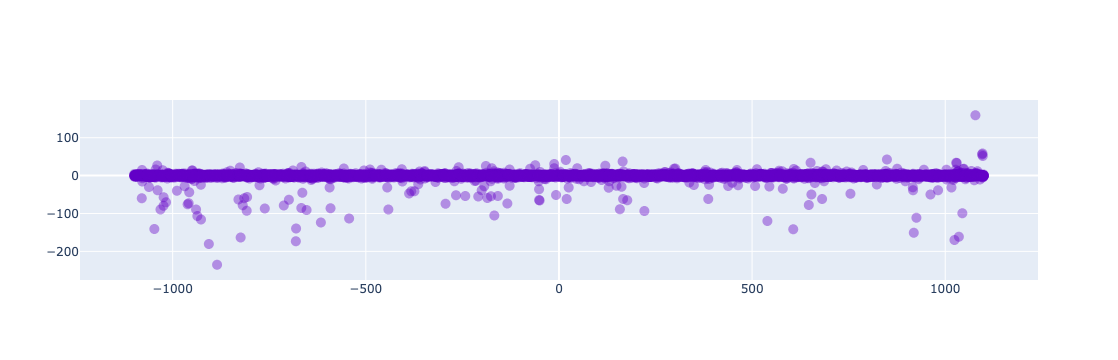

In [17]:

newnames = {'trace0': 'sim: FS model: m1', 'trace1': 'sim: FS model: m5', 'trace2': 'sim: BS model: m5', 'trace3': 'sim: BS model: m1'} 
 
fig = go.Figure() 
 
#fig.add_scatter(y = BS_BS_merge_5000.RM_residual , x=BS_BS_merge_5000.RM_src_radm2, mode=\"markers\", name= \"BS m5\",  marker=dict(size=10, color=\"Purple\")) 
#fig.add_scatter(y = BS_2C_merge_5000.RM_residual, x=BS_2C_merge_5000.RM_src_radm2, mode=\"markers\", name=\"BS m11 Comp 1\",  marker=dict(size=10, color='rgba(255,0,255,0.4)')) 
fig.add_scatter(y = BS_2C_10k_b1.RM_comp_diff_err, x=BS_2C_10k_b1.RM_screen_radm2, mode="markers", name="BS m11 Comp",  marker=dict(size=10, color='rgba(100,0,200,0.4)')) 
fig.show()


    "The Residual is calculated as True Value: (RM_screen - 0.5*RM_src)   -   First component and second component seperately. This shows that RM component one is the first "


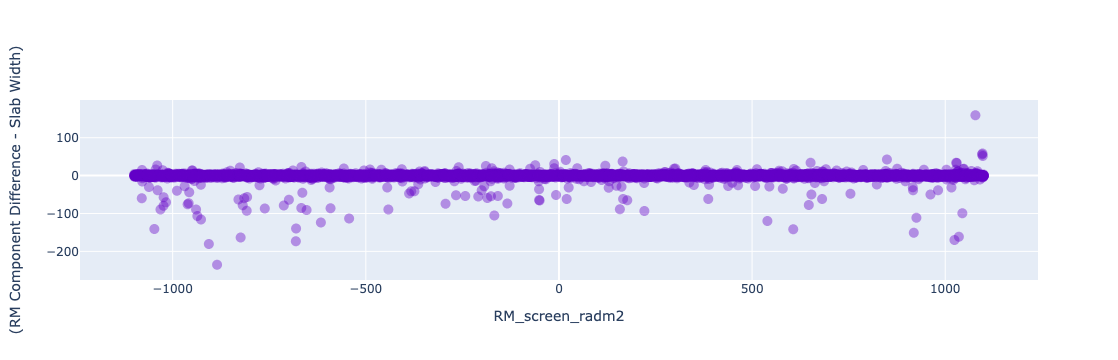

In [18]:

#fig.update_layout(font_family=\"Serif\", yaxis_range=[-20,100]) 
fig.update_yaxes(title_text="(RM Component Difference - Slab Width) ") 
fig.update_xaxes(title_text="RM_screen_radm2") 
fig.show()

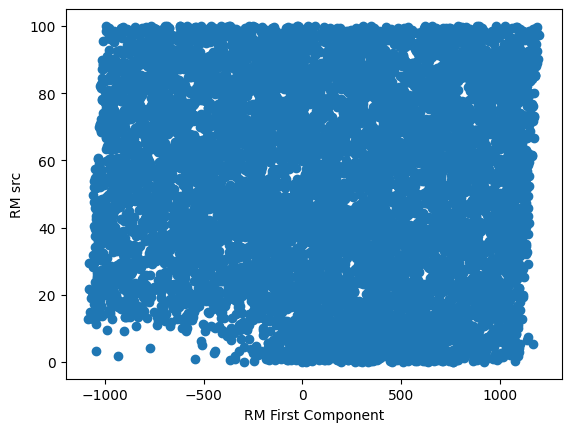

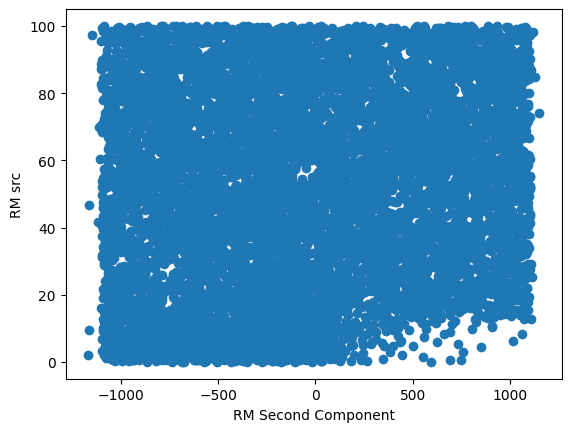

In [19]:

plt.scatter(BS_2C_10k_b1.RM1_radm2, BS_2C_10k_b1.RM_src_radm2) 
plt.xlabel('RM First Component') 
plt.ylabel('RM src') 
plt.show() 
 
plt.scatter(BS_2C_10k_b1.RM2_radm2, BS_2C_10k_b1.RM_src_radm2) 
plt.xlabel('RM Second Component') 
plt.ylabel('RM src') 
plt.show()

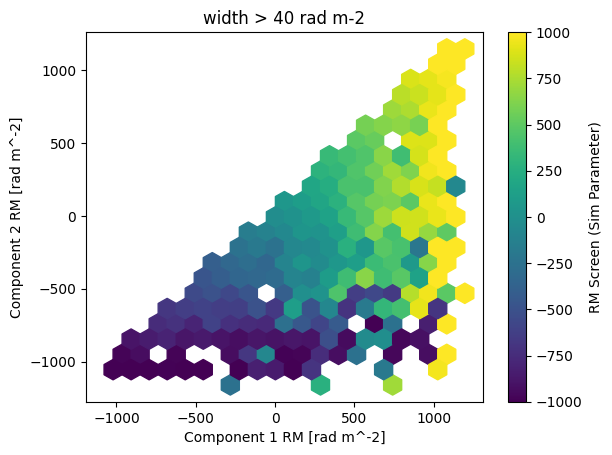

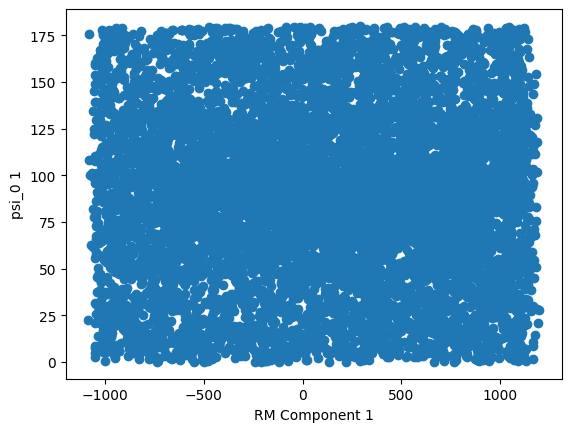

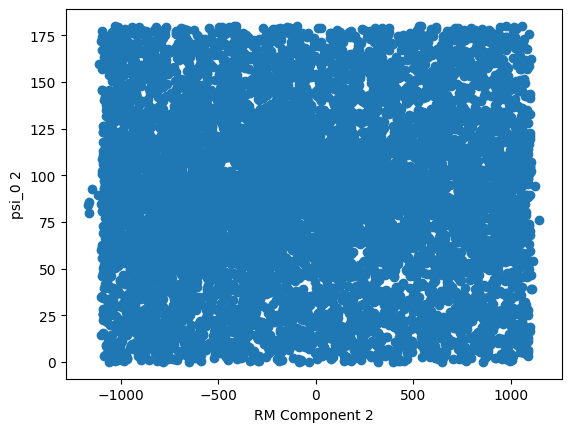

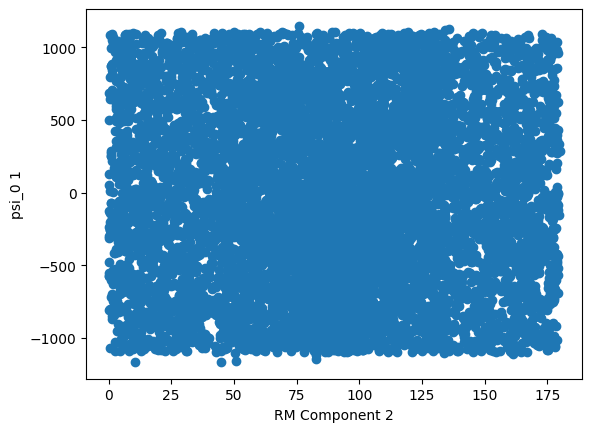

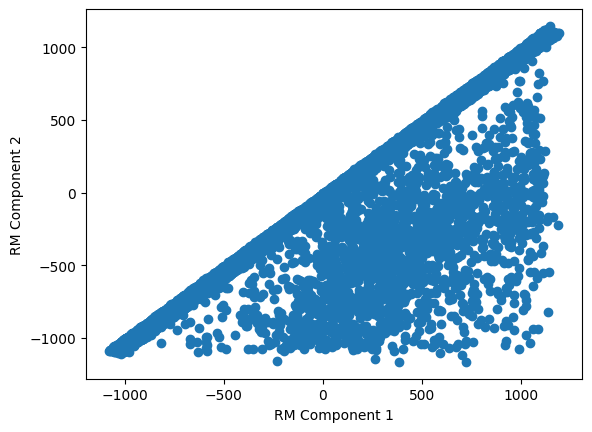

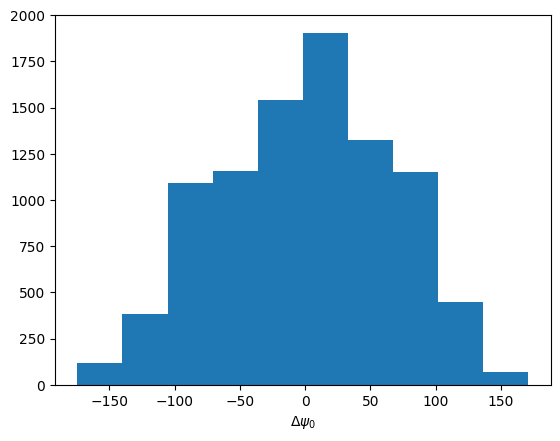

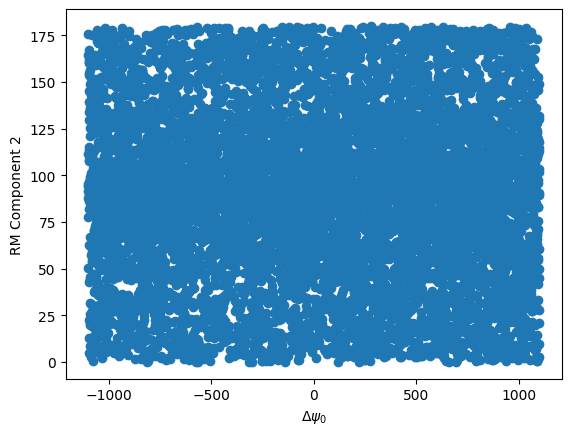

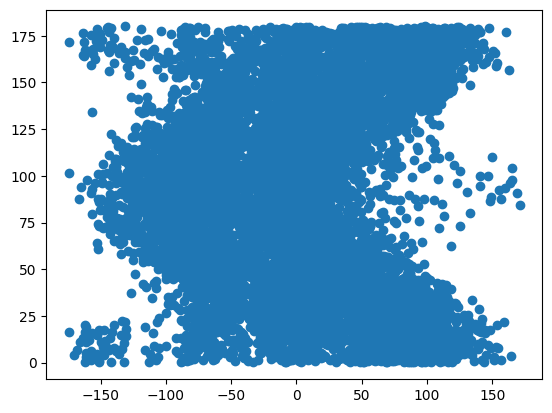

In [20]:

delta_RM_1_2 = BS_2C_10k_b1.RM1_radm2[BS_2C_10k_b1.RM_src_radm2 > 22] -  BS_2C_10k_b1.RM2_radm2[BS_2C_10k_b1.RM_src_radm2 > 22] 
plt.hexbin(BS_2C_10k_b1.RM1_radm2[BS_2C_10k_b1.RM_src_radm2 > 22], BS_2C_10k_b1.RM2_radm2[BS_2C_10k_b1.RM_src_radm2 > 22], BS_2C_10k_b1.RM_screen_radm2[BS_2C_10k_b1.RM_src_radm2 > 22], vmin=-1000, vmax=1000, gridsize=20) 
plt.xlabel('Component 1 RM [rad m^-2]') 
plt.ylabel('Component 2 RM [rad m^-2]') 
plt.colorbar(label='RM Screen (Sim Parameter)') 
plt.title('width > 40 rad m-2') 
plt.show() 
 
 
plt.scatter(BS_2C_10k_b1.RM1_radm2, BS_2C_10k_b1.psi01_deg) 
plt.xlabel('RM Component 1') 
plt.ylabel('psi_0 1') 
plt.show() 
 
plt.scatter(BS_2C_10k_b1.RM2_radm2, BS_2C_10k_b1.psi02_deg) 
plt.xlabel('RM Component 2') 
plt.ylabel('psi_0 2') 
plt.show() 
 
 
plt.scatter(BS_2C_10k_b1.psi01_deg, BS_2C_10k_b1.RM2_radm2) 
plt.xlabel('RM Component 2') 
plt.ylabel('psi_0 1') 
plt.show() 
 
 
plt.scatter(BS_2C_10k_b1.RM1_radm2, BS_2C_10k_b1.RM2_radm2) 
plt.xlabel('RM Component 1') 
plt.ylabel('RM Component 2') 
plt.show() 
 
delta_psi_not = BS_2C_10k_b1.psi01_deg - BS_2C_10k_b1.psi02_deg 
 
plt.hist(BS_2C_10k_b1.psi01_deg - BS_2C_10k_b1.psi02_deg) 
plt.xlabel('$\\Delta \\psi_{0}$') 
plt.show() 
 
plt.scatter(BS_2C_10k_b1.RM_screen_radm2, BS_2C_10k_b1.psi01_deg) 
plt.xlabel('$\\Delta \\psi_{0}$') 
plt.ylabel('RM Component 2') 
plt.show() 
 
plt.scatter(delta_psi_not, BS_2C_10k_b1.psi0_deg) 
 
 
 

The large/small first RM component corresponds to a large/small second RM Component in a nice linear trend. Not sure where the cloud of Positive first coponent corresponding to negative second components corresponds to. Maybe if I color by slab widt. 


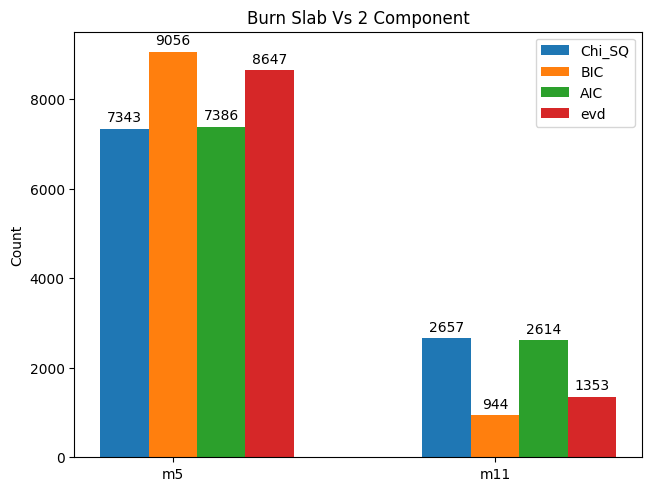

In [21]:


BS_BS_10k_b1['is_good_model_chi']= BS_BS_10k_b1.chiSq < BS_2C_10k_b1.chiSq 
BS_BS_10k_b1['is_good_model_BIC'] = BS_BS_10k_b1.BIC < BS_2C_10k_b1.BIC 
BS_BS_10k_b1['is_good_model_AIC'] = BS_BS_10k_b1.AIC < BS_2C_10k_b1.AIC 
BS_BS_10k_b1['is_good_model_evd'] = BS_BS_10k_b1['ln(EVIDENCE) '] > BS_2C_10k_b1['ln(EVIDENCE) '] 
 
species = ("m5", "m11") 
penguin_means = { 
    'Chi_SQ': [np.sum(BS_BS_10k_b1['is_good_model_chi']), (10000-np.sum(BS_BS_10k_b1['is_good_model_chi']))], 
    'BIC': [np.sum(BS_BS_10k_b1['is_good_model_BIC']), (10000-np.sum(BS_BS_10k_b1['is_good_model_BIC']))], 
    'AIC': [np.sum(BS_BS_10k_b1['is_good_model_AIC']), (10000-np.sum(BS_BS_10k_b1['is_good_model_AIC']))], 
    'evd': [np.sum(BS_BS_10k_b1['is_good_model_evd']), (10000-np.sum(BS_BS_10k_b1['is_good_model_evd']))], 
} 
 
x = np.arange(len(species))  # the label locations 
width = 0.15  # the width of the bars 
multiplier = 0 
 
fig, ax = plt.subplots(layout='constrained') 
 
for attribute, measurement in penguin_means.items(): 
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute) 
    ax.bar_label(rects, padding=3) 
    multiplier += 1 
 
# Add some text for labels, title and custom x-axis tick labels, etc. 
ax.set_ylabel('Count') 
ax.set_title('Burn Slab Vs 2 Component') 
ax.set_xticks(x + width, species) 
ax.legend(loc='upper right', ncols=1) 
#ax.set_ylim(0, 1000) 
 
plt.show()

In [22]:
BS_BS_10k_b1['delta_evd_5_11'] = BS_BS_10k_b1['ln(EVIDENCE) '] - BS_2C_10k_b1['ln(EVIDENCE) '] 
BS_BS_10k_b1['delta_BIC_5_11'] = BS_BS_10k_b1.BIC - BS_2C_10k_b1.BIC 
BS_BS_10k_b1.keys()
print(len(BS_2C_10k_b1))

10000


<>:37: SyntaxWarning:

invalid escape sequence '\D'

<>:37: SyntaxWarning:

invalid escape sequence '\D'

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81629/3837039047.py:37: SyntaxWarning:

invalid escape sequence '\D'



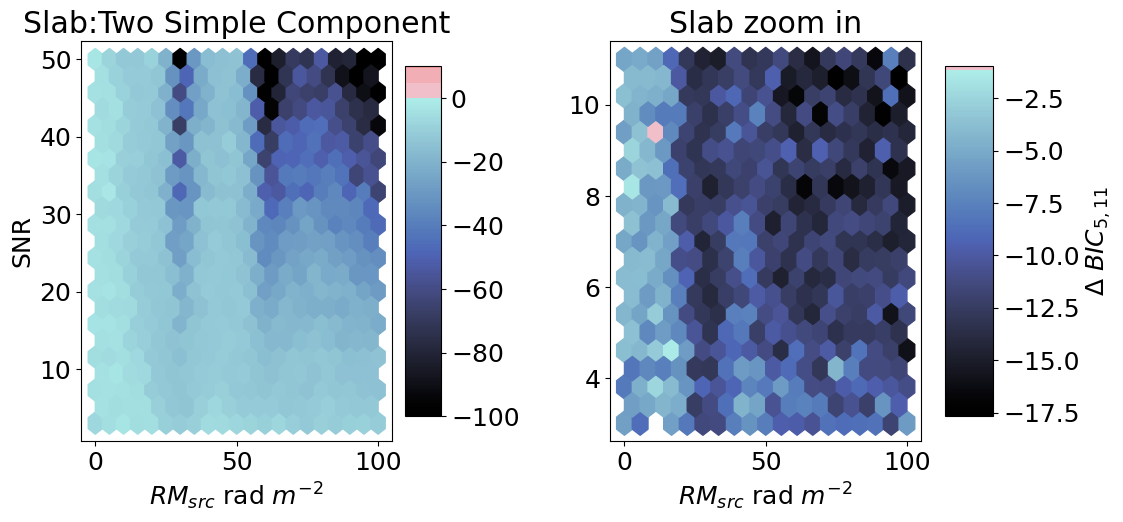

In [23]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True) 
 

values_interest = ['SNR', 'RM_src_radm2', 'delta_BIC_5_11'] 
num_bins=15 
 
z_color_i = 2 
y_index = 0 
x_index = 1 
 
 
bottom = plt.get_cmap('cmr.dusk_r', 23) 
top= plt.get_cmap('cmr.sapphire', 233) 
newcolors = np.vstack((top(np.linspace(0, 1, 233)), bottom(np.linspace(0, 0.09, 23)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 
 
bottom_SNR = plt.get_cmap('cmr.dusk_r', 3) 
top_SNR= plt.get_cmap('cmr.sapphire', 253) 
newcolors_SNR = np.vstack((top_SNR(np.linspace(0, 1, 253)), bottom_SNR(np.linspace(0, 0.09,3)))) 
newcmp_SNR = ListedColormap(newcolors_SNR, name='embersaph') 
 
 
 
hex1 = ax_test[0].hexbin(BS_BS_10k_b1['RM_src_radm2'],BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_BIC_5_11'], gridsize=20, cmap=newcmp, vmax=10, vmin=-100, reduce_C_function=np.median) 
hex2 = ax_test[1].hexbin(BS_BS_10k_b1['RM_src_radm2'][BS_BS_10k_b1['SNR']<11],BS_BS_10k_b1['SNR'][BS_BS_10k_b1['SNR']<11], BS_BS_10k_b1['delta_BIC_5_11'][BS_BS_10k_b1['SNR']<11], gridsize=18, reduce_C_function=np.median, cmap=newcmp_SNR) 
ax_test[0].set_title('Slab:Two Simple Component') 
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$') 
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$') 
ax_test[0].set_ylabel('SNR') 
ax_test[1].set_title('{} zoom in'.format('Slab')) 
cbar_ax1 = fig_chi.add_axes([0.92, 0.15, 0.04, 0.7]) 
fig_chi.colorbar(hex2, cax=cbar_ax1,  label='$\Delta$ $BIC_{5,11}$') 
cbar_ax = fig_chi.add_axes([0.47, 0.15, 0.03, 0.7]) 
fig_chi.colorbar(hex1, cax=cbar_ax) 
 
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.7,hspace=0.6)

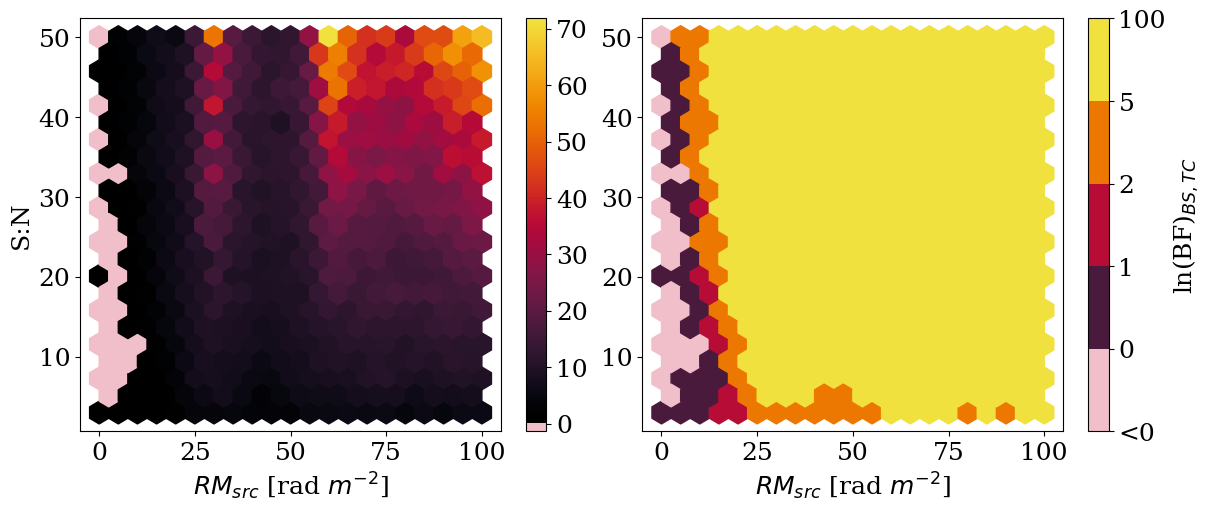

In [24]:
from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True, constrained_layout=True) 
 
bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 250)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 5)), 
                top(np.linspace(0 , 1 , 251))))
newcmp = ListedColormap(newcolors , name='embersaph')
 
bounds = [-100, 0,  1,  2,  5,  10000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)
 
 
hex1 = ax_test[0].hexbin(BS_BS_10k_b1['RM_src_radm2'],BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_evd_5_11'], reduce_C_function=np.median, gridsize=20, cmap=newcmp) 
ax_test[0].set_xlabel('$RM_{src}$ [rad $m^{-2}$]') 
ax_test[0].set_ylabel('S:N') 
 
hex2 = ax_test[1].hexbin(BS_BS_10k_b1['RM_src_radm2'],BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_evd_5_11'], norm=norm, reduce_C_function=np.median,  gridsize=20, cmap=cmap) 
ax_test[1].set_xlabel('$RM_{src}$ [rad $m^{-2}$]') 
#plt.ylabel(values_interest[y_index]) 
#ax_test[0].set_title('Slab') 
 
 
 
cb2 = plt.colorbar(hex1) 
 
labels = ['<0','0', '1', '2','5', '100'] 
cb = plt.colorbar(hex2, label= 'ln(BF)$_{BS,TC}$', ticklocation='bottom') 
cb.ax.set_yticklabels(labels) 
fig_chi.savefig('band1_BS_TC.pdf', format='pdf')

plt.show() 


# Make ABCD Plot For Burnslabs and 2C

In [25]:


def two_comp(lambda_sq,  RM_screen1, RM_screen2, frac_pol1, frac_pol2, psi0_deg1,psi0_deg2): 
 
    quarr = (frac_pol1 * np.exp(2j * (np.radians(psi0_deg1) + RM_screen1* lambda_sq))) + (frac_pol2 * np.exp(2j * (np.radians(psi0_deg2) + RM_screen2*lambda_sq))) 
    
    complex_p = abs(quarr)
 
    return complex_p 
 
def burnslabs_modelling(lambda_sq,  RM_screen, frac_pol, RM_src, psi0_deg): 
 
    quarr = frac_pol * np.exp( 2j * (np.radians(psi0_deg) + (0.5*RM_src + RM_screen) * lambda_sq)) * ((np.sin(RM_src * lambda_sq))/(RM_src * lambda_sq))

    complex_p = np.sqrt((quarr.real**2 + quarr.imag**2))
 
    return complex_p



<>:137: SyntaxWarning:

invalid escape sequence '\l'

<>:178: SyntaxWarning:

invalid escape sequence '\l'

<>:137: SyntaxWarning:

invalid escape sequence '\l'

<>:178: SyntaxWarning:

invalid escape sequence '\l'

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81629/4041916445.py:137: SyntaxWarning:

invalid escape sequence '\l'

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81629/4041916445.py:178: SyntaxWarning:

invalid escape sequence '\l'



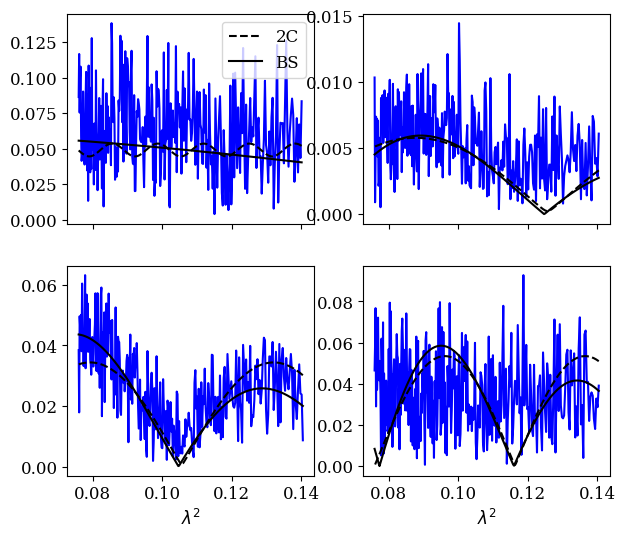

In [26]:








#First the perferred 2C Model 
 
plt.rcParams.update({'font.size': 12}) 
plt.rc('font', family='serif') 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(7, 6)) 
import numpy as np 
c = 299792458. 

srcA = 1989 
srcB = 2452 
srcC = 4652 
srcD = 1526 

 
frac_pol1 = BS_2C_5000_extra_df.fracPol1[BS_2C_5000_extra_df.src==srcA].item() 
frac_pol2 = BS_2C_5000_extra_df.fracPol2[BS_2C_5000_extra_df.src==srcA].item() 
psi0_deg1 = BS_2C_5000_extra_df.psi01_deg[BS_2C_5000_extra_df.src==srcA].item() 
psi0_deg2 = BS_2C_5000_extra_df.psi02_deg[BS_2C_5000_extra_df.src==srcA].item() 
RM_screen1 = BS_2C_5000_extra_df.RM1_radm2[BS_2C_5000_extra_df.src==srcA].item() 
RM_screen2 = BS_2C_5000_extra_df.RM2_radm2[BS_2C_5000_extra_df.src==srcA].item() 

#BS model
frac_pol = BS_BS_5000_extra_df.fracPol[BS_BS_5000_extra_df.src==srcA].item() 
psi0_deg = BS_BS_5000_extra_df.psi0_deg[BS_BS_5000_extra_df.src==srcA].item()
RM_screen = BS_BS_5000_extra_df.RM_radm2[BS_BS_5000_extra_df.src==srcA].item()
RM_src = BS_BS_5000_extra_df.deltaRM_radm2[BS_BS_5000_extra_df.src==srcA].item() 
 
data_A = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/5k_burnslabs_b1/1989.dat', names=True, dtype=None, delimiter=' ') 
 
freq_arr = [] 
q_arr = [] 
u_arr = [] 
 
for row in data_A: 
    freq_arr.append(row[0]) 
    q_arr.append(row[1]) 
    u_arr.append(row[2]) 
q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr) 
 
p_arr = np.sqrt(q_arr**2 + u_arr**2) 
freq_arr=np.asarray(freq_arr) 
lambda_sqr_array = np.power(c/freq_arr, 2.0) 

quarr_LOS_A = two_comp(lambda_sqr_array,  RM_screen1, RM_screen2, frac_pol1, frac_pol2, psi0_deg1, psi0_deg2) 
quarr_BS_LOS_A = burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg) 

 
#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b') 

ax1.plot(lambda_sqr_array, p_arr , c='b') 
ax1.plot(lambda_sqr_array, quarr_LOS_A, c='k',  linestyle='--', label='2C') 
ax1.plot(lambda_sqr_array, quarr_BS_LOS_A, c='k', label='BS') 
 
#B 
frac_pol1 = BS_2C_5000_extra_df.fracPol1[BS_2C_5000_extra_df.src==srcB].item() 
frac_pol2 = BS_2C_5000_extra_df.fracPol2[BS_2C_5000_extra_df.src==srcB].item() 
psi0_deg1 = BS_2C_5000_extra_df.psi01_deg[BS_2C_5000_extra_df.src==srcB].item() 
psi0_deg2 = BS_2C_5000_extra_df.psi02_deg[BS_2C_5000_extra_df.src==srcB].item() 
RM_screen1 = BS_2C_5000_extra_df.RM1_radm2[BS_2C_5000_extra_df.src==srcB].item() 
RM_screen2 = BS_2C_5000_extra_df.RM2_radm2[BS_2C_5000_extra_df.src==srcB].item() 

#BS model
frac_pol = BS_BS_5000_extra_df.fracPol[BS_BS_5000_extra_df.src==srcB].item() 
psi0_deg = BS_BS_5000_extra_df.psi0_deg[BS_BS_5000_extra_df.src==srcB].item() 
RM_screen = BS_BS_5000_extra_df.RM_radm2[BS_BS_5000_extra_df.src==srcB].item() 
RM_src = BS_BS_5000_extra_df.deltaRM_radm2[BS_BS_5000_extra_df.src==srcB].item() 
 

data_B = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/5k_burnslabs_b1/2452.dat', dtype=None, delimiter=' ') 
 
freq_arr = [] 
q_arr = [] 
u_arr = [] 
 
for row in data_B: 
    freq_arr.append(row[0]) 
    q_arr.append(row[1]) 
    u_arr.append(row[2]) 
q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr) 

p_arr = np.sqrt(q_arr**2 + u_arr**2)
freq_arr=np.asarray(freq_arr) 
lambda_sqr_array = np.power(c/freq_arr, 2.0) 
quarr_LOS_B= two_comp(lambda_sqr_array,  RM_screen1, RM_screen2, frac_pol1, frac_pol2, psi0_deg1,psi0_deg2) 
quarr_BS_LOS_B= burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg) 

 
#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b') 

#plt.scatter(lambda_sqr_array, u_arr, marker='.', c='r') 
ax2.plot(lambda_sqr_array, p_arr , c='b') 
ax2.plot(lambda_sqr_array, quarr_BS_LOS_B, c='k', label='BS') 
ax2.plot(lambda_sqr_array, quarr_LOS_B, c='k', linestyle='--', label='2C') 
 
 
 
frac_pol1 = BS_2C_5000_extra_df.fracPol1[BS_2C_5000_extra_df.src==srcC].item() 
frac_pol2 = BS_2C_5000_extra_df.fracPol2[BS_2C_5000_extra_df.src==srcC].item() 
psi0_deg1 = BS_2C_5000_extra_df.psi01_deg[BS_2C_5000_extra_df.src==srcC].item() 
psi0_deg2 = BS_2C_5000_extra_df.psi02_deg[BS_2C_5000_extra_df.src==srcC].item() 
RM_screen1 = BS_2C_5000_extra_df.RM1_radm2[BS_2C_5000_extra_df.src==srcC].item() 
RM_screen2 = BS_2C_5000_extra_df.RM2_radm2[BS_2C_5000_extra_df.src==srcC].item() 


frac_pol = BS_BS_5000_extra_df.fracPol[BS_BS_5000_extra_df.src==srcC].item() 
psi0_deg = BS_BS_5000_extra_df.psi0_deg[BS_BS_5000_extra_df.src==srcC].item() 
RM_screen = BS_BS_5000_extra_df.RM_radm2[BS_BS_5000_extra_df.src==srcC].item() 
RM_src = BS_BS_5000_extra_df.deltaRM_radm2[BS_BS_5000_extra_df.src==srcC].item() 
 
data_C = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/5k_burnslabs_b1/4652.dat', dtype=None, delimiter=' ') 
 
freq_arr = [] 
q_arr = [] 
u_arr = [] 
 
for row in data_C: 
    freq_arr.append(row[0]) 
    q_arr.append(row[1]) 
    u_arr.append(row[2]) 
q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr) 

freq_arr=np.asarray(freq_arr) 
lambda_sqr_array = np.power(c/freq_arr, 2.0) 
quarr_LOS_C= two_comp(lambda_sqr_array,  RM_screen1, RM_screen2, frac_pol1, frac_pol2, psi0_deg1,psi0_deg2) 
quarr_BS_LOS_C= burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg) 

p_arr = np.sqrt(q_arr**2 + u_arr**2)
#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b') 
ax3.plot(lambda_sqr_array, p_arr , c='b') 
ax3.plot(lambda_sqr_array, quarr_LOS_C, c='k', linestyle='--', label='2C')
ax3.plot(lambda_sqr_array, quarr_BS_LOS_C, c='k', label='BS') 


ax3.set_xlabel('$\lambda^{2}$') 
 
#D 
frac_pol1 = BS_2C_5000_extra_df.fracPol1[BS_2C_5000_extra_df.src==srcD].item() 
frac_pol2 = BS_2C_5000_extra_df.fracPol2[BS_2C_5000_extra_df.src==srcD].item() 
psi0_deg1 = BS_2C_5000_extra_df.psi01_deg[BS_2C_5000_extra_df.src==srcD].item() 
psi0_deg2 = BS_2C_5000_extra_df.psi02_deg[BS_2C_5000_extra_df.src==srcD].item() 
RM_screen1 = BS_2C_5000_extra_df.RM1_radm2[BS_2C_5000_extra_df.src==srcD].item() 
RM_screen2 = BS_2C_5000_extra_df.RM2_radm2[BS_2C_5000_extra_df.src==srcD].item() 

frac_pol = BS_BS_5000_extra_df.fracPol[BS_BS_5000_extra_df.src==srcD].item() 
psi0_deg = BS_BS_5000_extra_df.psi0_deg[BS_BS_5000_extra_df.src==srcD].item() 
RM_screen = BS_BS_5000_extra_df.RM_radm2[BS_BS_5000_extra_df.src==srcD].item() 
RM_src = BS_BS_5000_extra_df.deltaRM_radm2[BS_BS_5000_extra_df.src==srcD].item() 
 
data_1526 = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/mixedslab_unif_fg_10000_b1/1526.dat', dtype=None, delimiter=' ') 
 
freq_arr = [] 
q_arr = [] 
u_arr = [] 
 
for row in data_1526: 
    freq_arr.append(row[0]) 
    q_arr.append(row[1]) 
    u_arr.append(row[2]) 
 
q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr)
freq_arr=np.asarray(freq_arr) 
lambda_sqr_array = np.power(c/freq_arr, 2.0) 

quarr_LOS_2615= two_comp(lambda_sqr_array, RM_screen1, RM_screen2, frac_pol1, frac_pol2, psi0_deg1,psi0_deg2) 
quarr_BS_LOS_D= burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg) 

p_arr = np.sqrt(q_arr**2 + u_arr**2)
 
#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b') 
ax4.plot(lambda_sqr_array, p_arr , c='b') 
#plt.scatter(lambda_sqr_array, u_arr, marker='.', c='r') 
ax4.plot(lambda_sqr_array, quarr_LOS_2615, c='k',linestyle='--', label='2C') 
ax4.plot(lambda_sqr_array, quarr_BS_LOS_D, c='k',label='2C') 
ax4.set_xlabel('$\lambda^{2}$') 
ax1.legend()
fig.savefig('band1_TC_ABCD.pdf', format='pdf')
plt.show()



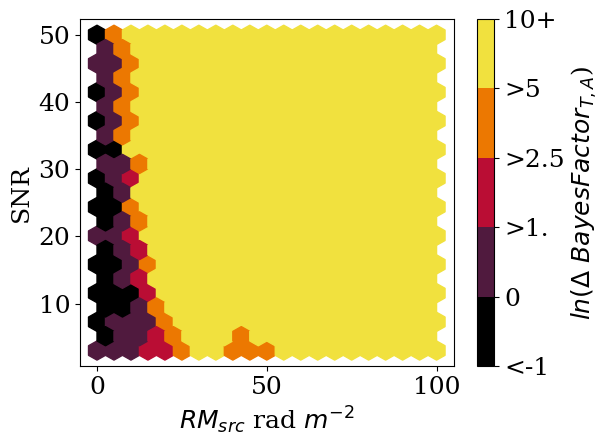

In [27]:

from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 
 
 
bounds = [-10,0, 1, 2.0, 4, 7000]  
cmap_rb = plt.get_cmap('cmr.ember') 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
hex1 = plt.hexbin(BS_BS_10k_b1['RM_src_radm2'],BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_evd_5_11'],norm=norm, gridsize=20, cmap=cmap, reduce_C_function=np.median) 
plt.xlabel('$RM_{src}$ rad $m^{-2}$') 
plt.ylabel('SNR') 
 
 
labels = ('<-1', '0','>1.', '>2.5', '>5' ,'10+') 
cb = plt.colorbar(hex1, label='$ln(\\Delta$ $Bayes Factor_{T,A}$)', ticklocation='bottom') 
cb.ax.set_yticklabels(labels) 
plt.tight_layout() 
plt.show()

# Band 1 Percentages

In [28]:
def percentage_reduce_BIC_C(C): 
    C = np.asarray(C) 
    percentage = (len(C[C<-1]) / len(C)) * 100  
    return percentage


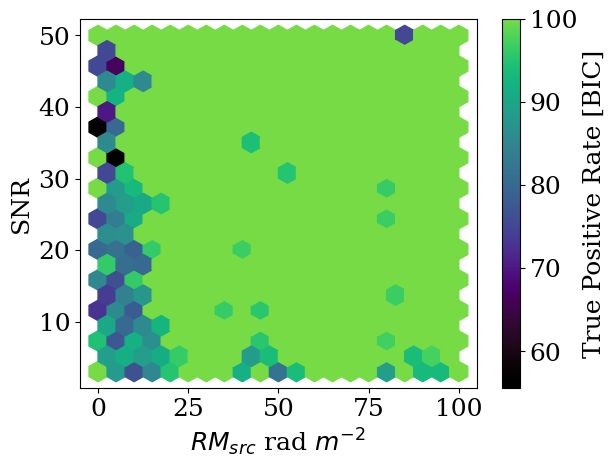

In [29]:
from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 
 

plt.hexbin(BS_BS_10k_b1['RM_src_radm2'],BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_BIC_5_11'], reduce_C_function=percentage_reduce_BIC_C, gridsize=20, cmap='cmr.lavender') 
plt.xlabel('$RM_{src}$ rad $m^{-2}$') 
plt.ylabel('SNR') 
#ax_test[0].set_title('Slab') 
 
#labels = (' ','S', 'M', 'W', 'IC' ,'IM') 
cb = plt.colorbar(label='True Positive Rate [BIC]', ticklocation='bottom') 
#cb.ax.set_yticklabels(labels) 
plt.show()

Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
       'deltaRM_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y',
       'RM_screen_radm2', 'RM_src_radm2', 'sigma_RM_2', 'sigmaRM_FG', 'SNR',
       'model', 'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed',
       'sigmaRM_seed', 'sigma_FG_seed', 'psi0_seed'],
      dtype='object')


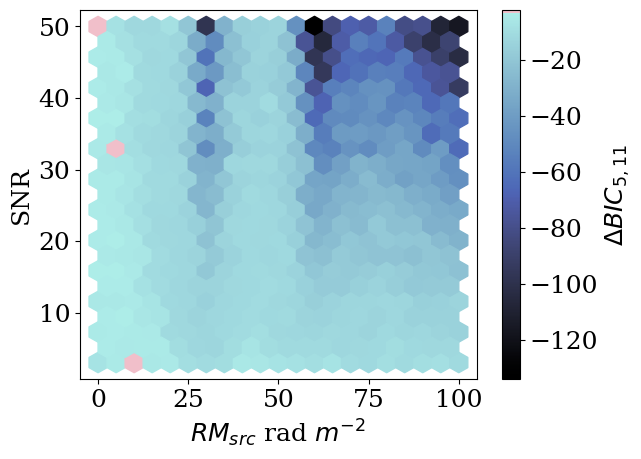

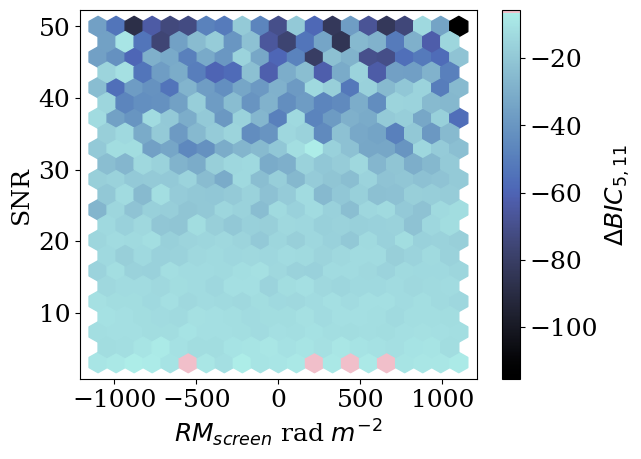

In [30]:

from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
 
print(BS_BS_merge_5000.keys()) 
bottom = plt.get_cmap('cmr.dusk_r', 1) 
top= plt.get_cmap('cmr.sapphire', 255) 
newcolors = np.vstack((top(np.linspace(0, 1, 255)), bottom(np.linspace(0, 0.09, 2)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 
 
plt.hexbin(BS_BS_10k_b1['RM_src_radm2'], BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_BIC_5_11'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
plt.xlabel('$RM_{src}$ rad $m^{-2}$') 
plt.ylabel('SNR') 
plt.colorbar(label='$\\Delta BIC_{5,11}$') 
plt.show() 
 
 
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
 
 
plt.hexbin(BS_BS_10k_b1['RM_screen_radm2'],BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_BIC_5_11'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
plt.xlabel('$RM_{screen}$ rad $m^{-2}$') 
plt.ylabel('SNR') 
plt.colorbar(label='$\\Delta BIC_{5,11}$') 
plt.show() 
 
 
 
#bottom = plt.get_cmap('cmr.dusk_r', 8) 
#top= plt.get_cmap('cmr.sapphire', 248) 
#newcolors = np.vstack((bottom(np.linspace(0, 0.09, 8)),top(np.linspace(0, 1, 248)))) 
#newcmp = ListedColormap(newcolors, name='embersaph') 
 
#plt.hexbin(BS_BS_merge_5000['RM_screen_radm2'],BS_BS_merge_5000['RM_src_radm2'], BS_BS_merge_5000['delta_evd_5_11'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
#plt.xlabel('$RM_{screen}$ rad $m^{-2}$') 
#plt.ylabel('RM_src_radm2') 
#plt.colorbar(label='$\\Delta evd_{5,11}$') 
#plt.show()

Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
       'deltaRM_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y',
       'RM_screen_radm2', 'RM_src_radm2', 'sigma_RM_2', 'sigmaRM_FG', 'SNR',
       'model', 'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed',
       'sigmaRM_seed', 'sigma_FG_seed', 'psi0_seed'],
      dtype='object')


<>:12: SyntaxWarning:

invalid escape sequence '\D'

<>:25: SyntaxWarning:

invalid escape sequence '\D'

<>:27: SyntaxWarning:

invalid escape sequence '\D'

<>:12: SyntaxWarning:

invalid escape sequence '\D'

<>:25: SyntaxWarning:

invalid escape sequence '\D'

<>:27: SyntaxWarning:

invalid escape sequence '\D'

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81629/419453085.py:12: SyntaxWarning:

invalid escape sequence '\D'

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81629/419453085.py:25: SyntaxWarning:

invalid escape sequence '\D'

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81629/419453085.py:27: SyntaxWarning:

invalid escape sequence '\D'



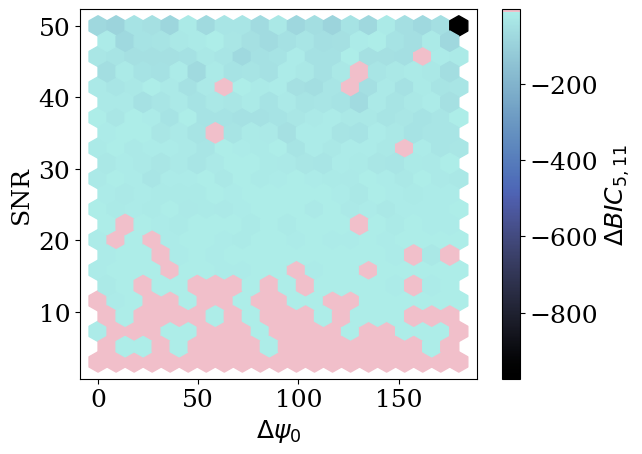

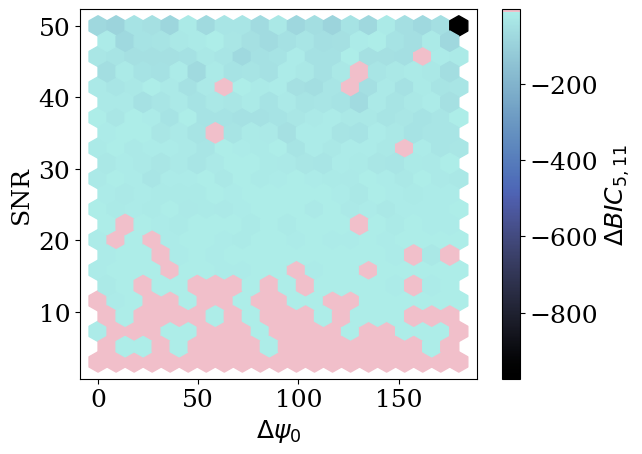

In [31]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
print(BS_BS_merge_5000.keys()) 
bottom = plt.get_cmap('cmr.dusk_r', 1) 
top= plt.get_cmap('cmr.sapphire', 255) 
newcolors = np.vstack((top(np.linspace(0, 1, 255)), bottom(np.linspace(0, 0.09, 2)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 
 
plt.hexbin(BS_BS_10k_b1['psi0_deg_y'] - BS_BS_10k_b1['psi0_2_deg'], BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_BIC_5_11'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
plt.xlabel('$\Delta \psi_{0}$') 
plt.ylabel('SNR') 
plt.colorbar(label='$\\Delta BIC_{5,11}$') 
plt.show() 
 
 
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
 
 
plt.hexbin(BS_BS_10k_b1['psi0_deg_y'] - BS_BS_10k_b1['psi0_2_deg'], BS_BS_10k_b1['SNR'],  BS_BS_10k_b1['delta_BIC_5_11'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
plt.xlabel('$\Delta \psi_{0}$') 
plt.ylabel('SNR') 
plt.colorbar(label='$\Delta BIC_{5,11}$') 
plt.show() 

Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
       'deltaRM_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y',
       'RM_screen_radm2', 'RM_src_radm2', 'sigma_RM_2', 'sigmaRM_FG', 'SNR',
       'model', 'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed',
       'sigmaRM_seed', 'sigma_FG_seed', 'psi0_seed', 'psi0_2_deg',
       'RM_screen_2_radm2', 'frac_pol_2_comp', 'RM_residual',
       'is_good_model_chi', 'is_good_model_BIC', 'is_good_model_AIC',
       'is_good_model_evd', 'delta_evd_5_11', 'delta_BIC_5_11'],
      dtype='object')


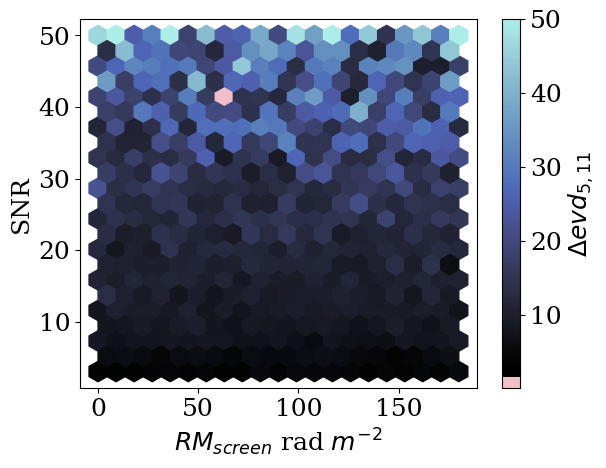

In [32]:

bottom = plt.get_cmap('cmr.dusk_r', 8) 
top= plt.get_cmap('cmr.sapphire', 248) 
newcolors = np.vstack((bottom(np.linspace(0, 0.09, 8)),top(np.linspace(0, 1, 248)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 
print(BS_BS_10k_b1.keys()) 
plt.hexbin(BS_BS_10k_b1['psi0_deg_y'],BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_evd_5_11'], gridsize=20, cmap=newcmp,  vmax=50, reduce_C_function=np.median) 
plt.xlabel('$RM_{screen}$ rad $m^{-2}$') 
plt.ylabel('SNR') 
plt.colorbar(label='$\\Delta evd_{5,11}$') 
plt.show()


# Combined Band 1 and Band 2 Results

In [2]:

Comb_BS_2C_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/comb_BS_condensed_sim11_model_num_7000_sims.csv') 
Comb_BS_BS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simBS_model_num_5_sims.csv') 
 
Comb_BS_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/burnslab_unif_fg_number_7000_freq_800_1089_ran_SNR.csv') 
 
Comb_BS_true_df.rename( columns={'Unnamed: 0':'src'}, inplace=True ) 
Comb_BS_2C_5000_df['src'] = Comb_BS_2C_5000_df['src'] - 1 
Comb_BS_BS_5000_df['src'] = Comb_BS_BS_5000_df['src'] - 1 
 
 
comb_BS_BS_merge_5000 = pd.merge(Comb_BS_BS_5000_df, Comb_BS_true_df, on='src', how='outer') 
comb_BS_2C_merge_5000 = pd.merge(Comb_BS_2C_5000_df, Comb_BS_true_df, on='src', how='outer') 
 
Comb_BS_BS_5000_df.keys() 
print(len(comb_BS_BS_merge_5000))

7000


In [34]:

comb_BS_BS_merge_5000['delta_evd_5_11'] = comb_BS_BS_merge_5000['ln(EVIDENCE) '] - comb_BS_2C_merge_5000['ln(EVIDENCE) '] 
comb_BS_BS_merge_5000['delta_BIC_5_11'] = comb_BS_BS_merge_5000.BIC - comb_BS_2C_merge_5000.BIC

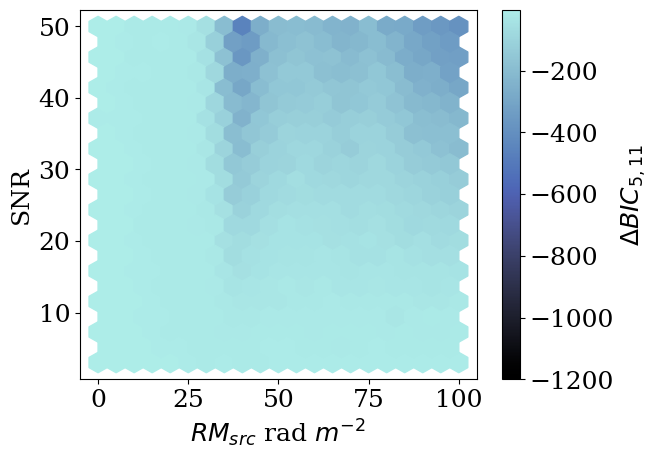

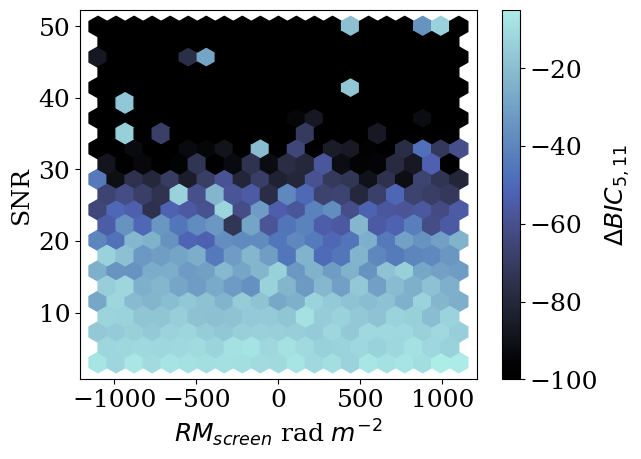

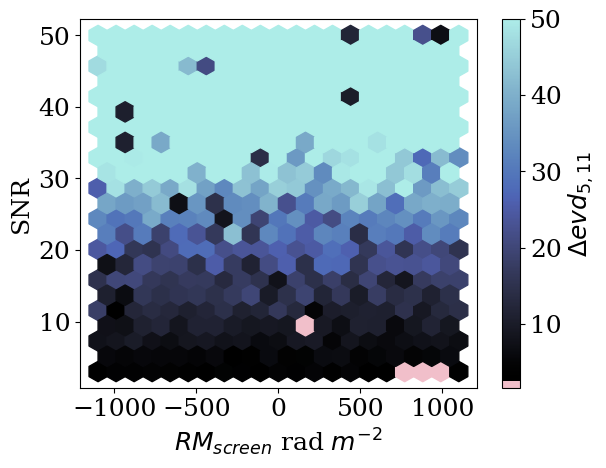

In [35]:

from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
 
 
bottom = plt.get_cmap('cmr.dusk_r', 0) 
top= plt.get_cmap('cmr.sapphire', 256) 
newcolors = np.vstack((top(np.linspace(0, 1, 256)), bottom(np.linspace(0, 0.09, 0)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 
 
plt.hexbin(comb_BS_BS_merge_5000['RM_src_radm2'],comb_BS_BS_merge_5000['SNR'], comb_BS_BS_merge_5000['delta_BIC_5_11'], gridsize=20, cmap=newcmp, vmin=-1200, reduce_C_function=np.median) 
plt.xlabel('$RM_{src}$ rad $m^{-2}$') 
plt.ylabel('SNR') 
plt.colorbar(label='$\\Delta BIC_{5,11}$') 
plt.show() 
 
 
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
 
 
plt.hexbin(comb_BS_BS_merge_5000['RM_screen_radm2'],comb_BS_BS_merge_5000['SNR'], comb_BS_BS_merge_5000['delta_BIC_5_11'], gridsize=20, cmap=newcmp,  vmin=-100, reduce_C_function=np.median) 
plt.xlabel('$RM_{screen}$ rad $m^{-2}$') 
plt.ylabel('SNR') 
plt.colorbar(label='$\\Delta BIC_{5,11}$') 
plt.show() 
 
 
 
bottom = plt.get_cmap('cmr.dusk_r', 5) 
top= plt.get_cmap('cmr.sapphire', 251) 
newcolors = np.vstack((bottom(np.linspace(0, 0.09, 5)),top(np.linspace(0, 1, 251)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 
 
plt.hexbin(comb_BS_BS_merge_5000['RM_screen_radm2'],comb_BS_BS_merge_5000['SNR'], comb_BS_BS_merge_5000['delta_evd_5_11'], gridsize=20, cmap=newcmp,  vmax=50, reduce_C_function=np.median) 
plt.xlabel('$RM_{screen}$ rad $m^{-2}$') 
plt.ylabel('SNR') 
plt.colorbar(label='$\\Delta evd_{5,11}$') 
plt.show()

# Looking with EVD

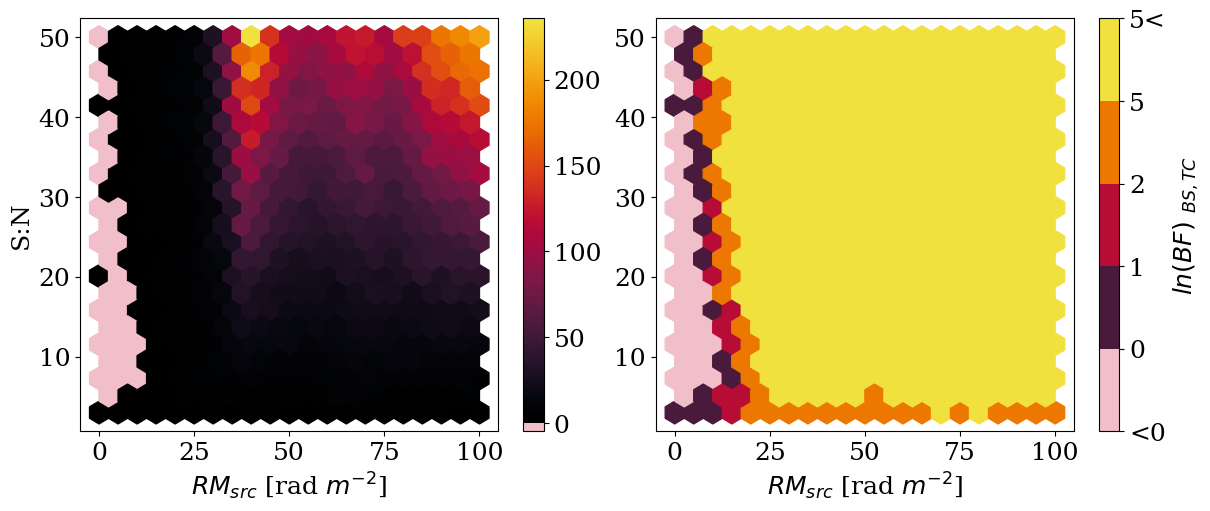

In [36]:
from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True, constrained_layout=True) 
 
bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 250)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 5)), 
                top(np.linspace(0 , 1 , 251))))
newcmp = ListedColormap(newcolors , name='embersaph')
 
bounds = [-100, 0,  1,  2,  5,  10000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)
 
 
hex1 = ax_test[0].hexbin(comb_BS_BS_merge_5000['RM_src_radm2'],comb_BS_BS_merge_5000['SNR'], comb_BS_BS_merge_5000['delta_evd_5_11'], reduce_C_function=np.median, gridsize=20, vmin=-4.8, cmap=newcmp) 
ax_test[0].set_xlabel('$RM_{src}$ [rad $m^{-2}$]') 
ax_test[0].set_ylabel('S:N') 
 
hex2 = ax_test[1].hexbin(comb_BS_BS_merge_5000['RM_src_radm2'],comb_BS_BS_merge_5000['SNR'], comb_BS_BS_merge_5000['delta_evd_5_11'], norm=norm, reduce_C_function=np.median,  gridsize=20, cmap=cmap) 
ax_test[1].set_xlabel('$RM_{src}$ [rad $m^{-2}$]') 
#plt.ylabel(values_interest[y_index]) 
#ax_test[0].set_title('Slab') 
 
 

 
cb2 = plt.colorbar(hex1) 
 
labels = ['<0','0', '1', '2','5', '5<'] 
cb = plt.colorbar(hex2, label='$ln(BF)$ $_{BS,TC}$', ticklocation='bottom') 
cb.ax.set_yticklabels(labels) 
fig_chi.savefig('comb_BS_TC.pdf', format='pdf')
plt.show() 

5000


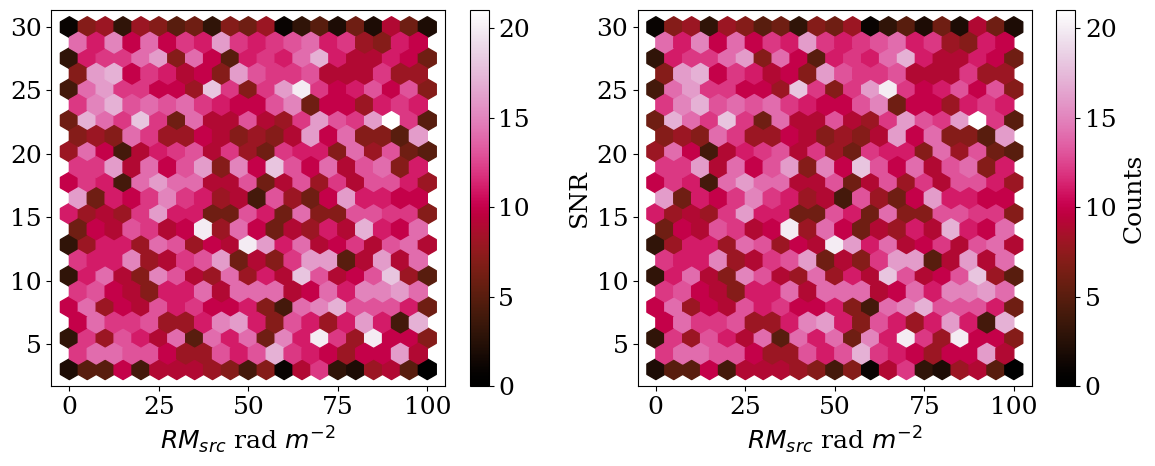

In [37]:

from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True) 
 
 
 
print(len(BS_BS_merge_5000)) 
hex2= ax_test[1].hexbin(BS_BS_merge_5000['RM_src_radm2'],BS_BS_merge_5000['SNR'],reduce_C_function=np.sum, gridsize=20, cmap='cmr.flamingo') 
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$') 
ax_test[1].set_ylabel(values_interest[y_index]) 
 
hex1 = ax_test[0].hexbin(BS_BS_merge_5000['RM_src_radm2'],BS_BS_merge_5000['SNR'], reduce_C_function=np.sum, gridsize=20, cmap='cmr.flamingo') 
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$') 
 
 
cb2 = plt.colorbar(hex2, label='Counts') 
cb = plt.colorbar(hex1) 
 
plt.tight_layout() 
plt.show()


# Two Component Sims Band 1

Import the data band 1

In [78]:
#Two Component Simple 
TC_2C_10000_b1_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/two_component/band1/b1_2C_condensed_sim11_model_num_10000_sims.csv') #band1_condensed_simBS_model_num_11_sims 
TC_BS_10000_b1_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/two_component/band1/b1_2C_condensed_sim5_model_num_10000_sims.csv') 
#BS_2C_800_test_df = pd.read_csv('/Users/loberhel/Desktop/condensed_simBS_model_num_11_sims.csv') 
 
TC_10000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/two_component/band1/two_component_number_10000_freq_800_1089_SNR_band1.csv') 
TC_10000_true_df.rename( columns={'Unnamed: 0':'src'}, inplace=True ) 
TC_2C_10000_b1_df['src'] = TC_2C_10000_b1_df['src'] - 1 
TC_BS_10000_b1_df['src'] = TC_BS_10000_b1_df['src'] - 1 
#BS_2C_800_test_df['src'] = BS_2C_800_test_df['src'] - 1 
print(len(TC_2C_10000_b1_df)) 
 
TC_BS_merge_10000_b1 = pd.merge(TC_BS_10000_b1_df, TC_10000_true_df, on='src', how='outer') 
TC_2C_merge_10000_b1 = pd.merge(TC_2C_10000_b1_df, TC_10000_true_df, on='src', how='outer') 
print(TC_2C_merge_10000_b1.keys())



9944
Index(['Unnamed: 0', 'src', 'fracPol1', 'fracPol2', 'psi01_deg', 'psi02_deg',
       'RM1_radm2', 'RM2_radm2', 'fracPol1_plus_err', 'fracPol2_plus_err',
       'psi01_deg_plus_err', 'psi02_deg_plus_err', 'RM1_radm2_plus_err',
       'RM2_radm2_plus_err', 'fracPol1_minus_err', 'fracPol2_minus_err',
       'psi01_deg_minus_err', 'psi02_deg_minus_err', 'RM1_radm2_minus_err',
       'RM2_radm2_minus_err', 'fracPol1_bounds', 'fracPol2_bounds',
       'psi01_deg_bounds', 'psi02_deg_bounds', 'RM1_radm2_bounds',
       'RM2_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg', 'psi0_2_deg',
       'RM_screen_radm2', 'RM_screen_2_radm2', 'RM_src_radm2', 'sigma_RM_2',
       'sigmaRM_FG', 'frac_pol_2_comp', 'SNR', 'model', 'frac_pol_seed',
       'RM_screen_seed', 'RM_source_seed', 'sigmaRM_seed', 'sigma_FG_seed',
       'psi0_seed'],
      dtype='object')


# Combined BAND

In [79]:
#Two Component Simple 
TC_2C_10000_comb_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/two_component_10000_comb/comb_2C_condensed_sim11_model_num_10000_sims.csv') #band1_condensed_simBS_model_num_11_sims 
TC_BS_10000_comb_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/two_component_10000_comb/comb_2C_condensed_sim5_model_num_10000_sims.csv') 
#BS_2C_800_test_df = pd.read_csv('/Users/loberhel/Desktop/condensed_simBS_model_num_11_sims.csv') 
 
TC_10000_true_comb_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/two_component_10000_comb/combined_band_two_component_number_10000_freq_800_1089_SNR.csv') 
TC_10000_true_comb_df.rename( columns={'Unnamed: 0':'src'}, inplace=True ) 
TC_2C_10000_comb_df['src'] = TC_2C_10000_comb_df['src'] - 1 
TC_BS_10000_comb_df['src'] = TC_BS_10000_comb_df['src'] - 1 
#BS_2C_800_test_df['src'] = BS_2C_800_test_df['src'] - 1 
TC_BS_merge_10000_comb = pd.merge(TC_BS_10000_comb_df, TC_10000_true_comb_df, on='src', how='outer') 
TC_2C_merge_10000_comb = pd.merge(TC_2C_10000_comb_df, TC_10000_true_comb_df, on='src', how='outer') 
print(TC_2C_merge_10000_comb.keys())
print(len(TC_2C_10000_comb_df))


Index(['Unnamed: 0', 'src', 'fracPol1', 'fracPol2', 'psi01_deg', 'psi02_deg',
       'RM1_radm2', 'RM2_radm2', 'fracPol1_plus_err', 'fracPol2_plus_err',
       'psi01_deg_plus_err', 'psi02_deg_plus_err', 'RM1_radm2_plus_err',
       'RM2_radm2_plus_err', 'fracPol1_minus_err', 'fracPol2_minus_err',
       'psi01_deg_minus_err', 'psi02_deg_minus_err', 'RM1_radm2_minus_err',
       'RM2_radm2_minus_err', 'fracPol1_bounds', 'fracPol2_bounds',
       'psi01_deg_bounds', 'psi02_deg_bounds', 'RM1_radm2_bounds',
       'RM2_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg', 'psi0_2_deg',
       'RM_screen_radm2', 'RM_screen_2_radm2', 'RM_src_radm2', 'sigma_RM_2',
       'sigmaRM_FG', 'frac_pol_2_comp', 'SNR', 'model', 'frac_pol_seed',
       'RM_screen_seed', 'RM_source_seed', 'sigmaRM_seed', 'sigma_FG_seed',
       'psi0_seed'],
      dtype='object')
9970


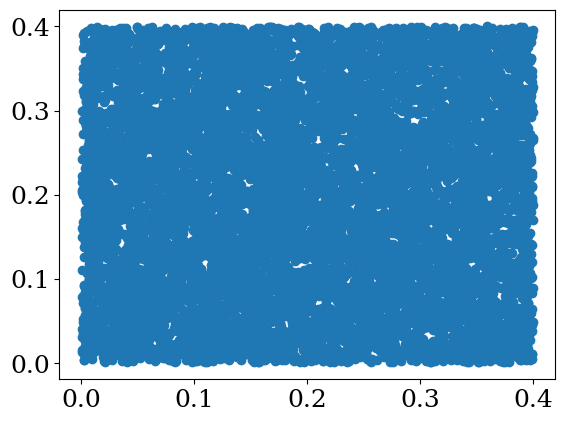

In [80]:
plt.scatter(TC_BS_merge_10000_comb.frac_pol, TC_BS_merge_10000_comb.frac_pol_2_comp)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_71801/1150293764.py:2: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta RM_{screen}$')


Text(0.5, 0, '$\\Delta RM_{screen}$')

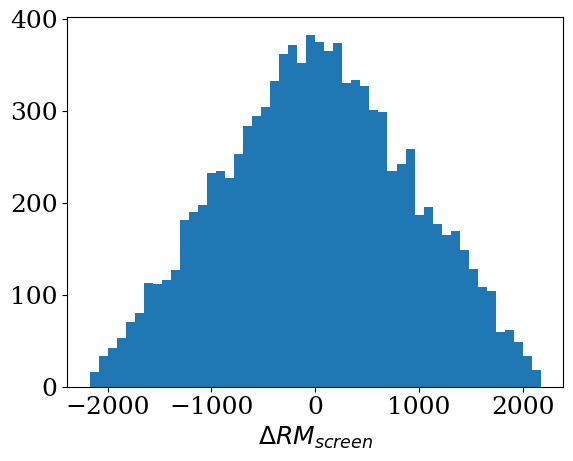

In [81]:
plt.hist(TC_2C_merge_10000_b1.RM_screen_radm2 - TC_2C_merge_10000_b1.RM_screen_2_radm2, bins=50) 
plt.xlabel('$\Delta RM_{screen}$')

Text(0.5, 0, '$RM_{screen}$')

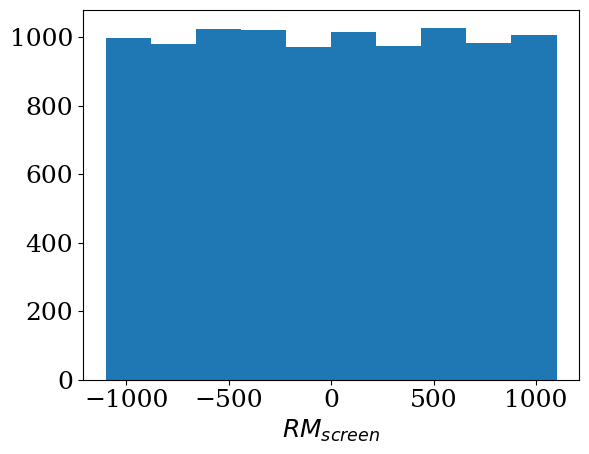

In [82]:
plt.hist(TC_2C_merge_10000_b1.RM_screen_2_radm2) 
plt.xlabel('$RM_{screen}$')

Text(0.5, 0, '$RM_{screen}$')

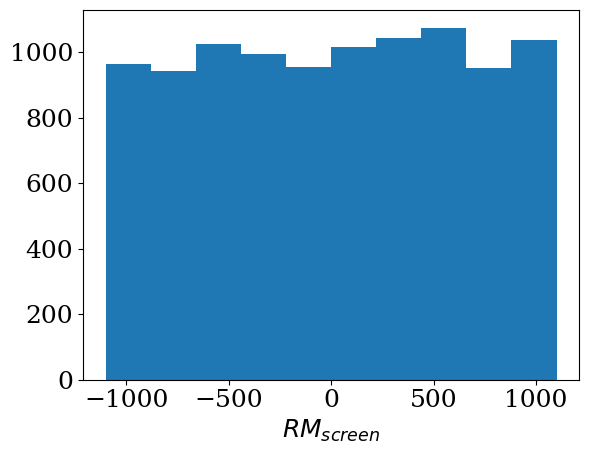

In [83]:
plt.hist(TC_2C_merge_10000_b1.RM_screen_radm2) 
plt.xlabel('$RM_{screen}$')

In [84]:
TC_2C_merge_10000_comb['delta_evd_11_5'] = TC_2C_merge_10000_comb['ln(EVIDENCE) '] - TC_BS_merge_10000_comb['ln(EVIDENCE) '] 
TC_2C_merge_10000_comb['delta_BIC_11_5'] = TC_2C_merge_10000_comb.BIC - TC_BS_merge_10000_comb.BIC 
TC_2C_merge_10000_comb['delta_AIC_11_5'] = TC_2C_merge_10000_comb.AIC - TC_BS_merge_10000_comb.AIC

TC_2C_merge_10000_b1['delta_evd_11_5'] = TC_2C_merge_10000_b1['ln(EVIDENCE) '] - TC_BS_merge_10000_b1['ln(EVIDENCE) '] 
TC_2C_merge_10000_b1['delta_BIC_11_5'] = TC_2C_merge_10000_b1.BIC - TC_BS_merge_10000_b1.BIC 
TC_2C_merge_10000_b1['delta_AIC_11_5'] = TC_2C_merge_10000_b1.AIC - TC_BS_merge_10000_b1.AIC



# SWITCH THE COMPONENTS BAND 1

 Need to make sure that the components are the correct way round U fitting will select starting fr
 om Right to Left so that the highest RM values is the first component and the lower RM that it finds is the second component. I did not arrange for it to be this way in reality.

In [102]:
component_1_RM = [] 
component_2_RM = [] 
component_1_p = [] 
component_2_p = [] 
component_1_psi = [] 
component_2_psi = [] 




print(TC_2C_merge_10000_b1.keys())
#RM 2 must be the smaller value always  
#So when you do C1 - C2 always a positive number 
for i in range(len(TC_2C_merge_10000_b1.RM_screen_radm2)): 
    
    if TC_2C_merge_10000_b1.RM_screen_radm2[i] > TC_2C_merge_10000_b1.RM_screen_2_radm2[i]: 
  
        component_1_RM.append(TC_2C_merge_10000_b1.RM_screen_radm2[i]) 
        component_2_RM.append(TC_2C_merge_10000_b1.RM_screen_2_radm2[i]) 
        component_1_p.append(TC_2C_merge_10000_b1.frac_pol[i]) 
        component_2_p.append(TC_2C_merge_10000_b1.frac_pol_2_comp[i]) 
        component_1_psi.append(TC_2C_merge_10000_b1.psi0_deg[i]) 
        component_2_psi.append(TC_2C_merge_10000_b1.psi0_2_deg[i]) 

    
 
    elif TC_2C_merge_10000_b1.RM_screen_radm2[i] < TC_2C_merge_10000_b1.RM_screen_2_radm2[i]: 
        #Switch 1 and 2 
    
        component_1_RM.append(TC_2C_merge_10000_b1.RM_screen_2_radm2[i]) 
        component_2_RM.append(TC_2C_merge_10000_b1.RM_screen_radm2[i]) 
        component_1_p.append(TC_2C_merge_10000_b1.frac_pol_2_comp[i]) 
        component_2_p.append(TC_2C_merge_10000_b1.frac_pol[i]) 
        component_1_psi.append(TC_2C_merge_10000_b1.psi0_2_deg[i]) 
        component_2_psi.append(TC_2C_merge_10000_b1.psi0_deg[i]) 

 

component_1_RM = np.asarray(component_1_RM) 
component_2_RM = np.asarray(component_2_RM) 
component_1_p = np.asarray(component_1_p) 
component_2_p = np.asarray(component_2_p) 
component_1_psi = np.asarray(component_1_psi) 
component_2_psi = np.asarray(component_2_psi) 

fracpol_ratio = component_1_p / component_2_p

delta_psi = component_1_psi - component_2_psi
delta_RM_screen = component_1_RM - component_2_RM 
delta_p = component_1_p - component_2_p
ratio_p = component_1_p / component_2_p

delta_QU_p = TC_2C_merge_10000_b1.RM1_radm2 - TC_2C_merge_10000_b1.RM2_radm2
ratio_QU_p = TC_2C_merge_10000_b1.RM1_radm2 / TC_2C_merge_10000_b1.RM2_radm2


max_p = []
for i in range(len(component_1_p)):
    max_p.append(np.mean([component_1_p[i], component_2_p[i]]))

RM_C1_residual = component_1_RM - TC_2C_merge_10000_b1.RM1_radm2 
RM_C2_residual = component_2_RM  - TC_2C_merge_10000_b1.RM2_radm2

p_C1_residual = component_1_p  -  TC_2C_merge_10000_b1.fracPol1
p_C2_residual = component_2_p  - TC_2C_merge_10000_b1.fracPol2 
 
psi_C1_residual = component_1_psi - TC_2C_merge_10000_b1.psi01_deg
psi_C2_residual = component_2_psi - TC_2C_merge_10000_b1.psi02_deg

SNlimit = 1
#Error


#RM_sep_b1_2 = np.concatenate((RM_sep_b1, RM_sep_b1))
balh = RM_C1_residual[(TC_2C_merge_10000_b1['ln(EVIDENCE) '] > SNlimit)]
balh2 = RM_C2_residual[(proxy_2_b1 > SNlimit) & (proxy_1_b1 > SNlimit)]
RM_resid_comb_2 = np.concatenate((balh, balh2))


RM_C1_residual_err_b1 = []
RM_C2_residual_err_b1 = []

p_C1_residual_err_b1 = []
p_C2_residual_err_b1 = []

psi_C2_residual_err_b1 = []
psi_C1_residual_err_b1 = []

SNlimit = 1
#Error
for i in range(len(psi_C1_residual)):
    if psi_C1_residual[i] < 0:
        psi_C1_residual_err_b1.append(TC_2C_merge_10000_b1.psi01_deg_minus_err[i])
        
    else:
        psi_C1_residual_err_b1.append(TC_2C_merge_10000_b1.psi01_deg_plus_err[i])

    if psi_C2_residual[i] < 0:
        psi_C2_residual_err_b1.append(TC_2C_merge_10000_b1.psi02_deg_minus_err[i])
        
    else:
        psi_C2_residual_err_b1.append(TC_2C_merge_10000_b1.psi02_deg_plus_err[i])

for k in range(len(p_C1_residual)):
    if p_C1_residual[k] < 0:
        p_C1_residual_err_b1.append(TC_2C_merge_10000_b1.fracPol1_minus_err[k])
        
    else:
        p_C1_residual_err_b1.append(TC_2C_merge_10000_b1.fracPol1_plus_err[k])

    if p_C2_residual[k] < 0:
        p_C2_residual_err_b1.append(TC_2C_merge_10000_b1.fracPol2_minus_err[k])
        
    else:
        p_C2_residual_err_b1.append(TC_2C_merge_10000_b1.fracPol2_plus_err[k])

for i in range(len(RM_C1_residual)):
    if RM_C1_residual[i] < 0:
        RM_C1_residual_err_b1.append(TC_2C_merge_10000_b1.RM1_radm2_minus_err[i])
        
    else:
        RM_C1_residual_err_b1.append(TC_2C_merge_10000_b1.RM1_radm2_plus_err[i])

    if RM_C2_residual[i] < 0:
        RM_C2_residual_err_b1.append(TC_2C_merge_10000_b1.RM2_radm2_minus_err[i])
        
    else:
        RM_C2_residual_err_b1.append(TC_2C_merge_10000_b1.RM2_radm2_plus_err[i])


RM_C1_residual_err_b1 = np.asarray(RM_C1_residual_err_b1)
RM_C2_residual_err_b1 = np.asarray(RM_C2_residual_err_b1)

p_C1_residual_err_b1 = np.asarray(p_C1_residual_err_b1)
p_C2_residual_err_b1 = np.asarray(p_C2_residual_err_b1)

psi_C2_residual_err_b1 = np.asarray(psi_C1_residual_err_b1)
psi_C1_residual_err_b1 = np.asarray(psi_C2_residual_err_b1)

RM_C1_residual_scaled = RM_C1_residual /  RM_C1_residual_err_b1
RM_C2_residual_scaled = RM_C2_residual /  RM_C2_residual_err_b1

p_scaled_residual = psi_C1_residual / psi_C1_residual_err_b1

l = RM_C2_residual[(abs(delta_RM_screen)< 50) & (abs(RM_C2_residual) < 100)]
print(len(l))
print(np.nanmean(l), np.nanstd(l), np.nanmedian(l))
print(np.nanmean(p_err_resid), np.nanstd(p_err_resid), np.nanmedian(p_err_resid))
print(np.nanmean(pis_err_resid), np.nanstd(pis_err_resid), np.nanmedian(pis_err_resid))




Index(['Unnamed: 0', 'src', 'fracPol1', 'fracPol2', 'psi01_deg', 'psi02_deg',
       'RM1_radm2', 'RM2_radm2', 'fracPol1_plus_err', 'fracPol2_plus_err',
       'psi01_deg_plus_err', 'psi02_deg_plus_err', 'RM1_radm2_plus_err',
       'RM2_radm2_plus_err', 'fracPol1_minus_err', 'fracPol2_minus_err',
       'psi01_deg_minus_err', 'psi02_deg_minus_err', 'RM1_radm2_minus_err',
       'RM2_radm2_minus_err', 'fracPol1_bounds', 'fracPol2_bounds',
       'psi01_deg_bounds', 'psi02_deg_bounds', 'RM1_radm2_bounds',
       'RM2_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg', 'psi0_2_deg',
       'RM_screen_radm2', 'RM_screen_2_radm2', 'RM_src_radm2', 'sigma_RM_2',
       'sigmaRM_FG', 'frac_pol_2_comp', 'SNR', 'model', 'frac_pol_seed',
       'RM_screen_seed', 'RM_source_seed', 'sigmaRM_seed', 'sigma_FG_seed',
       'psi0_seed', 'delta_evd_11_5', 'delta_BIC_11_5', 'delta_AIC_11_5'],
      dtype='object')
321
-1.86641430655

NameError: name 'p_err_resid' is not defined

# Check out seperation

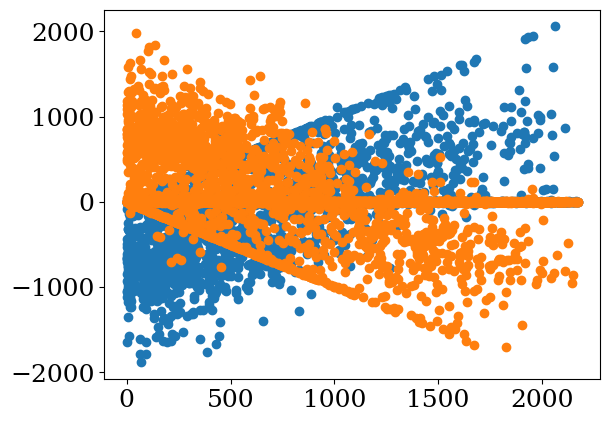

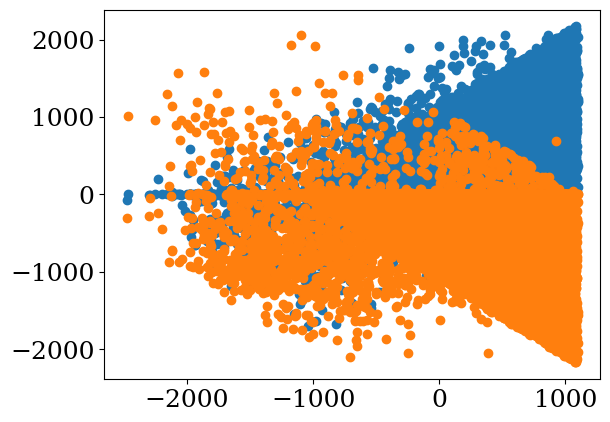

In [103]:
plt.scatter(delta_RM_screen, RM_C1_residual)
plt.scatter(delta_RM_screen, RM_C2_residual)
plt.show()

plt.scatter(TC_2C_merge_10000_b1.RM_screen_2_radm2 - TC_2C_merge_10000_b1.RM1_radm2_plus_err, TC_2C_merge_10000_b1.RM_screen_2_radm2 - TC_2C_merge_10000_b1.RM2_radm2)

plt.scatter(TC_2C_merge_10000_b1.RM_screen_2_radm2 - TC_2C_merge_10000_b1.RM1_radm2_plus_err, TC_2C_merge_10000_b1.RM_screen_radm2 - TC_2C_merge_10000_b1.RM1_radm2)

In [104]:
(TC_2C_merge_10000_b1.keys())

Index(['Unnamed: 0', 'src', 'fracPol1', 'fracPol2', 'psi01_deg', 'psi02_deg',
       'RM1_radm2', 'RM2_radm2', 'fracPol1_plus_err', 'fracPol2_plus_err',
       'psi01_deg_plus_err', 'psi02_deg_plus_err', 'RM1_radm2_plus_err',
       'RM2_radm2_plus_err', 'fracPol1_minus_err', 'fracPol2_minus_err',
       'psi01_deg_minus_err', 'psi02_deg_minus_err', 'RM1_radm2_minus_err',
       'RM2_radm2_minus_err', 'fracPol1_bounds', 'fracPol2_bounds',
       'psi01_deg_bounds', 'psi02_deg_bounds', 'RM1_radm2_bounds',
       'RM2_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg', 'psi0_2_deg',
       'RM_screen_radm2', 'RM_screen_2_radm2', 'RM_src_radm2', 'sigma_RM_2',
       'sigmaRM_FG', 'frac_pol_2_comp', 'SNR', 'model', 'frac_pol_seed',
       'RM_screen_seed', 'RM_source_seed', 'sigmaRM_seed', 'sigma_FG_seed',
       'psi0_seed', 'delta_evd_11_5', 'delta_BIC_11_5', 'delta_AIC_11_5'],
      dtype='object')

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_71801/3203772619.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.colorbar(label='Maximum $\epsilon_{RM_{screen}}$')


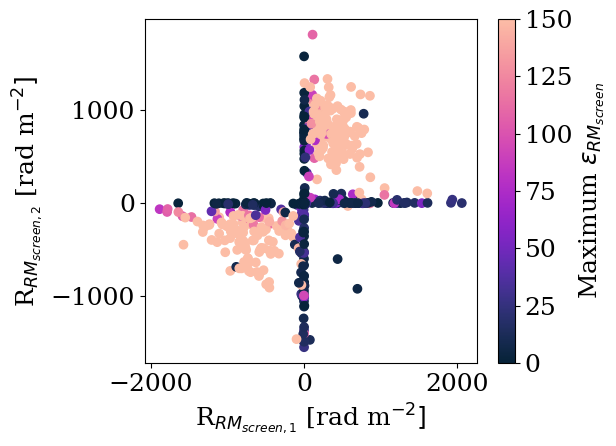

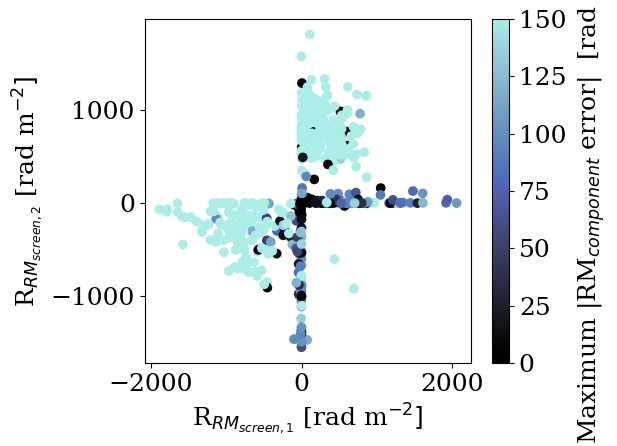

5960.0


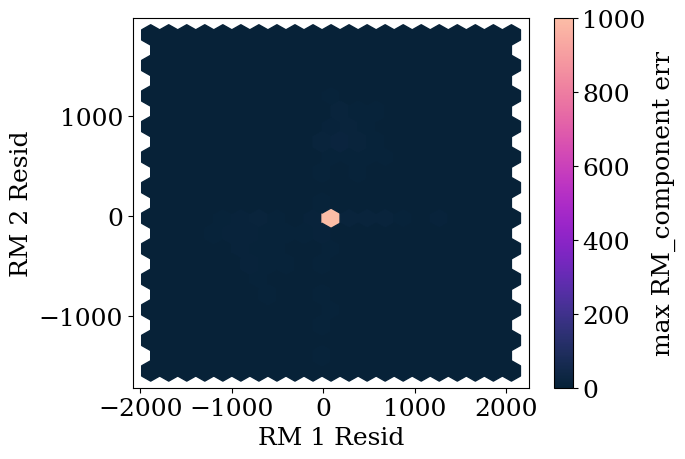

Text(0, 0.5, 'RM 2 Resid')

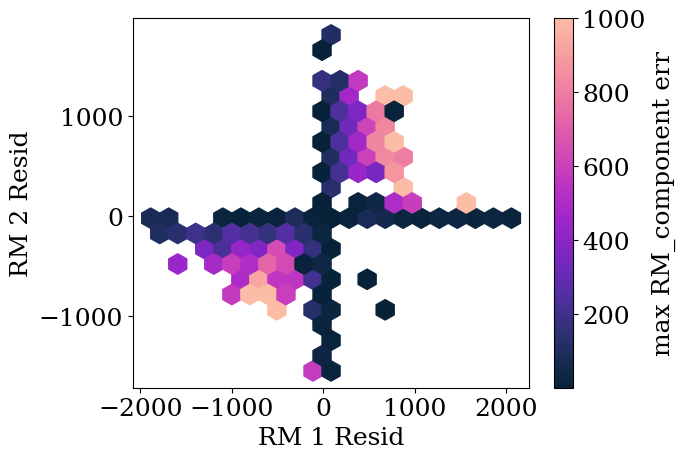

In [105]:
max_component_b1_residual_err = np.maximum(abs(RM_C1_residual_scaled), abs(RM_C2_residual_scaled))
max_error_b1 = np.maximum(abs(RM_C1_residual_err_b1), abs(RM_C2_residual_err_b1))
SN = 6
plt.scatter(RM_C1_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], c=max_component_b1_residual_err[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)],cmap='cmr.bubblegum',vmin=0, vmax=150)
plt.colorbar(label='Maximum $\epsilon_{RM_{screen}}$')
plt.xlabel('R$_{RM_{screen,1}}$ [rad m$^{-2}]$')
plt.ylabel('R$_{RM_{screen,2}}$ [rad m$^{-2}]$')
plt.tight_layout()
plt.savefig('2C_sigma_cross_plot.pdf', format='pdf')
plt.show()

plt.scatter(RM_C1_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], c=max_error_b1[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)],cmap='cmr.sapphire', vmin=0, vmax=150)
plt.colorbar(label='Maximum |RM$_{component}$ error|  [rad m$^{-2}]$')
plt.xlabel('R$_{RM_{screen,1}}$ [rad m$^{-2}]$')
plt.ylabel('R$_{RM_{screen,2}}$ [rad m$^{-2}]$')
plt.tight_layout()
plt.savefig('2C_error_cross_plot.pdf', format='pdf')
plt.show()

counts = plt.hexbin(RM_C1_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], reduce_C_function=np.sum, gridsize=20, cmap='cmr.bubblegum', vmax=1000)
plt.colorbar(label='max RM_component err')

plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
print(np.max(counts.get_array()))
plt.show()

plt.hexbin(RM_C1_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], max_component_b1_residual_err[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], reduce_C_function=np.mean, gridsize=20, cmap='cmr.bubblegum', vmax=1000)
plt.colorbar(label='max RM_component err')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')

# Combined Bands

In [89]:
component_1_RM_comb = [] 
component_2_RM_comb  = [] 
component_1_p_comb  = [] 
component_2_p_comb  = [] 
component_1_psi_comb  = [] 
component_2_psi_comb  = [] 

 
#RM 2 must be the smaller value always  
#So when you do C1 - C2 always a positive number 
for i in range(len(TC_2C_merge_10000_comb.RM_screen_2_radm2)): 
    
    if TC_2C_merge_10000_comb.RM_screen_radm2[i] > TC_2C_merge_10000_comb.RM_screen_2_radm2[i]: 

        component_1_RM_comb.append(TC_2C_merge_10000_comb.RM_screen_radm2[i]) 
        component_2_RM_comb.append(TC_2C_merge_10000_comb.RM_screen_2_radm2[i])
        component_1_p_comb.append(TC_2C_merge_10000_comb.frac_pol[i]) 
        component_2_p_comb.append(TC_2C_merge_10000_comb.frac_pol_2_comp[i])         
        component_1_psi_comb.append(TC_2C_merge_10000_comb.psi0_deg[i]) 
        component_2_psi_comb.append(TC_2C_merge_10000_comb.psi0_2_deg[i]) 

 
 
    elif TC_2C_merge_10000_comb.RM_screen_radm2[i] < TC_2C_merge_10000_comb.RM_screen_2_radm2[i]:  
        #Switch 1 and 2 
        component_1_RM_comb.append(TC_2C_merge_10000_comb.RM_screen_2_radm2[i]) 
        component_2_RM_comb.append(TC_2C_merge_10000_comb.RM_screen_radm2[i]) 
        component_1_p_comb.append(TC_2C_merge_10000_comb.frac_pol_2_comp[i]) 
        component_2_p_comb.append(TC_2C_merge_10000_comb.frac_pol[i]) 
        component_1_psi_comb.append(TC_2C_merge_10000_comb.psi0_2_deg[i]) 
        component_2_psi_comb.append(TC_2C_merge_10000_comb.psi0_deg[i]) 

component_1_RM_comb = np.asarray(component_1_RM_comb) 
component_2_RM_comb = np.asarray(component_2_RM_comb) 
component_1_p_comb = np.asarray(component_1_p_comb) 
component_2_p_comb = np.asarray(component_2_p_comb) 
component_1_psi_comb = np.asarray(component_1_psi_comb) 
component_2_psi_comb = np.asarray(component_2_psi_comb) 

fracpol_ratio_comb = component_1_p_comb /  component_2_p_comb

RM_C1_residual_comb = component_1_RM_comb - TC_2C_merge_10000_comb.RM1_radm2 
RM_C2_residual_comb = component_2_RM_comb  - TC_2C_merge_10000_comb.RM2_radm2

p_C1_residual_comb = component_1_p_comb  -  TC_2C_merge_10000_comb.fracPol1
p_C2_residual_comb = component_2_p_comb  - TC_2C_merge_10000_comb.fracPol2 
 
psi_C1_residual_comb = component_1_psi_comb - TC_2C_merge_10000_comb.psi01_deg
psi_C2_residual_comb = component_2_psi_comb - TC_2C_merge_10000_comb.psi02_deg


RM_C1_residual_err = []
RM_C2_residual_err = []

p_C1_residual_err = []
p_C2_residual_err = []

psi_C2_residual_err = []
psi_C1_residual_err = []

SNlimit = 1
#Error
for i in range(len(psi_C1_residual_comb)):
    if psi_C1_residual_comb[i] < 0:
        psi_C1_residual_err.append(TC_2C_merge_10000_comb.psi01_deg_minus_err[i])
        
    else:
        psi_C1_residual_err.append(TC_2C_merge_10000_comb.psi01_deg_plus_err[i])

    if psi_C2_residual_comb[i] < 0:
        psi_C2_residual_err.append(TC_2C_merge_10000_comb.psi02_deg_minus_err[i])
        
    else:
        psi_C2_residual_err.append(TC_2C_merge_10000_comb.psi02_deg_plus_err[i])

for k in range(len(psi_C1_residual_comb)):
    if p_C1_residual_comb[k] < 0:
        p_C1_residual_err.append(TC_2C_merge_10000_comb.fracPol1_minus_err[k])
        
    else:
        p_C1_residual_err.append(TC_2C_merge_10000_comb.fracPol1_plus_err[k])

    if p_C2_residual_comb[k] < 0:
        p_C2_residual_err.append(TC_2C_merge_10000_comb.fracPol2_minus_err[k])
        
    else:
        p_C2_residual_err.append(TC_2C_merge_10000_comb.fracPol2_plus_err[k])

for i in range(len(RM_C1_residual_comb)):
    if RM_C1_residual_comb[i] < 0:
        RM_C1_residual_err.append(TC_2C_merge_10000_comb.RM1_radm2_minus_err[i])
        
    else:
        RM_C1_residual_err.append(TC_2C_merge_10000_comb.RM1_radm2_plus_err[i])

    if RM_C2_residual_comb[i] < 0:
        RM_C2_residual_err.append(TC_2C_merge_10000_comb.RM2_radm2_minus_err[i])
        
    else:
        RM_C2_residual_err.append(TC_2C_merge_10000_comb.RM2_radm2_plus_err[i])


RM_C1_residual_err = np.asarray(RM_C1_residual_err)
RM_C2_residual_err = np.asarray(RM_C2_residual_err)

p_C1_residual_err = np.asarray(p_C1_residual_err)
p_C2_residual_err = np.asarray(p_C2_residual_err)

psi_C2_residual_err = np.asarray(psi_C2_residual_err)
psi_C1_residual_err = np.asarray(psi_C1_residual_err)


#Error scaled Residuals
RM_C1_residual_err_comb = RM_C1_residual_comb / RM_C1_residual_err
RM_C2_residual_err_comb = RM_C2_residual_comb / RM_C2_residual_err


p_C1_residual_err_comb = p_C1_residual_comb / p_C1_residual_err
p_C2_residual_err_comb = p_C2_residual_comb / p_C2_residual_err

psi_C1_residual_err_comb = component_1_psi_comb / psi_C1_residual_err
psi_C2_residual_err_comb = component_2_psi_comb / psi_C2_residual_err


delta_psi_n_comb = component_1_psi_comb - component_2_psi_comb 
delta_RM_screen_comb = component_1_RM_comb - component_2_RM_comb 
ratio_p_comb = component_1_p_comb / component_2_p_comb



l2 = p_C1_residual_err_comb[(abs(RM_C1_residual_comb) < 30) & (abs(RM_C2_residual_comb) < 30)]

print(np.nanmean(RM_C1_residual_err_comb), np.std(RM_C1_residual_err_comb), np.nanmedian(RM_C1_residual_err_comb))
print(np.nanmean(p_C1_residual_err_comb), np.nanstd(p_C1_residual_err_comb), np.nanmedian(p_C1_residual_err_comb))
print(np.nanmean(l2), np.nanstd(l2), np.nanmedian(l2))




24.248529955028 159.3596412768676 0.01682207067410295
0.3900644946852898 6.585987434742134 0.17207795649583996
0.5049214494422088 1.8244501789588587 0.19540060563208167


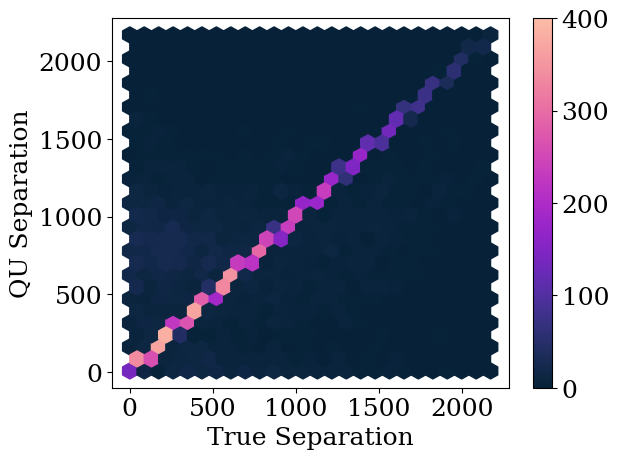

NameError: name 'proxy_1_b1' is not defined

In [90]:

SN = 6
plt.hexbin(delta_RM_screen,TC_2C_merge_10000_b1.RM1_radm2 - TC_2C_merge_10000_b1.RM2_radm2, reduce_C_function=np.sum, vmax=400, gridsize = 25, cmap='cmr.bubblegum')
plt.colorbar()
plt.xlabel('True Separation')
plt.ylabel('QU Separation')
plt.show()

psi_sep=TC_2C_merge_10000_b1.psi0_deg-TC_2C_merge_10000_b1.psi0_2_deg

plt.scatter(delta_RM_screen[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)],TC_2C_merge_10000_b1.RM1_radm2[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)] - TC_2C_merge_10000_b1.RM2_radm2[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)],  c=psi_sep[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], cmap='viridis')
plt.colorbar(label='RM 2 Residual')
plt.xlim(0,100)
plt.xlabel('True Separation')
plt.ylabel('QU Separation')
plt.show()

plt.scatter(RM_C1_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)],  c=proxy_1_comb[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], vmax=40, cmap='cmr.bubblegum')
plt.colorbar(label='SN 1')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

plt.scatter(RM_C1_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)],  c=proxy_2_comb[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], vmax=40, cmap='cmr.bubblegum')
plt.colorbar(label='SN 2')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

counts = plt.hexbin(RM_C1_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], reduce_C_function=np.sum, vmax=20, gridsize = 25, cmap='cmr.bubblegum')
plt.colorbar()
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

print(np.sum(counts.get_array()))


plt.scatter(RM_C1_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], c=np.abs(np.log10(fracpol_ratio_comb[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)])), cmap='cmr.bubblegum', vmax=1.0)
plt.colorbar(label='p1/p2')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()


max_err_b1 = np.maximum(TC_2C_merge_10000_comb.RM2_radm2_minus_err, TC_2C_merge_10000_comb.RM1_radm2_minus_err)

plt.scatter(RM_C1_residual_comb[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual_comb[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], c=max_err_b1[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], vmax=100)
plt.colorbar(label='Max RM_component err')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

plt.scatter(RM_C1_residual_comb[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], RM_C2_residual_comb[(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], c=TC_2C_merge_10000_b1['chiSqRed'][(proxy_1_b1 > SN) & (proxy_2_b1 > SN)], cmap='cmr.bubblegum', vmin=0.0, vmax=1.0)
plt.colorbar(label='Reduced Chi Sqr')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAloAAAG9CAYAAADN8thNAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAD6nklEQVR4nOzdd3xUVdrA8d+5d0p6TyCBQELoNVSli9gQe0Vdy+K6a1l7xX1FZV3Zte+6a1nrWlBUsGJDUFAEpNdQE2pIL5M27d7z/jFJYMhMEkgI7Xz9zAcyc+bec0dy7zPnPPc5QkopURRFURRFUVqddrQ7oCiKoiiKcqJSgZaiKIqiKMoRogItRVEURVGUI0QFWoqiKIqiKEeICrQURVEURVGOEBVoKYqiKIqiHCEq0FIURVEURTlCVKClKIqiKIpyhKhAS1EURVEU5QhRgZaiKIqiKMesV199FSEEjz322NHuymFRgZaiKIqiKMek0tJS/vKXvwR9PSsri3PPPZeePXvSvXt3Jk2axN69e9uwh01TgZaiKIqiKMekRx55hFGjRgV8bdeuXYwePZq+ffuSlZXFxo0bEUIwduxYHA5HG/c0OBVoKYqiKIpyzFm7di2zZs0KOmX46KOPYhgG06ZNQwiBxWLh2WefJScnhxdeeKFN+9oYFWgpiqIoinLMueOOO5g2bRoxMTENXjMMg1mzZjFy5EhCQkLqn09JSaFnz57MnDmzDXvaOMvR7oDiY5omubm5REZGIoQ42t1RFEVRjlFSSioqKkhJSUHTjtx4idPpxO12t8q2pJQNrm12ux273R6w/cyZM3E4HNx4443s2rWrwevZ2dlUVFSQkZHR4LWMjAzmzJmDy+UKuv22pAKtY0Rubi6pqalHuxuKoijKcWL37t107NjxiGzb6XSS3iGZvJKyVtleREQElZWVfs89+uijAacFq6ureeCBB5gxY0bQQLKwsBCAqKioBq9FRUVhmiYlJSUkJye3vPMtpAKtY0RkZCTg+8UJ9A9HURRFUQAcDgepqan1140jwe12k1dSxo4PXyQqLLRF23JU15A26fYG17dgo03Tp09n1KhRjBw5skX7PVaoQOsYUTekGhUVpQItRVEUpUltkWYSFRJKVGhYyzZi1m6rGde3nJwcXn75ZdasWdNou4SEBICAdxc6HA40TSMuLu7w+tvKVKClKIqiKEpAUvoeLd1Gc/3www+Eh4czceLE+ufq8sReeeUVPvvsM3r06MGMGTOIjIwkOzu7wTays7Pp2bPnMZGfBSrQUhRFURQlmDaOtG666SZuuukmv+d27NhBeno6N998s19O1yWXXMIXX3zhl/S+b98+srKymDp1asv63IpUeQdFURRFUY47jz/+OJqmMXXqVKSUeL1e7rvvPtLT07n77ruPdvfqqUBLURRFUZTAZCs9DkNZWRmZmZmce+65gG/qMDMzk3feeQeAzp07s3DhQtauXUuvXr3o3bs3Xq+Xn3766ZjKdVZTh4qiKIqiBCapT2Zv0TYOQ0xMDKtXr260Te/evfnmm28ObwdtRI1oKYqiKIqiHCFqREtRFEVRlMDa+rbDE5AKtBRFURRFCUjFWS2npg4VRVEURVGOEDWipSjKMWtvbjHvfDCfr775jeoaFxnp7fndpNM5f8IwdF19T1SUI64Fdw36beMkpgItRVGOSWvW5XDtH5/F5fJgGL7bntZu2MF9f3mDb+Yu59/P3IzVqk5hinJEmbT8rsOWvv84p74SKopyzHF7vPzpzn/jdLrrgywA0/R9NZ6/YC1vvjv3aHVPURSl2VSgpSjKMWfuvFUUFTvqA6uDSSl5+/15fkGYoihHgGR/RvxhP472QRxdKtBSFOWYs2pdNhaL3mibwqJy8gvL2qZDinKyOoqV4U8UKsFBUZRjjq5pzbon3KIS4hXliFLlHVpOnaUURTnmjDy1F95GpgWFgC5p7UhMiG7DXimKohw6FWgpinLMGTW8NxldkoOWcJAS/vj7CQgh2rhninKSMVvpcRJTgZaiKMccTdN4/cXbad8uFqA+oKoLvG664WwuvXDEUeufopw0WpwI3wpzj8c5laOlKMoxKbVjIt/Mepwvv/2Nr79bTmVVDT26dmDSZWPo3zf9aHdPURSlWVSgpSjKMSsszM6Vl4zmyktGH+2uKMrJSVWGbzEVaCmKoiiKEpC667DlVI6WoiiKoijKEaJGtBRFURRFCUxNHbaYCrQURVEURQlMLSrdYmrqUFEURVEU5QhRI1qKoiiKogSmsuFbTAVaiqIoiqIEpOKsllOBlqIoiqIowZ3kgVJLqRwtRVEURVGUI0SNaCmKoiiKEpi667DFVKClKIqiKEpAKker5dTUoaIoiqIoyhGiRrQURWlzUko82QW4N+YiDQNrajz2/p0QVv1od01RlAOpyvAtpgItRVHalOGoofyNn/DuKgZNgIAaQyLClhH9+zHYurY/2l1UFKWOCrRaTE0dKorSZqRhUvbyPLx7SnxPmBIM31lY1rgpe3U+3vzyo9hDRVGU1qUCLUVR2oxrwx6MvDJfgHUwCZiS6h83tnW3FEUJxpSt8ziJqUBLUZQ241qzyzddGIwpca3a2XYdUhSlUXV3Hbb0cTJTgZaiKG1GOj1NfruVHi/yZD8zK4pywlDJ8IqitBk9KQo25TYabOkJkQjRyKiXoiht5ygkw+/atYtXXnmFuXPnYhgGTqcTq9XKjTfeyO23315/fnjsscd48803iYuL83t/bGwsP/74Yws73XpOmECrrKyM2267jRkzZpCTk0NaWtrR7pKiKAcJHd6Nmp+yGm8zskcb9UZRlCYdhUBr/vz5/Otf/2Lu3LkMHz4cgNmzZ3PZZZdRUVHBX/7yl/q206ZN44YbbmhhB4+sE2Lq8Pvvv2fQoEGsWbMmaJvHHnuMTp06kZmZ6fcYN25cg7amafLUU0/Ru3dv+vfvT//+/XnjjTcCbnfv3r1MmjSJ7t2707NnT84991yyshq/kCjKycqSFEX4uQMCvyjA2iWJ0JHd2rZTiqIEZ7bS4xC0b9+e+++/vz7IArjkkkvo168fs2bNatnxHAUnxIjWX//6V2bNmsXnn3/Ohg0bgrZrbuT74IMP8s4777B48WK6dOnC8uXLGT16NC6Xi1tvvbW+ncPhYOzYsQwdOpSNGzei6zoPPvggY8aMYcWKFXTq1Kk1Dk9RTijhZ/ZDj4+gau56jDxfKQcRZid0VHfCz+iLsKiipYpyMjvnnHM455xzGjxfUVFBt27H3xexEyLQ+vHHH7FYLHz++ect3tb27dt5/vnn+dvf/kaXLl0AGDJkCNdffz1TpkzhuuuuIyIiAoDnn3+enJwcFi5ciMXi+yinTZvGf//73/q5Y0VRGgoZlI59YBqmowYMEy06DKGfEAPsinJCac21Dh0Oh9/zdrsdu93e5PsrKiqYPn06VVVV/P3vf/d77dtvv+W9996jsLAQ0zQZN24cU6ZMITk5uWWdbkUnxJmtLshpDbNnz8YwDMaPH+/3/Pjx43E4HHzzzTf1z3300Uf06tWLlJSU+udCQkIYOXIkn3zyCaZ5ki9ZriiNEEKgR4ehx0WoIEtRjlWylR5Aamoq0dHR9Y/p06c3ufvevXsTGxvLF198wezZsxk4cGD9a2FhYQghmDFjBmvWrOGLL75g6dKlDB48mD179rTSB9ByJ9XZ7dtvv+WMM85gwIAB9OvXjzvuuIN9+/b5tVm9ejUAGRkZfs/X/VyXB+Z0Otm0aVODdnVtKyoqyM7ODtoXl8uFw+HweyiKoijKiWr37t2Ul5fXP6ZMmdLkezZu3Eh1dTX33HMPp59+Ok8//XT9aw888AAffPABSUlJAKSnp/Pmm2+yb98+nnjiiSN2HIfqpAm0mhv5FhYWAhAVFeX3/rqf614vKSnBNM0G7QK1DWT69Ol+kX1qamrLDlBRFEVRWlsrjmhFRUX5PZozbQhgs9mYPHky1113HVOmTGH79u1B2/bp04eoqCgWLVp0GAd7ZJw0gdaxFvlOmTLFL7LfvXt3m/dBURRFURojzdZ5HIqamhoMw2jwfGZmJoZhsHLlSgDy8vICvl/TtGMqdeekCbQCCRT5JiQkAA2T9up+TkxMBCAuLg5N0wJO+R3cNhC73d4gulcURVGUk92ECRP46KOPGjy/Y8cOYP91Ojk5mdzcXL8227dvp6ysjKFDhx7xfjbXSRNoNTfyzczMBGiQX1X384ABvhpAISEh9OjRI2AeVnZ2NpGRkfV3LSqKoijKcasVpg0P1fTp0+sDK4AFCxbw8ssvM2zYMMaMGVP//JQpU6ipqQGgvLycW265hejoaB5++OHD2/ERcNIEWs2NfC+99FJ0XWfevHl+befNm0dUVJRfbY8rrriCjRs3+iXUu1wuFi1axKWXXoqmnTQfr6IoinIiasUcreZ68sknOeWUU5g4cSL9+/cnIyODm2++mdtvv525c+ei675aezNmzKC8vJwhQ4bQt29f+vbtS1xcHEuXLqV79+4tP/ZWckLU0WquKVOm8MorrxAaGho08s3IyODuu+/mueee4/LLLyc9PZ0VK1bwv//9j6effprIyMj6tvfccw/vvvsu9913H//73//QdZ1HH30UXdd5/PHHj8YhKoqiKMpxbcSIEYwYMaLJdldddRVXXXVVG/SoZU6IQGvatGnMnj27fnrw3HPPxWaz8fbbb9dPBc6YMYOZM2cyZMgQhBCUl5czcuTIgJHvP/7xDxISEjj33HOxWq1IKXnxxRe58cYb/dpFRUWxYMEC7r33Xnr37o2maaSnp7Nw4UJVFV5RFEU57rVmwdKTlZDyZP8Ijg0Oh4Po6GjKy8tVYryiKIoSVFtcL+r2sedvLxMVEtqybTlr6PiXW07a69sJMaKlKIqiKMoR0IKEdr9tnMRUtraiKIqiKMoRoka0FEVRFEUJSOVotZwKtBRFOSl4awxK11ViGhDTMwx7rPVod0lRjn1m7aOl2ziJqUBLUZRjnjRNXOvzqFmxC7PGg6VdJOGjMrC0i2zyvabHZON/9rBtRh5Gte+MLyyC1HPjGfBgGrZodRpUFOXIUWcYRVGOaUaFi+J//YRnZyloAkwJmqDyu01EXtiPqIl9gr5XSslvD21j7/clfgm50ivZPaeIsk1VjHuvL5YwvQ2ORFGOQyoZvsVUMryiKMe0kld+wbO7zPeDKf3+rPh8HdVLdgR9b+FvDvZ+VxLwRC8NcGytIeeTgtbtsKKcQOpytFr6OJmpQEtRlGOWO6cY99bC/QFWABVfbyBYOcAdnxYgmhisyv44vyVdVBRFaZSaOlQUpc1JKZH5uRjZW5COcoTVhpaahpaWgbDZ69s51+Xuny4MwptXgVFSjSU+vMFr1XtdSKOxjkBNnrslh6IoJzY1ddhiKtBSFKVNSSnxLv8VuTMbhAApkYBRWoyxZSPWsWchIn3Vo6XXBNGMbXoDR1P2eCtCA9nIXU+2GHUaVJSg1F2HLaamDhVFaVPm1ixfkAUNkzdcTjyL5tdPBVpTY8Fo/OuwCLViiWs4mgXQ6bzERoMsNEi7KLG5XVcURTlkKtBSFKXNSGlibNnYWAOorEDm7wMgdGAHtEh78FEtIQgfnYGwBk7ESj4tlrgBEYgAZzqhQ0i8lYyr2h/iUSjKyUMlw7ecGjNXFKXtVFeBs6bxNkKwO2szX3y1hOJSB0kpdsZkeYi12P1ztQRYO8cSeX7foJvSLIJRr/Rk+dRscn8owZSSXOGgUrhJ7BTB5f/shz2u9QuXmh6T8kV5OBblY9R4CekcQdyEVEI6RrT6vhTliFI5Wi2mAi1FUdpOEydcw5Q88f1a3lgyCyE0dE1gGCaapnHnqNFco6eAx0CPCyP8tG6Ej+uGZm/8NGaNtDD8+e78+Okm/vPPBZQ4qn0v7IWvb9zEn+4aw4QLg9fiOlTuwhqyH/oNd261byROQuWqYopm76D977uTdEVGq+1LUY40tQRPy6lAS1GUthMeDiGhQUe1npm/kTcWb/N9iZYmZm1+lWkYPLvgJ9pN/RPXXX4WQju0rIeli3J44olvGjzvKHfy9OPfY5omEy/ud6hH04A0JTseWY47r/b46i4wtSNxeW9twZYcRszo5BbvS1GU44PK0VIUpc0IoaF36xXwtfIaN68t3trooNczL83EaKTUQyBSSl56ZkHt3wO3efWFn3G7vYe03UAqVxfj3FkZvByFgIKPslu8H0VpM1KA2cKHbMatwycwFWgpitKmtO69EB07+34Q+0/A87fm4/I2fh94QVEZK9duOaT9bd1UwO6dpY1OX1RWuPht0Y5D2m4gFcsKQW/koiLBuc2B16FqdynHCdlKj5OYmjpUFKVNCaFhOWU0slM6xvYtSEcZWG3UJDRvRKmiqvqQ9ldS3Lz2JcVVh7TdQGQTgeKhtlMU5finRrQURWlzQgi89iRKy3tSXD2U6pgRdB02pFnvzeicckj7SkgMXGOrYbuW3xEY2j26ybpfljg7lmh7o20U5Vihyju0nBrRUhSlTZkek53/3kLBl3t9FaM1wITQRBupSYnsLSrCDJDjpOsapwzqTVqnQ0skz+ieSFpGPDuzi4Oe8KOiQxg6Iu2Qj+VgMaOTyX01C7PaG3i6REDCBZ0RjU0vKsqxRJV3aDE1oqUoSpvKeTqLgi/27l+Wo/ZPb5Gb24zRWHQdXfc/NWmaRojNxuP333DI+xNC8Of7T0MIcWBKGFJKDOnFlCa33Xca1iBFTw+FFqLT+S8DERbNP1er9q8RA+NJuCS9wfvcO0oonbGKopd+pXTGKty7SlvcF0VRjg1qREtRlDZTs7OKou/zAr8oobclhZdG3cgHxjLm/7yyfgTKKkOxe+OYfONrTLpiBHfefi5Wa/NPX4OGdeIf/7mYf06fz86dRRR5d1Ni5GLgRdMEH8710j7dTr/eXVp8jJEDE+j24ggKP91B+c/7MF0m9o7hJJzfmbizO/qCsLpD9pqUvPkb1Ut2+RbPlhKEoPKHrYSNTCPuhiEIveH3YbPGg7eoCs1uQU8MRwg1QqYcIWbja4U2dxsnMyHlyT57emxwOBxER0dTXl5OVFTU0e6OohwRe97czt73dzaex6RBn09GcPUfXiB7Rx7S1NAOWENHCMGY0b341/O/RzvEelpl5ZWcffn97Nybh3nAqU/XNTQheP+VRzhtROahHtZhK/1wNZXfB7+LMnJiT2Iu7V//s+FwUvbxWl9gVptQb0mJIvqiPoQNTT3i/VWODW1xvajbR849rxBpD23RtipcNaQ/d/NJe31TU4eKorQZT7mHJgdfTPhq9jJ27ChCSItfkAW+Kb8FCzeyeMmhlXkAmP7c++zcm+8XZAEYholhmPzp3mdxuT2HvN3DYVa7qZy/rdE2lXO3Ytb4+mNUuMj/6zyqf91ZH2QBePc5KH5pMRVNbEtRlKNDBVqKorQZe/tQZBMFR4VNY9a3vzW+HavO+nm/YWRvx8jbhzSbnpso3l7O+5/8gBlkHsSUktLyCr7+YUmT22oNzqwCv4ApEOk2cG0uBMDxxQaMkuqGxVBrfyybsQrD4TwSXVVOZlK0zuMkpgItRVHaTMJZ7RtvoAsSzmrP3oLgBUbP6xPLlzf15Pou4Fm8CM+8ubg+m42xe1fQzUop+eaupbhl46NVVotO1padTR1Gq5Aeo3ntvAbSa1D1c07wivMApqR6cdv0XTl5qPIOLacCLUVR2owt3k7qjRkgJJHtqumYWUj6qfvoNLiAmNRKbDE6Ha5LJzYmcE2r8/vG8uiETsSEHnSHYE01noU/YezZE/B9JSsceHY1XRDVlJKQENshH9fhsKXGNKudNTUGo8KFdDURmGkCT35lyzumKAcyW+lxElOBlqIobSr58o50nVhNcq9SQqPdWENM7BEeEruUkz6yCGuIyZj4dA6ebLDqgjvGpiClDHiXnSklOV98y4jTHuah/3uPDRt3179WtKycRD2aZOIbbPdAhmFy9rhhrXOgTbB2iMaWEe+72zAQTWDvlYS1XSRaiLXpDUrQQpvRTlGUNqUCLUVR2lTNDyvQqsqB/UsdCuF7yMpqHO/9yKCtscSKELQDwqJTO0cSE2oJWspAE4KO0TY6hsLX365k0rXP8eWc5b4XpW/pnwv0EUFrJ2oIxg4eQJ8eaa10pE2L+8MwtDBbw2BLE2gRNuJu8FXL10KthPRrHzwoAzAlYad0OoK9VU5GUopWeZzMVKClKEqbkU43rpXbgidtmBJZUExcNNwfOoIMLbb+pfjw5tXNig+3Yhgmpil5eOr77NlbTNygKKQhOUXvxZX6OETtfxoCrfY02MOaymv/vK/Fx3gorO0iaffYmUSc3hUR4js+EWIh4oxutH/0LCwHLAsUdWEf318CXbMEhA5MwdYp5sh3Wjm5qEWlW0wVLFUUpc1480rA23iukZQQFuUizhHBfWHD2WtUkG2Wku5q3rfiggp3/d8FgpmfLOKe288nPC2E6t1OzmYoQ7We/GKuI1+WEoqNYXpPJt46nJi4yBYd3+GwxIURe/VAYq7KRHoMhFUPOGpnz4gn4Y5RFL+2FFnl9lWeNyVICB3Skbgb22bKU1GUQ6MCLUVR2lAzgiXh36yDHkkHPRLyJJ6afVhCzIC1uAxTsrPUyaaCmgOeM1m1OgehCfo+2o1Ff87CqPQSSyQX6CPq11lsd1os3SZ3bPHRtYQQAmFr/JQcOiCZDs+fT83KvXhyHQi7hdBBHbC2b/sAUTk5tMZdgyf7XYcq0FIUpc1YkuPAqkMjpQ0EUFVi93tO003adS/FKDGxdqhfqaZe3SLUz8xveNdhiDeEb+7cyvbvSmqXEtGxWCA+StCxXyhpVySTfHp8wIWea2o8mIYkLNx6zCxzI6y6ysVS2k5r3DV4iO/ftWsXr7zyCnPnzsUwDJxOJ1arlRtvvJHbb7/d73cxKyuLe++9l+zsbEzTZNCgQTz77LN06NChhZ1uPSrQUhSlzQi7Ffvg7riWZAVpILCktSO0LBH3qlIwQWiS1MxCQiI9mJXg2gvWJBAH3GC3u8zFP+btZunOCr/NhRLCgKz+bK8q8VuvzeuF/BJJx54xpJyZ0KAbv/6UzYdvryBrrW9dxpTUaC65OpPzLuvbYMFrRVFa1/z58/nXv/7F3LlzGT58OACzZ8/msssuo6Kigr/85S+ALyAbPXo0kydPZs6cORiGwbXXXsvYsWNZuXLlMbPcjzpjKIrSpiydEw+YGpT+fwoIPWMQPZ/sR/zoOEAS1a6KkMj9S/cYleDMBucuX9Dl3An//Ca3QZClaYJTjH5YKjV0I/DJbsWruez7OMuvsvyHb6/g0XvmsHl9fv1z+/aU8+9/LGD6w9/Vj54pysnAN3XY0rsOD22f7du35/77768PsgAuueQS+vXrx6xZs+qfe/TRRzEMg2nTpiGEwGKx8Oyzz5KTk8MLL7zQSp9Ay6lAS1GUNiMNA+c3SxC6ROiyNuDynYXrnnMtXoceZqHrbe3oMymPpO6OgNsya3xBl+GUnNcp3q/ygYZgrHcAQ9zdCEUQqgnCNUGY8D/pCSHZ8PpO8p/6kR0f57HsvWze+Nevvu0fEFDVXSgWzN3Gj98e+hqLinLcOgp3HZ5zzjk8+uijDZ6vqKggMTERAMMwmDVrFiNHjiQkJKS+TUpKCj179mTmzJmHttMj6IQItMrKyrjmmmsQQrBjx46j3R1FUYLwbt2DrHH56mZpoFlAs/oeQgOBxLtlF2ZVDcJqxR5poFsDJ7/XEQiGdYjirvGpZKZFMCQjkruSxzLE1atB6r0GhIn9A2pSQpXTgtydz77X1vLhM8saTdcXAj55dQWVW1UFdkU5VA6Hw+/hcrma9b6Kigoefvhhqqqq+Pvf/w5AdnY2FRUVZGRkNGifkZHBpk2bmr39I+24D7S+//57Bg0axJo1axptl5WVxbnnnkvPnj3p3r07kyZNYu/evQHbvvnmm/Tv35/+/fvTu3dvnnrqKcwAi9aWlZVx88030717d/r06cPo0aP59ddfW+W4FOVEZBSXN150E0CCWVaJiIuDsDCE3nhzU0rKq91cHBPPK2O78cxZ/dCzUwh0h2NdEq39gEKpIWG+xPx2HcopEtWNfvmWEnbuLmX5tStZceMqqndVB2y3eUM+T0/9gesm/o/rz3+Hf09fwM7sksYPRFGOQVIKpNnCR23B0tTUVKKjo+sf06dPb3L/vXv3JjY2li+++ILZs2czcOBAAAoLfYutB8rDioqKwjRNSkqOjd+54z7Q+utf/8qsWbO47LLLgrapS5jr27cvWVlZbNy4ESEEY8eOxeHwn5b4z3/+w2233cYbb7zB2rVr+eqrr3j22Wd56KGH/NoZhsGECRPIyspi9erVbNiwgSuvvJLx48ezYsWKI3KsinK8E3Zb4wsj4wtmjCIH7g07cVR1oDg3HCkh36GxvVCnsNL/tKUJwVOrNzHhywWs31vOth8iEFrwfQgh6u8CklLQ75JKYk+DqM4eLGhNTnNYagO4XRvzePe6OSz5cSPeA2qDff7hGu649mN+/GYz+fsqyNvr4OvZ67nlyg9Y8P3WxjeuKMeaVpw63L17N+Xl5fWPKVOmNLn7jRs3Ul1dzT333MPpp5/O008/3brH1waO+7sOf/zxRywWC59//nnQNsES5lJTU3nhhReYOnUqsH948oYbbmDo0KEAdOnShbvvvpv/+7//4+abb6ZLly4AvPfeeyxZsoQlS5YQFhYGwJ///Gf+/e9/c//99zN//vwjfOSKcvyx9uiE8/ulQYMZaYBpalR9sgjwnaDya6y8PS+CfRX7h7Y6xXo5v5+TjrEeNpc7+H7vPkxg8rxlPNMuozapKvjImRACDZNO/apI6uxCSogeDplLwtmVHzgnDHzfTNNFOM9Wz2W93ImsAu78kmh7OLdcdz5jxg7kpad+BsAw9h9k3d//8Zfv6d47ieSO0c35uBTlqGvNOlpRUVGHdSegzWZj8uTJLF68mClTpnDJJZeQkOC7W/jgwZK65zRNIy4urkX9bi3H/YiWxdJ4rHgoCXPffvstDoeD8ePH+21j/Pjx9dup89FHHxEZGcmwYcMatP3pp58oKChoyWEpyglJiwzDOrBHwNekAaYHOCBA2Zxv4a0VoeRV+J+qdpfqvPJzOLM2O/jTomV4pcSUkhqvweaqIpoqjCqlpOuQCs68wfd7WpcDdtW1XsKxIoJcWASChe4VrJe7OHD5tnJnFX9/7UOeeOgL9Np6XJ2JZBTJjCKZNHwXFwnM+WR9o31TlJNdTU0NhtGw1l5mZiaGYbBy5UoyMjKIjIwkOzu7Qbvs7Gx69uyJ3W5v8NrRcNwHWk05lIS51atX1z9/cDvALw9s9erVpKenNyhimJGRgZSStWvXNtovl8vVIDFQUU4GoWcNwzqwO1JKtpVXszi/nC1lVZhe/5LwpoRPVof6vlEfFDhJBF4JP26KptoNKWYqqWY64WY0n1ctR0pBsahhpSWP+bad/GjbyQZLEZXCDULSeVAl468vxGLbH1EJATGJJpM7dyICG0DtWog+NjSijBrKKEceHInVdi9/XxWRho0b6MWloiuDSWIwSVwiMphMb2IMG6uXNyyqeqC9eYVMe+4tMs+4gW4jruSC6x/ks29/DpgnqihHnBSt8zgEEyZM4KOPPmrwfN3NbgkJCei6ziWXXMKiRYv8kt737dtHVlYWV1xxRYsOuzUd91OHTWluwlxycnLQtnU/171e9/e6acSm2gYyffp0Hn/88UM4EkU5MQhdY11iPE+s2sXm7fsA6BcbwWuj+vm1yy7SKasJ/l1QIIgkhgu9vyOU/d9cC4195CfksqrCiZD7z/F7NAd7NAdD9EQuuqA44DalhE7tdK7N6cuukApKOzmp3FFFCmH0IIq7PO8fFGQJwvAt/FxDFXZ0rqArYfiqqepif/+jsHE53fjFKAp6TCvXbebi3z9MdY0TozawWrx8Pb/8tpaLzhnDa888gK43cXeAorQiaeJX7Pdwt3Gopk+fzvDhw0lLSwNgwYIFvPzyywwbNowxY8YA8Pjjj/PVV18xdepU/v73v2MYBvfddx/p6encfffdLet0KzrhA61j1ZQpU7jnnnvqf3Y4HKSmph7FHilK21j82yYm3/Iisi4pXkJCiK1Bu9Lq5g2424V/Ans4MayqKPdt+oAv0nV/XykKuc4S+MwvBLirdXQ0Ln5oEHF9w1h+7UoAygwnHuGtb9uBDFLpig1fSoIXD5GmSYhmQQtwZ6UmBKFYGB6ZEnDfbreHq295nKoap9/oVV3A9fm3CxkyoCe33nBxE5+IohzfnnzySd566y0mTpyIrutUVVVhs9m4/fbbmTJlSv2Xjc6dO7Nw4ULuvfdeevXqhWmaDBw4kJ9++umYqQoPJ0GgdSgJc8Ha1v1cVyitrm2wbR7cNhC73X7MzB8rSluRUvLYkx8S6Y2ih7snncxO6Oi4d1axKspFvwwHltoBm3Bb8zJwo7HisRn071lFj7RqPlgpKSwUQW8eNE3JT7/BxWc2fM3rElSURDP47+l0mOA7H7Q/vx15X+UTKqxoUmAKSTcG0J7Ofu+1YKVGwk9GKeNEHHqA4l8CSCoO/Hv/1Q+/UlBcGvQ4JfDKO59y83UXomknfNaHcqw4jKm/gNs4BCNGjGDEiBHNatu7d2+++eabw+lVmznhA61DSZjLzMysf76uVkfdzwADBgyofy4zM5NFixYhpfTL08rOzkYIQf/+/Y/E4SjKcW3t+p1Ub4ez3GejIeozoOxGOAtXh7NtTxgXj8nHYpF0S/JiBTzBNiZ9eVPdYySjL8glLMQ38rO71NZELSzBpuzaDRzEG9+L078cgDhgRKrHQ92xJ9jZ/cEe+lRnsItSkkVa0O3n42GHrCFDhDV4TSDAGbh3v63aiMWi+5WKONiefYUUFpfRLvHYuJtKOfG15l2HJ6sT/mvRoSTMTZgwgcjISObNm+e3jXnz5qHrOpdeemn9c1dccQUOh4Nly5b5tZ0/fz5jx44lKSnpCB2Rohy/9uwqZpR7NLpfmjn4xnoEuUUh/JblK31g1aGnLTTwhmqrN2QQwdjz9hJq91WPr3s0Zf+Xo9o/NR2tWybhw/2DLAChC9L/lMbIb4Zz8xXnkkIaZhNJJ1uMwIVM0SA8PfAxHXxjTTBqNEtRji8nxW/s448/jqZpTJ06FSklXq83YMJcZGQk06dP5+23364vOpqTk8Pzzz/P3Xff7Zf8fu2113Lqqafy4IMPUl3tO6m+/PLL5OTk8Mwzz7TtASrKccK1xYING8HLLwjWbI2mLkVpcIpBhhmJVjf1UPvNWEfQ3YhiULqb0HCDA2OPXikmWrD6DLVSkzuh9R+J1j0Tre+p6KddgpbeGyEE2btyuf+Jf9Nl+KUkD5zI2Etv5f1PvwMbTJw6hK6x6Wii8VNnBUFGpUzodFn7gC+dNnxgo6NZQgi6d0klIU7V4FLaTssXlN5fGf5kddxPHU6bNo3Zs2eTl5cHwLnnnovNZuPtt9+unwo8lIS52267jdDQUG644QaEEHg8Hu6++27uv/9+v3a6rvPNN9/w4IMPkpmZidVqJS4ujh9++IHBgwe3ybEryvFGz7UhkA3KNRzI7dW4cf6vxESYOCvtTDCupj0hFGtu3JjY0YiXIegIkjqWYZigHxD3nNnHYNXO4HfmWRBE/uxl90Ibna/wz7NavHwdF//hQVxuD4bhi/ZWb9jCLQ89xb/++SWP3XwbpbIIIaMaHYHyHWXDcLL9WQkkjgk87XfGmCGkpyazKze/ft8HklJy+42XNXvkS1FaxWEsCh1wGycxIeXJPnt6bHA4HERHR1NeXn5M3S2hKK1p9u/XsPbX8kYDLYDv9P+RZewEYBgDuUZcjESi1y18qAMG9B63h4yMSmoKQ6gutSE0iGxfw5JcgxlLLGgCzNpv0wJfXazxIoH2IgQ0GPfVEEKTfTmaTpebnmOvpKy8AjPIMkFxIplQwhhqOzto3wXQW4QzQI+sn8a0J9rofHUyadd0QOjBj31bzh4uuOFB8gt9a7RJCRZdx2sY3HrDJfz1gT+oQEtpk+tF3T42XvsmkbaG+YaHosJdTe93J5+017fjfkRLUZTjR2pXO2t+bSxQkERaJF7251P+xipyZR5jxKn0phtFtnK2td9Fniimw8Ywrt84CLsnFF/RLNi3NpZO7WqYOrGYhdsFW3M1nA47HUUI3Ygg7IBVqnd/mkf3W32jWp99u4CS0sYLB5eY+zClwSA5BosIbfBFXQBWBN0134Vp4Au9iEgLJTQlpNEAq07X9I4smfNfPvp8Pp99u5CKqmr6dE/nhisnMmxgrybfryitrW5h6JZu42SmAi1FUdpMt7MTiZqRT4VXBBnVEnSNMbn4nOE89d6nWHQLVmmnWKtghvdTeqT2oLjAiV6oEWOG8ruwsViw+CKcA/JAKgtCCHUncvX4PLb+mkR+ZYBv0abEsWl/YLV87SasFh1PI3lSCDClwWLXZ1wYci3FeOuPQgLh6IzRYwgVOqEpdhJHxjZIrm9KVEQ4f7jmfP5wzfmH9D5FOSLU1GGLqUBLUZQ2Ez04jhF9rPyywUulF+rOwKL2b90jTfqPdXPGkGi8u8/hh1U1GIYvUAmLt5BXmAc4MQyTs209sWPxq75eTwpqSu3sXB5H/rbIwJ0RoHkr6n+06Hqzrwd5Mh/M7ZxpySQfDxJIwEp7Yauf2sv4Y+ohB1mKcqxpjWR2lQyvKIrSRoQQDPh7f8SfV5JX7CXPqWFICNclqaEmiWkeEk8t4a5X97Fpt6s+vwqgutJDlJaAblqolKWMsKYHDrLqSYq2R3FgSnpYjIuktAosdhNnpYX4LkZ9LbzTRw7mpf/NCr45ACnpQU960ZsSl5UdZiGD7B0Bo/aLv0Rogh53pNHxgnYt+agURTlBqEBLUZQ2VWbz8qZlK2nCzuCoBEKxUCJdhA2toec5HmYtLidrlyvA6JIvYArXYnAalYTRcNmeg9tbO1SwxygjYXca3Ufkk5RWWV86oq7mlnvpOuyn9uf0EUPoENaefdUFmASuk3Uu5zNSjMCQvulFzaOx2etlt74BaalGT9T420e3EpKgVn1QTgyqYGnLqUBLUZQ2U1Pj5o4/zqCosIIsQ/KNew8AUWEan03siNc0ee/HYmTA4gg+UkpCRSRFspIkIoPehWdKyMuJotCIxppWRmhCDQAH1/t0L1qFFh7K3n3xTK6+lv/wOiWUImoLUWhomJiMk+MYwXCA/Xc/AhZpobMxgI+i3mXG/x5pMsjK3VfM+x8tYO6Pq3C7vWT2S+d3V45jyKBuzfkIFaVtmcL3aOk2TmIq0FIUpc388G0W+XkN7+yLCdeYs2YHd7y3gA6MQjQyJSiEQMfKfM9WrrQNClooQhOQ59RweTV2bI5lX04Ul120h5johov6uBavoSCnE+dcbjJe/I7P12zn+63bqDZdpNCeUxhGPMlB+6MJjQeH3E5aauAFo+ssWbaZP/z5X7jd3vqFo3P3FvPVt8uY1G8ED0+fRFhqkGr4iqIcl1SgpShKm/nph00I4ZtKCMPKIJFEJxHFtoKd/O6VLwFoH2FgaWTRCiklUprM92zhVEsanbRYv1wtKX1TgnurNaq8vuelKXC5dObOb8flF+9puM2KKgaO3Ap2DSmh/2kpPOzpwM9vJ7FrdQROUzao9W4NMek+tJK4Dm68bsGO9W5M0wy6RI7DUc0f73gRl8vDgeULzdpJ0g/X/UrcZXau/9cE4k+JbdbnqShHmqQVpg5bpSfHLxVoKYrSZqqq3EgJPWQ8Y7w9qfBqeCVUmAW0I4U8cinz7CPe2jHoqJYQAqdZjRuDv9fMZXLUUIZrXTC9vrEttwl7anRya/zfL6UgvyCUomIbCfHuBtuVJugHFJTXLZKxf8jn22ct7N7uPx3YZWAl428oxGKTmIYvsBt4Vjly1Xxk/9EIa8Ppw9lf/kpNjSvoRUsgmOvayMD7O9P3rz3I+zKP8tXloAlih8XScVIHovuefMUelaNL3XXYcifFWoeKohwbMromkiYT6FXVh3yXTrUhcJoa3ejDzeIOLtQuoNC9ExMTGWDhZk2A1bQSbUYRIkPRZQjLDQdDHsonZnwFK0os/FZiJbdGJ1iOV0FhSMDnNftBi0lrgIR+Z5f6nSjbZzg566YCLFaJEKBbQKsL0BxFmGsXEmjBjWUrtgbtE/juWNwmC/BWG6y7fyPFi0vwVhp4HV6Kfixk1R9Wk/vZvqDvVxTl2KRGtBRFaTPnntsf+U5E7T19BwYdvr8PlCMwtRp+qF5KWmgmNhFSH3AJoZFkD6dDWXcsWPe/tQz27ivDnuCl2mj6u6OuNwyC9BiBsDYMgjQdOvatxm4HT22x+sETSkGCCLScopRQXkTexxspWC4QmiBuSDTtJyQ1FmMdvBFfMdcD5iprb3Jkyz+2Ej0gmvD0li2JoijNpgqWtpga0VIUpc14t+gINIJHHZLR4jQ06SaraiE51avId+eQ597O5eO9jNJ7+QdZteZ+G0ZMvJcQHULRCEMjBA3LQfvRhCS1Y/UBewMsYO0Q/Dun0CCmi5WowSFYrCad+tTsH8EKwDTAtTmbwp+KKZhfxKZ/bOeX85fRP6UTjV1xNATdRFLjaxlqkDs7N/jritLK6qYOW/o4makRLUVR2szOxWVNtBBUGxqnWTKZ41mCwyik0ihmgLUnmUWnsL04kl4GuIWkRLgpw4sUsH1dCB+ui0M3BXVBnIbEhsCCwIkJSFKTq7HbfMNDbrdkRYEDOnnIcESRlhDRoDdSQk2Nzk9bCtEsGnFhguas6azbTL+YylvlpeMX4YSF2qmudteWr/BnIjlD71P7KQRhQPma8qY7oCjKMUMFWoqitBl3RSPrCB4gXU8GDwwmk4vE+UQZUWz/1feahiRMSiIJIx4v2bKaJDMME4E4IEQRBwRcVgRuJNm5Ybz2Vhf2hq1gjmsxpeb+0a1R3dvxjyuH0rWdf8L5T/NtIASmISmuNqmsFEREBB+ZEgKqCw4adTPBXqPz1wsm8fDnM3C5vfXBlobARHKePoD+Wof6bQTdfjMWp1aU1qIWlW45NXWoKEqbMY2mkjUkYbrEIzwMYRDXadcQJRquVWgiMKVvEedOhGJF8wuyDiQQWBH1td4Xmb/xXs08vyALYPG2As595jtyCitqewLL1tXwwfcFFMl9tWUlBL/+HFJfXb5B76Xv7sW8FQFyqCS03x7B3K+e4OpTRpFCDEkikiEijfstE5ioDQB8Cf9BAy0N4kbEBXlRUVpfXWX4lj5OZmpES1GUNlO621W7gHSwyu+C5Cgvff4wmv6vCLyVBGjn24IBWKQgRFpw1yWQByFqM8MqqeJXbWHANoYpqXR5eWrOWu4/byB3vr+EnzZuqn89gmiG6Kdhm9uP3n3cpHQ0/KrMS9OXz7Xp01g8Vf5JXF5psNTYyoINWZRcWUlsTCQXXX0qI6u7U/FdBdLruxJJKRCarK8FdvBha1aNlIsCF05VlCNCCt+jpds4ialAS1GUNuOuNhgwqoJ1SyIwzf1TCkKTSFMw8PRyBo+poLzdeLZVbmtkS3Unbl9EEqicQiCbxMaA+VF1DFPy+fJdzFmTTXlNld9rlZTzk/E5zpoa3nhuBOPPqWbw6CpCw33b27fTSu78KCq2+Fd2d0svz7u/YoO5G80jMKslBUVlbN2+h/cTYrnXfT6JWvQBfQD9gGCr7k/NptHvmT7YE9U6iopyPFGBlqIobSapm53Triph4JkOVi+IYtvqMAyPoF1nF5njKkjrXYMQsHNrXrO2J/GdxFyN1k6QmIAJVApH/RqGwRhIapw1mAHqeAH8Zv7AIOdQ5n0ew49fRhMeaeLxCFw1AhuCQRFwYKWI2d6lbDR91ejNA/ZrSklBSRkvml/zuG1S/d2GUgq8BmiaRNQO/EX2jqL/072xxTe1kLaitLLWmPpTU4eKoihtY/ClTjQdYtt5GXdFCeOuKAnYrqp0G9C+WdvUkUTYDCrdwYqUCgzhBQmhMgwpmj7re83gSfsmkk2sYRAjME1BRfn+aUIXkjy3IDVEghS4pId53nVBAzvDMNlJIdvJo6vfWooC84AE4vQ/pakgSzkqVGX4llPJ8IqitJmI5Oom27hKNewrrOiisUqJsv4RH+mif4qDMKtxwGv7/2wf6aSm9it5D9m70dEsDUEfWxIg0dBI0buSaT+dgfYzyLBmYiMEDUG5LAu6jZIQg6hObhCSvZTgouEi1n77FIItRuDaWEKHyB7hxA2NDvi6oijHPjWipShKm7HrYUgpgxbl9FQJNrwRh6dSo12Ei9yKEGiQOO8LlHSgUrjpE1+JVYOhncopqLRRUGHHawpCrQYpUS5yq3XqTnVRRJMpB7OaFQ0GvwSgIxgX1oWN1fkMC5lIqBaBKU0E0F5Pp5t1MGtcPxFqBqvMLnC5BYNvK4b0vsRXJMNVHzX+oQhBuzMSED/vzzUTQiANSXiXMAb+sw9CO7lHBJSjR41otZwKtBRFaTP6LiBKBK3Imbc0DE+lBlIQE+oF4SS/0oZxUB0eN17yNRfFwkVNicnZCRoSSftIN+0j3b5SDECJU2dPhW9tQ1EboI0xxxNp1Vkil+Nhfx5We0skD8afzk/ubZwSeh42fEnt2oGLW0uNTPs4El2RQQbbJJHtrGijLkZYbfRyuYmKDMNREXwkzzRNzp08nB4PdST3i3wqs6vRQzQST4snYUSsCrKUo0qavkdLt3EyU4GWoihtpianghV5EYyZUNngNWlC0apQv1vBY0K8RNu9VHl0DFOgC5Mi6WF1dd00oWBntYU3CwsZEqXT3x6DJgTlpodFlWU4S9LpE+Ui0qJR7tYQtcHYRfbBVJp9WVKzk2rTTao1hr72ZMrMGpYWVNLDGh6w/0IITClxWSSBZgSlhM4TohBWXz5ViN3G5Gsm8M9XZwe8M1LXNQb170b/3l0ASJ+ceoifqKIoxzoVaCmK0ma27bYw/9soPG6NMRMqsNpkff2pqkoNp0NrkDgqBETY9ienV3n8R3gEgpqaGP5trkJHYBECl2mSZCSQKQU7qi2Ma+chMdSo3Z7v/ZG6nTPCu9fvwzAEmiOOJK0jUpoIETiFVRMaFXpVg0DLxKRYFNJ7Yobf83f/6VI2b93NN/N+Q9c1DMOsL9sQFxPJXx+84RA/RUVpQ6qOVoupQEtRlDZT6I1AE5X8/F0kvy0Ip3tfJ6ERJmVFOts2hjAq2iBMD14Z3ZSSarPhyJC1dqFpA4khJQjo4E0BoNLUaf+HNPJf34opJJoUeDw6JiZCapimwO3RMbw6FWYNXkwaWW0Q8M0aeqQbi7DiER68GFRo1ey2F/D4XT9wxfWDOO/yvgghsFotvPb8Pcz/eTVvvPc1v63aTI3ThUBQXFzB+dc8wnlnn8o/Hr2JiPDQRverKG1N5Wi1nAq0FEVpM7bkKMA3behyaqxb7p9Uvtup0SM8eEKHJgTbXQ1f9xwwvOQyqnF7y/ne3ArA0O59qBxyDT0HDGPXB9vI/WUvQsIuZyXpsqPfdiQSh1lCgtaBYMGWlCbVsoLZlkWk2nr51sypJRDk73Pw778voHB3Eddf0A5ZWgyaxsDEGHJ25GF4TXSxvySEaUq++m4puXklfPzmI1gseqDdKopynFLlHRRFaTPdxsRjNvLtdrcTnEJCgFpXUkp2uU0KvP6vSSSFegEAld4idrvXU2DuoVyUUi5K+XHrr4y+8FbmbF1Jr2lDqH4wiWuL3gOvrUFR0mgRhtPcV7+/QITQKJNFpIb0bjD0JpGYmAzpqnNF6h6861di7t2JuWcH7/73Y/blF2MYDQNF0zRZvmozPyxYGfSzUZSjQa112HIq0FIUpc1kjIwlMSOMIOlPeKVGzBmVxPV2+QVbBpDlNFlU6fVrL5BEWCSXJIUyKTqefE8OgF+tLMMwMU3JbVOeY9O2XZx/9nDmfDCdznqi/x2F+PK3zrUPYIPnVwC/QMy3qLQkz7uDED2yrgMBdU3RsVgOeFlKPl65mwCznvV0TeOTLwKvw6goR0vd1GFLHyczFWgpitJmNE1w2v2peDAAiagNpjSttvTCBAcDRlXT7YpyBt5bRI97Y+j97ACGfTkKPVlD8xvpknQKk1ze0WBoeBTra3Y2ekITQvDGjK8AyOzbFYs98BTdRPtQumkhLHd/S7G5F1kbbFXKMrI8i6nUKtBE49N7X6901gdZhmlSXuOiuMrV6HsM06SgsKzRNorS1o5GoJWdnc1DDz1Ev3796Nu3Lz179mTChAn8/PPPfu0ee+wxOnXqRGZmpt9j3LhxrfkRtJjK0VIUpc1IKXn32VUUWqvoGGWja6Idt0uQlOJhyOgq2nfcP2JlixaEjOiFsPkSxMcPDGMQ1eTWCEwJiXZJlHX/tpfX7MFobA1Dw2Th4tX1P8ePiadofhHS8H+PLjTuCb+Yxe4s3nL+xFpzAUJYiNBjibYmEaXHI5pIli+tlOQUV/LyL+v5cMVWajwGkdY4NBH8lKvrGh1SEhrdrqKcDG699VYKCgr47rvvSElJwePxcMcddzB27Fg+/fRTLrzwwvq206ZN44Ybbjh6nW0GFWgpitJmNq0oIm+nLxl+d7mLHh28TBwF9iiD6BQvTics+sXO4l/tlFVYiIhZyqmXdGDMVZ2JPDWZ6jVFpIcHyt+CoWFduCOsJ90s7fFisMyVzWc1K9jiDbxAderVqRTOK/TN7x20SU0XZNq7EstuopCYyPpmoaEWcAsMI3hQpwk456UvKXe6MWrnC11GDSF6RNCq+IZhMumSY+ubuKK0Ro7V4bz/kUceISXFd+ew1Wrlueee4/XXX+fZZ5/1C7SOB0ck0HK5XNjt9iOxaUVRjmN7tpYjBHTT7ZxiDydst0b2bt9rnjAP8ys9lDoEddFPaZ6Tb1/Zzq+f7OHO14agx9oxyt0cmOwkJVQ7bdxoHY8hTXShYUVnhL0bo+zdebbiGxa4NqFrgtEDutS/L7JXJL3/2pusx7KQdQn2AjBBSElMCNxk6cdC114KzGoihJVTQ5JJiUvgrT3bgx6jJsC0FlFevj/IAnCbTmxaKBp6g2BLCMH4sQMZfWrfln7EitKqJK1Q3qGJEeCDffnll1gs/uFJaGgocXFxlJaWtqgvR8MRCbSGDx/OypXq7hlFUfzZQnS6W+ycFhLZ4K6+ZYWSMk/DLCtpQkWxm3cf3cCf/z6c3Y8twVvkBF2ABI9Tw+30zSHqByS3W4SOKSV3R05gvWcPpbKSG88aWP+6aUhcUkf2SMC9oxKrZhKeGkJopKRqbTFCCgZYExlgTfTrj+mQdE2NIzu3FDPAqJaUkvXl6/2CrNpXqPKWEqJHYtXs9cGW3W7l2ivO5KG7JqFpwbPMvDUG+xaW4Sz2ENbeRvtRMeg2lWarHD8cDoffz3a7PeCgjNVqbfBcSUkJhYWFTJo0ye/5b7/9lvfee4/CwkJM02TcuHFMmTKF5OTk1u18CzQr0Jo8efIhbXTXrl2H1RlFUU5s/YYl4bWHN1hY2mlKdnvMoBlWpiHJWV1GYZUk45XxVCzZR+WqAop2m2z91Y2n0sCuS+JDPVgPyFPXhG+h5nNC+zPyMkGP9A4AeJ0mv/x5M/mLHQgdpIFvKGqvC7vdpF0k6EFiGE0T3NS1B+8n7mLtyr3oum8VRdOQ2Gw6g06PY+ksR8D3SiQ1hgOnoXHPTdcwdvhABvXvRlRksEWqfba+n8faf+7BW2XUT3XaYiwMergznSeqvC7lyPFNHba0YKnvz9RU/yWmHn30UR577LFmbeOVV14hISGBKVOm1D8XFhaGEIIZM2aQlJRETk4OkyZNYvDgwfz222907NixkS22nWYFWu+//379XGmd4uJiKisriYmJITo6mrKyMsrLywkJCaF9+/ZHpLOKohzfzG3V2IWGEJKI2Cqi4mvQLQbbCu1IR0iT79+xtpyOPaOw9W/HkpfK2LeiEl/k4TuV5VZa6RTlJiFsf1K9JgTX9ujHoGFViETfiXfNszvJX+oLhmTd6j61lRxcLkGRDKFdjDNgH2zRXlLSi3jq1AQqKmNYmSPZXmYnvVsiY8/sxtwFS/jXrMaPQ2IyOLMrp40cgGmaLFy0gc1b9mIPsTJuTD9SO+wPnrbOyGPlkzsPfDMA7jIvSx7Yjm7T6HhmXJOfnaIcjtbM0dq9ezdRUVH1zzc3xWjlypU8/fTTzJ492y++eOCBB/zapaen8+abb9K3b1+eeOIJXnnllZZ1vJU0K9Dq3bs3q1atqv957ty5fPDBB0ybNs0vYty9ezdTpkzh4osvbv2eKopy3PMUu9GtBikZxdhCfMGQEBAa7gaaDrR0i2+E6pvbtpC3um5h6gO/bUt2OexYNUl0iFH/akS4FeI7ICJicDu8ZH9SWB9YNSSodlvwGAKr7n+FSRpSRYfTfPuV+aVESBjbDoZH2vG064Z3ZyXtX3cQIiw4pTfQxgHfYtNjTh3IqjXZ3P3QG+TuK0HXNEwp+dtTH3HeOUN5YurvsAoL6/65p9HPZPXTu+gwPhahndy1ipRjX1RUlF+g1RxZWVlcdNFFvPvuu80q29CnTx+ioqJYtGjR4Xaz1TUr0HrppZf8fn7iiSeYP38+uu5fSyY1NZW33nqLMWPGcOmll7ZeLxVFOSFY422061SKLcTrV1S9Q5QXqybxmMGDBSGgx6nx5K+tIve3imCtAMm+Kmt9oAUQMyAErc9wAErWVWK6G/+KXo2L7c5ykkIsxOm+ab3obk46jqv0b1jbXavdhWf9QrI/i8JuwqSYIbxduiTIcQhuvf5SCvIdXP+nF3C7fQGZYe6P/OZ8t5zKqhr+7/xJeCqNgNupU7XXRcn6KuL7RzTaTlEOx9Fc63D16tVcdNFFvPHGG5x55pkNXs/Lyws4g6ZpGqYZfCmvttasTMrhw4f7/Zybm9sgyKpjtVopLCxsec+OgB07dhAREdGguFlmZmaDQmi//vorY8aMoU+fPnTv3p0//elPlJWVNdimaZo89dRT9O7dm/79+9O/f3/eeOONNjoiRTm+RHWxEhblbrBotM0CQzs6aVBnoZbQIPOs9sSlhJIzt4TG64UKqj06HhPQwBJtJWnyGITFl2ArGzn/llDOe+IbHhev8X81s/hj6UweKfuajZ482p9SFfS9Qofwdl7C2rvBhBvjhnNhVH8AdET9A+B3l5zNI3f9nlff/BaPx8AMUC7eNCU/LlxP9vr8xg60nqvE03QjRTkMR2sJnqVLl3LhhRfy7rvv+gVZQ4YMqf97cnIyubm5fu/bvn07ZWVlDB069LCPubUd1l2HpmnywQcfcNVVVzV47f333w+6RtixYMiQIfz000+NtlmxYgXjx4/n6aef5s9//jPV1dVMmDCBCRMm8Msvv/gFmQ8++CDvvPMOixcvpkuXLixfvpzRo0fjcrm49dZbj/DRKMrxxbtj/5cwKcFVacVVYcP0agy0QbtUDz/mWXEYAtP0JZ6bpqRLZgzX/LUvRburKdnjRAjht8xOIFIKLFEWej+XiR66/3c2tk84wiL2l3SoVUQZL4qPcOLCPKAC/WZvAc+75/G75DMa358BEZ09VO+xoguNB5PO5IqYQXzt2ECRUUmCHs6FPYdxzpOXsmtNObs/NxhiDqNKVJGtb6daq/bbnq5rrMjZRgfaNfm5hiWrcjrKkXE0RrQWLlzIeeedxw033MDOnTvZuXN/juKKFSv82k6ZMoVXXnmF0NBQysvLueWWW4iOjubhhx9uUZ9b02EFWvfeey/XXHMNL7zwAkOHDiU2NpaSkhKWLVvGihUrGkw1Hm/uu+8+0tLS+POf/wz47mz4xz/+wfDhw3n//fe57rrrAF/k/Pzzz/O3v/2NLl189XmGDBnC9ddfz5QpU7juuuuIiFDD+YpyMCmhsiAMr6suAPKVakixwdWdvGxMiGGXx0pUvJ1hF3TAGqLxr9//xq4NDmJMG+2NsEarswsh2RIjmfzhcPQw32nOKHHgWrYZT04uYy52k7/dxq6tsVRX+IKUL8XPDYIsABOJxdK8C8XBI23ptnhuSxhT/7OmhfHBnzeSNbeYrnSrf76Pty/rLevYYFlfPx0ppSQ3rJiMhI44iz2BB/s0iOkWRnT30Gb1T1GOB3fddRcVFRW8+OKLjbabMWMGM2fOZMiQIQghKC8vZ+TIkSxdupTu3bu3UW+bdliB1q233kpERARTp071C6o6d+7M22+/zbXXXttqHWxr+fn5LFiwoMFo1LBhw4iMjGTmzJn1gdbs2bMxDIPx48f7tR0/fjyvvvoq33zzDZdffnmb9V1RjnXWrr6aVE6HrTbIOjiAEQgk/ZxVXPL2mWg2nbXz83npT8vrW5QLN0mEoSEDBlsSyT6tkj27KzhzRyVpvWNwZ+2katYCX7AiJXYNUrtWk9q1jPVLk9m800IWOQT74l1c6aLA4SQxMqTBtGc9DWoKGpnT1AQr8m1syymube6fudHP2x+ncLLdss33SQhBx9R4Bp+RxqK7tjasYK+B0ASD/pIWtNq8orTU0RjRam4dzquuuirgzNqx5rCr3V133XXs2LGDXbt2sWTJEnbt2kVOTs4xH2Tl5+dz3XXXccopp9CtWzcuuOACfvjhh/rX165di5SSjIwMv/dpmkZaWhpr1qypf2716tUADdrW/Xxg24O5XC4cDoffQ1FOdNbkGCwdwnBV2GgYZNURmJVeKhbtw/CYzHh0gy/PozY/SgrYo/uS4Q+ePpRIqoWHXIsvaT0324FR4vAFWaZ/soioLUDf95R96B3KgwZZ4Hvru4t3BZ2ulCYYbkHFNlvQbVS5YGu2ETTPSyLp4+mDqO2IaZpccuFwOp4Rx+j/dCeys/9dmbE9wxj3Zi8SB0cG77iitNDRytE6kbS4rHDHjh0ZNmyYX5mHf//73y3d7BGh6zqmaXLTTTexdOlS1q1bR2ZmJmeddRavv/46QH0if6BbUKOiovwS/YO1rfu5sZsCpk+fTnR0dP3j4EJuinIikm4nYRlOpNnEqUcX1GwrY8PPhVSWuBtMmzk0N5tsRZRrrvrgx4NBrl7JJltx/fSfPdSCa9nmYDn2CEDognOub3qK//WF2eza4W1w4TANX6C1+ZM4aiqt+zd84E4AR9fGc60EgjDCiZExANx607l06ugbAUwZG8uEr/pz1id9GfNqD875vB9nfdxPBVmKchxo9tSh0+nEYrFgsViarPz+yiuv1Oc3HUtSU1PZvHlz/c8hISFMmzaNb7/9lvvuu69NR+OmTJnCPffcU/+zw+FQwZZywpMFu9CbmU4kLBqFu6oRWsM7BXU0KoWTrbYShAQNgYH0C3BsITq9T03E/e6yxr9Sm5KwonLSO7Vnx+68oE29JuyYFYsYIEgcWENonBfTEBRvDCV3SQTVBTZs4QYpd/ai+PMduHb4Rt3snSNJuLQLZdkm4seqJr/dJ8bGcNefz2HSZaP9Pw8hiO0V3vibFaWVHc3yDieKZgdaffr0IS0tjXnz5pGWdmLlBJx66qksW7aM9evXk5Dgq8gcaCrP4XCQmLh/3bMD28bGxvq1A/zaHizYGk+KckJzO9HDwRZv4C7WCDp9aEgiBicRtt0ZcKpNILBJC27hRQp8QdZBzrm+K6HhVpoomVW7Pbj/jiu49b5/BX5dwMW9hxBTHE7JGknx6lC8XoFh+HKyNE1it3vQTEl4ZiJxZ6Vi1PjqY+mhvtNsO2tpo6UlwFfGYsYndxKVqM4NyjGiFQKtRuflTwLNDrQuvfRS2rXzDX2npqYybdq0gO2klM1eu6itlZeXY7PZCA31/0pdV67BNE0GDBiAEILs7Gy/NqZpsmPHDkaP3v8tMzMzkw8++IDs7GwGDx5c/3zdewcMGHCkDkVRjk/2MASSuGFu8r4JMrQlJPbOkYT1i6d/Jw8fWgWGp2G0ZJUWpASP8KJpwjfyJX1rDp5xVRcuuqWXr11ae1zF5b5EqwMUOZ0s3JeH0zTpO7gXgwd2JS4hjOLCqv2J57V/DhyQwe2jz6boE1+VdiHAapVYrQ2rv+t237RoXYBVJ2NEDNHJdhz5roABl6ZD73MSVZClKCeYZgdaTz31VP3fx48fz/XXXx+07cKFC1vWqyPkzjvvpHv37g3qayxfvpywsDD69OlDWFgYY8aMYd68eX5tli1bRkVFBVdccUX9c5deeikPP/ww8+bN8wu05s2bR1RUFOecc86RPSBFOc6IpE7ILSuI6uHFU+aieLEdhPR946390xqvkfroKQghCI+xccbv0/nuv9kNt4XAblq55v/6UV7upLSwhuj4EEaen0pS6v6cK/vQnriW708ZcBsmT6xczUfZORh183jLVmJ/8yM8Xi+mKdGFFQ0NKSWG9LBo5WpWjB9LZ6OR4TENInrHYIkOnBCv6YLLn+vJ279fh+kxMQ8o+C50iGxnZ8JDXQ7tA1WUI6w11zo8WR1WMvybb77ZotePppdffpktW7b4/fzLL78wdepUwsJ8S20888wz5OTk1JeuqK6u5qGHHuLUU0/ld7/7Xf17MzIyuPvuu3nuuefIyckBfMXU/ve///Hkk08SGakSVRXlQMJqQ3T1jfTGn+Im7boqYgd6COvsJaKrl+SJbro8Nxxr/P7Rrom3d+PMP6SjWQRCgFZb08oepvO7J/py2lVpXHhzT254ZCAX39rLL8gC0BOiCbtwpG90ShPcv+Q3PtyevT/IquVye+qrtBvSg0e68Eo3EommCV7+eg6RA2ODnzVNSLk2vdHj7zQoips/yaTPOYlouu84bOE6p17bgZtnZRKZFPyuRUU5GupytFr6OJkJeRhl3IuLi9mwYQMdO3akS5cueDwennjiCdasWcOZZ57JbbfddiT62mLr1q3jjTfeYP78+QghKCsrIzk5mdtvv51rrrnGr+2vv/7Kgw8+SElJCR6Ph9NOO42nnnqKmJgYv3amafL000/z9ttvY7VakVJy1113ceONNx5S3xwOB9HR0ZSXlx/yopuKcrwxc7cjs9eC27n/yah4tB5DEZGxAd9TUexi9dx8KkvdxHcIZcAZ7bCHNb8UoJFfyrJPf+S8f7112P3e8P3blD6bTcWaMtB9VbykKRG6oPPdvUic0KHZ2/K6TVwOD8amPGp+3YVR7sKSFE7EaemE9munFolWgmqL60XdPuYO/4JwS8tuwqjyVnHm4gtO2uvbYQVaDzzwAP/73/946qmnuP7663nkkUf429/+Rr9+/di9ezePPfYYd9xxx5Ho7wlLBVrKyUaaJjiKwOuB0AhEePQR3+df/v4ab7w/B6/R+ELNwaz78W3aJ8VRuaGc0oX5mDUGIZ3CSTgrOeiUYTBGpZu86Qvx7CzbnxOmCd9dkINTSLz9VISlxRV4lBNQWwZa35/aOoHWWUtO3kDrsCrD//DDD/zyyy9069YNr9fLK6+8wvXXX89bb73F9u3bueyyy1SgpShKo4SmQUxSm+6zuMRx2GuxJsRFkxgfgxCCyL4xRPaNaVFfil75Dc/uct8PdV2qnbqsXplL2awNxF7Zr0X7UJSWUuUdWu6wvi4JIejWzbdO188//0xJSQl33nkn0LBKuqIoyrGiQ/uE4AXpD5Ai4hmodaWHSEVHQ9MEk6+aiMXSyBI7h8Czr4Ka1XkN7oSsJ8Hx/XZMZ8O7GhWlLakcrZY7rBEtr3f/L/+MGTPo0aMHmZmZ9c8d7jdGRVFOHuVbq9n1RSHOIg8hiVY6X5hIVEbYEd3nVZecwT9f/yTo66kikd9bzqGrtj/XqlxWsbrjdu74w6Wt1o+ajQVNtpEuL+4dpYT0DF6PT1GUY99hBVqZmZn84Q9/ICMjg3fffZe//e1v9a/NnDmTiIiml7NQFOXkZHolq/6azY5ZhYgDBoi2vLmP9MuTGPh/6Qj9yHwD7prWgVuuv4iX//dZg9dS9USmWq7FitXv+WgRzti9/cmdWUiX65qf7N4oUzZcJDoAGWzES1HaiCrv0HKHNXX41FNPsXPnTp588knOOeec+nysupW0L7nkklbtpKIoJ46NL+5mx2zfOqDS2P8AyPm4gGWPZx/RUfFpD0xm6r03EBO1/wuhEIKbEy/ArtnQgswtbv73Ttzlnlbpg71bfJNBFhYNW+eYVtmfohwuNXXYcod116HS+tRdh8rJwFPpZc7YlRiu4GvRmFJS0TmEMx/PIHXokftdcLk9rFi7GafTTUZCChuu3t548COgz0Nd6HxFcqvsP/fR+bhzSgPnaWmCiLFpJNw4uOFrykmvLe86/HrInFa56/Dc5RNP2utbi+8d3r17N6tWrQJ8NaUURVGCKVjiaDTIAtCEoCbHyczrN7J7WcM1R1uL3WZlxJC+nD5qEHGWyCZHmIQucOa7W23/Sbefgh4T4p+cX/t3W1oMcVf3b7V9Kcrhqps6bOnjZHbYgdZHH31Et27dSEtL47zzzgPgd7/7HQ888ECrdU5RlBNLU0FWPdOXnzT/yR1HtD91bLHWJttIQ2KLa7pdc1kSwkl58kxiLu+LpX0EWrgVW6cY4n8/iPb/dxpaaOvtS1EOl0S0yuNkdliB1qxZs7jqqqvo3Lkzt99+O+HhvmHFadOmsXbtWp599tlW7aSiKCeG6G6N31UopaRCmpRKLzWml9wNFRRtrT7i/bLH24g/JbrxM6KAlLMTWnW/eoSNmAt60vGZc+j06oWk/O0MIsd3QbO1ThkJRVGOvsMKtKZPn85nn33GDz/8wAsvvFB/l2HXrl358MMP+eCDD1q1k4qinBiiu4cRNyDC727DOk5pssFws8lwUykMqoVBueZh5kNZVJe1ThJ6Y3rc3tl3t2OQs2LG7ztiTzj6axFKKfltxWaeeGYGf/nr27zz4Q84Ko58MKqcnCStMHV4tA/iKDusQKuyspLzzz8/4GsxMTEYh7m8haIoJ77Bf83AEq77nX08UpJluKmpOyUL6vOV9mRV8MaNazA8RzYHNKZPJKe80oewlBC/5/UQjW63dKL7bZ2O6P6bo7Ssgsuuf4Irfv833n5/LjM/XcCj099l2Om389V3S49295QTkClFqzxOZodVR8vpdOJ0OgkJCWnwWlVVFSUlJS3umKIoJ6aoLqGM/6Q/Wa/uIWdWIRqQZ3oJVgNdmrB3QyUb5xXR7xzfkj1SSoo3VlOxx4U9xkL7wZFolpafzOMGRTP2i0GUrHBQvduJJUIncUQMlvDDOlW2Kiklk//8HGs35AD4rdfocnu448GXSEqIYdjgHkeri4pyQnrzzTeZPHnyYb//sEa0xowZw7nnnsvKlSv9nt+1axdXXXUVZ5xxxmF3SFGUE194ip0hj2fQ5YHO5Lgl+Wbjo+BCg1Vf5gOQt6KC2Res57NLNjDvjm18fd0mPhi7mi21tblaSghB/JBoUi9uR/KZCcdEkAWwZPkmVq3djmE0HNmT0tfv/7zx5VHomXIiU3cdwr///e8Wvf+wziD/+Mc/GDlyJEOHDiU0NBSv10t8fDxlZWVkZGTw+uuvt6hTiqKcHAZfl4xmFXz0+KZG20kTKks8FKyp5OvrNyEN/zN3TZGHhVNyMFySXle17ULVbeXbH5Zh0XW/kawDGYbJwkVrcTrdhIQc/Vwy5cRwIi4q/c477xxS+5bO0h1WoJWcnMyqVat47rnnmDt3LkVFRSQkJHD22Wdz1113ER0d3aJOKYpy8hh4VXt+fG8XBduDJ3RruiC+UyhL/74LaUhkkHStpf/YRdcL47GGnXh37VXXuJBNpBVLCU6XCrSU1iNpeTL7sTag9cc//hGPx9PsFSiEaFmgeNhj4tHR0Tz++OM8/vjjDV57+OGHefLJJ1vUMUVRTh6nTErhyye3BT0jm4akz5h4ltyzo9HteGtMdv5QStcLWrcMw7Gge0bHJtc+jIuNJCryyC7MrSjHu0cffZRZs2Y1qxSVlJI//vGPLdpfqycfSCn54osvVKClKEqzDbs8mVVf5LN3Q0XA0aqBF7QjPqnhzTcHEzpU5R/5UhBHw6UXjOKpf36E6Q08dahpgmuvHI+mtXjBD0WpdyJOHT744IN89dVXFBYWctlllzXZvq5W6OE6pN/IoqIi3n33XV544YX6ZXcO9OGHH9KvXz+ysrJa1ClFUU4u1hCdm94awClXpmCx7T8thUZbOPPONC6f3pOwxKanw6QBYYknZkX1uNhInnx0MkL4gqoDaZqgT8/O/OmGiUepd8qJ6kRMhtc0jXfeeYdvv/22WUsHtnTgqNkjWhs2bGD8+PEUFhYipazv6NVXX83MmTN5/PHH2bRpE2lpabzwwgst6pSiKCcfe4SFix7tzjn3dCF/axWaRZDcM6I+8IpOCyGxXzhFG6qC5mjpIRqdz4htw163rcsvHE37pFj+/d/PWbpiMwAx0eH87orx3HLjeYSF2Y9yDxXl+HAoN+5NmDChRftqdqD18MMPk5SUxEMPPYTH4+HVV1/lscceY9euXTz88MMMGTKEDz/8kMsuu0wNXSuKcthCIi10HhT4hpphD6by9fWbfMVMA3xLHnJXB2wRJ14i/IFGD+/L6OF9cVRU43S5iYuJxGI5sY9ZOXqkhCZSA5u1jZNZswOt1atXs2zZMpKSfLdOX3DBBfTq1YvZs2fzww8/cPrppx+xTiqKcmIyDJOCwlI0XSMpIabJu3uSh0Zxzus9+OWRHCr2uOuft0XpDL6jA71/1+5Id/mYERUZphLflSOuNRaFPtkXlW52oBUWFlYfZAH06NGDuLg4vvrqK7/nFUVRmuL1Grz2zhzeeO9b8gtLAchIS+aWyRdwxUVjGw24OoyI5oq5A8hbUUHFHhchMRZSRkRjsauR9OaSFeUY27OQe3eC4YWwSLT07mhp3RC6Gh1TlNbU7DNToOV2OnbsGDDIeuqpp1rWK0VRTliGYfKne15g+gsf1gdZANk793Hf1Fd58vkZTW5DaILkoVF0vziRTuNiVZB1CMziArwLvkbu2g5ej29ep8qBuX45xq/zkEawxZCUk9GJmAzf1pp9dgr0DTNYLtaHH354+D1SFOWE9vnXi/j+x+UNigXW/fjKW1+xev32o9CzE580DIzfFoBhBLz6yZICzC3rj0LPlGNVXXmHlj5OZod012GXLl38nsvNzW3wXN3ziqIogfxv5lw0TWAGybDVdY33P/qBzL4ZbdyzE5/ctxvcrkbbmDlb0Hr0Q2hHZwrRcJtsn1tC1udFOEu9RHey0/eKJDoMi2pxhW7l+JCdnc1///tf5syZg5QSr9dLeno6Dz/8MKNHj/Zrm5WVxb333kt2djamaTJo0CCeffZZOnTocJR631CzAy2bzUbnzp39njv45zpFRUUt65WiKCesbdl7gwZZ4Jta3LRtdxv26OiSUlJYXIrXMGiXEId+BHOkZHkxCNH4XI7HDTXVEB55xPoRTE2Jh9k3ZFG0qRqh+da4zF9fyeYvi+lxfjxnPdUVTVfBVls6Gkvw3HrrrRQUFPDdd9+RkpKCx+PhjjvuYOzYsXz66adceOGFAOzatYvRo0czefJk5syZg2EYXHvttYwdO5aVK1cSFRUVdB8rV65k0KBBLTiq5mt2oNW1a1d+/PHHZrUdOHDgYXdIUZQTW1ioHUeFb11DgYaOBYnEwFfRXQhBRHjo0exio6SUrTKyIqVk5hc/8PxrH5K1dQcA7RPj+NO1F3PH5CuwWlt94Q5f6fzmOEoler69bxvFW33/NupqpcnaQvibvyomtksop9zWscH73G4Py9dm4XJ76N0tjXaJ8W3V5ROe2QrlHQ7n/Y888ggpKSkAWK1WnnvuOV5//XWeffbZ+kDr0UcfxTAMpk2bhhACi8XCs88+S2pqKi+88AJTp04Nuv0//OEPrFy58rCO51A1+zf5xRdfbPZGD6Wtoignl4lnnMpbM74nTIvGKkLrgxZDenGaDlyymvPPPrXN+uOt9FL47T6KFxZi1BiEd4uk/UUdiOi+f0RHutx4N2zEu3kLVNeA3YalW1csfXsjmliew/Ca7FrrwFVlkJgWRnyqL4j827/e5qmX3vML2vIKS5j2/JssWbmeD/7z11avjyXapcDWJnKwIqIgpO3LRhRvq2bXL+XBG0hY9fY+Bt+0f/UA0zT55xszee6/H1Ba7gB8ucMXnDmKZ6feqQKuVnA0RrS+/PJLLBb/8CQ0NJS4uDhKS3030BiGwaxZsxgzZozfzXopKSn07NmTmTNnNhpo7dy5k8mTJze7T2+++eYhHsV+zQ60Ro0a1eyNHkpbRVFOLvq2dkTrSQh0Diyvo6MTrscRYQ3nonNHtklfqnOq2HDXKjwl+2tyVW2tpODLXFInp5P6+3RkTQ2ur75BVlTun3JzufFuyMK7dTv28yagxTQssCqlZPGHe5n7nxwqi/evv5hxSgx9rrXz1Evv1bc7+H3f/bSUDz77nmsva1lF6oOJuESIjae6oIBPV2fza3YeACO6tOfiAemE2Szo3fselVyoXb+U108XBuMqNyjaVE37/hEAPPTkf3jpnVl+bUzT5MsfFrFq/RYWzHqFhLiYI9hr5VA4HA6/n+12O3Z7w9UMrNaGy2iVlJRQWFjIpEmTAF8eV0VFBRkZDXM5MzIymDNnDi6XK+D2ASIiIhg7dmzQvtbU1DBt2jTy8vIYP358o8fVlCMwNq0oihJY4a5qlizbhKZZkOKg77m1F3fpseNwOAkLa3oR6ZYwPSYb71uNp8zt/4Lh69fuN3MITQsnUm70D7LqSAluN+6fFhJy0fkNtv/jazv55vnsBs/nLC/jvRXfoes6hhF8gej/vv956wdaQrA6JJnLn/w3JVVO9No1Ez9csY1H5yzjo8du4ZTUhjc4tQVpNG/co67dxq05DYKsOoZhsCevgH+/9TGP3XtTq/XxZNSai0qnpqb6Pf/oo4/y2GOPNWsbr7zyCgkJCUyZMgWAwsJCgIB5WFFRUZimSUlJCcnJyQG3FxcXx/XXXx/wtW3btnHZZZeRl5fHAw880OK1DlXxGUVR2syq73LJ0/Y1DLIOJGHG/xYf8b6U/FyIu8AFwUZQNNj7Xg7mjl3Bk8elRBaXYBb63wDkKHTx3b9yAr7FNKDQnR80yAIwTcmW7F3NOYxDkldQzEW3PEJZjS+4NEyJUZtAU+70cMm0/5JXUNzq+22O9gMjGx3NAtDtgrhuvqnX92Z9g6WRGwcMw+SNmV82GDFUDk1r1tHavXs35eXl9Y+6oKkpK1eu5Omnn2bmzJm0b9++VY5r1apVAZ+fPXs2Q4cOJScnh1mzZvH3v/+9xcsKqkBLUZQ2U7iuDK8IHmAAaAhycwrZ+8ZWcv6xjj3/3UJ1dkWr96V8eSmisTvYTKjaUoXhDt6kvmmRf3Cyak5+oxd4K3ZoYlmS8NDWH9F7c+ZXVFU7Mc2GEY1pmlRVO3nrozmtvt/mSB4YQXz30KD5+kKDPpcmYY/wTcTs3lcQ8DgOVFrmwOVuxv9ApU1ERUX5PYJN6x0oKyuLiy66iHfffZdx48bVP5+QkAA0nI6se07TNOLi4prdN8MwuOeee7j88svp0KEDy5Yt4+KLL272+xujAi1FUdpMeIWVxgazABBgW1tB3swdlMzfR/6snWT9cTE5/1iH9DYx5HEIpCmbl6TbnEa6/6m0fJ8LTQseSHURvRrdsK7rXDJxXNDXD9fn3y1sNDgxTZPPv1vY6vttDiEEE1/sTkiMBXHgxyl8j6R+4Yy8v1P90/Gx0U2ONISG2LHbbEemwycJs5Ueh2P16tVMmDCBN954g/POO8/vtYyMDCIjI8nObjg9n52dTc+ePZsVyAHs3buXsWPH8sILL3DZZZexdOlSunfvfpi9bkjlaCmK0mYSk8LpaqawrZHpQxPJKbbkA+4J9/1Z8sM+VmzO4bXilZim5NSh3bnmyrH07NHwdv/miOwTTcGcfcEbCNCTbDz9SxGLsqvwGJKu8TYuGRDFuK5hfgnjeocUv7eGx1kbrRWWQS9W8DMVlNU/ZxE2oixJhGjhCE2QGtMFh6OaqKjWuwOwpqbxYqUA1TXOJttIrwccRb45oYhYhL11ynHEpodyzZf9Wft+PlmfFeIsM4juaKfvpCT6XJbkt9TSleefweszPg+6LV3Xufris49YYr+UkqLVlexbVI40JfH9I0gZHXPC1flqjSV0Duf9S5cu5YorruC9997zK1I6ZMgQli9f7vsycsklfPHFF35J7/v27SMrK6vROw4PNHfuXH73u99RWlrKM888wz333HPonW2CCrQURWkzCf0jGPVlL7JteZg0HFESwDBbezpaIhq+WULHnTaKSkqplB727i3m408XMe3/rmZY7z6sWbQPr8ckvXccmaPagwnliwuo2epAWDWihiUQ3jNmf1/OaMeOl7ZhVHkDDi5JCTP3bGSJpxKj9kqxMd/F+u8LWbw5kinnxiE0gbTomOV56OH7734aOLEd3/6z4TftOprQGa6dxY/m53iki0g9nkRbuu8zqA0M/vfWz8z6eDkvvzyZPn1Sg27rUGT27c6efQV4g+SH6bpOZp/g3+SlaSKz1yL3bPElm/l6DEmpaN2HIGzNG0FoTHiCjeF3pjL8zsaP+dRBfTln3HC+X7C0wSidrmuEh4Zw142TWtyfQKoL3Cz48xZK1lf5pjqFQHolYck2xr7YnbjejZf8UBq3cOFCzjvvPG644QZ27tzJzp07619bsWJF/d8ff/xxvvrqK6ZOncrf//53DMPgvvvuIz09nbvvvrvJ/Tz++OP89a9/JTExkR9++IExY8YEbPfyyy9zyy23HPbxCHkImYIrVqzgxRdfpLS0lPHjx/PHP/7Rr37FhRdeyLp16xBCsH27WqvsUDgcDqKjoykvL2+0mq2iHM/2/VLK4js2Ej5iI8+szqagyosmfINXAhht78A14T2xiuBTQi86lrHYvRcAi7TShd5EEYumCwRgGJJe7cI4LyIUWemFuhEGQxLeN4Yujw7EEu2bTipfVUrW/WswvSbUxQ0aYMIKs4D3azYHneC7s087xmXEsv2HJELiDTr/sQuJE/ffsffZE5tZ9P7eBu+TSExMlth+oVyU4zGdhGnRIEAclLelaYLw8BDmzHmQyMiGOVvVRR6qCtyExlmJaN/0FNnPS1cz8bp7G23z1f+eYcypDYtOSykx1y+CwgBV+4WA0Ei0IWchLA1vzT9Sapwu7nr0OT74/HtM01dIVkpJj4zO/O/5qfTt2frLOBkukzkXr6Nyt7O+mGodoYElXGfiZ/0IT2550BlMW1wv6vbxZo95hOktCxyrjSombx7f7P4OGjQoaLI6+JdE2bhxI/feey85OTmYpsnAgQN59tln6dix8ZHuc845h7lz5zJ8+HA+/vjjoHcn1vWnJcVNmx1orVu3jmHDhuFy7R967tGjB7Nnz6ZXr14A5OXl8eGHH3Lvvfc2ekeN0pAKtE58pmnicnmx2y0tvovleLX43i0kiTV8W5LLZysdJMeAzSYRmiQzKpFTS7o2uY1XK1aywLULpKAXgwgjHFGXbiqhvW5hUkIYGqAdPG2kCaxpYey8yMaqhZsw9lQzJLwDnb2J1OR7MDwmNTEGy7R8Ps3aEjS3RACdQ0K4N3Qgbo+VxMwaYrs7iegWTki3FERKBtIayjfPbWPxu3sxPCYeJAJBlahijWUFZVoZQgh0LAi0BkFW/b4E3H//+Vx11UikaYLHTUmOm1+ezWXnwvL60bgOwyIZcV8qyZkHFFo1TV9hKk2vD0L+76lXefHNj/3Wm6z7++2TL+dvD97coA9SSmRxHnLtT43+vxEZA9A6965/j6fSdx1wbyujelMpaIKIgQmEdY8J+H7DZSK9Ej1MO6Qpv9y8Qr5fsBRndTX9+/Zg+JD+R2zKMPuLQhY/FHy0UujQ64ZkBt7bKWiblmrLQOv17q0TaP1hS/MDrbZQdw5OSUnB1kgen5SSffv24XQ2PaUeTLOnDqdNm8bZZ5/NM888Q8eOHdm0aRMvvfQSY8eO5dtvv2XQoEG0b9+exMTEw+7M8cjpdPLYY4/x6aefYrfbsdlsTJ06lQsuuOBod61VGI4anEu249lbitA1bH06EDIgFdHKFatbg1nppGbpdtyb94GUWLskYT8lgyVbsvn8m0WUOapIS23H1ZeOp2N4HLtn5bB78T4qyp2UWr2kd4ujS5QN154y1pbuoaqdhZ7n9idzcFfcq7ZQvb2Eqn1eyqvjcEckENs/ivi+4USnN56fUljo4O23F/D55yuprnYRaQ/lgiFDOOus/nQf3Q5rlMbCRev4+J2fyN9aQqwrklPjepEytj2n3dKP0MiGJ4GysmoW/bKF6mo3MaGRFGx0s/bnfAxD0m1gPF36xLLx10IKV5cRITQ6ZcYy6rZudOoVc0Q+e+l2Iov3gWkgwqMhOsHvQufelkf1jxuoWCF4unQznaMjOatnJCk2HRs6XmmjqNxCSdcddKhOoSY3+Ilvp9dXGTpRj+fMzHBGD5PERhnUlFrIWxyD3Kmh4yXQdTbLWcDTS36h7Nf9J823gfZaBDdHnIpdWPm6cDfbDCeNlQ4ykWQ7q/mvbTWV4W6SS6ycb8Qw1Khh3sxifl66lrDCBFIqo+jtDQUBFdLNb9oWtljzsRJOHHa8wokX0zdahInEJIFwThWdSLdEk5LgITbGRciPOyjesY+Q9k6sMRBhQq/0MGqy4ynY7Rvpyl1ewayrs7jwzR506OrC2LwBmZcLSAgLR8/ogda1B0888CcG9O7Gi299zJoNWwHo1zOD2ydfweXnne53nEaxA+cv68n5OQdLuqBLd0GwigpSQvWKLNb/14YWbmH7lyW4S721n5dJdKSLjKRqLO9sIbRnDJ3+MghrnK/vBb+Wse3NvRQv891BFtbBTvo1yaRd2R7N4gsQ16zeyaxZy9i+vYCIcDtnntWPcydmEmp4iFu/jUsLysAwYPFanCUV2E/pjxbT+hf1HZ/mgZAE+wciDcj5ssgv0Kqp8LD4k7389lkulaVu4juEMvzyjgw5L7m+yr3Stnr16sXXX3/dZDspJRMnTmzRvpo9otWnTx+WL19OaKj/RWXOnDnccsstzJkzh379+vH+++9z3XXXnTQjWpdffjnr16/n559/JiEhgS+//JKLL76Yzz77rMFdEo05Fke0apbn4JixBOryH4RvjkeLCyf2tvFYEtp+0dlg3NvyKHvtJ/B4KXa6+WhPLnP2FVDu8WIRUG1W4zKqEBqcZuvKXTGnQe10lQnoQlDkdTGzbDPUhGEzw6mkgtVyJSGxRTx5ykiGJrZH4lsGrrw4hFULOlLl1IkdFMWov3UhKq3h1M7evSXccMMrlJZWIQzBCE8f+njTsOC7WtVYang/7DN2VO9FQyDx9UkiuVQfyQBrdzo+ksrZF/YFwOs1+M+Lc/nwgyV4vSaRMopUIx3fpJPvxF+3ZnAvPYRhtv3fRKulSewl7RjxUK9W+9ylaWBuXQW52/wzXsOi8KYNY/VsF2vfy6Wq2MBqMflefE2X1Fgu6hBOr+hIvKaJBCxCUGOY/JAVSoTV5OwLdXZ8FoXp3n8xM6RJjqeIWwpnkBrVkZm3jqJbqhXT9P0/MQ3QdKjYaWHHx5FIr/+FcK/Xwb1F3+LBaDAdqCFI1WP4a+Q52DQLe40qXqpeT4X0cDDf1J8vgKib9qz7M8YaRrSzA6O8qSTJML9RKhOJhuBXfRvLrFsxpVlf4aHuNBwqLNzFSOJCBRk9itEtvt+9A4PG0C4mYd3M+ppT3/wvhd2bff+fhQYRSRpX377ZV7rioNO7SGyPZdQ4hFb778/pm6EIDWk4zeXNLabire/4YSN8tt7Cw382aGomzuMUzLw3/YBThqg/PiEEbs3LkE7l2KxgSwmj64uj2PVZIev+llM/Zet7o++PdmNiGfxsd5577mtmzlyCrmsYhln/efRNi+WF8SloHo//sQoBVgthl5+Dntj8W/ybYuQW8N01GynNb/zLlSVc48plQwEo3efkX9f9Rmmus76LdRXw0wfGcMtrg7CHHVq6dFuOaL3WSiNaNx1jI1o33XQTr732Wqu3DaTZobTFYmkQZAFMnDiR9957jwsvvJAtW7YcdkeORwsWLOCTTz7hscceq6/pcf7553PGGWdw5513HteF8tw5hTje+xUMc/9iV7XTDGZZNaX/mYf0HhvBtFFeTdlrP4LHS261k8nL1/DhrlzKPb6LoVeCTYQSrsfRTUvi7ujTENI3rSSEQBcCU8LqQpPe1aPoYQ6gq+hBPwZyg/ZHhpVdzqTvv2NFUX79WruRsU76j9xLiA5lqyuYM2kjlbkN7+i66853KC6uRBqSia5T6eftUh9kAcwwvyCvppxYPZl4S2fiLZ2I0BPQhY1PjEXs9uay+vHNLF60DYBnnprD++/9itdrYpEWOh4UZMH+602W4WSfsT9QCEXg+rSQLW/tTyxtKTNrKezd2uCCLqscmCvnsXFGNpVFBlIKavCQHBvBpR0j6BbpO3FbNA2r5psmCtE1zu3joqQomvx8nc4X7K+d5ZUmNdLDU6XfAZJpV2TQJcV3car7f1IbOxCR6iVlfFWDvn5Rtck3ehToOJDsNEpZ6/XdhdheC+Om0MABqcn+f/d1NxbW/VnmqcZDeYMgC3zBHEC5VuEXZIEvIBFC4MZkNhvo0t0XZAlBg5G5mmwN9z6BpvteGz8pD033RSjShIo8k9wdoQFv9ZKFeZjbNtf/HBpiDxhkSSmp+nghG3ZLPlvv+5zLHL4Bo8bk/BaBlKL+eA48PgCbaWHtvnAwJe49VeR/vpt102sLux44T1t7zslfUMobj/7IzJlLAF8RUl//fI/fdwtDOl2Bq/Z7vDi//6XxDh8CKSU13y8iIsaFaKxGiYDIzvu/dP3vvrWU5bn8ulgXJO9YU8YXz25ttT4eCbKVHseaQwmcWhJkwSEEWl6vl4qKwEUDx4wZw6uvvsq55557UiXBf/TRRwAN1kEaP3482dnZLF++/Gh0q1VUz9vY8Axfx5SYJVU41wRIij0KnEu2gccXEP4tayvlHk+A3BqBQMOmR2BCg/yN7eVWNE8SAHptxcS6P9PIYKK8lKnL9lcr1zSIa1dDZKwTGxJ3hYe1r+b6bfPddxexPbsAgHQjmU5mUv3FFmAP+yiy1hBlScQi7Agh0ISGXYQTq6cQIsL5ylhGP5J47akf+eLLZcz6ZDnShAQjiW7e3miykdweIMtbs//n2mPe8/pOvNUtD5JlZSnkBw7ahACLVTJkQhl1EUXFwKWERLnpHhWBJUCOmi+fSpLeLY95HyYR1dVDSKIXt/Qyt3ojtxa8T463iI5x4ZybmYoe5DZ6oUFsPzd6iP+/gp+dO4OEWbX7R7DYvQPwjXCmWaLI0P2/fctmXDbytEKcBC6SWYWLzdq+oLVKTSRbKKbIdAb99QNJdY7v8xMahISZdOnrH1g6ioMnpBvbNjX5JdC7Ix+zpIJ5W+vGWeHX5VrQaUPwDXyv/z620W1LKalx2qjxCBCwc2Zeo/2QQjLrh98CfhYpkVYGtg+rX0YowM4wC0sx8lun0r2xrxBZ5iCtV1njS9JI6D6pHQB7N1WQs6oMM8jyQtKEJbP2UlPRcOT0mNEaVeGPxUirCUVFRbhbqdhtswOtcePGceWVV7J27dqAr5955pk8//zzLV4T6HiyevVqoqKi6kez6tQtcrlmzZqg73W5XDgcDr/HsUJKiWvD3gPqGAUgBO4NDe+oOhpcG/eClORUVbO2vIJgS6YJIdhpVFBsVvs9b5iwx2ELGrBoQqMfA9lW5GJ7eVn986YJCSmVCAG6Cds/K8L0+C7uXo/B6/+dX9+2t7cz5kHh32/6RkK1yPq+HdhPgEg9kTxZTimVhOyDRx75GGlK0oyupJipaActynwwCeSZ3oYveKHop6KGzx8imbcjeDCOb4Spx9AqNF0SFuVl9aYa+kWG422kYKZF08hMsmB6dHZtsvN18i9ckPsfniubyz6jHIDhXds1THI/eN8WCOuw/9illDhlgM/iACaSmgOmCg0pybTG+7URzbhimEKyTysL+Fq+Vtb48kO1siqqG3lVYFQI6v7XGl6Ibec/mmoLCf4ZU1MN3sY/C2NfCSaCrUUasvYf2ZosyNrm+305mGmA06FTVWJpNAldCIEFQZnTAhJqSsxGq1lWSBfF3qqAdZjSY5pXiNQsLm1Wu6bIUt+/v9gkJ2m967Z5UMeEJKm/jfQLfNeE7FWlTS0AgNdtsier9Vc+UBq3cuVKpk6dytSpU/2uvwsWLKBz5860a9eO6Oho7r777hbPTjU70PrTn/5EdnY2kyZNwhvkl/T888/nnXfeISYmpkWdOl4UFhYGXdCy7vVgpk+fTnR0dP3j4MU2jyopGw+yattIz7ExdViXELKlouF0USA7vOV+PzvcOtB4cr8mNLrSndzqA/YhQdN9n5MADJfEXXuX1dLftlNVtf/iFyXD0Q76dSuyVAb9Ba67WIVokXikQWaXUDShkSCTiJLR+4PCw/z9dxU0XbiySe6mt6FbfBf91J5OnB6TUF1v8m4wXQg0TeIotmCxCYyDrsTNv5ds/4cjhKBdE3kmGoLkg0awYrRQrm6XRGZEOL3Cwugf0bJclWDBfIN2zWl2QL6P17P/35bFatKpexO/C03d9WrRfL/jflPSgude01i6cn/aZp3iHXbmPZfS5D9HKX1jgkIAmsASYWn0KtRY7X6nt5n/+C2tVC7Stn+UsN/IfPqNzCM0Yv+10Go36JZZzJi/tUOvTXBv7p2PjVQzOeqOZmX4I+ndd9/lueeew+FwoNcO1TocDi677DIKCgq48cYbuf7663n99dd56aWXWrSvZv8L7NevH5s2bWqy3RVXXMEVV1zRok6dDKZMmeJXgdbhcLQ42DJLyzHLyhF2G1q7JITe8Le3usDNjnmleKoMotND6TQ2Bs3ifzIQmobeLhojv7zB+/c3Elg6xraov63Fmp6EN7cMayNLnhxIP+hi11RMCb4LhI5OQsj+PEVNh8oyX36LCWg2gS3C9wtbXFTJgSFBtXASc0CwJZE4hbfJE7FdhBAvIgjvX4yxySDBTNq/f0SjU2ECSNYC/4rb4gKPBkgpfcMTQkM0dTEOCWsy0PO4BK4azReQRrjYWd3YSA2YUlLs8mKaGuGRJpuzyxq0WZYT/AtMHWlKNMOD0K1Iw3cco0LSmFW1Ifi+kZxu71b/sy4E2zw1rM33khkVxYB4O716wB++b3z0WUhINAMn/CabMWhSYDYyqiWAPo0GdBI9HETt/1pNgx0b9rcfOK4Eqz3osC4isT2isTlAwNqtI5r4jdRokz3loj7gcrkFr7yvM/MrSZ/uEk2A2BFNxF5fwrmG7/9hY/+uXdIkNsQLpiTlgkTKXgo+fRilhxJtD6XcVdPgtXUFNVS6DSJsjRyLrmHplBL89UNg6dwBLDp4DYSA9D5lpPUuo8phRZqCsCgPeoQNW1q7+vd0GxbX5O+ILVQntfexkSAeyNGqDH+kLV68mM8++4wzzjij/rkZM2ZQXFzMf/7zn/oCpRdffDFTp07ltttuO+x9HcNx9LEvISEh6IKWQKOlLux2e4MFNg+XWVxKzeyvqfnwM1zf/ojz8++ofucjPOv352KYHpNfHsvh/bGr+OXxHfz23G6+v3UL749dxZ5fyhpsM2xsj8Z3KiD01KZrHrWF0JHdQUoGxURjaWpKCeh10HRQhM2kqbOhEAJLZDk9Y3zBpTTB7dLI3x2BKcHUoMt58WhW369UXGhobYq6rz+bLLv9RrQEAr0Zv36JIpKU3h70KBde6SKE0P13FzYxOiKB3paGN7BoVkHCOP/pbml4MXdswFz0OeaCjzF/momxdiHSETy/RbRPp7HPzTRg4+IIpCko2GVn0tiO/Jzf9JTl6p0h2EJMYrs4+GJVwxywncVVLNyc5zfa4ncspsSdJ4lOqKLjgEKS+xaR0q+QpGSJ3sh3y0tC+tFBj/b1XUpqpME6jwMDWOFw8YvHSb+zbJzSPfzgpQ39RMlowrAHDIJtWOhmJgf92ATQhyTiLLZGL04hnX2J8qYJ2evDKCmwYWLS5/p4Bp1vBh8SkxK9R5/gG66lx0Zg7ZfGuK5GwM+5tFzwy28avyzVse2Jrn++7jtboJFaXwkLiIt0YbdIYs7sSOcbOhHWwR54IWnh+3294uJTAh6O25DM3FDW6HFYM3shQlpnrUNhs2Ib0tf/OQER0R4iY93ousR+ygC/ILZdl3B6jowPuiyPEDBqUsdDvutQaTmn0+kXZAF88sknhIWFccMNN9Q/d/bZZzc6O9UcKtBqgczMTBwOB8XF/hejukUuBwwYcMT7YJaWUfPp15gFB13AnC7cPy/Fs2o9AAsf3cHGDwt8d7tI6isa1xR7+OZPW8hf7Z8jEDo8A3v/ACNsmi+JNerqU9GjW2d9s5aytIsm4tJhxNisnJfSLmj4IaXEaVSx1r3Pd9KvvRjYdUliqAcZZIDbkAZ75C5uPyUNIQSm6ZtGWfdrCtLUcCGwhFkYcEsK0pTsfWMLIc/uJEpYawtpCrbqeygS5X55Wp3Ndo0usCyAMyK70eOyYlbtKEPW1lmqE6IJRsXo6PhPp9X9fagljHZ6w6To9D+mYY3cf2KXhhdz1Xxk9lpwHzByUJSLuWIusnBP4P6FRSI6Bbkzz4CaSp3l38QAULzXxsgOyZhO+NcW3w0zxkEXY0NKtpa7KN3WmWEXlPLBrBKcHgP9gHkVTRNERoSRMOpsRJh/eRFp+r45V+TZqNzoK38gNLCGGAirwQ092jE4rj024b92YHstkpvDhnN56IDafvgqWs2s3oO3to+a1NiZK/jgJ51Hru5EcqzN7+Jf99cw3U4UiSyy7MVb+//KrP0/B1AqqinRXGgBIwtIIoKLRR92bUtAmsL/TrXaP63JEkuKb9tZ2+G/n5qss+2g00OhjP9LV2yjT4eI2i9uQuzvnRDoQ4ajJbUPuO+DhV8wnOFjkxiVVlfKomFn2nmj0NHqAyshwKLX3jIgJRK5/8seYNrcDOjmpd3knnS4ox8Wu87w//YmrIPvLj2hU7ukDWg2jSHP9uDGe8YxbpyvCOqBC3VrmuDznGoqO3faf6wH3KZp6dMV+8hBzTrW5rKdMgDr4D61C10L33Bi7TSobcRArAN6NnjPtf/oR1K6799c3T/lusCr1+gEJt7ZrcF7jiW+XHbRwsex5+Ci0RUVFfz888+cfvrpDSosREdH0xIqjG6BK664gpdffpl58+b5TZfOmzePLl26MGTIkCPeB/fSVeA1go7Nepatojq8E1tmBYnIJWBKVry4l3Pf2H+SEJpG9O9HUbN4O44fs9iVU4YUgrRBHYg9uy+2jKTA22tDRrWH8q+345ibjVHmQg8P45ZuvSlyuvmluAQdgYGsryvlkU4iYi04r4wmKrITeZ/sJrzad4H3RhZguhLRTN+337rRIlMaOEUNmYN2c3qHVEwD8ndHsmtTHI6yEJwmxPQKZ9TfuxCZGkLu21spmJmDjmBSRBf+W7EZHR0pJJ+FLOIM1yDSzPZIJIO83cm2BV/UONpu49Z7LFjCDD5Z6rtTrYRCYklER+PiJI12NugdrrGm0mB7jYkhoaNdMDDOBjWhcECqjhamk35TZ1Kv6uC3H7lzIzhKGuzf45VU10Doml8JOe3igEuriIwBYLMjd2wEr+8OHSmhbKudhR/GU1VugdrqYL+8n8T0Pw7krU+28pd1G5iUmkq/2oKSZW4Pi3YZVG/tQd+ziul6ywAGdpjIKavO5s0Pv2LNhm2EhNi44KxRXHvZ2STExSC93ZB5OcjcbF+AaA2jpCCJ3F1RWKO9JCUWoxfuw1PtZEd5FTO27mR16V6EJukU2x7dbsXtcjLMlUxfS7KvcroGBZqbeRV57JMuQq1WLLqV9h2imHBpL868qAd2K7zTJ5vPv1rH599nU5hfTZxmY2xoO4aFJJLl9LC62sXPeg7pMop2hGFGhrGjsozN2m6ceAmV4UhMhO4mMgJSk6ycN6Yj7sj2ZL1bTNfiWFwbkohPqiImyYktXGBLsGJr72KPx8Om1W5+WF3D1n0Gvfq158bJwxg+1rf8jwgLx3rmROS+vZj79oBhIKJi0NIyECHN/3IkbFYirzuDP4zNp/9HG/lxkYOd+V50q05sdARGEWhSkNupiv4pSbjWezGcJtFdQ0m/KIG9qyvZ9VM5HqdBSLKN3hfG0nVMNKFpEX5pDWEdQzjt00wKfi4lf2EpptskuncEqecnYo3yXaKm/2MS8+dt4OOPl5K9vYCwcDvnnNOfyy4/haSkKMwyB56s7ZgV1WhhIVh6Z6DHxTT7WJv9mQhByOgh2Ab2wrs5B7OqBi0iHEvPdLSwwJ9tRJyN+z4+lZVf5/Hb57lUFruJTw1l+GUd+f/27js+qip9/Pjn3DslvRcIBEICIYSS0JQiTRQRFVEQUdey61p29bfurlhXaVssu2tZd/3qrr2DXbBhAxTpSg81lECAhPQ+M/ee3x+TDAyZCYFUyHn7mpfkzpk7595kZp4557nP6Tsmtt0vQt0cOVbtMUfL5XLhcrmw1Obwvffee7hcLi677DKfbZvilNY6VOq76qqr2LJlC8uWLSMmJoZPP/2Uyy+/nA8//NDnL8yf0ylAJ6trqHzlnZPmAGw9lMH6d2s8tVt8EnDDysEERByLvQ2XyTsv/sTHb2+irMSd+BwUbGXSVX25/vYh2OxtF6cbZTUcnLUM5+Fyr1exlGCaktVHalhafYASqokUgVz7m3EMu7Y/drv3NIKj2kVJcSU2B2gundXPHWTrF4VUV0sc1LBb30+urZRgi53x5/Rm/IieuCpMsAjsMTYiU4OIrl1A1lXmZPOM75DOY7+QdTVHebdiD4XmscuEewWEcVWnbiSF2llRlcP/duZAbTDoLnAAUSEWnrklmZ6dA5n5+na+3ugeNQ2V4fQ3zyElUHB5XAO5KZog+vIe2DM7U32wGku4hahzI9EDvB8jTRNz+YfgPNa/vAL4aLFgxTqoNByU68UERkq6p8Vy8aX9GTe+Dzab5YT9GFBSgFnlYMe/DpO/tAKhC8proNAhqDE0rLqk/4B8alIr2FNxlNzd5eytLiG0KpY0exdCI3X2mzVc/+dLiEzxntpsDabLROii0QnM4B612fmb76k5UOE72U8TRIzvQuIfBpxSX1xOA6EJdD9zlIbLpKiwEqtNJzyifYwsK62nNQuW/rvnNwTqPhZ5PwVVRjl37mpfBUuvueYaunXrxkMPPcTevXuZPHkyeXl5HDp0yKuP7777Lv/617/4/vvvT/u51IhWE73++uvMmTOHkSNHYrfbsVqtfPDBB6cUZJ0uWVV18qvONI3qI5VQO4Xlf2fgKHV5Ai0pJY//6RuWfbXb6zkqK5y8/9oGdm7N5y//noTF2jZL8Rx9fTPOwxX1viq5R/MFQ+OCSMkfRO1KvWhvlqFPE3BCbUZbgIXYTsdeVOMfT2W3sZIPv3XXzKorl1NjOnh31Vo27DjEvz+dhjWg/nGXrsr3CrIABttjGGiLZrerlBLTSaRm46K/DEbPP4ArJ4+eWgIXT+3Hov0lbN1xAKurilGpQUwcEsPBKgtXP7mS7bnHEsjLRAk7xCYuCc7AlNJ/mQNTUvztAdJu7gODGziRzmqvICv3CMx9WlBdAwWykEI9HyQUFUHuimJWrNhJ1+eiePb5G4jvdGw4XWg6RMahR0LaI13ovL6EvC/ziC51ErXuKGaVE1ugg4AagfF9DJUVYWytLsdplVRaILsQBjsMJnezYssthjYItDTLqWdSCCHo9uBAsu9ZiVHh8g62BNi7hZBwy6lX4j/Z60q3aMTENe3DT1Ea42xNhn/ggQcYNmwY//jHPwD3Z96jjz7qCbJWr17NE088wQcffMADDzzQpOdSgVYTBQQE8Oijj/Loo4+2+nOLgPpLvtQjJYGUIs2IBptpVkFg9LGpoXU/5rBsse/is9KUbFh9kKVf7mb8pamn0uVmYZQ7KP8hx+/lgkKAxWJitRk4He56PabTJH/xYTpPbfjKzt1rC5j/7Qp3bOkj8WlH0UFe/vMqbv3rCM9dBYUlFJWWoReUHxuSOo4mBL2sx4ISGRhO0JRkz8+hwP/z0ZfeUjK5KIxn/u8zqqsdnkWBXVFldE2xox1uuMihWdGIIognXJX4wjvuIKvULHMHWVAvPj+UW8Tv/9+bvDn/N145M3WEEEQMjCBiYAQA2f/YxpFFuThrLBQfcQcH6RYr/aOsaBHVaDYXkaEObNTmEzXmMtB2JKBbKL3+cx5HP95L0dcHMcqdWGMDiL64G1GXdkcPVG+zypmrOeqNtsdX9IABA1i1ahWvvvoqhmFwwQUXeK1pqOs6ffr04U9/+hPXXnttk56r0e8Av/3tbxtdS+K+++7jscceO+1OKY0jAgPQEhMwDxzy+5VBGpLuCfn8rEX4nToUQpJ8nh1r8LFv0Z9/kIWmC78VjYUm+Oy9rW0SaDkOlOG3KmktKcFirQ20cPe3cnf5Sff99r/WuhOX/QwUWTT48uvN3PrXEazZkMVfnnqZ735c575P1zlPT+eaoDF0s4dit5oIIU9YRkUSEFqGmbUbDCcEhSE6JyMC3dOP1RUuVn+Yy6qPDlJe4CCqSxj/+uNdFAfmUVxWQedOkYwe1Zejz22lKP9Ag+fBGnfyKSVhtUFYNJQWcPAw7Nzr7miRVlCXWlWPYUiyd+ezZnU25w7zXvyubk2743Wa2pUjCw/WLs3i/nuLTS4iNLqq7pR41n5zVWnYklt/NKuprDGBdL65D51vbr51JBVFaVn9+/f3jGidaPDgwQwe3NB0QOM1OtBatmwZOTk5jaqQ+umnn6pAq5XYzh1E9cHP/AZaluQe2Mv3MHBoHj+tiufET08hJDa7QeZk72mTg/v9LxsB7lGt3D35GGsXIyLiEF16IgJbZypDWBs5xXPCRVJaQ/V2au3JqV9+QNPg0mFBXHFeMIlxFgxTcuS7j5n95Hus2HmsBpDLMFhmbGGdcxdPRfySBNNdW0gIE6vVwB5mkHJDFXrOCmRdhj4CuXczomcmZYHJ/Ov6NRzNqfR0uiS/huyfimsXnz3Pcxl4xIREir5sYAkkAZEXdz/p8QJoSX0xNy7jQO2hGBg4RMPFSHWLxvLvd3LusBQ2bczh9deW88MP2zFcJqmpnZhx7XAunjTAfWVP3bJ+tX928T2LCI48bomZ4/5vCTYRoj2mzipKx+ROhm/amFRHf0U3OtDaunUrSUlJLdgV5XTosdEETJ5AzXfLkSXHlWiw6Fgz+6H3SMKxcQ+pfYuwBRhs+imGirLahHAhSehWzsBz8gjpdq7XfsPCAzxX6/kTEiChtABnUQFblq3DkZBG8qD+xMW557illGz/rpDVb+ZyeFsF1kCdfhfHcM61CYR3rr+QbWPZu4ejh9kxShsOBhw1x/15G5Jg2yGqFx/F0qsbelIXn0nPJ+bGaBrMuSGS4X3tnrcaXRNEuMr5+HcX89tXlzJ/9S5PexOTClnN8xVfMTf8asBdCqKsykritWXYwmrzoTwnVlJWISlY+jMffZhH4UGHd4BY+w61Z30xf7riKxLH2rnosnTS+nUicmIiRV/4CLY0QUCPUKIaGWiJmC6I3kOwb11X26OTv6kKwOUy+PyzDcx++H00TfMs+Lt9x2HmzPqAVSt3M2feFZRuPLYEij3IQUhUte99CvehV3y9kfCbxjWq74qitKyzdeqwNTU60Bo8eDA//fQTU6dOpW9f/wXvpJT897//bZbOKY2jd44n8JorMA/lYZaUImxW9MQuiNolI7T4KMy8QpJSSumeXEpJkR2nUyMk1EFgkOEOynp189rn+ZNS2bTOf+kBIWDcYAtvLcvn5a+PUFRhADsRYiFjx/blnnsuY+W/8vj5gyMIva5ul5MfXjzAqjcPcePL/UjMOL2rT4RFI2JKKgWvbfJ5v5RQU23BMGqDJiEJCHMSUJWHcws4N+1Ei40k8MoL0EK8ayqdOyqJHR8eWxz60mFBDO/rXvD5+LDMomuYUvLM9aP4bttB8kqP1Z8ykaxx7KTAKCNaD+VotYXyKJMxyceSzh1OydcrJEtWwMEjoJkWYl0NBI4SanIEX7y/lYXvbmLchJ7cdVknyKmhZIcVs3YJFmEVhI8IJ26CBfavR0Z1huhOiJOs8aF16UXf6zthf/0LZLWOLnUMDL9TqC6XSdfESObO/hAp8QRZ4B7tBPj8sw2cOyyFwcR4xlGDoqo99a18EYBz6wGkw+n5+1UUpe2crcnwranRgdaaNWtYtGgRf/nLXwCYNWsW/fr189n2448/bp7eKY0mhEBPiEdPiK93X8C4IVTO/wpqa0pFRHl/oNtHDUTYvT/Uxl7ck3dfXc/hg6X1phA1DSJCBAfKi3j7e+/6XFLCsmVZ/LxmL0PzhhFAgKc4KrgDLmeVwZu3beHupeditZ9ezdzwSSm4jlZS8tludxFV81htBKdDp6wsqHY9EAgIc9L9vHyEJj1j2ObRYqo++Jqg6y/zGtm6+q5BvPvRWmpMB1LAlJFB/lKV0IRAaoLrR/Tmn1+s9z4PwEGjkAAzjN2lVoaNKcIwQNfhh3UmL7xrUlNTGxwhsJlW3CvLNbBIMxo2px2nXsmSxbuIOJTDjUMCCU0AR7mOsGsEp4ElqAQK3UUC5YEdEBSKljH2pFO7AeGhXPardN57djPhMopC4bv2mhCC4BA7JSVVDaYSCCF4+60VnP+3G47NDmrScz6LHA7WFBThNCVpYSGkhB7rn6xxqUBLUZSzwil9yl166aWsXLmSG2+8kZtvvplp06axaVP9UYUVK1Y0WweVprN070zQtPGIsBPWT7NbCbjgHGxD0+s9JiDQyuP/m0zvvu7CpJomPOvQdovXuOtaS70gq45hmJSUV7LLlu3zfmlCZZGLLZ+f/rIGQghibhxA17+PJ3xiMkFDOhM6tjuxd51LyJX9iOgtiEoqp/t5+fS88AjWQNO9bnTdZ7eUmPlFGPu8R+2Cw2z8/T9XYtetaAK6xVv9l1Co1a9rlM/tQcLOoUr3dxmLFZCwdrPJM296B1nuf5zaVz4JfLq1hkqHRGgQEGMQlgl6Xf778V9DK8vdld+Nky8CPuWWdCZe14sIoggS9dfb03UNi0Xj0cevYteuw5gNXCEopWTnjsMEdA8iMDUMKaG6yopTmjy6ZTuTlvzIQxu3MndzFtf8uIabV63jQGUVhiEQQac/tawoSvM5WxeVbk2ndd3xJZdcwiWXXMKiRYv49a9/TUJCArNmzWLgwIGAu+SB0r5YkrsQcvtUjP2HMUvKEYF2LD26ICz+E8Sj44J54tUr2LEljw1rDmLs20bfri76JOk898VhdA0MP68giWS/vp++9PE5SqNZBPt/KiVzSrx7qkk0fqX749m7hWG/0bsYZIBlA44S34niUuL+q3cBmsC1az+WJO9FZ/sNS+D9pbey4NmfMcxs9AYWq5YSalz1A5h4LZxkSzw/O9zrieQfsKHpkrc+NT0x1fHnxSFcJ1270MSkSjuW3+QwYMsRF0MTrVii9QbOoYTqCmTefkTnHg0+hxDQZ0IA+6WLuKzOlJe7OFxUSFFpOQEBVsZfmM41vxhOcnIs77+/xlNywh9NE/z7/z5ntWMH5VVlDDgQy77ibH7IP1rvzXdrSRk3r1rHv9MuIL6hxQQVRWk1Kker6ZpU4OXSSy/l0ksv5dNPP+Waa66hd+/ePP/883Tq1Li1tJTWJYTA0r3zKT8utW8cqX3jMLcbyNxdICWHi09eo8kQBk5c2PA1BSSJLC8k9+GvcO4vBl0Q2L8TYZekEZB6+pf3S8PEsSHL7/3uhGtJjQE2QPoIkgCCgu3cdM8wjI0OKMj1f1WnrvHFxv31tl8fPMY9tVj7866fgug5VnDwiPtn7YSgyhAG1cKBXVp9BlwSSZFejHnCFXnO2mldPVxDCIHTJVmyzskXKxwcLpCEBgnGDbFy8XArYfk50ECglXs4n2vufJi1G7JqK5ILDMOgd0p33pn/F1KTvfP4RozsxTdfb/G7P00TOFw1PP/Cl56RryzHYRxVVT7bG1JS4nDygfMow/3uVVEU5czS5K+NO3fuZP78+ezevZtFixZ5FlRWzj6iSy9PwBERfPIYXUiBBV8jZpLzuhfTrWA/zpxi9yZDUrXxMEf++h3ly/acdh9lSRlU+04qL6qQvLFScuvrcMtbcOvbklcXl3D0SIXP9gBa9z5+gyzDlOzJL+WzDfvR0RAILGjcGjyB8QHuUbYQq3sVb8Ol8c27kQ32vUQvw4VB7VK87uOp/X+FqOCIJa/eY3pE1SX8Q41DMuv5Sp5ZUM2uAyZllZLcoyZvfVnD//tnBbkHK+s9vk5lVTUTf3EX6zfvcB+bYWLUTjXu2pvDhGt/R35BsddjJlzUn5iYUHQ/a7UZpolDVntNLxqcpMgq8PUB/8GboiitS00dNt1pB1o7duzg+uuvJz09nTfeeIOJEyeyatUqRowYcfIHK2ckERKO6D0UgIsHR/qdNgT3aEYXIwHNx59Yz9hqesXWToEdH8PUfiAXvLwOV4H/oADc+T8VeyspzSrHWXrcgp9+Zt/ySiUPfQRfbYXq2s/6Ghd8tTSfu6/+hNx9pfUe43C4OFimUZ6YCbWjU8cPo+tBIdiGXsD9v7uR6YMv4mr9Ep6238fkgHNq+wjxAS5Pp0r2Hst5Oj6Y8mwTkgJLMaV6OU5caBaTCq2CHOsB9tlykMflcWkCMhMsdA5zB1qyRvLaZ9Vk7TE8z33sXEFJueTR5/L8TvMtWPg1u/cdxOUjj8swTAqKSnjpnU9wVRrsW3CIFb/cyOrrNvFg8gQyg7u6i47WTltqmrswqZNqDOm9v8aUjigpq8Q0O/pbs6K0H7KJt47ulKcOd+zYwbx585g/fz6GYTB58mRmzZrFoEGDWqJ/SjujdemJDI0kLX47Fw48ytfrC+sN+GiawG63cvXF57Hj3XI0Hcy6z1sB/RIqfS5Vc7zyJdlETPV9VeuhL/NZ+q+1ZB3YixWdfvYUUiZ2JfV3PbBFhSKCApGV3tNTL3wP5TWAKehshJPgjCBAWnEIF0ccpfz7wR/425uTAKioqOG///uG999fRXm5OyBMirBz98ju9O0aQo3TZO2+EjpN7svQ5BRm3p5CwTml/PjLzRgSCsslAVYTiy6xC4iymhQ6NezSSrgRSIlWhYmJjl7/SkMBVVTTKVznzjdH8Ifb3qO8uAqOi1c0DSIDBHeMPFaaouywweKVTr+r15gm7N1fRdaGw6Rn1p8+XrDw6wbzrXTTwhfvruGcz9Kpyq3x/P7EPphspHNp//78EL8Ph9NFnz4JvP3BEsqP1B9ZPFkeGkBUZKi70KmiKMpZoNGB1vbt25k3bx4LFizANE2mTJnCrFmzyMjIqNf26aef5q677mrWjirthwiLRu87gr88dw6hj33CRx+twTSl54M6MTGav/1tBunpXdl/ZSmr387lyLYKrEE6fSfGEL3sSINjydKQlP2UT9mOdTgOV6KH24gY24WwUZ1Z+b+N/OFfT7HJODZFbau0MOnD4fz6p8mMfG0Q1oHpOJav89x/qESSdRh0qZFR040w032xhkBglTrJNbFUr3WyfWUeXfuGcfOtz7NjxyGvKa99xTX8v093cFNkDyaGJZAsAyl6fCtrDcGQcf05srQQzSIQhrt4gcvQqUv/irZAgGZS7BQkOqMos+diCokpTQTCe5RHwl7XZj4rWMmBp37m8f/eweKPtvPFJ1spK6kmLDyAi6f0ZXKaheAd26mrKrtvn0nNSdLmNAGbPtvsCbSOFhZztLCY2OhICopKfQZZCVoP+unDiNMSGV0UQkVJtTu/TNb9rmr3vdng12NG0vPmrgC89f53PvugY8XA5fM+AE3TmDF1dMMHoihKq/E1+n46++jIGh1o1RUpnTp1Kg8//LDfGloAr776qgq0OgCbzcLDD1/Jb35zIT/8sI2aGhc9e8YzaFAPzzRSt0FhdBvkXZh0/48a0uE7CV1KqC63YWyoBK3KUx+r4qejbH5lHVevfI4S6T2t6MDFx9XfU7SnjM4vxJI2Mx3zaBGu7dkgBDmF7hd5T0c8YWaA16hK3b/t0sq3t+/gcPBm9tccZmJcFL1DAjEkrC0qZWVhKRJ4tWgP5wRFE2WxE6EHkPPMBhjXH9Nh+p22FAJCdAjRJfbfOXj76W+Z1mMM2/do7rUBEThkFYeNvexy/ky1dOeMffLlMg4cyuOrt57htj+MwjQlmiYwTYlhmOjn9MG5dRdmaRnWMBfgexHw48+tsecQG7fuYM4TL7J42Upk7ZRffEwUuqZhHDdl10vL4FzrRZjSJFLoRGoNvF1I2PtWLsk3JKBZNQYN7MHirzd4FTJ1n28NDQumj2BL1zXiYiP41S8mNHgciqK0nubIseroiQCNDrTqcibeffdd3nvvPb/tfC0qq5zdYmJCmTJlaKPbB2Z2pnLtQXzNczmqrBiO2gTvuvtr//fytqWUyAqf625JYKljPUs/WEfv3/fAfuF5WNKScW7aga3gKBZZRScj3O/UlYbAWWmlKryaNwakE6hptes1SyZ1iia3qoYHt+wit7qSL8tyuSayBxah0cMMY9eKXYSlhiJdx+VQ6Sbx3UuJ7VaGxWZSWWoj/0gUE64Zj+NoNjcPtFFQLHl28Q6eW/YT5WZJvT4Zpsma9VtZ9PUPXHHxWLI2Hubdl9ez5of9mKYkoVs4l1/Tn0umDaS3KQn53z7KK/yPFklAN48y7qo7cBouz5SvlJK8gkKvEbxAQhhqudB9LEIjVlgwpWywppij0EnFvipCewZz7YzRfP7lz/XaCCGwSjsGAt0ONbXDcELA6BH9+OvDNxIVGer3ORRFUc40jU6EyMjIwDRNTNN9NZK/m2maDBgw4OQ7VDqssIm9fV7JJyU4qy34GhqSUrKwZGODi5vqaHxdthZHidNdyqJbFwIvGcfgmVOI1IPrlVSo16/gGn7XN5YAzV0qwaIJLLW5QnF2K4/060GJkcN/jy7l0cPfk+csB6BoUx4JE2OwBLtrWdmDnAy+aB8pg/IJi6kmONxBdJdy0ofsx/XNan41aRCmhOgIwUdbfQdZnmPSNN744Au+/WwH9/zqY9Yu3w9S0rOzRrQoY/6zy5n3xy/RNMEl53fxux9NQFqM4LGNS3G4nPVGmk4sPNpT79/gufKn7tc6eGAKv/9/l7qP4biaWLruPrcPT76B2XG3MsM5iaucF/F76/X8JmUqMWGntyyToigto6mJ8Coh/hRGtCZPntzond54442n1RmlY7CnRBHzm2EcfX6Ve9Sqdk0W06mB9FMqAJNys+FFpE1MCmUpliDvkhKBwVaGX9CNso8aHsBO7V6CAJ+jNhZNo3NAEBfFJfLx4b0sLtvNysoDPJd4GUEiGkugzsBHerH2D9voe14utkAXx++mLrfbuWEXwojDGuzOrTpa7rumlOe4TZMjh0t4cvYSpITz++vMOM9KTJh7h6aUrN15mGce+gyXQ9ApBA6X11uViM4hgnE9y3ju6+IGnw8gIiyU8ErvWmaF0jhphXxLqE5w90DPz7fePIEB/ZN47Y3vWLtuN0LA8GG9mRh2LrlvVeIUBj1lbW2uMtj0v0McWlXGxa+kYQlQyfCK0h6oqcOma3SgNXfu3Ebv9LPPPuP3v//96fRH6SCCz00koHcs5cv2ULOnEGHRENHhVL3hu4aWjkaIZm8w2NLQSEiIweKjxteMBzP538J1YPgPFrrGVzRYBd6UkvNjEvj48F4MJCVGDf/KW832f3/K9VX7uO//XcPIJzojftjZwJGDM7sYS1/3FHtCRAgllYV+v/HpukaslkSNKZk63MoN42xeSeuaEAzuqdOrsoB7X6vhaLnEBMJsgnC7IDwAzutm4dyuGgv3+R85O96Tc3/PocUBZC0pQda+Qx6VLsqkQTCa74BLQNLVndFt3gHSsHNSGXZOqufn0pxq3puw0f3DCQctTcjfUE7Wm0fof/OpF9ZVFKX5qWT4pmv2r405OTns2LGjuXernIX0iADCJ/ch7q6RxN4xnMjJqQib7z9JIQSTwwegNzD9Z2Byyx1X+LwvMMJK5vWd/Sasg0TXG/7epQlBgH4siDOR/Fi5H82w8OTz7/LiW58RQIl7OKkBstKBdLmnSG8a2cfrPl1YsWh2dOGupm8YJt2iuxMVDNeNcW87MQdS1wShgYJpwy2eb46lDkl0EDwwys6o7jo2i0ZYcBCNEXDQydjLe3qCrDqrXBU4kEgpjwV7tV2JHRFBz1sTT7rvHe+6F/eOjK4iNf0ovfvmExtfzrHLGCHrrSON6qeiKMqZ4JQCrSVLlnDzzTczZcoU/vWvf3kqRwPs37+f22+/ndTUVHJyfK8zpygN0YMsRE5I9Dd7yDWRQwnRfK+jKRBMHjaaMVcM9rv/ETMT6T4q3N3+hIL1wVYDV43urwg8AC7TZGeF96iQRDLW6l6U+8nn3sXp8p+MfjwtbQhoGr8Y2Ye+XaKx6XaCrREEWkOx60EEWkMJtkaQkZZGYkIsY/s1PPhs0QXj+luwHncdwU+HTfaXmKBpWPv1YOKffk1IcGCD+wnT7fT4vIqIH/bQpWco2nFV3ysw+c5VRpZZTRkmFTjJpZy438Qz+Kl0NOvJ304q95Uw+oK9DB+RQ4C9DMNRRVJUCaMycknqXAJIyg86MF0d+xuworQXKker6Ro9dbhw4UKmTJni+Sa7cOFCDh8+zEMPPcTdd9/NSy+9BMDVV1/NzJkzW6a3ylnPMi6J4o8OEqG7A5baMlEABIpAwiyhlDpqkMfN+tssVm697gr+et9vGty3AC55NpX935ew5d08SnNqsAVA2OGjxAQ5qSoJwB7YwHI8QvDuwd3YpZ10sx+dZQISSR9LJ0LlJo4WlrC5qop0f1VD6/oRaEfvngSd4wjJ2cltF+bywFsrPa+tuhErITR2Z+dhDC8nxiUwJT4XNDp2HtwjW4Xl7v1oumBjYm/63z4UYXOPht37mxuY9Y/n/e7jlrjh2DQL1Rvz+cXEJF7/UpK7s9wz9F+DZLtZxXIthypRRbCuUbqyhvTR0QSkhKFZ/fdQOl2kRm5h9Y4aPtrt4JDDfTGBVcDQkEAujZIE21xkHYquFwgritI2TGSDFyE1dh+no7i4mDvuuIO33nqLPXv2kJSU1KR+tJVGB1qPPPII1157LXfffTcul4t58+bx4osvkpOTw8KFC7nrrru466676NLF/5VPitIQ05C8fcc2SnOD6BbspEd4DSFWkxpDY1+pleySUKJkD/Itldx757Ukd+uM3W5jzLCBRIT5LglgOEyy3spj6xuHKT/gQOiQODaCc2/vQlxmCAAFXx1k/xNbqCq3Yy9zEBByrOQAgCFNdKHx5O6NUBHDr43LsWD1BB8lVYJfiF+yMmIR/3vzY54a3B/ZQN6+bWgfhK5BYAgyeQBPLv5X7fP5Hsp7/fOP+fPY89FEw1ObpimprPHO33Kie4IsgD/eeg2VVVX8/f/eQJoSDYGB+/+3xg3j2ujaFR4kGN8fIH1yJ37+124CjUB3vS/hoEKrwK7B9LAoBgeFYMkT7Jn5I1qIlZgrehAzrSfCx/qHjk3ZfLe7nNeynF4zuE4JK8uq2Fnl4PddYug7QqgSMYrSwS1evJjbb7+doCD/KQ9z5szhpZdeIioqymt7ZGQk333nu2hyW2h0oHXgwAGWLFmCzWYD4JVXXiE2NhaAPXv2EBnZ8IK5inIyO74rpCinGhDsKbWxp9Tmdb+JyRCGc83Mc/ndr6866f4Mh8niW7dzaFWZVyXznCXF5HxXzNgnetJjYhTRF3YhbFA0BZ8fJH9NIXu3FtE9sZigIPeo2qbSQl7at42NR6u5zrgJrXYB6eNrcgUQwEVVV3LD8D1YwiXOfMBHsKXHB2Efcax0woq1W8g7Wuz3GAQahYVl2DO6oMsD/o/VlKzeaXjWcQRwuUy6p3i/LoUQPPz7m7kqKpO3XvyEo44KYq0hTIxII8ri/YZmVrko2l9CtaWSAnkEEASKYAI0C7+N6UQnixX9uIDILHeS9/oOHIcqSbhrQL1gKX/VTt7Y7O7gid9vTaDAZfB1cRlTOzcuaV9RlJbXHFN/p/P4P//5z7z//vt8/PHHbNnif6H5efPmcdNNN51231pDowOt8PBwT5AFEBUVRUJCAi+++KLXdkU5Xdk/FqNZhN/8HA2NGOK55aphjdrfllcPewVZdaQBCFh2324ShoVhj7BgjQ6g0y9SsPSJZd11WezLCceim0gMFlm2sNR1iPPNC9Bq/zuRlILqao2szeEMGlKMNRywargKTDBABAqs8RqWGBeYTtDtABwt9B1UWISNED0KuwhGCMGfHvkcfXoPxvQIrnfVn2FKDBPmf38syhICgkJsnHdBss/9x4WHc13s4Aavu64yXXy7dSWbqzZ5pmo1dK4PP5fOFqvfcg/FXx8gcmI3gtK8g7wlG4obfMM1gRWlVVx2pBxpSJ+jYoqitK62mjr87rvvsFgsfPzxx0167vag0cnwVqu13raYmBifQdb06dOb1iulQzKNxr0YG9NOSsnWN4/4/yolwXBIdn181GtzSFIgdTndLkPHMGxcp03i6eAb6SvTfQZZx8veFezZv8AkKNNK8BAbQX2tWGNqr5msKve079Ippt4+rCKAaEtXT5AF7mnBB9/N5r11R3EZJlJKjNpcsIIyyey3q9mTVxsMaQKhCe7963hsdt/fpYL6xjQYZDlMg3tzv2N51kavfDgTg7EhsQ2eAzRB0eL6F8TkVp2sZCxUS0kFsgWuh1YU5UxisTR6HKjda/SROBwOcnJyvGr4OJ3OetsAtm7d2nw9VDqMxIGhrHvncINtIrrYCYo8+Z+ts9yg8nDDqywLDQq3ea+bGBBtJfG8MLKXlVJXSbWwykKkjMUODSyHDCBwuY5FCNIBskYiAk4IL44rETF0YBpJiZ3Yd+CI53UUbokD6ucpuQx4/Mtcnv1+H4OTJcE2C7vyKti9L4wYvRsW4c4bGzKyG9fcMpi0/vF+exrQM4KA1EiqdxX7XArpq7I9bKnM9/nYOEv9UTUvpqRsTR7O4hqsEXb2/FTMV8/vYcNPAlOngRIb7rsiB8WrHC1FaSeac+qwtLTUa7vdbsdutzdp31988QVvvPEG+fn5mKbJuHHjeOCBB+jcuf3U4mt0oLV169Z6Gf9SyjP2KgCl/el7cSxfPrKH6lJXvRpOdc69MaFRH8KNKTWAAN1ev92gWT3Iu3wj5RXH3l6Kqi3o0mgw0BJCEt+p2mubdEo4viJFYCgEhR33GMGjD93Ktb/5MwKBjh2L8D8VL4SgosrGgp92Y1AXSOaSY2zHgpW//ulmbr5uUkNH7ZEwcwg5Dy3HmXdcsKkBJnzm2IcmBKaPehdlpoMo3X+ZCCnBWehg1+9XUnNFL17/01aEgDAzhEJLsd/HaUBaoJ284EhSGnUEiqK0NFNITNHEqcPaxycmetfamz17NnPmzDnt/QYFBSGE4K233iIuLo49e/YwY8YMBg8ezOrVq+natWtTut1sGh1oxcfHc/vtt5+0nZSS//73v03qlNIxWewaM55N542bN+NymO5cKtwjT9KE9InRnPOLhHqPKy2q5siBcuyBFhJTwt3rFAZodB4WyuHVZX6DNumCxPMjvLaZTpNVD2fjrDEJ1Nx1skwEUkp03QCjgfIFUjBweAl6jI6wCHBJsHgHhSK5f71Acdx5A3nnv7N5+NEX2Z9d0qiF2S2aDYSBYZjouoZhmNzx68n86tqLG3zc8awxgSQ9OZaS73IoXZKDUebA2imYiAndOXzPJz6DLICvynczLSwdXfgrLgumIag4XM27D2chpfv3F0gAwUYQFVql31GtKGcUyxYXM/wPjT4MRVHOEDk5OYQdt55pU0ez7r33Xq+fe/TowUsvvUS/fv34y1/+wnPPPdek/TeXRgdanTp1Yvbs2Y1qezYkrylto9vgMH6zcBCr38hly2dHcVYZxKYGcc51CfS9OAZxXNX1wrxKXnviJ1Z8td+TtxXfNYTpvxnA6Et6MODWBA6t2u7zeYQO4ckBRFrKOPz3LRglNVjjgimzRJC3qhR3hhWARCAxhKQMB1VCECIDkEjPVYdCuAs93PDHg8T3AinrAhDv6T/RazBafPd6fTGLy0k6XM5lXXrxwdFsCisqEVLDgg3dT0Gph/5wPRu2b6OktJzkpASunzqBtF7dKctzsHbBIXYsKcRwSboNCuOcazoT1yvY5360QAuRk3oQOamH1/bIiFCKist9PubD0m1MDOlJiG5DPyGZqi42kxL2lIPTZXJ8VNXV1YmDlsOU65XH5hMEWNHo7oqnqDoEvabh9R8VRWk9zTl1GBYW5hVotYS+ffsSFhbG8uXLW/R5TkWjA60VK1Y0eqen0lZRThSZGMBFDyRz0QO+r5gDKC6o4sHrv6ToaJVXcvyRA+U886cfKSms5rLr+3Den3uwfPYerw91aUBUDyuD+uSR/++dnukyx95iNPMAvZIC2bU3ComgLkiwIEghBNNiYukTRLlTkpdVCUi6dK1iwtUFRKe4L2c8cTRKSjiUE4U9NoG4E1apqV61jZVvfM1dP2ZRY5ietHOJgYMqLNKKVXh/64uKCuHXN0zEar3Ea/ueVcW8cdsWXDWmZxQvb0cFq986xMQHk+h6Xgi6rtE5MQztJMsEXTV5NH//9wJMH/lbhUYVfzz8Jf9KupRg57Hgqq64rGlqgKDYKTyLWtfR0Eh0JVBjOCjTyjGRBJg2wswQz4UGgaFnTxKsopzpZDNcddhSax0ePnyYTp061duuaRqm2X6Wsm70O1pAgO+lT5raVlFOx3vPb6oXZB3vjad+5nD1Ib78Zh1VnV0M1HrRJ6obXbtH0+OiKKxrt1K9sTYxs+71WBtURIVX0aVTKQcOh9fbryY1IjSdqz/uh+Eycfz4E+a2Xdh7WP1O9wkBnboU8tYvNzLqr2kkX+QurufYfoCjH6/gjyu3eQVZx3PhRJM6ujj2Ur3t1guwnlCBvaLQ6Q6yqk2vZYRchkmuNZ9HntiG+aT7GeI6h3DVLwdy8bQ+fvt8/dUX8uo7X5FfUIxhePdM1zVCekQQd3EKJR/lIGrf0KQ8FphCvVlTL3Zpw264z4OQeEYHNR0GT2k/SayK0tG1VR2txujcuTMHDx4kIeFYSsnu3bspLi7m8ssvb6FnPXXqImrljON0GHz3SXaDZR4Mw+T1Z1eTtf0gewuO8HHBcv62/S1eKfqCqGRJ9frDPq+2g9rAKLYc4SsBVANbuDvoMYqdbPt3NQfWxZy05pOmQ5e0Sr65exfVxe6U+urvN/H5gXwqnEZDlRYwhBNNE+i6xp13TOTq6SPqtfnp/cP1giwTk532/RyxFGAeV1U+73A5//nb97z4xEq/zxkZHsKHr82hX1qSu//i2EjdiKHpzH/hIeLHJ4Lhnip1T5d6n4NuwWbtqKAfte/gxwdZ9mALo35x8sWpFUVRAB544AGqqtzpBiUlJfzmN78hPDycBx98sI17dowao1dOm5SSvKNF1DicdI6LxmptnT+n0qIaHNXGSVpJrNLu+eyvmwJbu24XX/zfEvwvPe1m0SXBQQ7KK05I1jSh+yXRAOz7zw4cBQ4CwxpXikC3SlwOk5ce/Ibb/zkWIyefn4+W1pteO5EhDe763SQuvWQQMTG+8xuyVxTXWxD7qKWYcl+J57XtPnxjI+Mu6UVKWv1aXgDdusbx2fy/sX7Tbtau346maZw3rB+pKbVX8kRB2PA4SlfleUYFhVUS1MkFGuj5OskxoezdWoZ5wq8rOMTk3BFVZAyqwR4gOXTAQtaOCMb8YRARndWIuKK0F1JIZBOvOjydx8+bN48PPviAw4fdJX8mTZqEzWbjlVdeITMzE4C33nqL+fPnM2TIEIQQlJSUMHLkSFatWkVqamqT+tycVKClnJYPP1/KP557k03bdgMQGR7Kr6+9nJm3X0tgQNOuJDmZoBCr12LTvgl8FWMwTcn69dkMjulx0vHsE+MToUNItwC6TYzGWeygcFk+GJLKPAtSHlsb0Z+CHDsmJhu/3seTL7zLr2jcsLwQcMP1o9E0/wPQvq6szLcUNbhfXRd88UEWdzw4qsF2mf1TyOzvu+BC9/sy2P/PTZQsP0T8qCqiB9ag1VankAiSQiN55ZlwsteWoOkCBMTHObntd8UEBdctog1RMU76ZeaBzELKoaqOlqK0E21VGX7WrFnMmjWrwTbXXHMN11xzzel2q9WoqUPllD31v3e48ffz2LI927OtqKSMfz7/Fpf/8h6qaxwt+vyBwVYGjeri/uD2QyAopdDnfZtLi08a3ZhSUFltRejuAAsgql8I41/pgyVAo/pgFdROXTpLdUp22DzlKOrty4Cj+20c3e8OQF24ePx/8ym1agyM9r0Ydh1NCDIHJDcYZIH7as0Tqy3UCEeDxUENQ3JgT3GD+z0ZLUCn+4MZpM8OIOacY0EWgEASWLaP2+8o4I5XMxl5bVfOmdKJ395bQVCIO8Cqi6dE3S8kdzcyd3eT+qQoitKeqEBLOSV7cnKZ/c//AdSrs2SaJqt+3soLb7V8eY+rbnPXo/I18CGRlFBAjfBdJmBndTmuToHg78o7TRB2fndGPZ9Ov990of8dXZnwTl8mvN2XwFh3JKEHeL909n0WiqNcqzeyZBrgqNb47uU49+PQ2SZ24HS6+EpUc3G3WIIsJxZJOO7xUvKrGy7wex7qDJneyTNi5DmMk7y8NU0QHNYM65QWHUarOOxnRE8iKoro0amQKx7ozVV3hhFgcRwLrHw9Yn9WvdUmFEVpG7KZ/uvIVKClnJJXF3zW8BSWlPz3zZYPtFL6RvOn/4wjLMqdz6PptUGXgGKOkssev48NDLQRf9cw9HC7zxEfW1IE0b8YQOcR4fT7bVf63t6F6AEh3vvoEYIt/lgukbNMJ+t/URxeEYSrqnZ9QgeUbray540ggqtdSEwqhQNDD8GqWykIsxPRqyv/PDcNm655xX11g3W3/eoiLho/EADpcODcnEX1p4up/uQz8hb/wNcfreHLLzZRXFPOVU+moenCM9IX7QpvcOTONCVjLurpv0EjmbnZDc6bSqfE2L4V82gBZtGRk8+xVpWDs6bJ/VIUpenMZrp1ZCpHSzklO7L317vc/0R7cw5hmuZJp7uaqv+5nXj+yyv46fuDHMguISDIypAxXbhn9ivk/SwwfFyVKIRgxlUjCeseRfAjF1D6dTbly/ZhlNVgiQki7IJkQsYkodn8V4AHEJqg6009yH4sy7PNVamR/72d8rXCU5sLBLqEnvHlhAbV8OrRcrqLdCJkHPGxMYRMG8+I3om8mxDNe+t3s+RQIQ5dY0D/JK6/aQLnDHEndJqFRVR/+iVU1+Bwmfx7eSGfbyvHddyv4pxzk/ntyxPY9VkZ278roIcjnkJnCYZp1hsh0nRBYlIEw8YlnebZP051uc+EObPGxHXUQFZLoATnnkVYEgLQAhuc0VQURTmrdJhAa8mSJVx55ZV069at3n3vv/8+KSneyb4LFy5k7ty5OBwOampquOKKK5gzZ069GmHV1dXMmTOHDz/8ELvdjs1mY9asWUyePLlFj6etBAcFous6huH/qr8Au63Vkpl1i8bQcYkMHXesJMDfH7mBX97yb/bszfMkzWuawDQlI4f35nd3uAt96mF2Iq/sQ+SVfU7ruUv7wL7MKrqtDwAh0HVJYKATEF5f4epORacwJ5M6SZYeElAUS2hFV4RFJ2B4H3oP78ODhsmDmo+Cpy4XR979kh/XuzhcpLMkN4+c8sp6g1Xr1u7l/n1v89pbt3LZHPdI1c4tffjL3V9y9EgFukVDSolpSHr3jePBf06oV4/rtFgD3cd8XI/MGhPnQVe9ETWzpAY90Nrw/gJDwNqyF1QoitI4bXXV4dmkwwRaAJMnT+aVV145abuFCxdyxRVX8OGHH3LZZZdx9OhRRo0aRXZ2NgsWLPBqe/3117N582aWL19OTEyM57EfffQRl156aQsdSduZctFo5n/ytd/7LbrOlIlj2vSqsdiYMN59ayYLP1vLJwvXUFBYRrfEGKZdOZzzx/ZH15s20lZd4+APD/2HDz/7AV3TiNaDGWXpxcVRPQghtIHRGsmQECtTHnKxdjMs+nIvU2/u77lX+OnX5/9ZxRsvSyQ6VaKCQ6LSZzvDMMnLK+WZe74hbVdXKvMc2MIt/Pby86ju7WLX3jx27DuAPUyQ1COUypoqoghq0rkA0DonYRYc9NrmOmr4nLY0KyTSJUHHf4HXbmnqqkNFaSfa6qrDs0mHCrQaQ0rJXXfdxYUXXshll10GQExMDLNnz+aaa65h2bJljB49GoClS5fy3nvv8c477xAT465FdNlll3HBBRdw1113cckll5x1HxgXjR1Gv97JZO3aV29USxMCTde46+bpbdS7YwIDbUyfOoLpU+sX9/RF1tbZEidZmgbgDw/9h4+/cK+jZZgmeWYZ7zt/YqSMRdDQVYQCR4GGpsHgvtA5thxpuBC6/5fhysX7ee2lHOom20opq9uVT6Yp+W7tVhKr3Mn3NYUutr92hB3BOXypraGqxoHFomOaJk/+axFXXH4uDz84rWk10GK6QlgUlBYBEumUtdOFbnkFFlZtCGbH3gBMEwZmVDNxaiWaBcC9gLYpa69NSEhBJDQ9b0xRFKW9UMnwJ1i7di179uxh/PjxXtvrfp4/f75nW93olq+22dnZrF27toV72/osFp2PXnqMzHT3h6FF17Fa3B/SYaHBvPv8X+nb2/8ahe1N+dpD5Mz6nl1Xf8yuqz8m50/LKFt50O9Vb7v2HOTDz37wuQZglemsdyXmiepW0tF16NoJ5OG9fttKKXnz6Z85fmjIEM6TJjhV4p1Ivkvm8pFjOVW1ZTdcLgPTlEgJH368mr888n7DOzwJoWloGeMgxr0MhnQd6+/mHQH8+/U41mwMpqjEQkmZhWXLg/nzwzF8/X0l23PLOVBQxdebDnHHmz+xjdiz7suJopzJ1FWHTdehRrR27tzJtGnT2LdvHyUlJQwaNIiZM2cyZMgQT5v169cD1MvZio2NJTQ0lA0bNni1DQsL84xm1al77IYNGxg6dKjPvtTU1FBTc+wDsbS0tEnH1priYqL49t3/sHLdZr5YspIah5OM9F5MmTi6xYuVNqeCd7dROH+b++tG7ftA9Y5CDv+jkMgpvYj5Rd96j1m0eAW6pmH4WLD0+4r9jAypnwPoISQhvY4VUZVSIg9lQxffIzgrfthJ/oEqvNYPlFagyn+wJSFI2mv/KSkTDpZaN/itPi+l5P0PVzI5Op24kFDC+ocTNjDilIMdYbWhDxiNrCpH7s+G3J8pLNFZ8FlU7UpHx/ZnSkFFuWDxgu5stWVRobnrnVWZNqb/8i98//mTREX4roCvKErrMoXEbGKOVVMff6brMCNaVqsVh8PB7NmzWbNmDWvXriUkJIThw4fzxRdfeNrl5+cDEBZW/40+LCzMc39dW3/tjt+XL4888gjh4eGeW2LimbW+mxCC4UP6M3fmLTz64G+5ZsqFZ1SQVb2zyB1kgfe1x7XvB0Uf7aRyc/3fX2lZJZqf6cVvy/dw2FmOy1eZdiRCg4jMY8VcNU1Aje98K4Cn/vNhvW0hMqzBES0BpLu6kquV8a1tD4vt2ynQSpAneczC11ex/6W9bP7den6+fjVV+/33qyEiMARL7wGIqEjWbAyuPZ2+n1wiiXfFeX4OECGEVSfxwqtf+GyvKErrUyNaTXdGBlpLliypLVZ58tu2be4P05EjR7JmzRr693cnH4eFhfHss88SHx/P73//+1Y/hgceeICSkhLPLScnp9X70JEVf5Htv2ApgCYo/jy73uaUpAScLt9XXDqkwR8PfskRVzlQe6WNcC+yI6zQ+bJq7NHH3nAkgN13Mvr+A3ms3rIF84Ry8wEEESSDfQ5PCSkIkYGEywjW2HIpF04MTrYmJGgIqkynp9J9VU4lm+78CWfx6Vf4t507mD0H7MgGIjyBIMw89kVFCIGOhc8+2nLaz6soitLenJFTh+np6bz99tuNatulSxe/99lsNgYNGsTChQspKCggOjraMw3oayqvtLSUpKQkz88xMTFs2VL/Q6HusbGxsX6f2263Y7efOSNAZ5vqXUXgI8/Kw5TU7Cqut/nyi0fy0KMvUVXlu6DmEVnBZ4NLuHP4YH56bSnDk2MJiDcI7e3yWp4G3OM8IsH3GoIHcvMxMcjjAPEyEVG7vo5AEGcmUCDyKaOkNpBz6y5iGFGdxg+2g+5ATIAVm+ff/hhI4kTw8RtwFjs5/HEuiTcm+X9gA/SuXdDC98Dh6lN6nBACV6kdKaXK1VKUdkBdddh0Z2SgFRcXx4wZM07pMYWFhYSEhGCzeX/a6bq7jpBZm3NTtyp4drb3aMbRo0cpKysjIyPDsy0zM5MVK1Z4grQ6dY89vq3SvoiTFCQFENb6A74hwYH8Y87t3Hn/0+6r5Y4L1nRdIz42kvt+dw1xsZFUpdjIX/MVafEhaCeUbpAIREgEIj7J53NHhLsr0e+XWYSLaAJk0HHBlkaUGUs4UaSMs3LRZQPo06czee9X8MnzWzCQnsBKx0IokZTJIr/BVgAWBlk6e280If/LI6cdaAGkju1Ezs69Phe8htqlkrT6X2iE1HA4DOz2M/LtSVHOLs1QRwuVo9UxXHnllbz33nte2wzDYP369XTv3t0z+jR06FB69OjBN99849W27ufp04+VLqj7t6+2ycnJXkn2SvsSMrRzw3/9miDk3M4+75p66Wje/L+HyOh7bDTKarUwffJYvnjnMeJiIwFI751M/6t/SVFAtNfgmZTgdAVRGdAHofsO+PqkdqNH904Ywskm+QO5ZOOSztrHS4rJY5dlLX/682WMvyCdhC6RDLijC7be1nrxVAwJ6FjqTTfWrljE9fYMbKJ+UOMqczZwgk5u+PSuDS78DZBnOVJvmz3Agq0RgbCiKMqZoEN9ZXz88ccZO3YsCQkJmKbJQw89xN69e72mIYUQPP3001xxxRV8+umnXHLJJRQUFDB37lymTZvGmDFjPG3Hjh3LtGnTmDNnDueffz4xMTF8+umnfPXVV3z44Ydq6qMdC78wiaJPdiFr6lcvR4CwaIRP9F+m4vxRAzl/1EAOHSmgrLyKhE7RhAQH1munWW10GjUR54EDODf9iNVuIE2wiApsR3+k8K31BIwaS1BiuHcXhOCBP8zg1t8/hQsn+2QW+9iGVVoxMDAx+MMtVxIedmzKT9MFfS6PZ81TB7yOyYqNbvTmKLleI1tJWgSTbWmk63HUo0FAYtOKmUZ2DuCmpwbw0u82YBoSUfvEJhIB7LXso0I7IelewOQrM9v8tSNNA5mXAwW5SNN0jz4mpCDs9X/HinI2U1OHTSekv4JBZ5kff/yRl19+mRUrVqBpGkVFRfTq1Yt7772XiRMn1mv/ySefMHfuXJxOJ9XV1VxxxRXMnTv3pEvwWK1WZs+efcpL8JSWlhIeHk5JSYnPKxmV5le1vZDcv67ArPSuTSXsOgn3DyOon/8cu1NhlJXhWv4ZmsXkxOUfTQPKj9oJmngJ9sj6OXsfLPyBh//2CmXlVei6hmmaWCwWfnvzZfzxt1PrBST5h8q5fdIHvpYedD+fMOiaGsydvxxKwV/2NtjvXrP6EDeh06kcqk8520p45Jof0B06SCjTysjVD1Kle+dvaQLCQ2y89N4txMQ2VPi1ZcnKMsz130F1BV5LCwmB6HMuWqcebdY3RYHW+byoe46be7+HTW/aly6HUcmL26d12M+3DhNotXcq0GobZpWT0mUHqNqcDxIC+0QTOrYbevBJ1uM7BaXfLCfQ3I/WwGxY7qE+JF6X6fO+6moHi79bR87BfKKjwpg4fognh8uX/z6yii8WbK8/VVg7Vzj3+Qn0HRLPjrlbOfpNns8RvYihkaQ/PgBhaZ7sgm0/5fPYb5fiqHEXSy0RRZSLUq/cjwHxNu4aEU7yjRdj6ZbQLM97qqRpYK781F12w89bozboAkRE8wThinI6VKB1ZulQU4eKciIt0ErERT2IuKj5Rylyco8wf+FX3NIVtED/UZZpgFZyAMj0bJOGC5w1YLUTEGBj8sXDG/28N98zFF0XfP7OdvfVe5rANCQh4XbumDOCfkPdo1SpD6cTnBLCwfk5uIrd+Vh6iIXOV3Qh8ZdJzRZkAaQNiuXJRZew+PElrF9XjNOIoFtMCLFRVYQGmSRHWukabgEhcKzf1naBVl5O7UiWH0Jg7s9CV4GW0kGoRaWbTgVaitLMTNPk/kf+w39efRchBHc8c0uD7TUddN1dMV5WlmHu2QR5+90jKkJAbCJaj/6I4MZ9E9QtGjffew5X/qo/q7/bT0W5k86JoQwZ0xWr9VjAJ3RB1+u7k3BNIlX7KsGEwG6BaPaWSUSPiAnkkv4OLk44vj7XCdOlUmIeOdoiz98oBbngt44+7t9JQa4qP6F0GCpHq+lUoKUozezPT7/Ev19xr4MppWRPfim94sPRTkzQqmUaUFMZgCwvwVz3FRguPB/0UkJ+DmZBrnvKKjSy0f2IjAnkoqt6n7SdZtEITvE/FdlcTFOyI0fnyN4AAqySPokOggJ8vAH7uRKzNUjTxG+Q5WkkOWlxMkVRlFoq0FKUZlRSVs7TL3oX031h6WYem36e38doOuzRQum6bZV3kFVHSjAMzKxV6OfUv3DjTLBjTQEv/2kDhbkCCAYEuiYZ1beKCwZWYrfW5ZAJLD0bWC+yhYnQSGT+SVZpCArz1DRTlLNdcyyh09GX4FGBlqI0o6+/X011jffSNS9/v5WpQ3oyNDke/bhRLVNKNCF4c0kBC1YfYGTfLn7XUQQJ5UXIskJEaFQLHkHz27upmKduXYXpqnuzdR9jjeHi640WlmyKITrU5Ly+VYzo5yA4I63N+io6JyP3bPKbCA8gEk8+SqgoZwtTmJjCT9XhU9hHR6YCLUU5DVVlTnauKcLlMOmaFkpckrueVVlF/cWYa1wGk59ayIOXDeVXo/sSFuheneBwkZPXvi3go5XFAKzeWcGw3g1P4cmK0jMu0Pr439sxDYmU7qnU/XI72+V6SnDnYoUTTe+SgRSu6M1uV2d+GxR8kj22HGEPRPQ5F7l1pXuI7cSAK7YrIsF/fTVFOduoEa2mU4GWopwCw2my8KmdLHtrPy7HsW9pvc6J4tq/9CO1h+9pryqni4c/WMFfPllNj9gwEmz9ySvSPZ/jmibYc6TmpIGW0M+sl2x5kYOtPx6F2iBrg/kDO9ng1aaEAlbLrymSebB2NN+/u5+x1ya1TYcBrVMPZGAI5r4sd3K8lO7pwsTeiIRkNW2oKMopObPetRWlDUkpef3BTfz8+WGvgY4qKvnypx18dPnX9BkcwW+HjGZgjJWSmmre3b6LVbnHlpmpcRnszzPRg7wTvk1TEhhwktpdmg6R8c15SC2uosThSTnL52C9IOt4O9lIF5nMd2+GtGmgBSDCY9EHxCJrE99VcKV0VOqqw6ZTgZaiNNL+TSX89Nlhr20HtP3s0Le6fzAgf3UeJrA+2MpTE5K5oV8fvtyzj1s+/5Zqw0BDp7O9fo6PpglGTRgMxTv9Pr/o3gdhab5Cqq0hLNqOprvreO02NyEQfqcRBIKd5kbi9yViuEz0ZqzjdbpEXZVXRemgVB2tpmv7dzJFOUOs+jjXa5HkAnGUHZatx1ZnBuomE/Mrndz99R5cpuSC7ok8OmYEYZY4koOHEKB75yAJIZhyxWBiBw5GdOtTt/VYKXfcCdgiqZ/nMTUHyjn0QhZ7Z69h/6M/U/L9IaSr/SWcBoZaGXRhJzRdUMTRBnM1JJJi8tF0cdLFqBVFUc4UakRLUXxY/v1O5r+xmvU/70cIwcDB3Ugo7YZpHAsU9unZfsspGRIOljlYtr+E85MiuCa9N+U7e/Jh2T7G9glhXHoowTaN7HwHBSHx3HbvJIQQiJ6ZyC69kEf2Qk0V2AIQnZIQgcdyt/Lm7yLvtR3uxQFNCRqUfn8Ie2IISX89B2t0QP0OtaEpv+vN1h/zsTitJy1RpWNlwLg4VQxUUdoJs/a/pu6jI1OBlqKc4MXnl/Hi89+jaQLTdEcGa9fspWu1QZwWB6b7jaNYK2xwP7qAFQdKOT8pAiHgjseH8pvDEeg1le74SEBGtyA0UUPh+6uIvPhcbOEWRGAwxCYic3chC3KRhYcRMQmIzimUrChwB1ngDrLAM4xWc7CCfXPXkvL0yHYVqMR2C+a+N0ey97b1LM1Z4redQNBN68mFv1RX9SlKe6GuOmw6FWgpynE2/JzDi89/D+AJsgBMQ1KgFxDnjANANuIbmgScx+1DHNqO7qwB3EHW8f+PtO5hzR1VdLpiAD2GlSK3r/GUF5CALM7HsXUj+94LQUPznTVkSqp3l1KxqZCQAdGneugtalvubg4J/4VABQILVh6aPYPkjMZXv1cURWnvVI6Wohzn/QVr0XXfL4sKUUGhXghINHQCZVCDU2FSQp9o96r3wg44qv0WwpQmpA4vZPfLW91BVt0OqE0BE2C1SvpMK0O3N/CkuqB8Td5JjrJ1LV2+get/8ygHcguwa+6q8CcKDQzmgxf/xoTpfervQFGUNiNrC5Y25SY7eMFSFWgpynE2bzyAYfh5UxCwR99DRUQJVptOotG9wX3ZdMHFPSNBCPSIwNrkdj+71iC8k4M+E4ox/Ty9poFmg/B0h+8GtaSr/QzTSyl56G+veIqVasJCgBaKVQSiCyu6sBIVGsXm719j5Ii+bd1dRVFOIJvpv45MBVqKchyrteHZdCkkji4l/GXpWB76x2UM7tsLwCsnShfu25/HJBEWYAWbFT2pS6OePy61Gj9rT3sEd3f5v9OQBPQKb9RztYYNm7PJ3neoth6VmxCCEEsgV3VJ4+/9zmNWUiZZL/+AWdlwAKkoinImUoGWohxn1JjUBksLaJpg1NhUgsKsDLqoMy+9djtzZ11Naq/O6LpGgE3ngp7RvHRZKqN7xWAdkEbQtZehdU5ocP08KaGqVG9o0AtwD4oJzc9+BOghVsLP69SYQ20Vh/PqXzCQFhLOouEX8HDvDC6MS2B8XAJdt+Vx6N4PKF1zoA16qSiKP3UFS5t6Ox3FxcVcd911CCHYu3dv8x5YK1LJ8IpynCunD+a9+Wtwmka9uEhoAqtNZ8rUQZ5tuq4x9YphTL1imFdbaZqI44amZFAgxoa1SEeN70R2CbtXRdAps5rYlGo03VcjME3I22/19M0TmOkCoQkSHxyEZvPz4DYQE+09uhZusfJs5nBCdAtCCPTjzoYmTcpe+R5r3MUEdo9o5Z4qiuJLXajU1H2cqsWLF3P77bcTFBTUYLusrCzuvvtusrOzMU2TQYMG8c9//pMuXRo3i9Aa1IiWohwnoUsEjz81HbvdeiyIqa0dGhBg5Z//mkFcfNhJ9yNOmP8Tuo5l+BiEpmMax7ZL0z2adWRXENuXR7JzaXiDQZZpwvwvg1lVYKHEKdxlIgJ1IsZ3IeVf5xGS0b6uNhw0oCfdusZ5zuXkzt0ItVjRfcyPCgECSe5rG1u5l4qi+GMK2Sy3U/XnP/+Z999/n2nTpvlts3//fkaNGkW/fv3Iyspi69atCCEYM2YMpaWlTTnsZqVGtBTlBOcMS+bDz+7k00828vNP+xECBg3uzqTJAwgLCzzt/WoxcVgvvJSSb9ejF+eg2yRl+TZ2rwpn3/owEILS4ijMuHC0vB1IKT25X0ZtcPb2S+GUlFgoAbaX6lx+XzLn3dSjGY66ZWiaxtz7buBXv/sHQsDYmE4NLmijaaDnHm6ghaIoHcF3332HxWLh448/9ttm9uzZGIbBvHnzEEJgsVj45z//SWJiIk899RSzZs1qxR77pwItRfEhPCKIa28YxrU3DDt541MgQkKJmDyKvLWlbHr2IEdWur91WYI0UqbG0e83XbBGWHCtLoOiXEwNKisFWzfaWb4kiCO5VjRNYpqCwYMqGT41pln71xImjBvC/578Iw/97WXsmn7SYqqigVw2RVFal/uawaZOHZ76a9piaTg8MQyD999/n9GjRxMQcGw1jISEBNLS0pg/f74KtBSlI4sbEsb4l8JwlLpwVRrYo6zotmPTaSKqE0aOOzFcVgoqC0CTkqgoF/FxTs49t5KeqS60IN8jbFJKTKf02mdbuviCc5gwbgg/3PoBhlmDrvkOtkwTypztawkhRenImpLMfvw+gHrTeXa7Hbvdflr7zM7OpqysjJSUlHr3paSk8Omnn1JTU3Pa+29OKtBSlDZkC7NgC6v/MtS69cDY9BOYJkFBklGjKhg1quJYAyHQklIQuvdjyw5Us+XFQ2R/fBRXlYk9wkKv6XGk39SJgEhrSx+OT9IwkOXlCKGROGEw+g8r/LbVNNAz1BI8inI2SkxM9Pp59uzZzJkz57T2lZ+fD0BYWP2c2bCwMEzTpLCwkM6dO5/W/puTCrQUpR0SNjt6xhCMn1f7uFNAQCB6eobX5qIdlXzxi624Kg1kbU5XTbGLLS/ksvezAi5+uy+BMa0XbEmXgWvDRlxbt4HDXSOrc0gIOcHBhFWUY5rCUzOsbu3HfUdDyfhbWqv1UVGUhjXnVYc5OTlegVF7GG1qDe1jXkFRlHr05FQsw0ZD2HElEoSGSEzCOm4iIsA9bSgNA2NfNvnzl9LvvMPEJVXAcVf5SBMqDtWw+i97W63v0jBwLP4a14aNniALgPJyEnsVUx1p4WhRgKdMRXGpjZ2HQ0keVIK+b3er9VNRlIY1dfmduhu4R5qOvzUl0IqJceen+rq6sLS0FE3TiIqKOu39Nyc1oqUo7ZjWpRvWhESoKEe6nIigYITt2JuTmX8E18ql4HDQrbd7W++RxRQftrHs9QQqS9wjWNKA/V8VUpXvIDDW1uL9Nnbuxjzk/+rB+O7VlOYGknU0lGopSUquYFCie2rUuWErlr69T5o0ryhKx5WSkkJoaCjZ2dn17svOziYtLa3djJipES1FaeeEEIiQULSIKK8gS5aV4lr+rWfESNPx1OAKi3Uw7lcH0fRjQ/7ShOJdVa3SZ1fWtgbvNw0ICDEo2RJN9oYYPn6/G0+8EMemvQJZUgbVNa3ST0VRGtZe1zrUdZ0rr7yS5cuXU1Nz7P3i0KFDZGVlMX369GZ/ztOlAi1FOUMZu7bhbwVqTYfQaCeJ/cq9tuv21nnJy5MUC9R0CI50AtDFCjYhsJSH8cXH3VizS41kKUp7YTbTfy1h7ty5aJrGrFmzkFLicrmYOXMmPXr04A9/+EOLPOfpUIGWopyhzJy9Da6faJqQ2LfcUyDUFm4hul9wq/QNS8NJ99IEl0PzTA9G6CAQ2KWVT76JwKW3zRWSiqK0D/PmzSMzM5PnnnsOgEmTJpGZmcn69es9bbp3786yZcvYuHEjffr0IT09HZfLxZIlS3xejdhWVI6WopypDFeDd2saWO0mAhBAj4ujWq2ulp6SjLE1y28gKDQ4vCPU/W8hCKpdKFsgiKqKZPXSfYy88Owt85B3oILv3stm37ZibAE6g8YlMOyiRGwB7WedSkWBtlvrcNasWY0qOJqens7nn39+Ot1qNWpES1HOUCI0vMH7TQNK82zuNQQFHPi6CNPZMkP4J7L07QMW/bhVr4/rlwnlhVYO7wrx/Vh09u8obuEetp2v39nNzEs+57NXdrDpxyP89F0u/3t4LfdM/oLD+8raunuK4kV6Qq3Tv7VEjtaZRAVainKG0pJTG75fh+y1x4Kx6gInB74tauluuZ87NAT7xRdBoLsEhWngWUy7LM/O2g8SkUbd248kwGISbHEHgSYmgeFn59Thph8P8+rffkZKME33h4+nxEV+NY/d9j2uVgqGFaUxpDCb5daRqUBLUc5QWlIKIj6h3nZZ+5625dsoSvOOXaUoLIKCzRX12rcULTaGgKunUtNzGHt/jmTP2ihWLUhk5fxu1FTUZS24o4zoYCeDox3EBbjIt5QwYnz7XSi7KRa9tB3N3/JDhuRobiXrvstt5V4pitKSVKClKGcooWlYRoxB75uJtB5bH7Akz8bKd+PZ+l209wOkRLO27hV9QtOIGNObwDHnsGtVDCVHAsGTnu8OsgIsJqahISWkhbtIHRNMXGff04pnMpfTZOuafM9Ili+aLtjw/aFW7JWiNKzpE4dNz/E606lkeEU5gwlNR0/rh0jtw1dX/UxZTg015TrHgpljpAEJoyJavY8AyTM6ETUghJ9mbqXsgDuJX9ckVl2iCXC6NFyGRkCAkwtTOrVJH1uaaUhOlqoipVRTh0q70pyLSndUakRLUc4CmqbT87ru1JRb8BVkCR2i+wcTk9k2I0VmRTWW7ZuhoIogm0GQzcRucQdZtT1ESnDUWChbX9wmfWxptgCdzkkhvn49x0hI7ts+lg1RFKV5nBWB1oEDB5gwYYJaskPp0JKviKHvre6cLVFXJaD2FR6WFMiYf6e2yWvErKih5P++oOjbfRiGe7RNCElUYjndBhaQmFlAWJy7Yr1hCkzX2fvtd8J1vfyPagmw2HRGXd69VfukKA2RzXTdYUd2xgdab775JiNGjGDv3r0nbfvjjz8yevRo+vbtS2pqKrfddhvFxcX12pmmyeOPP056ejoDBgxgwIABvPjiiz73efDgQWbMmEFqaippaWlMmjSJrKysJh6Vopw6IQSZv0/kko/7kzojnk4jwuh2YRTnPdGTSR/0a5U1Dn2p+m4TZlE5lSXu5w+OrmbQlfvoPfYInfsUk9C3mL4X5TLgkgPYggzMNupnazh/WjJDL+wCeFe+0HSBrgvufPxcgsPO3uNXzjztuTL8meKMDrRKSkp4/vnnWbJkCSNGjGiw7bp16xg/fjzTp09ny5YtrF+/nm3btnHxxRdjGIZX2/vuu49//vOfLFq0iI0bN/LSSy9x55138uyzz3q1Ky0tZcyYMQgh2Lp1K1lZWfTr14/Ro0ezf//+Zj9eRWmMiF5BDPlTEuNf6MOoJ3vRfWI0mrVtXurSMKleuxNMidAk9mAn6RfmYg1wv+Y03V1YFSAowkH6hblsFGfva0fTBXc+Poxb/jyEbr0j0C0Ce5CFYRcnMvet8QwaV/8qUkVRzmxndDJ8aGgoS5YsQdNO/iEyc+ZMkpKSuPPOOwEICgriscceY/jw4bz55pvccMMNAOzevZsnn3ySv/71ryQnuytTDxkyhBtvvJEHHniAG264gZAQd57Lk08+yZ49e1i2bBkWi/tUzps3j//+97/MmTOHl156qSUOW1HOGLKiGmrcye9hUdVgL0HXJcLHS1ZoEBjmxFF8tJV72bo0XTD68iRGX57U1l1RlJNqjkWh1dThGUzTtEYFWUeOHGHp0qWMHz/ea/s555xDaGgo8+fP92z74IMPMAyjXtvx48dTWlrqVep/wYIF9OnTh4SEY99CAwICGDlyJO+99x6mnwV/FaWjEPZjhUetdoPYlFKfQVYd05RkBpzR3/8U5ayiyjs03RkdaDXWxo0bkVKSkpLitV3TNJKSktiwYYNnW92ClSe2rfu5rm11dTXbtm2r166ubVlZGdnZ2X77VFNTQ2lpqddNUc42wm7F0isBo/Z9VupGg+01TSBlw20URVHOJB0i0MrPzwfwuZp3WFiY5/6G2tb9XHd/YWEhpmn63efxbX155JFHCA8P99wSExNP5ZAU5YwROK4fAKaEw6U1GA0U7HSZJtuKStVosKK0EyoZvunaTaC1ZMkShBCNum3btq2tu9tkDzzwACUlJZ5bTk5OW3dJUVqErUc8n5VEUeWCH/eU4GcFGgAsmsZH2w81KiVAUZSWp6YOm67dJEOkp6fz9ttvN6ptly5dTmnfMTExAD6n50pLS4mNjfXZNjIy0qsd4GkbFRWFpml+93l8W1/sdjt2u93v/YpyNhlw7UDuu+tb4iOddOtUyLCEKLTj6huYUqIJwcsb96FrEW3XUUVRvKjK8E3XbgKtuLg4ZsyY0SL7zsjIQAhRL2fKNE327t3LqFGjPNsyMzN5++23yc7OZvDgwZ7tdY/NyMgA3EnvvXv39pmHlZ2dTWhoqOeqRUXp6AaNTmDG/xvMa0+UMfuLXUzJLOHavl2JDHDXjMopreKljfv4cPthfjf2mjburaIoSvPpEOPz8fHxjB49mm+++cZr+5o1aygrK2P69OmebVOnTkXX9Xptv/nmG8LCwpg4caJn2/Tp09m6dSuHDh1bBLampobly5czdepUNf2hKMe5/Fd9GJOQycTqS/hoXRVj3/qei+f/yIR3fmTSez+yaHsBkx2XErm/c1t3VVGUWmrqsOk6TCTwj3/8gz179niKjlZWVnL//fczbNgwfvGLX3japaSk8Ic//IEnnniCPXv2AO5ip6+++ip/+9vfCA0N9bT94x//SFJSEjNnzsTlciGlZPbs2ei6zty5c1v3ABXlDBCiBxJMEFOdVzKleirdi88luWQ4E52XcVPNjXSVXanId7Z1NxVFqaUCraZrN1OHp+v2229n5cqVnkrsmZmZACxevJi4uDhPuyFDhvDNN99w33338Z///Aen08nYsWN5/PHH0XXda5+PPfYYMTExTJo0CavVipSSZ555hptvvtmrXVhYGEuXLuXuu+8mPT0dTdPo0aMHy5Yto1u3bi174IpyBgrtZKdoTzXFVFOt2QijdvRKgwOijGgziLj4oLbtpKIoSjMSUsqOnaXWTpSWlhIeHk5JSYnPkhGKcjbY9ulR3rx7MwV6ld82Yy7txtWP9W3FXinKmaU1Pi/qnmPwgPvR9YAm7cswqlm38dEO+/nWYaYOFUVpewnDQihsIMhCwpofDmG4OvZUg6K0F+4FeJo6ddixx3NUoKUoSqv55MWsht9yBVQWO9m1rqi1uqQoitKizvgcLUVRzhxb1hxpVLuKYkcL90RRlMZQi0o3nQq0FEVpNYYwaMxAenQXlRCvKO1Bc1w12NGvOlRTh4qitJrkgZG4hMvvN1yJRNhNuvXteAmziqKcnVSgpShKq7n4qjSK9GKg/nRC3c+jbuiKEA0siKgoSqtRi0o3nQq0FEVpNd17RjH1t/3ItxTgFN6FSR3CQcwQnavu7N9GvVMU5URSms1y68hUjpaiKK1qxm0DSegexvsvbyRn+xE0qRMWY+OS6/tw+XX90C3q+5+itBcqGb7pVKClKEqrGz0xhdETUygtrsZwmYRHBaJparpQUZSzjwq0FEVpM2ERTas4rShKy1JXHTadCrQURVEURfHJxEQ0MVDq6MnwKtBSFKVVmU6TPZ8Xsv2dPMpyarBHWEi5PIbUq2Kxh6u3JEVRzi7qXU1RlFbjqjH55vYdHFpRitBAmlCV72TdP3PIeuMIF7/Rh9Cu9rbupqIotdTUYdOpQEtRlFbz89MHOLSqFHAHWR4SqvIdLPndTi59v6+qo6Uo7URbXHW4d+9e+vXrR8+ePevd98wzzzBq1Kgm9ae1qUBLUZRW4aoy2P5OHv6+3EoDCrZWcnRjBbEZIa3bOUVR2pUhQ4awZMmStu5Gs1AFaxRFaRVFO6twVTY8hSA0OLK2rJV6pCjKyUgpm6FgqaqjpSiK0uIaPRuoZg0Vpd1QOVpNp0a0FEVpFRGpQVhD9QbbSBM6n6sWlFaUs1FpaanXraamxm/bI0eOcMMNN3DuuefSq1cvJk+ezNdff92KvW0+KtBSFKVVWOwa6dfH+x2xEjrEDQwhum9w63ZMURS/mnNR6cTERMLDwz23Rx55xOdz6rqOaZrccsstrFq1ik2bNpGZmcmECRN44YUXWvPwm4WQHX3ytJ0oLS0lPDyckpISwsLUN3rl7GQ6TZb8cTf7vypC6O4EeAQgIay7nYmv9SEo3tbW3VSUdq01Pi/qniO536/Q9aa9Jg3DQfbml8jJyfHqr91ux25vfDmXc845hx07dnDkyJFTelxbUyNaiqK0Gs2qMe7pnpz/bE+iM0LQw3VssRaSp8YwaX66CrIUpb1pciK86anlEhYW5nU71WBp2LBhlJSUsHnz5pY40hajAi1FUVpVdZGLdc8d4sDaMipLXZQfdbH13XzeuWgjuatL27p7iqK0sZKSEqqqqupt13V3jqdpnlnJ9SrQUhSl1ZguyaKbssjbVA64pw5Nlzt7oabExac3b6NoV/03WEVR2kbdVYdNvZ2Ku+66iyeffLLe9rVr1xIUFETfvn2b6/BahQq0FEVpNfu+K6Jge5U7N+sE0nQHXRteOtT6HVMUxSfZTP+dqv/7v/9jx44dXj//8MMPzJo1i6CgoOY8xBan6mgpitJqsr8sPJYE74M0YNenBYz9W3LrdkxRlHbj7rvvJiIigmnTpiGEoLi4mM6dO/PGG29w3XXXtXX3TpkKtBRFaTXOCsNvkFXHVe2uJK3WO1SUttcWBUv79+/PU0891aTnbE9UoKUoSqsJTwChSaTpL4iShCVYVJClKO2E58rBJu6jI1M5WoqitJrU4cUNBFmAgPTxla3XIUVRlBamAi1FUVpNRFgRqSOP1P7knSBrYmKLL6XPiKOt3zFFUXxqi6sOzzYq0FIUpdWUb6ukf3QpgwfmEhri8Gy3Wg3CuhxgTsF/yDpS1IY9VBTleG111eHZROVoKYrSKoyjZdRsrEQASYkVdO9aQVW1BdMUBAU6QUjWbk3i/5bu5Plr2rq3iqIozUONaCmK0iqqVu3CPG5pVSEgKNBFSLATrfad6NruvVm4MquNeqgoyomklE1egqejL6msRrQURWkVxpHiBr/ZaULQPTiUGodTlXdQlHaiLco7nG1UoKUoSrOSpgkFuciCQ+5y72HRiPjuCLsVKaCh8KnGNEhNTlRBlqK0E6aU0MQRKVONaCmKojQPWVmGuWEJVJW75wYBDmUjd/1MQO/e1PzsP4BymSaf5e7jmksnsuCpzWz64QimIek9JIbxM5LpkhLWOgehKIrSjFSgpShKs5CGC/Pnb8FRuyj08d9iDRd6WRbWbqHU7C+rN4VoSPcExRrNhfyvBHMXpul+/KG95Xy3YA83zRrImKlJrXIsiqK4qanDpjsrkuEPHDjAhAkT1HSDorQheWQ/1FQ2MM0gCR0bizUhEgDzuEu/TSFZ19mC3DEQ0xCeIAvANCRSwsvzfiZ7syr9oCitSZV3aLozPtB68803GTFiBHv37m2w3U033UTPnj3JzMz0uvlaoLK6upr777+f3r17M2DAAIYMGcInn3zic79ZWVlMmjSJtLQ0UlNTmTFjBgcPHmyOQ1OUM4rMzzlJAwnFhwi5ZhDWVLDHgy0OAntA2EC4qLvJ+UMcJ9Yx9dA0wVdv7mr+jiuKorSgMzrQKikp4fnnn2fJkiWMGDHipO1feOEF1q9f73V7880367W7/vrr+fjjj1m+fDkbN25k9uzZXHnllSxatMir3f79+xk1ahT9+vUjKyuLrVu3IoRgzJgxlJaWNttxKsoZwXCdvI3povK7r7GFmQR2h8AksMWC1eoejb5qvJPePZy+H2pItqzIb8YOK4pyMk0v7dD0tRLPdGd0oBUaGsqSJUtITk5utn0uXbqU9957jzlz5hATEwPAZZddxgUXXMBdd93lVQ9k9uzZGIbBvHnzEEJgsVj45z//yZ49e86qlccVpTFEaOSxBHg/agwLAbpE13y3cxmS84dV+X18R6/HoyitTS3B03RndKClaRqa1ryHsGDBAgDGjx/vtX38+PFkZ2ezdu1aAAzD4P3332fkyJEEBAR42iUkJJCWlsb8+fObtV+K0t6JhJ4nvQw8P8/RYBOLLuiXJPA1f6jpgj5DY5vYS0VRlNZ1Rgdap+rNN99kzJgx9OvXj0GDBvHggw9SUlLi1Wb9+vWEhYV5RrPqpKSkALBhwwYAsrOzKSsr82w/se22bduoqanx25eamhpKS0u9bopyJhPBYYiUDP8NYruSn+9quJAW/gfFTENy4XX1X2+KorQcd2X4pt86sg4TaIWGhhIYGMjChQvZvHkzL7/8Mu+99x4jRoygrKzM0y4/P5+wsPr1euq25efne/3fX1vTNCksLPTbn0ceeYTw8HDPLTExsUnHpyjtgdY9Ha3/KAiLPrYxIBjRaxBa35EcdlgbfLxhSrYecKLpx96aNN0deV1zT396DYz291BFUVqAmjpsunZTR2vJkiWMGzeuUW2zsrJIS0s7pf0/88wzXj9nZGTw5JNPcumll/Kf//yH+++//5T211QPPPAAf/zjHz0/l5aWqmBLOSuI2K7osV2RLqd7KtFi9ZReicrsh+vIT1h1ED6+5umaINcWz9ipXdnoKVgazQXXpJAyIKqVj0RRFKXp2k2glZ6ezttvv92otl26dGmW5xw+fDgAy5cv92yLiYlhy5Yt9drWTe3FxsZ62h2//cS2mqYRFeX/g8Fut2O320+/84rSzglL/dGrfn16suaZIwy7OhchQdPd203D/e8dyyNJGz+Y1MmdW7m3iqL40hx1sDp6Ha12E2jFxcUxY8aMFtm3YRgUFhZ6gqQ6uu5+lzfNY8OamZmZrFixgoKCAqKjj01TZGdnA+6RMHDnYYWGhnq2Hy87O5u0tDQVSCnKCfZ/eJT87BC+/b8kks8ppnPvcjRdUnQwgOw1EeTvDSaurFgFWorSXjRHeQZV3uHsl5OTQ/fu3TEMw2t73RWEQ4cO9WybPn06AN98841X22+++Ybk5GSGDBkCuIO0K6+8kuXLl3slvR86dIisrCzPfhRFOebo+jIwoaLQxqYv4lj8dDJfPJHCqvldyM8OBhMKNpS3dTcVRalVu3ZDE28de0SrQwRaAFVVVTz88MOeYCs3N5eZM2eSmJjInXfe6Wk3duxYpk2bxpw5czh69CgAn376KV999RVPPfWU1zI/c+fORdM0Zs2ahZQSl8vFzJkz6dGjB3/4wx9a9wAV5Qwg9JMvk+Urd0tRFOVM1W6mDk/X7bffzsqVK9m/fz/gnvoDWLx4MXFxcYC7ttX//vc/3n33XQYMGICUksrKSi644ALmzZtXr5TD66+/zpw5cxg5ciR2ux2r1coHH3zAZZdd5tWue/fuLFu2jLvvvps+ffpgmiYDBw5kyZIlPq9GVJSOrtOIcA4vL/G7zI7QodN5Ea3aJ0VR/JNSnrQ+XqP20YEJ2dHPQDtRWlpKeHg4JSUlKkhTzlqOEheLJqzHWWng84pvAePfSCcmM7TV+6YoZ4rW+Lyoe46wnuMQetPGZKThonTXdx32800N0iuK0mps4RZGP98bS5DuVbhU6ICAoXN7qCBLUZSzyhk/dagoypklJjOUS7/IYM+H+eQuLcZ0SaIzQuh5dTyh3QNOvgNFUVqNmjpsOhVoKYrS6uyRVtJ+lUDarxLauiuKojTAXdW9aeUZOnpleDV1qCiKoiiK0kLUiJaiKIqiKD6pqcOmU4GWoiiKoig+qanDplNTh4qiKIqiKC1EjWgpiqIoiuKTpBmmDjv4Ejwq0FIURVEUxSc1ddh0KtBSFEVRFMUnlQzfdCpHS1EURVEUpYWoES1FURRFUXxy51epHK2mUIGWoiiKoii+SdN9a+o+OjAVaLUTdXPYpaWlbdwTRVEUpT2r+5xoldwn02j6eJRpNEdPzlgq0GonysrKAEhMTGzjniiKoihngrKyMsLDw1tk3zabjU6dOnF4/8/Nsr9OnTphs9maZV9nGiE7+uUA7YRpmuTm5hIaGooQwuu+0tJSEhMTycnJISwsrI162HGo89161LluXep8t56WPNdSSsrKykhISEDTWu6aturqahwOR7Psy2azERAQ0Cz7OtOoEa12QtM0unbt2mCbsLAw9ebYitT5bj3qXLcudb5bT0ud65YayTpeQEBAhw2OmpMq76AoiqIoitJCVKClKIqiKIrSQlSgdQaw2+3Mnj0bu93e1l3pENT5bj3qXLcudb5bjzrXSh2VDK8oiqIoitJC1IiWoiiKoihKC1GBlqIoiqIoSgtRgZaiKIqiKEoLUYGW0iEcOHCACRMm1CsGqyhnguLiYq677jqEEOzdu7etu6MoyilQgVYb2LhxI3fccQfp6en079+fPn36MG3aNDZu3Oiz/Y8//sjo0aPp27cvqamp3HbbbRQXF9drZ5omjz/+OOnp6QwYMIABAwbw4osv+tznwYMHmTFjBqmpqaSlpTFp0iSysrKa8zDbjTfffJMRI0Y06gNKnevWUV1dzf3330/v3r0ZMGAAQ4YM4ZNPPmnrbrVLixcvZtCgQWzYsKHBdllZWUyaNIm0tDRSU1OZMWMGBw8e9Nn2pZde8vzdpqen8/jjj2Oa9Rf+LS4u5vbbbyc1NZW+ffsyatQofvzxx2Y5rvYoOzub+++/n/79+9OvXz/S0tK4+OKL+f777+u1VedbaTSptLrevXvLiy66SBYVFUkppSwvL5eTJ0+Wdrtdrl692qvt2rVrZUBAgHzmmWeklFJWVFTI0aNHy2HDhkmXy+XVdubMmTIuLk7u3r1bSinlmjVrZEBAgPzPf/7j1a6kpESmpKTIGTNmSKfTKU3TlPfcc4+MiYmR+/bta6GjbhvFxcVy1KhRcvfu3fLGG2+UDf3Jq3PdeqZNmybT0tJkfn6+lFLKTz75ROq6LhcuXNjGPWt/zjvvPPnTTz/J2bNnS0Du2bOnXpt9+/bJ6Ohoec8990jTNKXT6ZQzZsyQKSkpsqSkxKvtv//9bxkQEOB5r9m9e7eMi4uT99xzj1c7l8slhw0bJkePHi0rKiqklFI+88wzMiAgQK5du7ZlDraNXXTRRXLgwIHy4MGDUkopHQ6HvP3226UQQn700Ueedup8K6dCBVptoHfv3vKnn37y2rZjxw4JyOuvv95r+9ixY2VaWprXthUrVkhAvvrqq55tu3btkrquy0cffdSr7W233SbDwsJkWVmZZ9ucOXOkpmmeNxMppayqqpLh4eHyl7/8ZZOPrz0xDEMahiGllCcNtNS5bh1LliyRgHznnXe8tl900UUyOTlZmqbZRj1rn5xOp5RSNhho3XTTTTIiIkJWVVV5th08eFBqmibnzp3r2VZaWirDwsLk7bff7vX4Rx55ROq67vniIKWUr7zyigTkypUrvdr27t1bjhs3rjkOrd256KKL5AcffOC1rbKyUlosFjlq1CjPNnW+lVOhpg7bwMaNGxk4cKDXtrp1DouKijzbjhw5wtKlSxk/frxX23POOYfQ0FDmz5/v2fbBBx9gGEa9tuPHj6e0tJTPP//cs23BggX06dOHhIQEz7aAgABGjhzJe++953NI+0ylaVqjFl1V57r1LFiwAMDn+cvOzmbt2rVt0a12y2JpeElawzB4//33GTlypNe6dAkJCaSlpXn97X7xxReUlpb6PPd1+6mzYMECQkNDOeecc+q1XbJkCXl5eU05rHZp4cKFTJkyxWtbYGAgUVFRnvdmdb6VU6UCrTZgs9nqbdu+fTsA559/vmfbxo0bkVKSkpLi1VbTNJKSkrxyNtavXw9Qr23dz3Vtq6ur2bZtW712dW3LysrIzs4+jaM6s6lz3XrWr19PWFgYMTExXttPPH9K42RnZ1NWVub372zbtm3U1NQAjf/brWvbo0ePeheQpKSkIKX0m1N6JrNarfWOt7CwkPz8fM97szrfyqlSgVY78eyzz3qSr+vk5+cD+Fz5PSwszHN/Q23rfq67v7CwENM0/e7z+LYdiTrXrSc/P1+dk2Z0sr9d0zQpLCxssK2vc69+T27PPfccMTExPPDAA4A638qpU4FWEy1ZsgQhRKNu27Zt87mPTz/9lA8++ID333+foKCgVj6CM0dznGtFUZTG+umnn/j73//O/Pnz6dSpU1t3RzlDNTz5r5xUeno6b7/9dqPadunSpd62ZcuWcdttt/H555/Tr18/r/vqplZKS0vrPa60tJTY2FifbSMjI73aAZ62UVFRaJrmd5/Ht21vmnquG6LOdeuJiYlhy5Yt9bZ35HPSFCf729U0jaioqAbb+jr3MTExHfpvNysriylTpvD6668zbtw4z3Z1vpVTpQKtJoqLi2PGjBmn9divvvqKW265hUWLFpGZmVnv/oyMDIQQ9fJ4TNNk7969jBo1yrMtMzOTt99+m+zsbAYPHuzZXvfYjIwMwJ2I3bt3b5+5QdnZ2YSGhpKcnHxax9PSmnKuT0ad69aTmZnJihUrKCgoIDo62rP9xPOnNE5KSgqhoaF+/87S0tKw2+0AnveZ7OxsrwtyfJ37zMxMli9fjpTSK28oOzsbIQQDBgxoicNpF9avX8+UKVN48cUXufDCC73uU+dbOVVq6rCNLFy40DOSVfdiPHToEJMnT/a0iY+PZ/To0XzzzTdej12zZg1lZWVMnz7ds23q1Knoul6v7TfffENYWBgTJ070bJs+fTpbt27l0KFDnm01NTUsX76cqVOnNuoqvbONOtetp+5c+jp/ycnJDBkypC26dcbSdZ0rr7yS5cuXe5Kwwf1+kpWV5fW3e/HFFxMaGurz3Ou6ztSpUz3bpk+fTmlpKWvWrPFq++233zJmzBji4uJa6Ija1qpVq7j88st5/fXXvYKsur9Ldb6VU9aWtSU6qvnz50ubzSZnz54tX3/9dc/tySeflN27d/dqe2IhzIqKCjl27Fi/RTTj4+Nldna2lNJdgDMwMFD++9//9mpXUlIik5OT5bXXXusponnffffJ6Ojos7qI5snqaKlz3XqmTZsm+/Tp4ylYumjRIqnruvzkk0/auGftV0N1tPbu3Sujo6Plvffe6ymgee211/otoBkYGOgpgpmdnS3j4+PlzJkzvdrVFdAcO3asp4Dms88+e1YX0Fy6dKkMDQ2V/+///T+v9+bXX3/d671DnW/lVKhAqw1ERkZKwOftxEBLSimXL18uzzvvPJmeni579eolb7nlFk9V+eMZhiEfffRRmZaWJvv37y/79esnX3jhBZ99yMnJkdOnT5e9evWSvXv3lhMnTpRbtmxp5iNtH2677TaZkZHhOe8ZGRkyIyNDHjlypF5bda5bR1VVlbzvvvtkamqq7N+/vxw0aJD8+OOP27pb7dLcuXNlRkaGjI+Pl4Ds06ePzMjIkD///LNXuy1btsiJEyfK3r17y169esnp06fLnJwcn/t88cUXZb9+/WT//v1lWlqafPTRRz2FfY9XVFQkb731VtmrVy+Znp4uzzvvPPnDDz+0xGG2CwMHDvT73nzilzR1vpXGElJK2dqjaIqiKIqiKB1Bx0sQURRFURRFaSUq0FIURVEURWkhKtBSFEVRFEVpISrQUhRFURRFaSEq0FIURVEURWkhKtBSFEVRFEVpISrQUhRFURRFaSEq0FIURVEURWkhKtBSFKXVHThwgAkTJngtnns2+PHHH8nMzMRms3HTTTe1dXcURWkHVKClKGexqqoqMjMz6dSpE0II0tPTyczMpF+/fiQmJjJ8+HA++eQTr8fMmjWLzMxMhBDouk5WVlaDzzF06FDPvm+//faT9unNN99kxIgR7N2795SO5fvvvyczM5OQkBBsNhuZmZlkZmaSlpZGt27dmDx5Mps3bz6lfZ6Ke++9l+TkZCorK/22GTFiBOvXrychIaHF+qEoyplFBVqKchYLDAxk/fr1ngDos88+Y/369WzevJmdO3eSkpLClClT+Pbbbz2PmTdvHuvXrwdASsm8efP87n/RokWsW7fOs+/nnnuuwf6UlJTw/PPPs2TJEkaMGHFKxzJq1CjWr1/PkCFDSEhIYP369axfv55t27axevVq9uzZw/nnn09eXt4p7bex4uLi6NatGxaLpUX2ryjK2UkFWorSQQUEBHD33XcjpeT111/32Wbq1KksWLCAbdu2+bz/z3/+M1deeWWjnzM0NJQlS5aQnJx8Wn32p1OnTvzqV78iPz+fzz//vFn3XWfmzJksWbIEm83WIvtXFOXspAItRenAXC4XAAUFBT7vf/jhh/2Oai1atIjExET69evX6OfTNA1Na5m3HX/Hkpubyw033ED37t1JTU1l0KBBvPfee15tDh8+zA033MCAAQMYOHAgAwcO5J577iE/Px+AX/7yl3Tr1g0hRL0pz2effZbk5GRSUlIYNWoUixcvbpHjUxTlzKQCLUXpoAoLC/nzn/8MwLhx43y2GTBgAFOmTGH+/Pn1RrXmzZvHrFmzWryfjbF9+3aee+45hBCMGTPGs724uJjzzjuP/fv3s3XrVnbs2MGcOXOYPn0677zzjqfd9ddfj8ViYf369fz888/Mnz+fV155hS1btgDw8ssv+ww2X3vtNe644w7mzZvH7t27+fbbb3n77bf9Bq6KonQ8KtBSlA5k0qRJZGZm0rVrV2JiYlixYgX33nsvd955p9/HzJo1C9M0PUEZuEezunbtyoABA1qj2/Xk5uaSmZlJRkYG0dHRpKWlIYTg1VdfZfDgwZ52Tz75JHv27OHvf/87wcHBAEyePJlx48bxpz/9ydNuxYoVpKSkeEbbUlNTefzxx+natavfPkgpefjhhxkyZAi/+MUvALBarcybN4/y8vKWOGxFUc5AKtBSlA6kLhl+165dXHPNNUyYMIGHH34Yq9Xq9zGZmZlMnjyZd955h+3btwNtP5pVlwy/YcMGtmzZwuDBg/nVr37F9ddf79Vu8eLFBAYGegVfAP379yc7O5t9+/YBMH78eObOncuvf/1rvv32W5xOJ7/85S/p2bOn3z4cOHCA/fv3M3ToUK/tiYmJRERENM+BKopyxlOBlqJ0QAEBATzzzDMsWrSIu++++6Ttjx/VWrRoEZ07dyYzM7PlO9oInTp14rHHHuNPf/oTb7/9ttd9R48exeVyMWjQIE85iMzMTBYtWkR8fDxHjx4FYMGCBfz1r3/lhx9+YPz48XTu3JmHHnoIh8Ph93lzc3MBiIyMrHdfeHh4Mx6hoihnMnWdsqJ0UFFRUdx666089dRTPPDAAyQlJfltO3jwYC655BLeeecdVq9eXS+gaWvjx49nyJAhzJ07l6uvvtozBRgTE8PRo0c95Sr8sdvt3HPPPdxzzz389NNPPP300/z1r39FCOE1ZXq8ulpZhYWF9e4rLi5u0vEoinL2UCNaitKB3XXXXQgh+Nvf/nbStrNnz8YwDFJTU+tNxbUHM2fOZPv27V5J7hdddBHFxcX1rhSsmzqtu1JxxowZnvsGDRrEq6++Sv/+/dmwYYPf5+vatSvdu3dnzZo1XttzcnIoKSlphiNSFOVsoAItRenAunbtytVXX82rr77K/v37G2w7dOhQvv/+e/773/+2Uu9OzbRp00hKSuIvf/kLpmkC8Pvf/56UlBTuvPNOT4J6cXExd9xxB126dPEUH50/f77XKN3u3bvJycnhggsu8Pt8QgjmzZvHunXreOONNwBwOp3cf//9BAQEtNRhKopyppGKopy1KisrZUZGhoyPj5eA7NOnj5w6dapXm/Xr10tAJiYmyvHjx8snnnhCZmRkSEBmZGTIJ554otH7njlz5kn7dNttt8mMjAwZGRnpeY6MjAx55MiRBh+3bNkymZGRIYODg6XVapUZGRnykUce8Wrz9NNPe/py3333SSmlPHTokLzppptk165d5YABA+TAgQPlY489Jg3D8Dzu73//uxw+fLjs37+/zMjIkAMGDPA67ptuukkmJiZ69v3000977nv22WdlUlKS7NGjhzznnHPkggULZPfu3WVkZKTMyMiQlZWVJz0niqKcvYSUUrZhnKcoiqIoinLWUlOHiqIoiqIoLUQFWoqiKIqiKC1EBVqKoiiKoigtRAVaiqIoiqIoLUQFWoqiKIqiKC1EBVqKoiiKoigtRAVaiqIoiqIoLUQFWoqiKIqiKC1EBVqKoiiKoigtRAVaiqIoiqIoLUQFWoqiKIqiKC1EBVqKoiiKoigtRAVaiqIoiqIoLeT/A8Kmb5LqsvBSAAAAAElFTkSuQmCCk = RM_sep_comb - (TC_2C_merge_10000_comb.RM1_radm2 - TC_2C_merge_10000_comb.RM2_radm2)

SN = 4
plt.scatter(RM_sep_comb[k<0],TC_2C_merge_10000_comb.RM1_radm2[k<0] - TC_2C_merge_10000_comb.RM2_radm2[k<0],  c=proxy_1_comb[k<0], cmap='cmr.guppy')
plt.colorbar()
plt.xlabel('True Separation')
plt.ylabel('QU Separation')
plt.show()

plt.hexbin(RM_sep_comb,TC_2C_merge_10000_comb.RM1_radm2 - TC_2C_merge_10000_comb.RM2_radm2, reduce_C_function=np.sum, vmax=400, gridsize = 25, cmap='cmr.bubblegum')
plt.colorbar()
plt.xlabel('True Separation')
plt.ylabel('QU Separation')
plt.show()

counts = plt.hexbin(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], reduce_C_function=np.sum, vmax=5000, gridsize = 25, cmap='cmr.bubblegum')
plt.colorbar()
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

psi_sep=TC_2C_merge_10000_comb.psi0_deg-TC_2C_merge_10000_comb.psi0_2_deg

plt.scatter(RM_sep_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)],TC_2C_merge_10000_comb.RM1_radm2[(proxy_1_comb > SN) & (proxy_2_comb > SN)] - TC_2C_merge_10000_comb.RM2_radm2[(proxy_1_comb > SN) & (proxy_2_comb > SN)],  c=psi_sep[(proxy_1_comb > SN) & (proxy_2_comb > SN)], cmap='viridis')
plt.colorbar(label='RM 2 Residual')
plt.xlabel('True Separation')
plt.ylabel('QU Separation')
plt.show()

plt.scatter(RM_sep_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], TC_2C_merge_10000_comb.RM1_radm2[(proxy_1_comb > SN) & (proxy_2_comb > SN)] - TC_2C_merge_10000_comb.RM2_radm2[(proxy_1_comb > SN) & (proxy_2_comb > SN)],  c=psi_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], vmin=-50, vmax=50, cmap='viridis')
plt.colorbar(label='RM 1 Residual')
plt.xlabel('True Separation')
plt.ylabel('QU Separation')
plt.show()


plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)],  c=proxy_1_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], vmax=40, cmap='cmr.bubblegum')
plt.colorbar(label='SN 1')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)],  c=proxy_2_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], vmax=40, cmap='cmr.bubblegum')
plt.colorbar(label='SN 2')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()



plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], c=np.abs(np.log10(fracpol_ratio_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)])), cmap='cmr.bubblegum')
plt.colorbar(label='p1/p2')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

p_err = np.maximum(TC_2C_merge_10000_comb.fracPol1_plus_err, TC_2C_merge_10000_comb.fracPol2_plus_err)
max_err = np.maximum(TC_2C_merge_10000_comb.RM2_radm2_minus_err, TC_2C_merge_10000_comb.RM1_radm2_minus_err)
max_err_plus = np.maximum(TC_2C_merge_10000_comb.RM2_radm2_plus_err, TC_2C_merge_10000_comb.RM1_radm2_plus_err)


plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], c=RM_C1_residual_err_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)],cmap='cmr.guppy', vmin=-2000, vmax=2000)
        
plt.colorbar(label='RM_component err')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], c=TC_2C_merge_10000_comb['chiSqRed'][(proxy_1_comb > SN) & (proxy_2_comb > SN)], cmap='cmr.bubblegum', vmin=0.5, vmax=1.5)
plt.colorbar(label='Reduced Chi Sqr')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()


plt.hist(fracpol_ratio_comb[(RM_C1_residual_comb < -10) & (RM_C2_residual_comb > 0)], bins=25)
plt.xlabel('$p_{1}/p_{2}$')
plt.title('RM 1 resid < -10 & RM 2 resid > 0')
plt.show()

plt.hist(fracpol_ratio_comb[(RM_C1_residual_comb < -10) & (RM_C2_residual_comb < 0)], bins=25)
plt.xlabel('$p_{1}/p_{2}$')
plt.title('RM 1 resid < -10 & RM 2 resid < 0')
plt.show()

plt.hist(fracpol_ratio_comb[(RM_C1_residual_comb > 10) & (RM_C2_residual_comb < 10)], bins=25)
plt.xlabel('$p_{1}/p_{2}$')
plt.title('RM 1 resid < -10 & RM 2 resid < 0')
plt.show()

In [91]:
#Mean and STD calculation
SN = 6
RM1_resid = 10
RM2_resid = 10






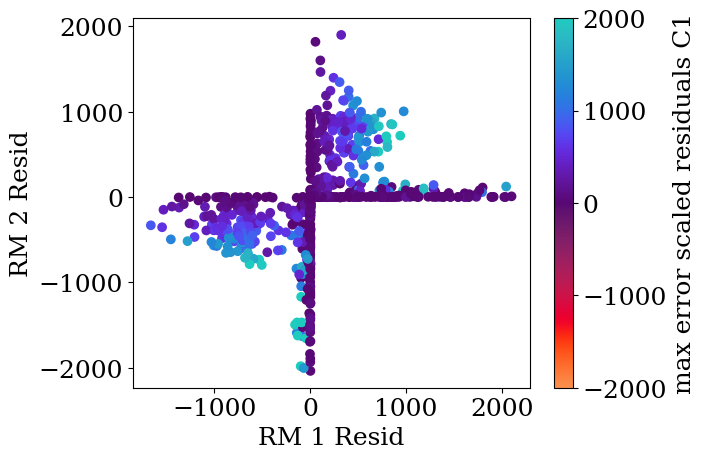

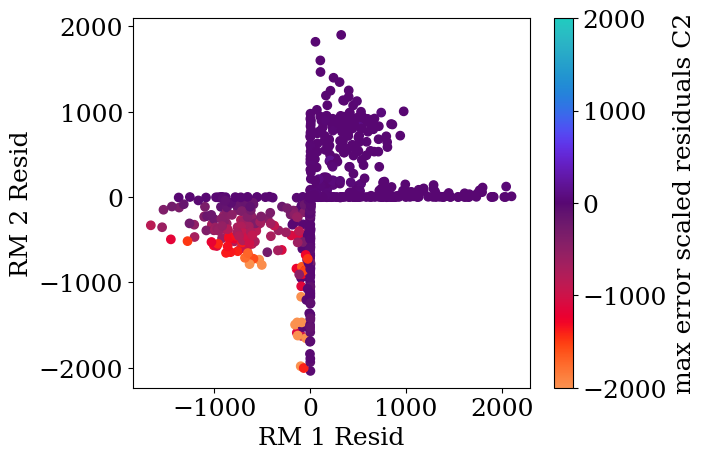

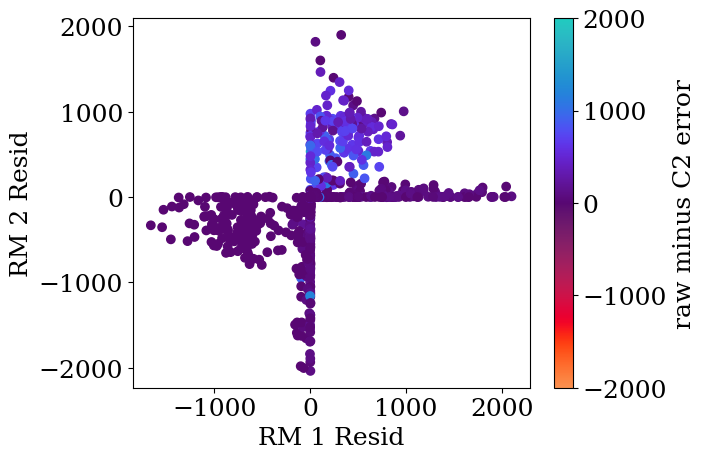

NameError: name 'max_err_plus' is not defined

In [92]:
max_component_residual_err = np.maximum(abs(RM_C2_residual_err_comb), abs(RM_C1_residual_err_comb))


plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], c=max_component_residual_err[(proxy_1_comb > SN) & (proxy_2_comb > SN)],cmap='cmr.guppy', vmin=-2000, vmax=2000)
plt.colorbar(label='max error scaled residuals C1')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], c=RM_C2_residual_err_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)],cmap='cmr.guppy', vmin=-2000, vmax=2000)
plt.colorbar(label='max error scaled residuals C2')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()


plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], c=TC_2C_merge_10000_comb.RM2_radm2_minus_err[(proxy_1_comb > SN) & (proxy_2_comb > SN)],cmap='cmr.guppy', vmin=-2000, vmax=2000)
plt.colorbar(label='raw minus C2 error')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], c=max_err_plus[(proxy_1_comb > SN) & (proxy_2_comb > SN)],cmap='cmr.guppy', vmin=-2000, vmax=2000)
plt.colorbar(label='max RM_component err')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

In [ ]:
#Alternately try just the usualy error calculation again. 


plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], c=RM_C2_residual_err_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)],cmap='cmr.guppy')
plt.colorbar(label='max error scaled residuals')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()

plt.scatter(RM_C1_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], RM_C2_residual_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)], c=RM_C1_residual_err_comb[(proxy_1_comb > SN) & (proxy_2_comb > SN)],cmap='cmr.guppy')
plt.colorbar(label='max RM_component err')
plt.xlabel('RM 1 Resid')
plt.ylabel('RM 2 Resid')
plt.show()


In [39]:
# Make the histograms of the frac pol ratios

In [40]:

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})
N = 100
indices = np.random.randint(0,7000,size=N)

plt.scatter(x=component_1_RM[indices], y=component_2_RM[indices], c='orange', label='True')
plt.scatter(x=TC_2C_merge_10000_b1.RM1_radm2[indices], y=TC_2C_merge_10000_b1.RM2_radm2[indices], c='indigo', marker="*", label='Fitted')

xs = component_1_RM[indices]
ys = component_2_RM[indices]

x1s = TC_2C_merge_10000_b1.RM1_radm2[indices]
y1s = TC_2C_merge_10000_b1.RM2_radm2[indices]

xs = np.asarray(xs)
ys = np.asarray(ys)

x1s = np.asarray(x1s)
y1s = np.asarray(y1s)
j=0
k=0

for i in range(0,N):

    if ys[i] < y1s[i]:
        #If the fitted parameter is too large
        if j == 0:
            plt.plot([xs[i],x1s[i]], [ys[i],y1s[i]], c='r', label='RM$_{screen, 2, True}$ < RM$_{screen, 2, QU}$ ', linewidth=0.4, alpha=0.7)
        else:
            plt.plot([xs[i],x1s[i]], [ys[i],y1s[i]], c='r', linewidth=0.4, alpha=0.6)

        j += 1
    else:
        #If the fitted parameter is too small
        if k == 0:
            plt.plot([xs[i],x1s[i]], [ys[i],y1s[i]], c='g',linewidth=0.4, alpha=0.9, label='RM$_{screen, 2, True}$ > RM$_{screen, 2, QU}$')
        else:
            plt.plot([xs[i],x1s[i]], [ys[i],y1s[i]], c='g', linewidth=0.4, alpha=0.9)

        k += 1

            
        
plt.xlabel('RM 1 [rad m$^{-2}$]')
plt.ylabel('RM 2 [rad m$^{-2}$]')
plt.legend()
plt.tight_layout()
plt.savefig('TC_movement.pdf', format='pdf')
plt.show()      

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
SNlimit = 0

plt.scatter(RM_sep_comb[(proxy_2_comb > SNlimit) & (proxy_1_comb > SNlimit)], RM_C2_residual_comb[(proxy_2_comb > SNlimit) & (proxy_1_comb > SNlimit)], c='k')
plt.scatter(RM_sep_comb[(proxy_1_comb > SNlimit) & (proxy_2_comb > SNlimit)], RM_C1_residual_comb[(proxy_1_comb > SNlimit) & (proxy_2_comb > SNlimit)], c='k')
plt.xlabel('True RM seperation')
plt.ylabel('$RM_{screen}$ Residual')
plt.title('Band 1')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bin_and_plot(x, y, bin_size=100):
    """
    Bin x-axis data by a given bin size, calculate the median and standard deviation
    of y-values within each bin, and plot the results.

    Parameters:
        x (array-like): The x-axis data.
        y (array-like): The y-axis data.
        bin_size (int): The size of the bins along the x-axis. Default is 100.

    Returns:
        None
    """
    # Ensure x and y are numpy arrays
    x = np.array(x)
    y = np.array(y)
    
    # Define bins
    bins = np.arange(min(x), max(x) + bin_size, bin_size)
    
    # Compute median and standard deviation for each bin
    bin_centers = []
    medians = []
    std_devs = []
    
    for i in range(len(bins) - 1):
        bin_mask = (x >= bins[i]) & (x < bins[i + 1])
        bin_values = y[bin_mask]
        
        if len(bin_values) > 0:  # Avoid empty bins
            bin_centers.append((bins[i] + bins[i + 1]) / 2)
            medians.append(np.nanmedian(bin_values))
            std_devs.append(np.nanstd(bin_values))
    
    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Plot median and standard deviation as error bars
    plt.errorbar(bin_centers, medians, yerr=std_devs, fmt='o', capsize=5, label='Median ± Std Dev')
    
    # Customize plot
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Median and Standard Deviation by Bins')
    plt.legend()
    plt.yscale('symlog')
    plt.grid(True)
    
    # Show plot
    plt.show()

In [ ]:

SNlimit=7
bin_and_plot(RM_sep_comb_2, RM_resid_comb_2)            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
    

# Band 1 Check the Raw Parameters

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, [[ax_1, ax_2], [ax_3, ax_4]] = plt.subplots(nrows=2, ncols=2, figsize=(10,10), constrained_layout=True) 


bottom = plt.get_cmap('cmr.dusk_r', 4) 
top= plt.get_cmap('cmr.sapphire', 252) 
newcolors = np.vstack((top(np.linspace(0, 1, 252)), 
                bottom(np.linspace(0, 0.09, 4)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 

ax_1.hexbin(TC_2C_merge_10000_b1.psi0_deg, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
ax_1.set_xlabel('$p_{0,1}$') 
ax_1.set_ylabel('SNR') 

ax_3.hexbin(TC_2C_merge_10000_b1.psi0_2_deg, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], gridsize=20,  cmap=newcmp, reduce_C_function=np.median) 
ax_3.set_xlabel('$p_{0,2}$') 
ax_3.set_ylabel('SNR') 
 
ax_2.hexbin(TC_2C_merge_10000_b1.RM_screen_radm2, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], gridsize=20,  cmap=newcmp, reduce_C_function=np.median) 
ax_2.set_xlabel('$RM_{screen, 1}$  rad $m^{-2}$') 


hex1 = ax_4.hexbin(TC_2C_merge_10000_b1.RM_screen_2_radm2, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
ax_4.set_xlabel('$RM_{screen, 2}$  rad $m^{-2}$') 


plt.colorbar(hex1, label='$\Delta BIC_{5,11}$') 

plt.show()


# Check Secondary Parameters like $\Delta$ RM and $\Delta \psi$ with bayesian 

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 17})
plt.rc('font'  ,family='serif')
 
fig_chi, [[ax_1, ax_2], [ax_3, ax_4]] = plt.subplots(nrows=2, ncols=2, figsize=(11,10), constrained_layout=True) 



bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

#bounds = [-10, 0,  1,  2,  5,  10000]
#cmap_rb = plt.get_cmap(newcmp)
#colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
#cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

hex2=ax_1.hexbin(delta_psi, delta_RM_screen, TC_2C_merge_10000_b1['delta_evd_11_5'], gridsize=20, vmax=100, cmap=newcmp, reduce_C_function=np.median) 
ax_1.set_xlabel('$\Delta \psi_{0}$') 
ax_1.set_ylabel('$\Delta RM_{screen}$')

ax_3.hexbin(delta_RM_screen, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_evd_11_5'], gridsize=20,  cmap=newcmp, reduce_C_function=np.median) 
ax_3.set_xlabel('$\Delta RM_{0,2}$') 
ax_3.set_ylabel('SNR') 
 
ax_2.hexbin(TC_2C_merge_10000_b1.RM_screen_radm2, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_evd_11_5'], gridsize=20,  cmap=newcmp, reduce_C_function=np.median) 
ax_2.set_xlabel('$RM_{screen, 1}$  rad $m^{-2}$') 


hex1 = ax_4.hexbin(TC_2C_merge_10000_b1.RM_screen_2_radm2, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_evd_11_5'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
ax_4.set_xlabel('$RM_{screen, 2}$  rad $m^{-2}$') 


plt.colorbar(hex2, label='ln(BF)$_{2C,BS})$') 
fig_chi.savefig('frac.pdf', format='pdf')
plt.show()

# Have a Look at the p1 to p2 plot

In [ ]:
bottom = plt.get_cmap('cmr.dusk_r', 4) 
top= plt.get_cmap('cmr.sapphire', 252) 
newcolors = np.vstack((top(np.linspace(0, 1, 252)), 
                bottom(np.linspace(0, 0.09, 4)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 

plt.hexbin(TC_2C_merge_10000_b1.frac_pol, TC_2C_merge_10000_b1['frac_pol_2_comp'], TC_2C_merge_10000_b1['delta_BIC_11_5'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
plt.xlabel('$p_{0,1}$') 
plt.ylabel('$p_{0,2}$') 
plt.colorbar()

## Check the DELTA RM 

In [ ]:
bottom = plt.get_cmap('cmr.dusk_r', 4) 
top= plt.get_cmap('cmr.sapphire', 252) 
newcolors = np.vstack((top(np.linspace(0, 1, 252)), 
                bottom(np.linspace(0, 0.09, 4)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 

plt.hexbin(delta_RM_screen, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'],  gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
plt.xlabel('$\Delta RM$') 
plt.ylabel('SNR') 
plt.colorbar()

# Looking at the Goodness of fit metric relationship with frac pol


## BIC 

In [ ]:


plt.hexbin(component_1_p, component_2_p, TC_2C_merge_10000_b1['BIC'], gridsize=20, cmap='cmr.savanna', vmax=500, vmin=-1000, reduce_C_function=np.median) 
plt.xlabel('$p_{0,1}$') 
plt.ylabel('$p_{0,2}$') 
plt.colorbar(label='BIC')


# Looking with Evidence

In [ ]:


plt.hexbin(component_1_p, component_2_p, TC_2C_merge_10000_b1['ln(EVIDENCE) '], gridsize=20, cmap='cmr.savanna_r', vmax=1000, vmin=-500, reduce_C_function=np.median) 
plt.xlabel('$p_{0,1}$') 
plt.ylabel('$p_{0,2}$') 
plt.colorbar(label='ln(EVD)')

In [ ]:

plt.hexbin(component_1_p, TC_2C_merge_10000_b1.SNR, TC_2C_merge_10000_b1['ln(EVIDENCE) '], gridsize=20, cmap='cmr.savanna_r', vmax=1000, vmin=-500, reduce_C_function=np.median) 
plt.xlabel('$p_{0,1}$') 
plt.ylabel('$p_{0,2}$') 
plt.colorbar(label='ln(EVD)')

# Check the delta RMscreens betweent the two components

They may be a bit messed up at the higher source counts when I changed the files

In [ ]:
plt.hist(delta_RM_screen_comb, bins=50)
plt.show()
plt.hist(TC_2C_merge_10000_comb.RM1_radm2 - TC_2C_merge_10000_comb.RM2_radm2, bins=50)
plt.show()

In [ ]:
fig_chi, [ax_1, ax_2] = plt.subplots(nrows=2, ncols=1, figsize=(6,10), constrained_layout=True) 
bounds = [-4000,-40, -10, -5,-1, 0, 20] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
ax_1.hexbin(TC_2C_merge_10000_b1.psi0_deg, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], gridsize=20,norm=norm,  cmap=cmap, reduce_C_function=np.median) 
ax_1.set_xlabel('$\psi_{0,1}$') 
ax_1.set_ylabel('SNR') 

hex1 = ax_2.hexbin(TC_2C_merge_10000_b1.psi0_2_deg, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], gridsize=20, norm=norm,  cmap=cmap, reduce_C_function=np.median) 
ax_2.set_xlabel('$\psi_{0,2}$') 
ax_2.set_ylabel('SNR') 




plt.colorbar(hex1, label='$\Delta BIC_{5,11}$') 
plt.show()


# Combined Band Check the Parameters

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, [[ax_1, ax_2], [ax_3, ax_4]] = plt.subplots(nrows=2, ncols=2, figsize=(10,10), constrained_layout=True) 
bounds = [-4000,-40, -10, -5,-1, 0, 20] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
ax_1.hexbin(TC_2C_merge_10000_comb.frac_pol, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20,norm=norm,  cmap=cmap, reduce_C_function=np.median) 
ax_1.set_xlabel('$p_{0,1}$') 
ax_1.set_ylabel('SNR') 

ax_3.hexbin(TC_2C_merge_10000_comb.frac_pol_2_comp, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20, norm=norm,  cmap=cmap, reduce_C_function=np.median) 
ax_3.set_xlabel('$p_{0,2}$') 
ax_3.set_ylabel('SNR') 
 
ax_2.hexbin(TC_2C_merge_10000_comb.RM_screen_radm2, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20,norm=norm,  cmap=cmap, reduce_C_function=np.median) 
ax_2.set_xlabel('$RM_{screen, 1}$  rad $m^{-2}$') 


hex1 = ax_4.hexbin(TC_2C_merge_10000_comb.RM_screen_2_radm2, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20, norm=norm,  cmap=cmap, reduce_C_function=np.median) 
ax_4.set_xlabel('$RM_{screen, 2}$  rad $m^{-2}$') 


plt.colorbar(hex1, label='$\Delta BIC_{5,11}$') 
plt.show()

# Combined Band Secondard Parameters

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, [ax_1, ax_2] = plt.subplots(nrows=2, ncols=1, figsize=(5,8), constrained_layout=True) 



bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

#bounds = [-10, 0,  1,  2,  5,  10000]
#cmap_rb = plt.get_cmap(newcmp)
#colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
#cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

hex1 = ax_1.hexbin(delta_psi, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_evd_11_5'], gridsize=20, cmap=newcmp, reduce_C_function=np.median) 
ax_1.set_xlabel('$\Delta psi_{0}$') 
ax_1.set_ylabel('SNR')

hex2 = ax_2.hexbin(delta_RM_screen, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_evd_11_5'], gridsize=20,  cmap=newcmp, reduce_C_function=np.median) 
ax_2.set_xlabel('$\Delta RM_{screen}$') 
ax_2.set_ylabel('SNR') 

plt.colorbar(hex2)
plt.show()


# Check for Fitting

At some point for Combined band I started running with the condition delta RMs = 200 this may have messed things us phenomenally However I can check the delta RM of the bad fits area  to see if that is the case

#first calculate all the delta RMs
print(len(delta_RM_screen_comb))

plt.hist(delta_RM_screen_comb)
plt.show()

plt.hist(TC_2C_merge_10000_comb.RM1_radm2 - TC_2C_merge_10000_comb.RM2_radm2)
plt.show()


# Percentages Combined Band

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, [[ax_1, ax_2], [ax_3, ax_4]] = plt.subplots(nrows=2, ncols=2, figsize=(10,10),constrained_layout=True) 
bounds = [-4000,-40, -10, -5,-1, 0, 20] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
ax_1.hexbin(TC_2C_merge_10000_comb.frac_pol, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20, cmap='cmr.lavender', reduce_C_function=percentage_reduce_BIC_C) 
ax_1.set_xlabel('$p_{0,1}$') 
ax_1.set_ylabel('SNR') 

ax_3.hexbin(TC_2C_merge_10000_comb.frac_pol_2_comp, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20, cmap='cmr.lavender', reduce_C_function=percentage_reduce_BIC_C) 
ax_3.set_xlabel('$p_{0,2}$') 
ax_3.set_ylabel('SNR') 
 
ax_2.hexbin(TC_2C_merge_10000_comb.RM_screen_radm2, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20, cmap='cmr.lavender', reduce_C_function=percentage_reduce_BIC_C) 
ax_2.set_xlabel('$RM_{screen, 1}$  rad $m^{-2}$') 


hex1 = ax_4.hexbin(TC_2C_merge_10000_comb.RM_screen_2_radm2, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20,  cmap='cmr.lavender', reduce_C_function=percentage_reduce_BIC_C) 
ax_4.set_xlabel('$RM_{screen, 2}$  rad $m^{-2}$') 

print(TC_BS_merge_10000_comb.keys())
plt.colorbar(hex1, label='True Positive %') 
plt.show()

In [ ]:

def two_comp(lambda_sq,  RM_screen1, RM_screen2, frac_pol1, frac_pol2, psi0_deg1,psi0_deg2): 
 
    quarr = (frac_pol1 * np.exp(2j * (np.radians(psi0_deg1) + RM_screen1* lambda_sq))) + (frac_pol2 * np.exp(2j * (np.radians(psi0_deg2) + RM_screen2*lambda_sq))) 
    
    complex_p = np.sqrt((quarr.real**2 + quarr.imag**2))
 
    return complex_p 
 
def burnslabs_modelling(lambda_sq,  RM_screen, frac_pol, RM_src, psi0_deg): 
 
    quarr = frac_pol * np.exp( 2j * (np.radians(psi0_deg) + (0.5*RM_src + RM_screen) * lambda_sq)) * ((np.sin(RM_src * lambda_sq))/(RM_src * lambda_sq))

    complex_p = np.sqrt((quarr.real**2 + quarr.imag**2))
 
    return complex_p


# Plot up so of the combined fits

In [ ]:
plt.rcParams.update({'font.size': 12}) 
plt.rc('font', family='serif') 
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(14, 8)) 
import numpy as np 
c = 299792458. 

srcA = 30
srcB = 63 


frac_pol1 = component_1_p_comb[srcA]
frac_pol2 = component_2_p_comb[srcA]
psi0_deg1 = component_1_psi_comb[srcA]
psi0_deg2 = component_2_psi_comb[srcA]
RM_screen1 = component_1_RM_comb[srcA]
RM_screen2 = component_2_RM_comb[srcA]


#BS model
frac_pol = TC_BS_merge_10000_comb.fracPol[TC_BS_merge_10000_comb.src==srcA].item() 
psi0_deg = TC_BS_merge_10000_comb.psi0_deg_x[TC_BS_merge_10000_comb.src==srcA].item()
RM_screen = TC_BS_merge_10000_comb.RM_radm2[TC_BS_merge_10000_comb.src==srcA].item()
RM_src = TC_BS_merge_10000_comb.deltaRM_radm2[TC_BS_merge_10000_comb.src==srcA].item() 
 
data_A = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/two_component_10000_comb/30.dat', names=True, dtype=None, delimiter=' ') 
 
freq_arr = [] 
q_arr = [] 
u_arr = [] 
 
for row in data_A: 
    freq_arr.append(row[0]) 
    q_arr.append(row[1]) 
    u_arr.append(row[2]) 
    
q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr) 
 
p_arr = np.sqrt(q_arr**2 + u_arr**2) 
freq_arr = np.asarray(freq_arr) 
lambda_sqr_array = np.power(c/freq_arr, 2.0) 

quarr_LOS_A = two_comp(lambda_sqr_array,  RM_screen1, RM_screen2, frac_pol1, frac_pol2, psi0_deg1, psi0_deg2) 
quarr_BS_LOS_A = burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg) 

 
#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b') 

ax1.plot(lambda_sqr_array, p_arr , c='lightblue') 
ax1.plot(lambda_sqr_array, quarr_LOS_A, c='k', label='2C') 
ax1.plot(lambda_sqr_array, quarr_BS_LOS_A, c='k', linestyle='--', label='BS') 
ax1.set_title('SNR = 22')
ax1.legend()

frac_pol1 = component_1_p_comb[srcB] 
frac_pol2 = component_2_p_comb[srcB] 
psi0_deg1 = component_1_psi_comb[srcB]
psi0_deg2 = component_2_psi_comb[srcB]
RM_screen1 = component_1_RM_comb[srcB] 
RM_screen2 = component_2_RM_comb[srcB]



#BS model
frac_pol = TC_BS_merge_10000_comb.fracPol[TC_BS_merge_10000_comb.src==srcB].item() 
psi0_deg = TC_BS_merge_10000_comb.psi0_deg_x[TC_BS_merge_10000_comb.src==srcB].item()
RM_screen = TC_BS_merge_10000_comb.RM_radm2[TC_BS_merge_10000_comb.src==srcB].item()
RM_src = TC_BS_merge_10000_comb.deltaRM_radm2[TC_BS_merge_10000_comb.src==srcB].item() 
 
data_B = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/two_component_10000_comb/63.dat', names=True, dtype=None, delimiter=' ') 
 
freq_arr = [] 
q_arr = [] 
u_arr = [] 
 
for row in data_B: 
    freq_arr.append(row[0]) 
    q_arr.append(row[1]) 
    u_arr.append(row[2]) 
    
q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr) 
 
p_arr = np.sqrt(q_arr**2 + u_arr**2) 
freq_arr=np.asarray(freq_arr) 
lambda_sqr_array = np.power(c/freq_arr, 2.0) 

quarr_LOS_B= two_comp(lambda_sqr_array, RM_screen1, RM_screen2, frac_pol1, frac_pol2, psi0_deg1, psi0_deg2) 
quarr_BS_LOS_B = burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg) 

 
#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b') 

ax2.plot(lambda_sqr_array, p_arr , c='lightblue') 
ax2.plot(lambda_sqr_array, quarr_LOS_B, c='k', label='2C') 
ax2.plot(lambda_sqr_array, quarr_BS_LOS_B, c='k', linestyle='--', label='BS') 
ax2.set_title('SNR = 11')
ax2.legend()
 
 

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, [[ax_1, ax_2], [ax_3, ax_4]] = plt.subplots(nrows=2, ncols=2, figsize=(10,10), constrained_layout=True) 
bounds = [-4000,-40, -10, -5,-1, 0, 20] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
ax_1.hexbin(TC_2C_merge_10000_comb.frac_pol, TC_2C_merge_10000_comb['SNR'], gridsize=20,cmap='cmr.flamingo_r', reduce_C_function=np.sum) 
ax_1.set_xlabel('$p_{0,1}$') 
ax_1.set_ylabel('SNR') 

ax_3.hexbin(TC_2C_merge_10000_comb.frac_pol_2_comp, TC_2C_merge_10000_comb['SNR'], gridsize=20,cmap='cmr.flamingo_r', reduce_C_function=np.sum) 
ax_3.set_ylabel('SNR') 
 
ax_2.hexbin(TC_2C_merge_10000_comb.RM_screen_radm2, TC_2C_merge_10000_comb['SNR'], gridsize=20,cmap='cmr.flamingo_r', reduce_C_function=np.sum) 


hex1 = ax_4.hexbin(TC_2C_merge_10000_comb.RM_screen_2_radm2, TC_2C_merge_10000_comb['SNR'], gridsize=20,cmap='cmr.flamingo_r', reduce_C_function=np.sum) 
ax_4.set_xlabel('$RM_{screen, 2}$  rad $m^{-2}$') 


plt.colorbar(hex1, label='$\Delta BIC_{5,11}$') 
plt.show()

In [ ]:

from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True, constrained_layout=True) 
bounds = [-4000,-40, -10, -5,-1, 0, 20] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
ax_test[0].hexbin(delta_RM_screen, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], gridsize=20,norm=norm,  cmap=cmap, reduce_C_function=np.mean) 
ax_test[0].set_xlabel('$\Delta RM_{screen}$  rad $m^{-2}$') 
ax_test[0].set_ylabel('SNR') 

hex1 = ax_test[1].hexbin(delta_RM_screen_comb, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20, norm=norm,  cmap=cmap, reduce_C_function=np.median) 
ax_test[1].set_xlabel('$\Delta RM_{screen}$  rad $m^{-2}$') 
ax_test[1].set_ylabel('SNR') 

plt.colorbar(hex1, label='$\Delta BIC_{5,11}$') 
plt.show()


In [ ]:
from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 

fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5)) 

bottom = plt.get_cmap('cmr.dusk_r', 10) 
top= plt.get_cmap('cmr.sapphire', 246) 
newcolors = np.vstack((top(np.linspace(0, 1, 246)), 
                bottom(np.linspace(0, 0.09, 10)))) 
newcmp_BIC = ListedColormap(newcolors, name='embersaph') 


boundsBIC = [-12000,-40, -10, -5,-1, 0, 120] 
cmap_rb = plt.get_cmap(newcmp_BIC) 
colorsBIC = cmap_rb(np.linspace(0, 1, len(boundsBIC) - 1)) 
cmapBIC, normBIC = mcolors.from_levels_and_colors(boundsBIC, colorsBIC) 


bounds_EVD = [-1000,0, 1, 2.0, 4, 10000]  
cmap_rb = plt.get_cmap('cmr.ember') 
colors_EVD = cmap_rb(np.linspace(0, 1, len(bounds_EVD) - 1)) 
cmap_EVD, norm_EVD = mcolors.from_levels_and_colors(bounds_EVD, colors_EVD) 
 
 
hex1 = ax_test[0].hexbin(delta_RM_screen_comb,TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'],norm=normBIC, gridsize=20, cmap=cmapBIC, reduce_C_function=np.median) 
ax_test[0].set_xlabel('$\Delta RM_{screen}$ rad $m^{-2}$') 
ax_test[0].set_ylabel('SNR') 
 
hex2 = ax_test[1].hexbin(delta_RM_screen_comb, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_evd_11_5'], gridsize=20, norm=norm_EVD, cmap=cmap_EVD, reduce_C_function=np.median) 
ax_test[1].set_xlabel('$\Delta RM_{screen}$ rad $m^{-2}$') 
#plt.ylabel(values_interest[y_index]) 
#ax_test[0].set_title('Slab') 
 
 
labels = ('<-1', '0','>1.', '>2.5', '>5' ,'10+') 
cb2 = plt.colorbar(hex1, label='$\Delta BIC$') 
cb2.ax.set_yticklabels(labels) 
 

cb = plt.colorbar(hex2, label='ln($\Delta$ $Bayes Factor_{T,A}$)', ticklocation='bottom') 
cb.ax.set_yticklabels(bounds_EVD) 

fig.show()

### The difference between the mean and median


In [ ]:
means = plt.hexbin(delta_RM_screen_comb, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20, reduce_C_function=np.mean)
medians = plt.hexbin(delta_RM_screen_comb, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20, reduce_C_function=np.median) 

median_list = medians.get_array()
mean_list = means.get_array()

plt.clf()
plt.scatter(median_list, mean_list)
plt.plot([-1250,20], [-1250,20], c='k')
plt.xlabel('Medians')
plt.ylabel('Means')



The medians are lower than the means the means are skewed?

## Let's have a look at the different percentages for the two different bands

In [ ]:
TC_2C_merge_10000_b1['is_good_model_chi']= TC_2C_merge_10000_b1.chiSq < TC_BS_merge_10000_b1.chiSq 
TC_2C_merge_10000_b1['is_good_model_BIC'] = TC_2C_merge_10000_b1.BIC < TC_BS_merge_10000_b1.BIC 
TC_2C_merge_10000_b1['is_good_model_AIC'] = TC_2C_merge_10000_b1.AIC < TC_BS_merge_10000_b1.AIC 
TC_2C_merge_10000_b1['is_good_model_evd'] = TC_2C_merge_10000_b1['ln(EVIDENCE) '] > TC_BS_merge_10000_b1['ln(EVIDENCE) '] 
 
species = ("m11", "m5") 
penguin_means = { 
    'Chi_SQ': [np.sum(TC_2C_merge_10000_b1['is_good_model_chi']), (10000-np.sum(TC_2C_merge_10000_b1['is_good_model_chi']))], 
    'BIC': [np.sum(TC_2C_merge_10000_b1['is_good_model_BIC']), (10000-np.sum(TC_2C_merge_10000_b1['is_good_model_BIC']))], 
    'AIC': [np.sum(TC_2C_merge_10000_b1['is_good_model_AIC']), (10000-np.sum(TC_2C_merge_10000_b1['is_good_model_AIC']))], 
    'evd': [np.sum(TC_2C_merge_10000_b1['is_good_model_evd']), (10000-np.sum(TC_2C_merge_10000_b1['is_good_model_evd']))], 
} 
 
x = np.arange(len(species))  # the label locations 
width = 0.15  # the width of the bars 
multiplier = 0 
 
fig, ax = plt.subplots(layout='constrained') 
 
for attribute, measurement in penguin_means.items(): 
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute) 
    ax.bar_label(rects, padding=3) 
    multiplier += 1 
 
# Add some text for labels, title and custom x-axis tick labels, etc. 
ax.set_ylabel('Count') 
ax.set_title('2 Component VS Burn Slab') 
ax.set_xticks(x + width, species) 
ax.legend(loc='upper right', ncols=1) 
#ax.set_ylim(0, 1000) 
 
plt.show()

In [ ]:
TC_2C_merge_10000_comb['is_good_model_chi']= -1 > (TC_2C_merge_10000_comb.chiSq - TC_BS_merge_10000_comb.chiSq)
TC_2C_merge_10000_comb['is_good_model_BIC'] = -1 > (TC_2C_merge_10000_comb.BIC - TC_BS_merge_10000_comb.BIC) 
TC_2C_merge_10000_comb['is_good_model_AIC'] = -1 > (TC_2C_merge_10000_comb.AIC - TC_BS_merge_10000_comb.AIC) 
TC_2C_merge_10000_comb['is_good_model_evd'] = 0 < (TC_2C_merge_10000_comb['ln(EVIDENCE) '] - TC_BS_merge_10000_comb['ln(EVIDENCE) ']) 
 
species = ("m11", "m5") 
penguin_means = { 
    'Chi_SQ': [np.sum(TC_2C_merge_10000_comb['is_good_model_chi']), (7722-np.sum(TC_2C_merge_10000_comb['is_good_model_chi']))], 
    'BIC': [np.sum(TC_2C_merge_10000_comb['is_good_model_BIC']), (7722-np.sum(TC_2C_merge_10000_comb['is_good_model_BIC']))], 
    'AIC': [np.sum(TC_2C_merge_10000_comb['is_good_model_AIC']), (7722-np.sum(TC_2C_merge_10000_comb['is_good_model_AIC']))], 
    'evd': [np.sum(TC_2C_merge_10000_comb['is_good_model_evd']), (7722-np.sum(TC_2C_merge_10000_comb['is_good_model_evd']))], 
} 
 
x = np.arange(len(species))  # the label locations 
width = 0.15  # the width of the bars 
multiplier = 0 
 
fig, ax = plt.subplots(layout='constrained') 
 
for attribute, measurement in penguin_means.items(): 
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute) 
    ax.bar_label(rects, padding=3) 
    multiplier += 1 
 
# Add some text for labels, title and custom x-axis tick labels, etc. 
ax.set_ylabel('Count') 
ax.set_title('2 Component vs Burn Slab') 
ax.set_xticks(x + width, species) 
ax.legend(loc='upper right', ncols=1) 
#ax.set_ylim(0, 1000) 
 
plt.show()

# Using the fractional polarization. I want to see how the two components are fairing

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12.5,5), sharex=True, constrained_layout=True)
bounds = [-4000,-40, -10, -5,-1, 0, 20] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
ax_test[0].hexbin(delta_p, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], gridsize=20,norm=norm,  cmap=cmap, reduce_C_function=np.median) 
ax_test[0].set_xlabel('$\Delta p_{0}$') 
ax_test[0].set_ylabel('SNR') 

hex1 = ax_test[1].hexbin(delta_p_comb, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'], gridsize=20, norm=norm,  cmap=cmap, reduce_C_function=np.median) 
ax_test[1].set_xlabel('$\Delta p_{0}$') 
plt.colorbar(hex1, label='$\Delta BIC_{5,11}$') 


fig_chi.subplots_adjust(wspace=0.2, hspace=0.9)
plt.show()


# Look at the Ratio of the frac pol

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
from matplotlib.colors import LogNorm
plt.rcParams.update({'font.size': 18}) 

fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharex=True, constrained_layout=True)
bounds = [-4000,-40, -10, -5,-1, 0, 20] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 

hex2 = ax_test[0].hexbin(ratio_p, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'],norm=norm, reduce_C_function= np.median, gridsize=20, xscale='log', cmap=cmap) 
ax_test[0].set_xlabel('$p_{0, 1} / p_{0, 2}$') 
ax_test[0].set_ylabel('SNR') 

hex1 = ax_test[1].hexbin(ratio_p, TC_2C_merge_10000_b1['SNR'], gridsize=20 ,reduce_C_function= np.sum, xscale='log', cmap='cmr.flamingo_r') 
ax_test[1].set_xlabel('$p_{0, 1} / p_{0, 2}$') 


hex3 = ax_test[2].hexbin(ratio_p, TC_2C_merge_10000_b1['SNR'], p_C1_residual, gridsize=20 ,reduce_C_function=np.median, xscale='log', cmap='cmr.guppy') 
ax_test[2].set_xlabel('$p_{0, 1} / p_{0, 2}$') 

cb = plt.colorbar(hex2, label='$BIC_{5,11}$') 
cb.ax.set_yticklabels(bounds) 
cb2 = plt.colorbar(hex1, label='Counts') 
cb3 = plt.colorbar(hex3, label='Comp 1 $p_{0}$ residual') 

plt.tight_layout()
plt.show()

This plot tells us that at small ratios of frac pol the true model is prefered. Except at low SNR. QU fitting works from right to left the smaller the first peak it finds is the first RM (the largest) and the second (smaller) is always 2nd. 
ratio = frac pol 1 / frac pol 2 if the 
\\
ratio < 1 - frac pol 1 is less than 2 
\\
ratio > 1  -  frac pol 1 is larger than 2

What this plot indicates is that  when frac pol 1 is smaller than frac pol 2 than QU fitting can select the correct model

Can make a plot of the SN of component 1 vs SN of component. 


# Band 2

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
from matplotlib.colors import LogNorm
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharex=True, constrained_layout=True) 
bounds = [-4000,-40, -10, -5,-1, 0, 20] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 


hex2 = ax_test[0].hexbin(ratio_p_comb, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_BIC_11_5'],norm=norm, reduce_C_function= np.median, gridsize=20, xscale='log', cmap=cmap) 

ax_test[0].set_xlabel('$p_{0, 1} / p_{0, 2}$') 
ax_test[0].set_ylabel('SNR') 

hex1 = ax_test[1].hexbin(ratio_p_comb, TC_2C_merge_10000_comb['SNR'], gridsize=20 ,reduce_C_function= np.sum, xscale='log', vmax=70, cmap='cmr.flamingo_r') 

ax_test[1].set_xlabel('$p_{0, 1} / p_{0, 2}$') 


hex3 = ax_test[2].hexbin(ratio_p_comb, TC_2C_merge_10000_comb['SNR'], p_C1_residual_comb, gridsize=20 ,reduce_C_function=np.median, xscale='log', vmax=5, vmin=-5, cmap='cmr.guppy') 

ax_test[2].set_xlabel('$p_{0, 1} / p_{0, 2}$') 


cb = plt.colorbar(hex2, label='$\Delta BIC_{5,11}$') 
cb.ax.set_yticklabels(bounds) 
cb2 = plt.colorbar(hex1, label='Counts') 
cb3 = plt.colorbar(hex3, label='Comp 1 $p_{0}$ residual') 

plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True) 
bounds = [-4000,-40, -10, -5,-1, 0, 20] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
ax_test[0].hist(delta_p - delta_QU_p, bins=100) 
ax_test[0].set_xlabel('$\Delta p_{0}$ [true - QU fitting]') 
ax_test[0].set_title('Band 1') 


ax_test[1].hist(delta_p_comb - delta_QU_p_comb, bins=100) 
ax_test[1].set_title('Combined') 
ax_test[1].set_xlabel('$\Delta p_{0}$') 
ax_test[0].set_ylabel('Counts') 


plt.tight_layout()
plt.show()


In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
plt.rcParams.update({'font.size': 18}) 
 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True, constrained_layout=True) 
bounds = [-4000,0,1,2,5, 20000] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 

ax_test[0].hexbin(max_p, TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_evd_11_5'], gridsize=20,norm=norm,  cmap=cmap, reduce_C_function=np.mean) 
ax_test[0].set_xlabel('$\mu p_{0}$  rad $m^{-2}$') 
ax_test[0].set_ylabel('SNR') 

hex1 = ax_test[1].hexbin(max_p_comb, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_evd_11_5'], gridsize=20, norm=norm,  cmap=cmap, reduce_C_function=np.mean) 
ax_test[1].set_xlabel('$\mu p_{0}$  rad $m^{-2}$') 
ax_test[1].set_ylabel('SNR') 

plt.colorbar(hex1, label='$\Delta BIC_{5,11}$') 

plt.show()

# Now Lets See what the Slabs are being fit"

In [ ]:

from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True) 
 
bottom = plt.get_cmap('cmr.dusk_r', 2) 
top= plt.get_cmap('cmr.sapphire', 254) 
newcolors = np.vstack((top(np.linspace(0, 1, 254)), 
                bottom(np.linspace(0, 0.09, 2)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 
 
bounds = [-4000,-70, -10, -2.5, 0, 11] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
 
hex1 = ax_test[0].hexbin(TC_BS_merge_10000_b1['deltaRM_radm2'],TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], vmax=5, reduce_C_function=np.median, gridsize=20, cmap=newcmp) 
ax_test[0].set_xlabel('QU Slab Width rad $m^{-2}$') 
ax_test[0].set_ylabel(values_interest[y_index]) 
 
hex2 = ax_test[1].hexbin(TC_BS_merge_10000_b1['deltaRM_radm2'],TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], norm=norm, reduce_C_function=np.median,  gridsize=20, cmap=cmap) 
ax_test[1].set_xlabel('QU Slab Width rad $m^{-2}$') 
#plt.ylabel(values_interest[y_index]) 
#ax_test[0].set_title('Slab') 
 
 
 
cb2 = plt.colorbar(hex1) 
 
labels = ('-10>', '-5>','-2.5>', '-1>', '0>' ,'0+') 
cb = plt.colorbar(hex2, label='$\\Delta$ $BIC_{T,A}$', ticklocation='bottom') 
cb.ax.set_yticklabels(labels) 
plt.tight_layout() 
plt.show()

In [ ]:
from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True) 
 
 
 
 
hex2= ax_test[1].hexbin(TC_BS_merge_10000_b1['deltaRM_radm2'],TC_2C_merge_10000_b1['SNR'],reduce_C_function=np.sum, vmax=20,  vmin=5, gridsize=20, cmap='cmr.flamingo') 
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$') 
ax_test[1].set_ylabel(values_interest[y_index]) 
 
hex1 = ax_test[0].hexbin(TC_BS_merge_10000_b1['deltaRM_radm2'],TC_2C_merge_10000_b1['SNR'], reduce_C_function=np.sum, gridsize=20, cmap='cmr.flamingo') 
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$') 
 
 
cb2 = plt.colorbar(hex2, label='Counts') 
cb = plt.colorbar(hex1) 
 
plt.tight_layout() 
plt.show()


In [ ]:
from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5)) 

 
 
hex1 = ax_test[0].hexbin(delta_RM_screen,TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_evd_11_5'],norm=norm, gridsize=20, cmap=cmap, reduce_C_function=np.median) 
ax_test[0].set_xlabel('$\Delta RM_{screen}$ rad $m^{-2}$') 
ax_test[0].set_ylabel('SNR') 
 
hex2 = ax_test[1].hexbin(delta_RM_screen_comb, TC_2C_merge_10000_comb['SNR'], TC_2C_merge_10000_comb['delta_evd_11_5'], gridsize=20, norm=norm, cmap=cmap, reduce_C_function=np.median) 
ax_test[1].set_xlabel('$\Delta$ $RM_{screen}$ rad $m^{-2}') 
#plt.ylabel(values_interest[y_index]) 
#ax_test[0].set_title('Slab') 
 
 
labels = ('<-1', '0','>1.', '>2.5', '>5' ,'10+') 
cb2 = plt.colorbar(hex1) 
cb2.ax.set_yticklabels(labels) 
 
 
cb = plt.colorbar(hex2, label='ln($\Delta$ $Bayes Factor_{T,A}$)', ticklocation='bottom') 
cb.ax.set_yticklabels(labels) 
plt.tight_layout() 
plt.show()


# Testing out a potential Paper Plot using the noise amplitude imported from the .dat files awwwwws shit and I created individual .dat files so will have to go through and grab both first element of du and dq array and the calculate the dp

In [41]:
# create for loop to run through all .dat files for band 1 combined files 

dq_arr = []
du_arr = []

for i in range(0,10000):

    name = '{}.dat'.format(i)

    data_file = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/two_comp_10000_b1/{}'.format(name))
    dq_arr.append(data_file[0][3]) 
    du_arr.append(data_file[0][4]) 

dq_arr = np.asarray(dq_arr)
du_arr = np.asarray(du_arr)


# Combined Band

In [99]:

dq_arr_comb = []
du_arr_comb = []

for i in range(0,10000):

    name = '{}.dat'.format(i)

    data_file = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/two_component_10000_comb/{}'.format(name))
    dq_arr_comb.append(data_file[0][3]) 
    du_arr_comb.append(data_file[0][4]) 

dq_arr_comb = np.asarray(dq_arr_comb)
du_arr_comb = np.asarray(du_arr_comb)


In [101]:
#now create the proxy. 

proxy_1_comb  = component_1_p_comb / (dq_arr_comb)  * (np.sqrt(433))
proxy_2_comb = component_2_p_comb / (dq_arr_comb) * (np.sqrt(433))

proxy_1_b1  = component_1_p / (dq_arr) * (np.sqrt(289))
proxy_2_b1 = component_2_p / (dq_arr)  * (np.sqrt(289))



In [60]:
plt.rcParams.update({'font.size': 14})
plt.rc('font'  ,family='serif')
bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

#bounds = [-4000,0,1,2,5, 20000] 
#cmap_rb = plt.get_cmap(newcmp) 
#colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
#cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 


plt.hexbin(proxy_1_b1[proxy_2_b1<50], proxy_2_b1[proxy_2_b1<50],  TC_2C_merge_10000_b1['delta_evd_11_5'][proxy_2_b1<50], gridsize=20,  cmap='cmr.ember', reduce_C_function=np.median) 
plt.xlabel('Component 1 SN proxy')
plt.ylabel('Component 2 SN proxy')
plt.colorbar(label='ln($BF_{11,5}$)')
labels = ['-5','0', '1', '2','5', '1000']
plt.savefig('b1_proxy.pdf', format='pdf')
plt.show()
plt.clf()

NameError: name 'proxy_1_b1' is not defined

<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_71801/1093671454.py:25: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta RM_{screen}$ [rad m$^{-2}$]')


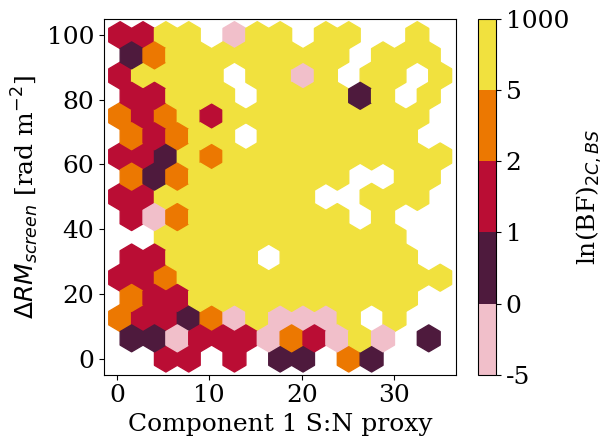

In [64]:
# plt.rcParams.update({'font.size': 17})
plt.rc('font'  ,family='serif')
bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
plt.rcParams.update({'font.size': 18})
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-4000,0,1,2,5, 20000] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 

SNR= 5
SNR1 = 35
deltaRM_lim = 100


#plt.savefig('comb_proxy.pdf', format='pdf')



plt.hexbin(proxy_1_comb[(proxy_2_comb>SNR) & (proxy_1_comb<SNR1) & (delta_RM_screen_comb<deltaRM_lim)], delta_RM_screen_comb[(proxy_2_comb>SNR) & (proxy_1_comb<SNR1) &(delta_RM_screen_comb<deltaRM_lim)], TC_2C_merge_10000_comb['delta_evd_11_5'][(proxy_2_comb>SNR) & (proxy_1_comb<SNR1) & (delta_RM_screen_comb<deltaRM_lim)], gridsize=14, norm=norm,  cmap=cmap, reduce_C_function=np.median) 
plt.ylabel('$\Delta RM_{screen}$ [rad m$^{-2}$]')
plt.xlabel('Component 1 S:N proxy')
labels = ['-5','0', '1', '2','5', '1000']
cb = plt.colorbar(label='ln(BF)$_{2C,BS}$')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.savefig('b1_proxy.pdf', format='pdf')
plt.show()


In [56]:
plt.rcParams.update({'font.size': 17
                    })
plt.rc('font'  ,family='serif')
bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-4000,0,1,2,5, 20000] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 

plt.clf()
sep = 
print(TC_2C_merge_10000_b1.keys())
plt.hexbin([proxy_2_b1<50], proxy_2_b1[proxy_2_b1<50],  TC_2C_merge_10000_b1['delta_evd_11_5'][proxy_2_b1<50], gridsize=20, norm=norm,  cmap=cmap, reduce_C_function=np.median) 
plt.xlabel('Component 1 S:N proxy')
plt.ylabel('Component 2 S:N proxy')
cb = plt.colorbar(label='ln(BF)$_{2C,BS}$')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.savefig('b1_proxy.pdf', format='pdf')
plt.show()
plt.clf()

SyntaxError: invalid syntax (3714490856.py, line 16)

# Have A Look At Percentages

In [51]:
from matplotlib import gridspec 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 

 
plt.hexbin(delta_RM_screen,TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_evd_11_5'], reduce_C_function=percentage_reduce_BIC_C, gridsize=20, cmap='cmr.lavender') 
plt.xlabel('$\Delta RM_{screen}$ rad $m^{-2}$') 
plt.ylabel('SNR') 
#ax_test[0].set_title('Slab') 
 
#labels = (' ','S', 'M', 'W', 'IC' ,'IM') 
cb = plt.colorbar(label='True Positive Rate [BF]', ticklocation='bottom') 
#cb.ax.set_yticklabels(labels) 
plt.show()



<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_71801/3299555060.py:7: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta RM_{screen}$ rad $m^{-2}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_71801/3299555060.py:7: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta RM_{screen}$ rad $m^{-2}$')


NameError: name 'delta_RM_screen' is not defined

In [ ]:
from matplotlib import gridspec 
plt.rcParams.update({'font.size': 13}) 
#Get the median Delta BIC values 
hex1 = plt.hexbin(BS_BS_10k_b1['RM_src_radm2'],BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_BIC_5_11'],reduce_C_function=np.median, gridsize=20) 
delta_bic = hex1.get_array() 
 
hex2 = plt.hexbin(BS_BS_10k_b1['RM_src_radm2'],BS_BS_10k_b1['SNR'], BS_BS_10k_b1['delta_BIC_5_11'], reduce_C_function=percentage_reduce_BIC_C, gridsize=20) 
delta_percentage = hex2.get_array() 
 
#Get the median Delta BIC values 
hex3 = hex1 = plt.hexbin(TC_BS_merge_10000_b1['deltaRM_radm2'],TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], reduce_C_function=np.median, gridsize=20) 
delta_bic_FS = hex3.get_array() 
hex4 = plt.hexbin(TC_BS_merge_10000_b1['deltaRM_radm2'],TC_2C_merge_10000_b1['SNR'], TC_2C_merge_10000_b1['delta_BIC_11_5'], reduce_C_function=percentage_reduce_BIC_C, gridsize=20) 
delta_percentage_FS = hex4.get_array() 
 
plt.clf() 
plt.axvline(x=-1.0, label='-1.0', c='lightblue') 
plt.axvline(x=-2.5, label='-2.5', c='dodgerblue') 
plt.axvline(x=-10.0, label='-10.0', c='mediumblue') 
 
plt.axhline(y=99.99994, label='$5\sigma$', c='maroon') 
plt.axhline(y=95.45, label='3$\sigma$', c='firebrick') 
plt.axhline(y=68.27, label='$\sigma$', c='red') 
 
 
plt.plot(delta_bic_FS, delta_percentage_FS, '.', marker='v', color='magenta', label='2C:BS', alpha=0.7) 
plt.plot(delta_bic, delta_percentage, '.', label='BS:2C', alpha=0.4) 
 
 
plt.legend(loc='lower left') 
plt.xscale('symlog') 
plt.ylabel('% Correct Selections') 
plt.xlabel('$\Delta$ BIC') 
plt.show()

# Residuals Band 1

In [ ]:
def calculate_mean_std_residual_slab_width(dataframe, column_name, error_column, SNR): 
 
    #Calculate residuals first  
    #Calculate for loop loop thorugh the bins  
 
    means = [] 
    stds = [] 
    lengths = [] 
 

    width_bins = np.arange(3.0, 40, 3)
 
    #Calculate for loop loop thorugh the bins  
     
    for i in range(len(width_bins)): 
        data = dataframe[column_name][(SNR < width_bins[i]+4) & (SNR>width_bins[i])] / dataframe[error_column][(SNR < width_bins[i]+4) & (SNR >width_bins[i])] 
        means.append(np.nanmedian(data)) 
        stds.append(np.nanstd(data)) 
        lengths.append(len(data)) 
         
    return means, stds, lengths

In [ ]:
TC_2C_merge_10000_b1['RM_C1_residual'] = RM_C1_residual 
TC_2C_merge_10000_b1['RM_C2_residual'] = RM_C2_residual 
TC_2C_merge_10000_b1['p_C1_residual'] = p_C1_residual 
TC_2C_merge_10000_b1['p_C2_residual'] = p_C2_residual 
TC_2C_merge_10000_b1['psi_C1_residual'] = psi_C1_residual 
TC_2C_merge_10000_b1['psi_C2_residual'] = psi_C2_residual 
 
TC_TC_frac1_means, TC_TC_frac1_std, TC_TC_frac1_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'p_C1_residual', 'fracPol1_minus_err', proxy_1_b1) 
TC_TC_frac2_means, TC_TC_frac2_std, TC_TC_frac2_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'p_C2_residual', 'fracPol2_minus_err', proxy_2_b1) 
 
TC_TC_RM1_means, TC_TC_RM1_std, TC_TC_RM1_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'RM_C1_residual', 'RM1_radm2_minus_err', proxy_1_b1) 
TC_TC_RM2_means, TC_TC_RM2_std, TC_TC_RM2_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'RM_C2_residual', 'RM2_radm2_minus_err', proxy_2_b1) 
 
TC_TC_psi1_means, TC_TC_psi1_std, TC_TC_psi1_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'psi_C1_residual', 'psi01_deg_plus_err', proxy_1_b1) 
TC_TC_psi2_means, TC_TC_psi2_std, TC_TC_psi2_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'psi_C2_residual', 'psi02_deg_plus_err', proxy_2_b1) 


In [ ]:

#BurnSlabs 
TC_TC_frac1_lengths = np.asarray(TC_TC_frac1_lengths) 
TC_TC_frac1_std = np.asarray(TC_TC_frac1_std) 
 
TC_TC_frac2_lengths = np.asarray(TC_TC_frac2_lengths) 
TC_TC_frac2_std = np.asarray(TC_TC_frac2_std) 
 
TC_TC_frac1_std = TC_TC_frac1_std/np.sqrt(TC_TC_frac1_lengths) 
TC_TC_frac2_std = TC_TC_frac2_std/np.sqrt(TC_TC_frac2_lengths) 
 
TC_TC_RM1_lengths = np.asarray(TC_TC_RM1_lengths) 
TC_TC_RM1_std = np.asarray(TC_TC_RM1_std) 
 
TC_TC_RM2_lengths = np.asarray(TC_TC_RM2_lengths) 
TC_TC_RM2_std = np.asarray(TC_TC_RM2_std) 
 
TC_TC_RM1_std = TC_TC_RM1_std/np.sqrt(TC_TC_RM1_lengths)
TC_TC_RM2_std = TC_TC_RM2_std/np.sqrt(TC_TC_RM2_lengths)
 
TC_TC_psi1_lengths = np.asarray(TC_TC_psi1_lengths) 
TC_TC_psi1_std = np.asarray(TC_TC_psi1_std) 
 
TC_TC_psi2_lengths = np.asarray(TC_TC_psi2_lengths) 
TC_TC_psi2_std = np.asarray(TC_TC_psi2_std) 
 
TC_TC_psi1_std = TC_TC_psi1_std/np.sqrt(TC_TC_psi1_lengths)
TC_TC_psi2_std = TC_TC_psi2_std/np.sqrt(TC_TC_psi2_lengths)
 
print(TC_TC_RM1_lengths)
width_bins = np.arange(3.0, 40, 3) 
 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4)) 
 
ax_test[0].plot(width_bins, TC_TC_frac2_means, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[0].plot(width_bins, TC_TC_frac1_means, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[0].fill_between(width_bins, TC_TC_frac1_means-TC_TC_frac1_std, TC_TC_frac1_means+TC_TC_frac1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[0].fill_between(width_bins, TC_TC_frac2_means-TC_TC_frac2_std, TC_TC_frac2_means+TC_TC_frac2_std, color='blue', alpha=0.7) 
ax_test[0].set_xlabel('SNR') 
ax_test[0].set_title('Band 1') 
ax_test[0].set_ylabel('$Residual_{p_{0}}$ / error') 
 
 
ax_test[1].plot(width_bins, TC_TC_RM2_means, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[1].plot(width_bins, TC_TC_RM1_means, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[1].fill_between(width_bins, TC_TC_RM1_means-TC_TC_RM1_std, TC_TC_RM1_means+TC_TC_RM1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[1].fill_between(width_bins, TC_TC_RM2_means-TC_TC_RM2_std, TC_TC_RM2_means+TC_TC_RM2_std, color='blue', alpha=0.7) 
ax_test[1].set_xlabel('SNR') 
ax_test[1].set_title('Band 1') 
ax_test[1].set_ylabel('$Residual_{RM_{0}}$ / error') 
ax_test[1].legend() 
 
 
 
ax_test[2].plot(width_bins, TC_TC_psi1_means, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[2].fill_between(width_bins, TC_TC_psi1_means-TC_TC_psi1_std, TC_TC_psi1_means+TC_TC_psi1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[2].plot(width_bins, TC_TC_psi2_means, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[2].fill_between(width_bins, TC_TC_psi2_means-TC_TC_psi2_std, TC_TC_psi2_means+TC_TC_psi2_std, color='blue', alpha=0.7) 
ax_test[2].set_xlabel('SNR') 
ax_test[2].set_title('Band 1') 
ax_test[2].set_ylabel('$Residual_{\psi{0}}$ / error') 
plt.tight_layout() 
plt.show()

What about the residuals in terms of fractional polarization and in terms of distance between components

In [ ]:

 
plt.scatter(TC_2C_merge_10000_b1.SNR, TC_2C_merge_10000_b1.RM1_radm2_plus_err, label='Component 1') 
plt.scatter(TC_2C_merge_10000_b1.SNR, TC_2C_merge_10000_b1.RM2_radm2_plus_err, label='Component 2') 
 
plt.xlabel('SNR') 
plt.ylabel('RM error') 
plt.legend()

In [ ]:
plt.scatter(TC_2C_merge_10000_b1.fracPol1_minus_err, TC_2C_merge_10000_b1.RM1_radm2_minus_err, label='Component 1') 
plt.scatter(TC_2C_merge_10000_b1.fracPol2_minus_err, TC_2C_merge_10000_b1.RM2_radm2_minus_err, label='Component 2') 
 
plt.xlabel('plus error') 
plt.ylabel('minus error') 
plt.legend()



# Two Band

In [52]:
TC_2C_merge_10000_comb['RM_C1_residual'] = RM_C1_residual_comb 
TC_2C_merge_10000_comb['RM_C2_residual'] = RM_C2_residual_comb 
TC_2C_merge_10000_comb['p_C1_residual'] = p_C1_residual_comb 
TC_2C_merge_10000_comb['p_C2_residual'] = p_C2_residual_comb 
TC_2C_merge_10000_comb['psi_C1_residual'] = psi_C1_residual_comb  
TC_2C_merge_10000_comb['psi_C2_residual'] = psi_C2_residual_comb  
 
TC_TC_frac1_means_comb, TC_TC_frac1_std_comb, TC_TC_frac1_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'p_C1_residual', 'fracPol1_minus_err', proxy_1_comb) 
TC_TC_frac2_means_comb, TC_TC_frac2_std_comb, TC_TC_frac2_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'p_C2_residual', 'fracPol2_minus_err', proxy_2_comb) 
 
TC_TC_RM1_means_comb, TC_TC_RM1_std_comb, TC_TC_RM1_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'RM_C1_residual', 'RM1_radm2_minus_err', proxy_1_comb) 
TC_TC_RM2_means_comb, TC_TC_RM2_std_comb, TC_TC_RM2_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'RM_C2_residual', 'RM2_radm2_minus_err', proxy_2_comb) 

TC_TC_psi1_means_comb, TC_TC_psi1_std_comb, TC_TC_psi1_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'psi_C1_residual', 'psi01_deg_plus_err', proxy_1_comb) 
TC_TC_psi2_means_comb, TC_TC_psi2_std_comb, TC_TC_psi2_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'psi_C2_residual', 'psi02_deg_plus_err', proxy_2_comb)

NameError: name 'calculate_mean_std_residual_slab_width' is not defined

In [53]:
#BurnSlabs 
TC_TC_frac1_lengths = np.asarray(TC_TC_frac1_lengths_comb) 
TC_TC_frac1_std = np.asarray(TC_TC_frac1_std_comb) 
 
TC_TC_frac2_lengths = np.asarray(TC_TC_frac2_lengths_comb) 
TC_TC_frac2_std = np.asarray(TC_TC_frac2_std_comb) 
 
TC_TC_frac1_std = TC_TC_frac1_std/np.sqrt(TC_TC_frac1_lengths_comb) 
TC_TC_frac2_std = TC_TC_frac2_std/np.sqrt(TC_TC_frac2_lengths_comb) 
 
TC_TC_RM1_lengths = np.asarray(TC_TC_RM1_lengths_comb) 
TC_TC_RM1_std = np.asarray(TC_TC_RM1_std_comb) 
 
TC_TC_RM2_lengths = np.asarray(TC_TC_RM2_lengths_comb) 
TC_TC_RM2_std = np.asarray(TC_TC_RM2_std_comb) 
 
TC_TC_RM1_std = TC_TC_RM1_std/np.sqrt(TC_TC_RM1_lengths_comb)
TC_TC_RM2_std = TC_TC_RM2_std/np.sqrt(TC_TC_RM2_lengths_comb)
 
TC_TC_psi1_lengths = np.asarray(TC_TC_psi1_lengths_comb) 
TC_TC_psi1_std = np.asarray(TC_TC_psi1_std_comb) 
 
TC_TC_psi2_lengths = np.asarray(TC_TC_psi2_lengths_comb) 
TC_TC_psi2_std = np.asarray(TC_TC_psi2_std_comb) 
 
TC_TC_psi1_std = TC_TC_psi1_std_comb/np.sqrt(TC_TC_psi1_lengths_comb)
TC_TC_psi2_std = TC_TC_psi2_std_comb/np.sqrt(TC_TC_psi2_lengths_comb)
 
width_bins = np.arange(3.0, 40, 3) 
 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4)) 
 
ax_test[0].plot(width_bins, TC_TC_frac2_means_comb, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[0].plot(width_bins, TC_TC_frac1_means_comb, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[0].fill_between(width_bins, TC_TC_frac1_means_comb-TC_TC_frac1_std, TC_TC_frac1_means_comb+TC_TC_frac1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[0].fill_between(width_bins, TC_TC_frac2_means_comb-TC_TC_frac2_std, TC_TC_frac2_means_comb+TC_TC_frac2_std, color='blue', alpha=0.7) 
ax_test[0].set_xlabel('SNR') 
ax_test[0].set_title('Combined') 
ax_test[0].set_ylabel('$Residual_{p_{0}}$ / error') 
 
 
ax_test[1].plot(width_bins, TC_TC_RM1_means_comb, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[1].plot(width_bins, TC_TC_RM2_means_comb, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[1].fill_between(width_bins, TC_TC_RM1_means_comb-TC_TC_RM1_std, TC_TC_RM1_means_comb+TC_TC_RM1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[1].fill_between(width_bins, TC_TC_RM2_means_comb-TC_TC_RM2_std, TC_TC_RM2_means_comb+TC_TC_RM2_std, color='blue', alpha=0.7) 
ax_test[1].set_xlabel('SNR') 
ax_test[1].set_title('Combined') 
ax_test[1].set_ylabel('$Residual_{RM_{0}}$ / error') 
ax_test[1].legend() 
 
 
 
ax_test[2].plot(width_bins, TC_TC_psi1_means_comb, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[2].fill_between(width_bins, TC_TC_psi1_means_comb-TC_TC_psi1_std, TC_TC_psi1_means_comb+TC_TC_psi1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[2].plot(width_bins, TC_TC_psi2_means_comb, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[2].fill_between(width_bins, TC_TC_psi2_means_comb-TC_TC_psi2_std, TC_TC_psi2_means_comb+TC_TC_psi2_std, color='blue', alpha=0.7) 
ax_test[2].set_xlabel('SNR') 
ax_test[2].set_title('Combined') 
ax_test[2].set_ylabel('$Residual_{\psi{0}}$ / error') 
plt.tight_layout() 
plt.show()

<>:62: SyntaxWarning: invalid escape sequence '\p'
<>:62: SyntaxWarning: invalid escape sequence '\p'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_71801/904855145.py:62: SyntaxWarning: invalid escape sequence '\p'
  ax_test[2].set_ylabel('$Residual_{\psi{0}}$ / error')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_71801/904855145.py:62: SyntaxWarning: invalid escape sequence '\p'
  ax_test[2].set_ylabel('$Residual_{\psi{0}}$ / error')


NameError: name 'TC_TC_frac1_lengths_comb' is not defined

In [54]:
plt.hist(RM_C2_residual, bins = 25)
plt.hist(RM_C2_residual_comb[TC_2C_merge_10000_comb['src']<5000], bins = 25)
print(np.mean(RM_C2_residual_comb))
print(np.mean(RM_C2_residual))


NameError: name 'RM_C2_residual' is not defined

# Need to rerun the 2C combined bands 0-5000

# What If we take into account the goodness of fit. Let us remove all not properly selected models.

This assumes that we know the correct models

In [ ]:
def calculate_mean_std_residual_slab_width(dataframe, column_name, error_column): 
 
    #Calculate residuals first  
    #Calculate for loop loop thorugh the bins  
 
    means = [] 
    stds = [] 
    lengths = [] 
 
    upper_bins = np.arange(6.0, 43, 3) 
    lower_bins = np.arange(3.0, 40, 3) 
 
    #Calculate for loop loop thorugh the bins  
     
    for i in range(len(upper_bins)): 
        data = dataframe[column_name][(dataframe['SNR'] < upper_bins[i]) & (dataframe['SNR']>lower_bins[i]) & (dataframe['ln(EVIDENCE) '] > 1)] / dataframe[error_column][(dataframe['SNR'] < upper_bins[i]) & (dataframe['SNR']>lower_bins[i]) & (dataframe['ln(EVIDENCE) '] > 1)] 
        means.append(np.nanmedian(data)) 
        stds.append(np.std(data)) 
        lengths.append(len(data)) 
         
    return means, stds, lengths

In [ ]:
TC_2C_merge_10000_b1['RM_C1_residual'] = RM_C1_residual 
TC_2C_merge_10000_b1['RM_C2_residual'] = RM_C2_residual 
TC_2C_merge_10000_b1['p_C1_residual'] = p_C1_residual 
TC_2C_merge_10000_b1['p_C2_residual'] = p_C2_residual 
TC_2C_merge_10000_b1['psi_C1_residual'] = psi_C1_residual 
TC_2C_merge_10000_b1['psi_C2_residual'] = psi_C2_residual 
 
TC_TC_frac1_means, TC_TC_frac1_std, TC_TC_frac1_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'p_C1_residual', 'fracPol1_minus_err') 
TC_TC_frac2_means, TC_TC_frac2_std, TC_TC_frac2_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'p_C2_residual', 'fracPol2_minus_err') 
 
TC_TC_RM1_means, TC_TC_RM1_std, TC_TC_RM1_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'RM_C1_residual', 'RM1_radm2_minus_err') 
TC_TC_RM2_means, TC_TC_RM2_std, TC_TC_RM2_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'RM_C2_residual', 'RM2_radm2_minus_err') 
 
TC_TC_psi1_means, TC_TC_psi1_std, TC_TC_psi1_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'psi_C1_residual', 'psi01_deg_plus_err') 
TC_TC_psi2_means, TC_TC_psi2_std, TC_TC_psi2_lengths = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_b1, 'psi_C2_residual', 'psi02_deg_plus_err') 


In [ ]:
#BurnSlabs 
TC_TC_frac1_lengths = np.asarray(TC_TC_frac1_lengths) 
TC_TC_frac1_std = np.asarray(TC_TC_frac1_std) 
 
TC_TC_frac2_lengths = np.asarray(TC_TC_frac2_lengths) 
TC_TC_frac2_std = np.asarray(TC_TC_frac2_std) 
 
TC_TC_frac1_std = TC_TC_frac1_std/np.sqrt(TC_TC_frac1_lengths) 
TC_TC_frac2_std = TC_TC_frac2_std/np.sqrt(TC_TC_frac2_lengths) 
 
TC_TC_RM1_lengths = np.asarray(TC_TC_RM1_lengths) 
TC_TC_RM1_std = np.asarray(TC_TC_RM1_std) 
 
TC_TC_RM2_lengths = np.asarray(TC_TC_RM2_lengths) 
TC_TC_RM2_std = np.asarray(TC_TC_RM2_std) 
 
TC_TC_RM1_std = TC_TC_RM1_std/np.sqrt(TC_TC_RM1_lengths)
TC_TC_RM2_std = TC_TC_RM2_std/np.sqrt(TC_TC_RM2_lengths)
 
TC_TC_psi1_lengths = np.asarray(TC_TC_psi1_lengths) 
TC_TC_psi1_std = np.asarray(TC_TC_psi1_std) 
 
TC_TC_psi2_lengths = np.asarray(TC_TC_psi2_lengths) 
TC_TC_psi2_std = np.asarray(TC_TC_psi2_std) 
 
TC_TC_psi1_std = TC_TC_psi1_std/np.sqrt(TC_TC_psi1_lengths)
TC_TC_psi2_std = TC_TC_psi2_std/np.sqrt(TC_TC_psi2_lengths)
 
 
width_bins = np.arange(3.0, 40, 3) 

 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4)) 
 
ax_test[0].plot(width_bins, TC_TC_frac2_means, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[0].plot(width_bins, TC_TC_frac1_means, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[0].fill_between(width_bins, TC_TC_frac1_means-TC_TC_frac1_std, TC_TC_frac1_means+TC_TC_frac1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[0].fill_between(width_bins, TC_TC_frac2_means-TC_TC_frac2_std, TC_TC_frac2_means+TC_TC_frac2_std, color='blue', alpha=0.7) 
ax_test[0].set_xlabel('SNR') 
ax_test[0].set_title('Band 1') 
ax_test[0].set_ylabel('$Residual_{p_{0}}$ / error') 
 
 
ax_test[1].plot(width_bins, TC_TC_RM2_means, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[1].plot(width_bins, TC_TC_RM1_means, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[1].fill_between(width_bins, TC_TC_RM1_means-TC_TC_RM1_std, TC_TC_RM1_means+TC_TC_RM1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[1].fill_between(width_bins, TC_TC_RM2_means-TC_TC_RM2_std, TC_TC_RM2_means+TC_TC_RM2_std, color='blue', alpha=0.7) 
ax_test[1].set_xlabel('SNR') 
ax_test[1].set_title('Band 1') 
ax_test[1].set_ylabel('$Residual_{RM_{0}}$ / error') 
ax_test[1].legend() 
 
 
 
ax_test[2].plot(width_bins, TC_TC_psi1_means, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[2].fill_between(width_bins, TC_TC_psi1_means-TC_TC_psi1_std, TC_TC_psi1_means+TC_TC_psi1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[2].plot(width_bins, TC_TC_psi2_means, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[2].fill_between(width_bins, TC_TC_psi2_means-TC_TC_psi2_std, TC_TC_psi2_means+TC_TC_psi2_std, color='blue', alpha=0.7) 
ax_test[2].set_xlabel('SNR') 

ax_test[2].set_title('Band 1') 
ax_test[2].set_ylabel('$Residual_{\psi{0}}$ / error') 
plt.tight_layout() 
plt.show()

Change to proxy component SNR ^^^

In [ ]:
TC_2C_merge_10000_comb['RM_C1_residual'] = RM_C1_residual_comb 
TC_2C_merge_10000_comb['RM_C2_residual'] = RM_C2_residual_comb 
TC_2C_merge_10000_comb['p_C1_residual'] = p_C1_residual_comb 
TC_2C_merge_10000_comb['p_C2_residual'] = p_C2_residual_comb 
TC_2C_merge_10000_comb['psi_C1_residual'] = psi_C1_residual_comb  
TC_2C_merge_10000_comb['psi_C2_residual'] = psi_C2_residual_comb  
 
TC_TC_frac1_means_comb, TC_TC_frac1_std_comb, TC_TC_frac1_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'p_C1_residual', 'fracPol1_minus_err') 
TC_TC_frac2_means_comb, TC_TC_frac2_std_comb, TC_TC_frac2_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'p_C2_residual', 'fracPol2_minus_err') 
 
TC_TC_RM1_means_comb, TC_TC_RM1_std_comb, TC_TC_RM1_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'RM_C1_residual', 'RM1_radm2_minus_err') 
TC_TC_RM2_means_comb, TC_TC_RM2_std_comb, TC_TC_RM2_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'RM_C2_residual', 'RM2_radm2_minus_err') 

TC_TC_psi1_means_comb, TC_TC_psi1_std_comb, TC_TC_psi1_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'psi_C1_residual', 'psi01_deg_plus_err') 
TC_TC_psi2_means_comb, TC_TC_psi2_std_comb, TC_TC_psi2_lengths_comb = calculate_mean_std_residual_slab_width(TC_2C_merge_10000_comb, 'psi_C2_residual', 'psi02_deg_plus_err')

In [ ]:
#BurnSlabs 
TC_TC_frac1_lengths = np.asarray(TC_TC_frac1_lengths_comb) 
TC_TC_frac1_std = np.asarray(TC_TC_frac1_std_comb) 
 
TC_TC_frac2_lengths = np.asarray(TC_TC_frac2_lengths_comb) 
TC_TC_frac2_std = np.asarray(TC_TC_frac2_std_comb) 
 
TC_TC_frac1_std = TC_TC_frac1_std/np.sqrt(TC_TC_frac1_lengths_comb) 
TC_TC_frac2_std = TC_TC_frac2_std/np.sqrt(TC_TC_frac2_lengths_comb) 
 
TC_TC_RM1_lengths = np.asarray(TC_TC_RM1_lengths_comb) 
TC_TC_RM1_std = np.asarray(TC_TC_RM1_std_comb) 
 
TC_TC_RM2_lengths = np.asarray(TC_TC_RM2_lengths_comb) 
TC_TC_RM2_std = np.asarray(TC_TC_RM2_std_comb) 
 
TC_TC_RM1_std = TC_TC_RM1_std/np.sqrt(TC_TC_RM1_lengths_comb)
TC_TC_RM2_std = TC_TC_RM2_std/np.sqrt(TC_TC_RM2_lengths_comb)
 
TC_TC_psi1_lengths = np.asarray(TC_TC_psi1_lengths_comb) 
TC_TC_psi1_std = np.asarray(TC_TC_psi1_std_comb) 
 
TC_TC_psi2_lengths = np.asarray(TC_TC_psi2_lengths_comb) 
TC_TC_psi2_std = np.asarray(TC_TC_psi2_std_comb) 
 
TC_TC_psi1_std = TC_TC_psi1_std_comb/np.sqrt(TC_TC_psi1_lengths_comb)
TC_TC_psi2_std = TC_TC_psi2_std_comb/np.sqrt(TC_TC_psi2_lengths_comb)
 
 
width_bins = np.arange(3.0, 40, 3) 

 
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4)) 
 
ax_test[0].plot(width_bins, TC_TC_frac2_means_comb, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[0].plot(width_bins, TC_TC_frac1_means_comb, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[0].fill_between(width_bins, TC_TC_frac1_means_comb-TC_TC_frac1_std, TC_TC_frac1_means_comb+TC_TC_frac1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[0].fill_between(width_bins, TC_TC_frac2_means_comb-TC_TC_frac2_std, TC_TC_frac2_means_comb+TC_TC_frac2_std, color='blue', alpha=0.7) 
ax_test[0].set_xlabel('SNR') 
ax_test[0].set_title('TC') 
ax_test[0].set_xlim(3,20) 
ax_test[0].set_ylabel('$Residual_{p_{0}}$ / error') 
 
 
ax_test[1].plot(width_bins, TC_TC_RM1_means_comb, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[1].plot(width_bins, TC_TC_RM2_means_comb, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[1].fill_between(width_bins, TC_TC_RM1_means_comb-TC_TC_RM1_std, TC_TC_RM1_means_comb+TC_TC_RM1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[1].fill_between(width_bins, TC_TC_RM2_means_comb-TC_TC_RM2_std, TC_TC_RM2_means_comb+TC_TC_RM2_std, color='blue', alpha=0.7) 
ax_test[1].set_xlabel('SNR') 
ax_test[1].set_title('TC') 
ax_test[1].set_xlim(3,20) 
ax_test[1].set_ylabel('$Residual_{RM_{0}}$ / error') 
ax_test[1].legend() 
 
 
 
ax_test[2].plot(width_bins, TC_TC_psi1_means_comb, marker='.', linestyle='-.',  color = 'teal', label='C1') 
ax_test[2].fill_between(width_bins, TC_TC_psi1_means_comb-TC_TC_psi1_std, TC_TC_psi1_means_comb+TC_TC_psi1_std, color = 'turquoise',  alpha=0.5) 
 
ax_test[2].plot(width_bins, TC_TC_psi2_means_comb, marker='.', linestyle='-.', color='darkblue',  label='C2') 
ax_test[2].fill_between(width_bins, TC_TC_psi2_means_comb-TC_TC_psi2_std, TC_TC_psi2_means_comb+TC_TC_psi2_std, color='blue', alpha=0.7) 
ax_test[2].set_xlabel('SNR') 
ax_test[2].set_title('TC') 
ax_test[2].set_xlim(3,20) 
ax_test[2].set_ylabel('$Residual_{\psi{0}}$ / error') 
plt.tight_layout() 
plt.show()

# Make a hexbin map with SNR proxy

In [ ]:
plt.rcParams.update({'font.size': 14})
plt.rc('font'  ,family='serif')

plt.hexbin(proxy_1_comb[(proxy_2_comb<50) & (proxy_1_comb<50)], proxy_2_comb[(proxy_2_comb<50) & (proxy_1_comb<50)], TC_2C_merge_10000_comb['RM_C2_residual']/TC_2C_merge_10000_comb['RM2_radm2_minus_err'][(proxy_2_comb<50) & (proxy_1_comb<50)], gridsize=20,  cmap='cmr.guppy', vmin=-2, vmax=2, reduce_C_function=np.nanmedian) 
plt.xlabel('Component 1 SN proxy')
plt.ylabel('Component 2 SN proxy')
plt.colorbar(label='Residual $RM_{screen, 1} [rad m$')
plt.savefig('comb_proxy.pdf', format='pdf')
plt.show()
plt.clf()

In [ ]:
print(TC_2C_merge_10000_b1.keys())

# COMRADE TALK


RM_C1_residual = component_1_RM - TC_2C_merge_10000_b1.RM1_radm2 
RM_C2_residual = component_2_RM  - TC_2C_merge_10000_b1.RM2_radm2
 
p_C1_residual = component_1_p  -  TC_2C_merge_10000_b1.fracPol1
p_C2_residual = component_2_p  - TC_2C_merge_10000_b1.fracPol2 
 
psi_C1_residual = component_1_psi - TC_2C_merge_10000_b1.psi01_deg
psi_C2_residual = component_2_psi - TC_2C_merge_10000_b1.psi02_deg


In [ ]:
plt.rcParams.update({'font.size': 14})
plt.rc('font'  ,family='serif')

#Need to use the sorted Rsiduals
Bayesafactor = 20

plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], RM_C1_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmean, vmin=-15, vmax=15,  cmap='cmr.guppy')
plt.colorbar(label='RM C1 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()

plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], RM_C2_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmean, vmin=-15, vmax=15,  cmap='cmr.guppy')
plt.colorbar(label='RM C2 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()


plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], p_C1_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmean, vmin=-0.2, vmax=0.2,  cmap='cmr.guppy')
plt.colorbar(label='RM C1 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()

plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], p_C2_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmean, vmin=-0.2, vmax=0.2,  cmap='cmr.guppy')
plt.colorbar(label='RM C1 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()


plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], psi_C1_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmean, vmin=-0.2, vmax=0.2,  cmap='cmr.guppy')
plt.colorbar(label='psi C1 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()

plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], psi_C2_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmean, vmin=-10, vmax=10,  cmap='cmr.guppy')
plt.colorbar(label='psi C1 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()










In [ ]:
plt.rcParams.update({'font.size': 17})
plt.rc('font'  ,family='serif')

#Need to use the sorted Rsiduals
Bayesafactor = 5

plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], RM_C1_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmedian, vmin=-10, vmax=10,  cmap='cmr.guppy')
plt.colorbar(label='Residual RM 1')
plt.xlabel('S/N Component 1 proxy')
plt.ylabel('S/N Component 2 proxy')
plt.tight_layout()
plt.savefig('2C_err_SN.pdf', format='pdf')
plt.show()

"""
plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], RM_C2_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmedian, vmin=-10, vmax=10,  cmap='cmr.guppy')
plt.colorbar(label='Residual RM 2')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()


plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], p_C1_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmedian, vmin=-0.1, vmax=0.1,  cmap='cmr.guppy')
plt.colorbar(label='RM C1 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()

plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], p_C2_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmedian, vmin=-0.1, vmax=0.1,  cmap='cmr.guppy')
plt.colorbar(label='RM C1 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()


plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], psi_C1_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmedian, vmin=-0.2, vmax=0.2,  cmap='cmr.guppy')
plt.colorbar(label='RM C1 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()

plt.hexbin(proxy_1_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], proxy_2_b1[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], psi_C2_residual[(proxy_1_b1<50) & (proxy_2_b1<50) & (TC_2C_merge_10000_b1['ln(EVIDENCE) ']>Bayesafactor)], gridsize = 20, reduce_C_function=np.nanmedian, vmin=-10, vmax=10,  cmap='cmr.guppy')
plt.colorbar(label='RM C1 Residual')
plt.xlabel('S/N Component 1')
plt.ylabel('S/N Component 2')
plt.show()

"""




# 



Check that the error coordinate with the RM seperation

In [ ]:
SNlimit = 7

"""
plt.scatter(RM_sep_b1, RM_C2_residual[proxy_2_b1 > SNlimit], c='k')
plt.scatter(RM_sep_b1, RM_C1_residual[proxy_1_b1 > SNlimit], c='k')
plt.xlabel('True RM seperation')
plt.ylabel('$RM_{screen}$ Residual')
plt.title('Band 1')
plt.show()
"""
plt.clf()

plt.scatter(RM_sep_comb[proxy_2_comb > SNlimit], RM_C2_residual_comb[proxy_2_comb > SNlimit], c='k')
plt.scatter(RM_sep_comb[proxy_1_comb > SNlimit], RM_C1_residual_comb[proxy_1_comb > SNlimit], c='k')
plt.xlabel('True RM seperation')
plt.ylabel('$RM_{screen}$ Residual')
plt.title('Combined Band')
plt.show()



In [ ]:
Nlimit = 40
RM_residual = (TC_2C_merge_10000_b1.RM_screen_2_radm2[TC_2C_merge_10000_b1.SNR > SNlimit]  -  TC_2C_merge_10000_b1.RM2_radm2[TC_2C_merge_10000_b1.SNR > SNlimit] )/ TC_2C_merge_10000_b1.RM2_radm2_plus_err[TC_2C_merge_10000_b1.SNR > SNlimit]
RM_residual1 = (TC_2C_merge_10000_b1.RM_screen_radm2[TC_2C_merge_10000_b1.SNR > SNlimit]  -  TC_2C_merge_10000_b1.RM1_radm2[TC_2C_merge_10000_b1.SNR > SNlimit] ) / TC_2C_merge_10000_b1.RM1_radm2_plus_err[TC_2C_merge_10000_b1.SNR > SNlimit]
RM_sep_true = abs(TC_2C_merge_10000_b1.RM_screen_2_radm2[TC_2C_merge_10000_b1.SNR > SNlimit]  - TC_2C_merge_10000_b1.RM_screen_radm2[TC_2C_merge_10000_b1.SNR > SNlimit])

plt.yscale('symlog')
plt.scatter(RM_sep_b1, RM_residual, c='k')
plt.scatter(RM_sep_b1, RM_residual1, c='k')
plt.xlabel('True RM seperation')
plt.ylabel('$RM_{screen}$ Error')

In [ ]:
plt.rcParams.update({'font.size': 14})
plt.rc('font'  ,family='serif')

plt.hexbin(proxy_1_comb[(proxy_1_comb<50)], RM_sep_true[(proxy_1_comb<50)], TC_2C_merge_10000_comb['RM_C1_residual'][(proxy_1_comb<50)], gridsize=20,  cmap='cmr.guppy', vmin=-20, vmax=20, reduce_C_function=np.nanmedian) 
plt.xlabel('Component 1 SN proxy')
plt.ylabel('Component 2 SN proxy')
plt.colorbar(label='Residual $RM_{screen, 1}$')
plt.savefig('comb_proxy.pdf', format='pdf')
plt.show()
plt.clf()


plt.hexbin(proxy_2_comb[(proxy_2_comb<50)], RM_sep_true[(proxy_2_comb<50)], TC_2C_merge_10000_comb['RM_C2_residual'][(proxy_2_comb<50)], gridsize=20,  cmap='cmr.guppy', vmin=-20, vmax=20, reduce_C_function=np.nanmedian) 
plt.xlabel('Component 1 SN proxy')
plt.ylabel('Component 2 SN proxy')
plt.colorbar(label='Residual $RM_{screen, 1}$')
plt.savefig('comb_proxy.pdf', format='pdf')
plt.show()
plt.clf()

# Make the pure resdidual histograms

In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4), constrained_layout=True) 
n=30
cutoffRM=2000
evd_cut=5
cutoffp = 0.1

RM_residual = (TC_2C_merge_10000_b1.RM_screen_2_radm2[TC_2C_merge_10000_b1.SNR > SNlimit]  -  TC_2C_merge_10000_b1.RM2_radm2[TC_2C_merge_10000_b1.SNR > SNlimit] )/ TC_2C_merge_10000_b1.RM2_radm2_plus_err[TC_2C_merge_10000_b1.SNR > SNlimit]


ax_test[0].hist(p_C1_residual, color='indigo', density=True, alpha=0.5, bins =n, label='C1')
ax_test[0].hist(p_C2_residual, color='violet', density=True, alpha=0.5, bins =n, label='C2')
ax_test[0].set_xlabel('Residual $p_{0}$')
ax_test[0].axvline(x=np.nanmean(p_C2_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='magenta', label='C2 mean')
ax_test[0].axvline(x=np.nanmean(p_C1_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='indigo', linestyle='-.' ,label='C1 mean')
print(np.mean(p_C2_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]))
print(np.mean(p_C1_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]))



ax_test[1].hist(RM_C1_residual, color='indigo', density=True, alpha=0.5, bins =n)
ax_test[1].hist(RM_C2_residual, color='violet', density=True, alpha=0.5, bins =n)
ax_test[1].set_xlabel('Residual RM') 
ax_test[1].axvline(x=np.nanmean(RM_C2_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='magenta')
ax_test[1].axvline(x=np.nanmean(RM_C1_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='indigo', linestyle='-.')



ax_test[2].hist(psi_C1_residual, color='indigo', density=True, alpha=0.5, bins =n)
ax_test[2].hist(psi_C2_residual, color='violet', density=True, alpha=0.5, bins =n)
ax_test[2].set_xlabel('Residual $\psi_{0}$')
ax_test[2].axvline(x=np.nanmean(psi_C1_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='magenta')
ax_test[2].axvline(x=np.nanmean(psi_C2_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='indigo', linestyle='-.')

fig_chi.legend()

# Does a high residual correlate to a QU high error?

In [ ]:

plt.scatter(TC_2C_merge_10000_comb.RM_screen_radm2 - TC_2C_merge_10000_comb.RM2_radm2, TC_2C_merge_10000_comb.RM1_radm2_plus_err, label='Component 1') 
plt.scatter(TC_2C_merge_10000_comb.RM_screen_2_radm2 - TC_2C_merge_10000_comb.RM2_radm2, TC_2C_merge_10000_comb.RM2_radm2_plus_err, label='Component 2') 
plt.xlabel('Residual $RM_{screen}$') 
plt.ylabel('RM error') 
plt.legend()

# Is the previeved error correlated between the two components?

In [ ]:
print(TC_2C_merge_10000_b1.keys())

In [ ]:
#With all fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from pyrolite.comp.codata import close
from pyrolite.plot import pyroplot
from pyrolite.plot.density import density


ax = TC_2C_merge_10000_b1.loc[:, ["p_C1_residual", "p_C2_residual"]].pyroplot.scatter(s=10, alpha=0.3, c="k", zorder=2)
TC_2C_merge_10000_b1.loc[:, ["p_C1_residual", "p_C2_residual"]].pyroplot.density(ax=ax, contours=[0.95, 0.66, 0.33], colors="r")
plt.show()
#plt.clf

ax1 = TC_2C_merge_10000_b1.loc[:, ["RM_C1_residual", "RM_C2_residual"]].pyroplot.scatter(contours=[0.95, 0.66, 0.33], coverage_scale=1.5, alpha=0.3, c="k", bins=100)
TC_2C_merge_10000_b1.loc[:, ["RM_C1_residual", "RM_C2_residual"]].pyroplot.density(ax = ax1, contours=[0.95, 0.66, 0.33], colors="r", coverage_scale=1.5, bins=100)
plt.show()

ax2 = TC_2C_merge_10000_b1.loc[:, ["psi_C1_residual", "psi_C2_residual"]].pyroplot.scatter(contours=[0.95, 0.66, 0.33], coverage_scale=1.5, alpha=0.3, c="k", bins=100)
TC_2C_merge_10000_b1.loc[:, ["psi_C1_residual", "psi_C2_residual"]].pyroplot.density(ax = ax2, contours=[0.95, 0.66, 0.33], colors="r", coverage_scale=1.5, bins=100)
plt.show()


ax4 = TC_2C_merge_10000_comb.loc[:, ["p_C1_residual", "p_C2_residual"]].pyroplot.scatter(s=10, alpha=0.3, c="k", zorder=2)
TC_2C_merge_10000_comb.loc[:, ["p_C1_residual", "p_C2_residual"]].pyroplot.density(ax=ax4, contours=[0.95, 0.66, 0.33], colors="r")
plt.show()
#plt.clf

ax5 = TC_2C_merge_10000_comb.loc[:, ["RM_C1_residual", "RM_C2_residual"]].pyroplot.scatter(contours=[0.95, 0.66, 0.33], coverage_scale=1.5, alpha=0.3, c="k", bins=100)
TC_2C_merge_10000_comb.loc[:, ["RM_C1_residual", "RM_C2_residual"]].pyroplot.density(ax = ax5, contours=[0.95, 0.66, 0.33], colors="r", coverage_scale=1.5, bins=100)
plt.show()

ax6 = TC_2C_merge_10000_comb.loc[:, ["psi_C1_residual", "psi_C2_residual"]].pyroplot.scatter(contours=[0.95, 0.66, 0.33], coverage_scale=1.5, alpha=0.3, c="k", bins=100)
TC_2C_merge_10000_comb.loc[:, ["psi_C1_residual", "psi_C2_residual"]].pyroplot.density(ax = ax6, contours=[0.95, 0.66, 0.33], colors="r", coverage_scale=1.5, bins=100)
plt.show()



## Is the precieved error correlated?

In [ ]:
plt.clf()
ax = TC_2C_merge_10000_b1.loc[:, ["fracPol1_plus_err", "fracPol2_plus_err"]].pyroplot.scatter(s=10, alpha=0.3, c="k", zorder=2)
TC_2C_merge_10000_b1.loc[:, ["fracPol1_plus_err", "fracPol2_plus_err"]].pyroplot.density(ax=ax, contours=[0.95, 0.66, 0.33], colors="r")
plt.show()
#plt.clf

ax1 = TC_2C_merge_10000_b1.loc[:, ["RM1_radm2_plus_err", "RM2_radm2_plus_err"]].pyroplot.scatter(contours=[0.95, 0.66, 0.33], coverage_scale=1.5, alpha=0.3, c="k", bins=100)
TC_2C_merge_10000_b1.loc[:, ["RM1_radm2_plus_err", "RM2_radm2_plus_err"]].pyroplot.density(ax = ax1, contours=[0.95, 0.66, 0.33], colors="r", coverage_scale=1.5, bins=100)
plt.show()

ax2 = TC_2C_merge_10000_b1.loc[:, ["psi01_deg_plus_err", "psi02_deg_plus_err"]].pyroplot.scatter(contours=[0.95, 0.66, 0.33], coverage_scale=1.5, alpha=0.3, c="k", bins=100)
TC_2C_merge_10000_b1.loc[:, ["psi01_deg_plus_err", "psi02_deg_plus_err"]].pyroplot.density(ax = ax2, contours=[0.95, 0.66, 0.33], colors="r", coverage_scale=1.5, bins=100)
plt.show()


ax4 = TC_2C_merge_10000_comb.loc[:, ["fracPol1_plus_err", "fracPol2_plus_err"]].pyroplot.scatter(s=10, alpha=0.3, c="k", zorder=2)
TC_2C_merge_10000_comb.loc[:, ["fracPol1_plus_err", "fracPol2_plus_err"]].pyroplot.density(ax=ax4, contours=[0.95, 0.66, 0.33], colors="r")
plt.show()
#plt.clf

ax5 = TC_2C_merge_10000_comb.loc[:, ["RM1_radm2_plus_err", "RM2_radm2_plus_err"]].pyroplot.scatter(contours=[0.95, 0.66, 0.33], coverage_scale=1.5, alpha=0.3, c="k", bins=100)
TC_2C_merge_10000_comb.loc[:, ["RM1_radm2_plus_err", "RM2_radm2_plus_err"]].pyroplot.density(ax = ax5, contours=[0.95, 0.66, 0.33], colors="r", coverage_scale=1.5, bins=100)
plt.show()

ax6 = TC_2C_merge_10000_comb.loc[:, ["psi01_deg_plus_err", "psi02_deg_plus_err"]].pyroplot.scatter(contours=[0.95, 0.66, 0.33], coverage_scale=1.5, alpha=0.3, c="k", bins=100)
TC_2C_merge_10000_comb.loc[:, ["psi01_deg_plus_err", "psi02_deg_plus_err"]].pyroplot.density(ax = ax6, contours=[0.95, 0.66, 0.33], colors="r", coverage_scale=1.5, bins=100)
plt.show()

# is the Fitted Error correalted with the true error?

In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4), constrained_layout=True) 
n=30
cutoff=3
evd_cut=5

ax_test[0].hist(p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err[(abs(p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err) < cutoff) & (TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut)], color='indigo', density=True, alpha=0.5, bins =n, label='C1')
ax_test[0].hist(p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err[(abs(p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err) < cutoff) & (TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut)], color='violet', density=True, alpha=0.5, bins =n, label='C2')
ax_test[0].set_xlabel('Residual $p_{0}$ / $\sigma_{p_{0}}$')
ax_test[0].axvline(x=np.nanmean(p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='magenta', label='C2 mean')
ax_test[0].axvline(x=np.nanmean(p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='indigo', linestyle='-.' ,label='C1 mean')


ax_test[1].hist(RM_C1_residual/TC_2C_merge_10000_b1.RM1_radm2_plus_err[(abs(RM_C1_residual/TC_2C_merge_10000_b1.RM1_radm2_plus_err) < cutoff) & (TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut)], color='indigo', density=True, alpha=0.5, bins =n)
ax_test[1].hist(RM_C2_residual/TC_2C_merge_10000_b1.RM2_radm2_plus_err[(abs(RM_C2_residual/TC_2C_merge_10000_b1.RM2_radm2_plus_err) < cutoff) & (TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut)], color='violet', density=True, alpha=0.5, bins =n)
ax_test[1].set_xlabel('Residual RM / $\sigma_{RM}$') 
ax_test[1].axvline(x=np.nanmean(RM_C2_residual/TC_2C_merge_10000_b1.RM2_radm2_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='magenta')
ax_test[1].axvline(x=np.nanmean(RM_C1_residual/TC_2C_merge_10000_b1.RM1_radm2_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='indigo', linestyle='-.')



ax_test[2].hist(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err[(abs(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err) < cutoff) & (TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut)], color='indigo', density=True, alpha=0.5, bins =n)
ax_test[2].hist(psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err[(abs(psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err) < cutoff) & (TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut)], color='violet', density=True, alpha=0.5, bins =n)
ax_test[2].set_xlabel('Residual $\psi_{0}$ / $\sigma_{\psi_{0}}$')
ax_test[2].axvline(x=np.nanmean(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='magenta')
ax_test[2].axvline(x=np.nanmean(psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]), color='indigo', linestyle='-.')

fig_chi.legend()

print()



In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4), constrained_layout=True) 
n=30
cutoff=3
evdcut = 5 

ax_test[0].hist(p_C1_residual_comb/TC_2C_merge_10000_comb.fracPol1_plus_err[(abs(p_C1_residual_comb/TC_2C_merge_10000_comb.fracPol1_plus_err) < cutoff) & (TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut)], color='indigo', density=True, alpha=0.5, bins =n, label='C1')
ax_test[0].hist(p_C2_residual_comb/TC_2C_merge_10000_comb.fracPol2_plus_err[(abs(p_C2_residual_comb/TC_2C_merge_10000_comb.fracPol2_plus_err) < cutoff) & (TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut)], color='violet', density=True, alpha=0.5, bins =n, label='C2')
ax_test[0].set_xlabel('Residual $p_{0}$ / $\sigma_{p_{0}}$')
ax_test[0].axvline(x=np.mean(p_C2_residual_comb/TC_2C_merge_10000_comb.fracPol2_plus_err[TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut]), color='magenta', label='C2 mean')
ax_test[0].axvline(x=np.mean(p_C1_residual_comb/TC_2C_merge_10000_comb.fracPol1_plus_err[TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut]), color='indigo', linestyle='-.' ,label='C1 mean')


ax_test[1].hist(RM_C1_residual_comb/TC_2C_merge_10000_comb.RM1_radm2_plus_err[(abs(RM_C1_residual_comb/TC_2C_merge_10000_comb.RM1_radm2_plus_err) < cutoff) & (TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut)], color='indigo', density=True, alpha=0.5, bins =n)
ax_test[1].hist(RM_C2_residual_comb/TC_2C_merge_10000_comb.RM2_radm2_plus_err[(abs(RM_C2_residual_comb/TC_2C_merge_10000_comb.RM2_radm2_plus_err) < cutoff) & (TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut)], color='violet', density=True, alpha=0.5, bins =n)
ax_test[1].set_xlabel('Residual RM / $\sigma_{RM}$') 
ax_test[1].axvline(x=np.mean(RM_C2_residual_comb/TC_2C_merge_10000_comb.RM2_radm2_plus_err[TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut]), color='magenta')
ax_test[1].axvline(x=np.mean(RM_C1_residual_comb/TC_2C_merge_10000_comb.RM1_radm2_plus_err[TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut]), color='indigo', linestyle='-.')



ax_test[2].hist(psi_C1_residual_comb/TC_2C_merge_10000_comb.psi01_deg_plus_err[(abs(psi_C1_residual_comb/TC_2C_merge_10000_comb.psi01_deg_plus_err) < cutoff) & (TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut)], color='indigo', density=True, alpha=0.5, bins =n)
ax_test[2].hist(psi_C2_residual_comb/TC_2C_merge_10000_comb.psi02_deg_plus_err[(abs(psi_C2_residual_comb/TC_2C_merge_10000_comb.psi02_deg_plus_err) < cutoff) & (TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut)], color='violet', density=True, alpha=0.5, bins =n)
ax_test[2].set_xlabel('Residual $\psi_{0}$ / $\sigma_{\psi_{0}}$')
ax_test[2].axvline(x=np.mean(psi_C1_residual_comb/TC_2C_merge_10000_comb.psi01_deg_plus_err[TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut]), color='magenta')
ax_test[2].axvline(x=np.mean(psi_C2_residual_comb/TC_2C_merge_10000_comb.psi02_deg_plus_err[TC_2C_merge_10000_comb['delta_evd_11_5'] > evd_cut]), color='indigo', linestyle='-.')

fig_chi.legend()


# Do Not remove the nonselections

In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4), constrained_layout=True) 
n=30
cutoff=3

ax_test[0].hist(p_C1_residual[abs(p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err) < cutoff]/TC_2C_merge_10000_b1.fracPol1_plus_err[abs(p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err) < cutoff], color='indigo', density=True, alpha=0.5, bins =n, label='C1')
ax_test[0].hist(p_C2_residual[abs(p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err) < cutoff]/TC_2C_merge_10000_b1.fracPol2_plus_err[abs(p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err) < cutoff], color='violet', density=True, alpha=0.5, bins =n, label='C2')
ax_test[0].set_xlabel('Residual $p_{0}$ / $\sigma_{p_{0}}$')
ax_test[0].axvline(x=np.nanmean(p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err), color='magenta', label='C2 mean')
ax_test[0].axvline(x=np.nanmean(p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err), color='indigo', linestyle='-.' ,label='C1 mean')


ax_test[1].hist(RM_C1_residual/TC_2C_merge_10000_b1.RM1_radm2_plus_err[abs(RM_C1_residual/TC_2C_merge_10000_b1.RM1_radm2_plus_err) < cutoff], color='indigo', density=True, alpha=0.5, bins =n)
ax_test[1].hist(RM_C2_residual/TC_2C_merge_10000_b1.RM2_radm2_plus_err[abs(RM_C2_residual/TC_2C_merge_10000_b1.RM2_radm2_plus_err) < cutoff], color='violet', density=True, alpha=0.5, bins =n)
ax_test[1].set_xlabel('Residual RM / $\sigma_{RM}$') 
ax_test[1].axvline(x=np.nanmean(RM_C2_residual/TC_2C_merge_10000_b1.RM2_radm2_plus_err), color='magenta')
ax_test[1].axvline(x=np.nanmean(RM_C1_residual/TC_2C_merge_10000_b1.RM1_radm2_plus_err), color='indigo', linestyle='-.')



ax_test[2].hist(psi_C1_residual[abs(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err) < cutoff]/TC_2C_merge_10000_b1.psi01_deg_plus_err[abs(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err) < cutoff], color='indigo', density=True, alpha=0.5, bins =n)
ax_test[2].hist(psi_C2_residual[abs(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err) < cutoff]/TC_2C_merge_10000_b1.psi02_deg_plus_err[abs(psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err) < cutoff], color='violet', density=True, alpha=0.5, bins =n)
ax_test[2].set_xlabel('Residual $\psi_{0}$ / $\sigma_{\psi_{0}}$')
ax_test[2].axvline(x=np.nanmean(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err), color='magenta')
ax_test[2].axvline(x=np.nanmean(psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err), color='indigo', linestyle='-.')

fig_chi.legend()

print()

In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4), constrained_layout=True) 
n=30
cutoff=3

ax_test[0].hist(p_C1_residual_comb/TC_2C_merge_10000_comb.fracPol1_plus_err[abs(p_C1_residual_comb/TC_2C_merge_10000_comb.fracPol1_plus_err) < cutoff], color='indigo', density=True, alpha=0.5, bins =n, label='C1')
ax_test[0].hist(p_C2_residual_comb/TC_2C_merge_10000_comb.fracPol2_plus_err[abs(p_C2_residual_comb/TC_2C_merge_10000_comb.fracPol2_plus_err) < cutoff], color='violet', density=True, alpha=0.5, bins =n, label='C2')
ax_test[0].set_xlabel('Residual $p_{0}$ / $\sigma_{p_{0}}$')
ax_test[0].axvline(x=np.nanmean(p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err), color='magenta', label='C2 mean')
ax_test[0].axvline(x=np.nanmean(p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err), color='indigo', linestyle='-.' ,label='C1 mean')


ax_test[1].hist(RM_C1_residual_comb[abs(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err) < cutoff]/TC_2C_merge_10000_comb.RM1_radm2_plus_err[abs(RM_C1_residual_comb/TC_2C_merge_10000_comb.RM1_radm2_plus_err) < cutoff], color='indigo', density=True, alpha=0.5, bins =n)
ax_test[1].hist(RM_C2_residual_comb[abs(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err) < cutoff]/TC_2C_merge_10000_comb.RM2_radm2_plus_err[abs(RM_C2_residual_comb/TC_2C_merge_10000_comb.RM2_radm2_plus_err) < cutoff], color='violet', density=True, alpha=0.5, bins =n)
ax_test[1].set_xlabel('Residual RM / $\sigma_{RM}$') 
ax_test[1].axvline(x=np.nanmean(RM_C2_residual_comb/TC_2C_merge_10000_comb.RM2_radm2_plus_err), color='magenta')
ax_test[1].axvline(x=np.nanmean(RM_C1_residual_comb/TC_2C_merge_10000_comb.RM1_radm2_plus_err), color='indigo', linestyle='-.')



ax_test[2].hist(psi_C1_residual_comb[abs(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err) < cutoff]/TC_2C_merge_10000_comb.psi01_deg_plus_err[abs(psi_C1_residual_comb/TC_2C_merge_10000_comb.psi01_deg_plus_err) < cutoff], color='indigo', density=True, alpha=0.5, bins =n)
ax_test[2].hist(psi_C2_residual_comb[abs(psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err) < cutoff]/TC_2C_merge_10000_comb.psi02_deg_plus_err[abs(psi_C2_residual_comb/TC_2C_merge_10000_comb.psi02_deg_plus_err) < cutoff], color='violet', density=True, alpha=0.5, bins =n)
ax_test[2].set_xlabel('Residual $\psi_{0}$ / $\sigma_{\psi_{0}}$')
ax_test[2].axvline(x=np.nanmean(psi_C1_residual_comb/TC_2C_merge_10000_comb.psi01_deg_plus_err), color='magenta')
ax_test[2].axvline(x=np.nanmean(psi_C2_residual_comb/TC_2C_merge_10000_comb.psi02_deg_plus_err), color='indigo', linestyle='-.')

fig_chi.legend()

print()

## Is the precieved error correlated with proxy SNR NO Selection Cutoff

In [ ]:
print(len(proxy_1_b1))
plt.scatter(proxy_1_b1, TC_2C_merge_10000_b1.p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err, color='indigo', label='C1')
plt.scatter(proxy_2_b1, TC_2C_merge_10000_b1.p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err, alpha=0.6, color='violet', label='C2')

plt.xlim(0,60)
plt.xlabel('Proxy SNR Component')
plt.ylabel('Error Scaled $p_{0}$ Residual')
plt.legend
plt.show()

In [ ]:
plt.scatter(proxy_1_b1, TC_2C_merge_10000_b1.psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err , color='indigo', label='C1')
plt.scatter(proxy_2_b1, TC_2C_merge_10000_b1.psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err, alpha=0.6, color='violet', label='C2')
plt.ylim(-40,40)
plt.xlim(0,50)
plt.ylabel('Error Scaled $$ Residual')
plt.xlabel('Proxy SNR Component')
plt.show()

In [ ]:
plt.scatter(proxy_1_b1, TC_2C_merge_10000_b1.RM_C1_residual/TC_2C_merge_10000_b1.RM1_radm2_plus_err , color='indigo', label='C1')
plt.scatter(proxy_2_b1, TC_2C_merge_10000_b1.RM_C2_residual/TC_2C_merge_10000_b1.RM2_radm2_plus_err, alpha=0.6, color='violet', label='C2')
plt.xlim(0,50)
plt.xlabel('Proxy SNR Component')
plt.ylabel('Error Scaled RM Residual')
plt.legend()
plt.show()

## Is the precieved error correlated with proxy SNR W Selection Cutoff

In [ ]:
evd_cut = 5
p_C1_reside = TC_2C_merge_10000_b1.p_C1_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]/TC_2C_merge_10000_b1.fracPol1_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]
p_C2_reside = TC_2C_merge_10000_b1.p_C2_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]/TC_2C_merge_10000_b1.fracPol2_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]

plt.scatter(proxy_1_b1[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut], p_C1_reside, color='indigo', label='C1')
plt.scatter(proxy_2_b1[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut], p_C1_reside, alpha=0.6, color='violet', label='C2')
plt.ylim(-40,40)
plt.xlim(0,50)
plt.xlabel('Proxy SNR Component')
plt.show()

In [ ]:
evd_cut = 5

psi_C1_reside = TC_2C_merge_10000_b1.psi_C1_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]/TC_2C_merge_10000_b1.psi01_deg_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]
psi_C2_reside = TC_2C_merge_10000_b1.psi_C2_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]/TC_2C_merge_10000_b1.psi02_deg_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]

plt.scatter(proxy_1_b1[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut], psi_C1_reside, color='indigo', label='C1')
plt.scatter(proxy_2_b1[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut], psi_C2_reside, alpha=0.6, color='violet', label='C2')
plt.ylim(-40,40)
plt.xlim(0,50)
plt.yscale('symlog')
plt.xlabel('Proxy SNR Component')
plt.show()

In [ ]:
evd_cut = 5

RM_C1_reside = TC_2C_merge_10000_b1.RM_C1_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]/TC_2C_merge_10000_b1.RM1_radm2_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]
RM_C2_reside = TC_2C_merge_10000_b1.RM_C2_residual[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]/TC_2C_merge_10000_b1.RM2_radm2_plus_err[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut]



plt.scatter(proxy_1_b1[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut], RM_C1_reside, color='indigo', label='C1')
plt.scatter(proxy_2_b1[TC_2C_merge_10000_b1['delta_evd_11_5'] > evd_cut], RM_C2_reside, alpha=0.6, color='violet', label='C2')
plt.ylim(-40,40)
plt.xlim(0,50)
plt.yscale('symlog')
plt.xlabel('Proxy SNR Component')
plt.show()

# Is there a trend with Goodness of Fit

In [ ]:
RM_C1_reside = TC_2C_merge_10000_b1.RM_C1_residual /TC_2C_merge_10000_b1.RM1_radm2_plus_err
RM_C2_reside = TC_2C_merge_10000_b1.RM_C2_residual /TC_2C_merge_10000_b1.RM2_radm2_plus_err


plt.scatter(TC_2C_merge_10000_b1['ln(EVIDENCE) '], RM_C1_reside, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_b1['ln(EVIDENCE) '], RM_C2_reside, alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.xlim(0,1000)
plt.xlabel('ln(EVD)')
plt.ylabel('Residual RM')
plt.show()

p_c1_red = TC_2C_merge_10000_b1.p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err
p_c2_red = TC_2C_merge_10000_b1.p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err
plt.scatter(TC_2C_merge_10000_b1['ln(EVIDENCE) '], p_c1_red, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_b1['ln(EVIDENCE) '], p_c2_red,  alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.xlim(0,1000)
plt.ylabel('Residual $p_{0}$')
plt.xlabel('ln(EVD)')
plt.show()

psi_c1_red = TC_2C_merge_10000_b1.psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err
psi_c2_red = TC_2C_merge_10000_b1.psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err
plt.scatter(TC_2C_merge_10000_b1['ln(EVIDENCE) '], psi_c1_red, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_b1['ln(EVIDENCE) '], psi_c2_red,  alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.xlim(0,1000)
plt.ylabel('Residual $\psi_{0}$')
plt.xlabel('ln(EVD)')
plt.show()

In [ ]:
RM_C1_reside = TC_2C_merge_10000_b1.RM_C1_residual /TC_2C_merge_10000_b1.RM1_radm2_plus_err
RM_C2_reside = TC_2C_merge_10000_b1.RM_C2_residual /TC_2C_merge_10000_b1.RM2_radm2_plus_err


plt.scatter(TC_2C_merge_10000_b1['BIC'], RM_C1_reside, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_b1['BIC'], RM_C2_reside, alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.xlim(-1000,0)
plt.xlabel('BIC')

# Using BF

In [ ]:
RM_C1_reside = TC_2C_merge_10000_b1.RM_C1_residual /TC_2C_merge_10000_b1.RM1_radm2_plus_err
RM_C2_reside = TC_2C_merge_10000_b1.RM_C2_residual /TC_2C_merge_10000_b1.RM2_radm2_plus_err


plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C1_reside, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C2_reside, alpha=0.6, color='violet', label='C2')
plt.axvline(x=5)
plt.xscale('symlog')
plt.xlim(0,1000)
plt.xlabel('ln(BF)')
plt.ylabel('Residual RM')
plt.show()

p_c1_red = TC_2C_merge_10000_b1.p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err
p_c2_red = TC_2C_merge_10000_b1.p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err
plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], p_c1_red, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], p_c2_red,  alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.axvline(x=5)
plt.xlim(0,1000)
plt.ylabel('Residual $p_{0}$')
plt.xlabel('ln(BF)')
plt.show()

psi_c1_red = TC_2C_merge_10000_b1.psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err
psi_c2_red = TC_2C_merge_10000_b1.psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err
plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], psi_c1_red, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], psi_c2_red,  alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.axvline(x=5)
plt.xlim(0,1000)
plt.ylabel('Residual $\psi_{0}$')
plt.xlabel('ln(BF)')
plt.show()

In [ ]:
RM_C1_reside = TC_2C_merge_10000_comb.RM_C1_residual /TC_2C_merge_10000_comb.RM1_radm2_plus_err
RM_C2_reside = TC_2C_merge_10000_comb.RM_C2_residual /TC_2C_merge_10000_comb.RM2_radm2_plus_err


plt.scatter(TC_2C_merge_10000_comb['delta_evd_11_5'], RM_C1_reside, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_comb['delta_evd_11_5'], RM_C2_reside, alpha=0.6, color='violet', label='C2')
plt.axvline(x=5)
plt.xscale('symlog')
plt.xlim(0,1000)
plt.xlabel('ln(BF)')
plt.ylabel('Residual RM')
plt.show()

p_c1_red = TC_2C_merge_10000_comb.p_C1_residual/TC_2C_merge_10000_comb.fracPol1_plus_err
p_c2_red = TC_2C_merge_10000_comb.p_C2_residual/TC_2C_merge_10000_comb.fracPol2_plus_err
plt.scatter(TC_2C_merge_10000_comb['delta_evd_11_5'], p_c1_red, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_comb['delta_evd_11_5'], p_c2_red,  alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.axvline(x=5)
plt.xlim(0,1000)
plt.ylabel('Residual $p_{0}$')
plt.xlabel('ln(BF)')
plt.show()

psi_c1_red = TC_2C_merge_10000_comb.psi_C1_residual/TC_2C_merge_10000_comb.psi01_deg_plus_err
psi_c2_red = TC_2C_merge_10000_comb.psi_C2_residual/TC_2C_merge_10000_comb.psi02_deg_plus_err
plt.scatter(TC_2C_merge_10000_comb['delta_evd_11_5'], psi_c1_red, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_comb['delta_evd_11_5'], psi_c2_red,  alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.axvline(x=5)
plt.xlim(0,1000)
plt.ylabel('Residual $\psi_{0}$')
plt.xlabel('ln(BF)')
plt.show()

# Attempt to bring it all together

In [ ]:
RM_C1_reside = TC_2C_merge_10000_b1.RM_C1_residual /TC_2C_merge_10000_b1.RM1_radm2_plus_err
RM_C2_reside = TC_2C_merge_10000_b1.RM_C2_residual /TC_2C_merge_10000_b1.RM2_radm2_plus_err


plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], proxy_1_b1, RM_C1_reside, gridsize=25, reduce_C_function=np.median, vmax=100, label='C1')
#plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], proxy_2_b1, c=RM_C2_reside, label='C2')
plt.xlabel('ln(BF)')
plt.ylabel('SNR')
plt.colorbar(label='Residual RM')
plt.show()

p_c1_red = TC_2C_merge_10000_b1.p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err
p_c2_red = TC_2C_merge_10000_b1.p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err
plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], p_c1_red, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], p_c2_red,  alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.axvline(x=5)
plt.xlim(0,1000)
plt.ylabel('Residual $p_{0}$')
plt.xlabel('ln(BF)')
plt.show()

psi_c1_red = TC_2C_merge_10000_b1.psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err
psi_c2_red = TC_2C_merge_10000_b1.psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err
plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], psi_c1_red, color='indigo', label='C1')
plt.scatter(TC_2C_merge_10000_b1['delta_evd_11_5'], psi_c2_red,  alpha=0.6, color='violet', label='C2')
plt.xscale('symlog')
plt.axvline(x=5)
plt.xlim(0,1000)
plt.ylabel('Residual $\psi_{0}$')
plt.xlabel('ln(BF)')
plt.show()

In [ ]:
def get_contours(x, y, z, ax, axe):
    import matplotlib as mpl

    
    # Create hexbin plot with log scale on the x-axis
    cmap = (mpl.colors.ListedColormap(['darkblue', 'royalblue', 'deepskyblue', 'yellow', 'gold', 'orange'])
        .with_extremes(over='red', under='blue'))
    bounds = [-50.0, -1.0, -0.5, 0.0, 0.5, 1.0, 50.0]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    hb=axe.hexbin(x, y, z, reduce_C_function=np.median, gridsize=25, xscale='log', norm=norm, cmap=cmap)
    if ax==1:
        plt.colorbar(hb,label='Error Scaled Residual $RM_{screen}$')
        axe.set_ylabel('Component SNR')
    if ax == 2:
        plt.colorbar(hb,label='Error Scaled Residual $p_{0}$')
    if ax == 3:
        plt.colorbar(hb,label='Error Scaled Residual $\psi_{0}$')

        
    axe.set_xlabel('ln(EVD)')
    axe.set_xlim(0,10000)
    
    #hb = plt.hexbin(x, y, gridsize=25, cmap='Blues', xscale='log', mincnt=1)
    
    # Set x-axis to log scale
    
    
    # Add colorbar to hexbin plot
    
    # Kernel Density Estimation (KDE) for contour overlay
    xy = np.vstack([np.log10(x), y])  # Log transform x for KDE
    kde = gaussian_kde(xy)
    z_i = kde(xy)
    
    # Sort the density values to create population contours
    sorted_z = np.sort(z_i)
    cumulative_z = np.cumsum(sorted_z)
    cumulative_z /= cumulative_z[-1]  # Normalize to [0, 1]
    
    # Define contour levels for different population percentages
    contour_levels = [0.01, .1, 0.5, 0.9]  # 10%, 25%, 50%, 75%, and 90%
    
    fmt = {}
    # Map contour levels to actual density values
    density_levels = np.interp(contour_levels, cumulative_z, sorted_z)
    CS = axe.tricontour(x, y, z_i, levels=density_levels, linewidths=1.5, extend='neither', colors='red')
    strs = ['99 %', '90 %', '50 %', '10 %']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    axe.clabel(CS, CS.levels, inline=1,fmt=fmt, fontsize=10)

   
       
    
        

In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(15,4), sharey=True, constrained_layout=True) 


RM_C1_reside = TC_2C_merge_10000_b1.RM_C1_residual /TC_2C_merge_10000_b1.RM1_radm2_plus_err
RM_C2_reside = TC_2C_merge_10000_b1.RM_C2_residual /TC_2C_merge_10000_b1.RM2_radm2_plus_err

total_RMs = pd.concat([RM_C1_reside ,RM_C2_reside])
total_evd = pd.concat([TC_2C_merge_10000_b1['delta_evd_11_5'], TC_2C_merge_10000_b1['delta_evd_11_5']])
total_SNR = np.concatenate([proxy_1_b1, proxy_2_b1])


#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C1_reside, proxy_1_b1, gridsize=40, label='C1')
#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C2_reside, proxy_2_b1, gridsize=40, label='C2')
#plt.hexbin(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_RMs[(total_evd>0) & (total_SNR<40)], reduce_C_function=np.median, gridsize=25,xscale='log', vmin=-10, vmax=10, cmap='cmr.guppy')
get_contours(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_RMs[(total_evd>0) & (total_SNR<40)], 1, ax_test[0])

# Get the hexbin counts (i.e., the population in each hexbin)

p_c1_red = TC_2C_merge_10000_b1.p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err
p_c2_red = TC_2C_merge_10000_b1.p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err

total_ps = pd.concat([p_c1_red ,p_c2_red])
get_contours(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_ps[(total_evd>0) & (total_SNR<40)], 2, ax_test[1])

#plt.colorbar(label='Error Scaled Residual $p_{0}$')

psi_c1_red = TC_2C_merge_10000_b1.psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err
psi_c2_red = TC_2C_merge_10000_b1.psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err
total_psis = pd.concat([psi_c1_red ,psi_c2_red])
get_contours(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_psis[(total_evd>0) & (total_SNR<40)], 3, ax_test[2])
plt.savefig('b1_2C_errorbars.pdf', format='pdf')

In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(15,4), sharey=True, constrained_layout=True) 

RM_C1_reside = TC_2C_merge_10000_comb.RM_C1_residual /TC_2C_merge_10000_comb.RM1_radm2_plus_err
RM_C2_reside = TC_2C_merge_10000_comb.RM_C2_residual /TC_2C_merge_10000_comb.RM2_radm2_plus_err

total_RMs = pd.concat([RM_C1_reside ,RM_C2_reside])
total_evd = pd.concat([TC_2C_merge_10000_comb['delta_evd_11_5'], TC_2C_merge_10000_comb['delta_evd_11_5']])
total_SNR = np.concatenate([proxy_1_comb, proxy_2_comb])
print(len(total_RMs))

#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C1_reside, proxy_1_b1, gridsize=40, label='C1')
#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C2_reside, proxy_2_b1, gridsize=40, label='C2')
get_contours(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_RMs[(total_evd>0) & (total_SNR<40)],1, ax_test[0])


p_c1_red = TC_2C_merge_10000_comb.p_C1_residual/TC_2C_merge_10000_comb.fracPol1_plus_err
p_c2_red = TC_2C_merge_10000_comb.p_C2_residual/TC_2C_merge_10000_comb.fracPol2_plus_err

total_ps = pd.concat([p_c1_red ,p_c2_red])
get_contours(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_ps[(total_evd>0) & (total_SNR<40)],2, ax_test[1])




psi_c1_red = TC_2C_merge_10000_comb.psi_C1_residual/TC_2C_merge_10000_comb.psi01_deg_plus_err
psi_c2_red = TC_2C_merge_10000_comb.psi_C2_residual/TC_2C_merge_10000_comb.psi02_deg_plus_err
total_psis = pd.concat([psi_c1_red ,psi_c2_red])
get_contours(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_psis[(total_evd>0) & (total_SNR<40)], 3, ax_test[2])
plt.savefig('comb_2C_errorbars.pdf', format='pdf')


In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(15,4), sharey=True, constrained_layout=True) 


RM_C1_reside = TC_2C_merge_10000_b1.RM_C1_residual /TC_2C_merge_10000_b1.RM1_radm2_plus_err
RM_C2_reside = TC_2C_merge_10000_b1.RM_C2_residual /TC_2C_merge_10000_b1.RM2_radm2_plus_err

total_RMs = pd.concat([RM_C1_reside ,RM_C2_reside])
total_evd = pd.concat([TC_2C_merge_10000_b1['ln(EVIDENCE) '], TC_2C_merge_10000_b1['ln(EVIDENCE) ']])
total_SNR = np.concatenate([proxy_1_b1, proxy_2_b1])
EVD_CUT=20

#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C1_reside, proxy_1_b1, gridsize=40, label='C1')
#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C2_reside, proxy_2_b1, gridsize=40, label='C2')
#plt.hexbin(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_RMs[(total_evd>0) & (total_SNR<40)], reduce_C_function=np.median, gridsize=25,xscale='log', vmin=-10, vmax=10, cmap='cmr.guppy')
get_contours(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_RMs[(total_evd>EVD_CUT) & (total_SNR<40)], 1, ax_test[0])

# Get the hexbin counts (i.e., the population in each hexbin)

p_c1_red = TC_2C_merge_10000_b1.p_C1_residual/TC_2C_merge_10000_b1.fracPol1_plus_err
p_c2_red = TC_2C_merge_10000_b1.p_C2_residual/TC_2C_merge_10000_b1.fracPol2_plus_err

total_ps = pd.concat([p_c1_red ,p_c2_red])
get_contours(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_ps[(total_evd>EVD_CUT) & (total_SNR<40)], 2, ax_test[1])

#plt.colorbar(label='Error Scaled Residual $p_{0}$')

psi_c1_red = TC_2C_merge_10000_b1.psi_C1_residual/TC_2C_merge_10000_b1.psi01_deg_plus_err
psi_c2_red = TC_2C_merge_10000_b1.psi_C2_residual/TC_2C_merge_10000_b1.psi02_deg_plus_err
total_psis = pd.concat([psi_c1_red ,psi_c2_red])
get_contours(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_psis[(total_evd>EVD_CUT) & (total_SNR<40)], 3, ax_test[2])
plt.savefig('b1_2C_errorbars.pdf', format='pdf')

In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(15,4), sharey=True, constrained_layout=True) 

RM_C1_reside = TC_2C_merge_10000_comb.RM_C1_residual /TC_2C_merge_10000_comb.RM1_radm2_plus_err
RM_C2_reside = TC_2C_merge_10000_comb.RM_C2_residual /TC_2C_merge_10000_comb.RM2_radm2_plus_err
EVD_CUT = 20
total_RMs = pd.concat([RM_C1_reside ,RM_C2_reside])
total_evd = pd.concat([TC_2C_merge_10000_comb['ln(EVIDENCE) '], TC_2C_merge_10000_comb['ln(EVIDENCE) ']])
total_SNR = np.concatenate([proxy_1_comb, proxy_2_comb])
print(len(total_RMs))

#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C1_reside, proxy_1_b1, gridsize=40, label='C1')
#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C2_reside, proxy_2_b1, gridsize=40, label='C2')
get_contours(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_RMs[(total_evd>EVD_CUT) & (total_SNR<40)],1, ax_test[0])


p_c1_red = TC_2C_merge_10000_comb.p_C1_residual/TC_2C_merge_10000_comb.fracPol1_plus_err
p_c2_red = TC_2C_merge_10000_comb.p_C2_residual/TC_2C_merge_10000_comb.fracPol2_plus_err

total_ps = pd.concat([p_c1_red ,p_c2_red])
get_contours(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_ps[(total_evd>EVD_CUT) & (total_SNR<40)],2, ax_test[1])




psi_c1_red = TC_2C_merge_10000_comb.psi_C1_residual/TC_2C_merge_10000_comb.psi01_deg_plus_err
psi_c2_red = TC_2C_merge_10000_comb.psi_C2_residual/TC_2C_merge_10000_comb.psi02_deg_plus_err
total_psis = pd.concat([psi_c1_red ,psi_c2_red])
get_contours(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_psis[(total_evd>EVD_CUT) & (total_SNR<40)], 3, ax_test[2])
plt.savefig('comb_2C_errorbars.pdf', format='pdf')

HOW ACCURACTE IS QUFITTING? 
JUST NEED NUMBERS

In [ ]:
def get_contours_resdi(x, y, z, ax, axe, vn, vx):
    import matplotlib as mpl

    
    # Create hexbin plot with log scale on the x-axis
    #cmap = (mpl.colors.ListedColormap(['darkblue', 'royalblue', 'deepskyblue', 'yellow', 'gold', 'orange']).with_extremes(over='red', under='blue'))
    #bounds = [-50.0, -1.0, -0.5, 0.0, 0.5, 1.0, 50.0]
    #norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    hb=axe.hexbin(x, y, z, reduce_C_function=np.mean, gridsize=25,xscale='log', vmin=vn, vmax=vx, cmap='cmr.guppy')
    if ax==1:
        plt.colorbar(hb,label='Residual $RM_{screen}$')
        axe.set_ylabel('Component SNR')
    if ax == 2:
        plt.colorbar(hb,label='Residual $p_{0}$')
    if ax == 3:
        plt.colorbar(hb,label='Residual $\psi_{0}$')

        
    axe.set_xlabel('ln(EVD)')
    axe.set_xlim(0,10000)
    
    #hb = plt.hexbin(x, y, gridsize=25, cmap='Blues', xscale='log', mincnt=1)
    
    # Set x-axis to log scale
    
    
    # Add colorbar to hexbin plot
    
    # Kernel Density Estimation (KDE) for contour overlay
    xy = np.vstack([np.log10(x), y])  # Log transform x for KDE
    kde = gaussian_kde(xy)
    z_i = kde(xy)
    
    # Sort the density values to create population contours
    sorted_z = np.sort(z_i)
    cumulative_z = np.cumsum(sorted_z)
    cumulative_z /= cumulative_z[-1]  # Normalize to [0, 1]
    
    # Define contour levels for different population percentages
    contour_levels = [0.01, .1, 0.5, 0.9]  # 10%, 25%, 50%, 75%, and 90%
    
    fmt = {}
    # Map contour levels to actual density values
    density_levels = np.interp(contour_levels, cumulative_z, sorted_z)
    CS = axe.tricontour(x, y, z_i, levels=density_levels, linewidths=1.5, extend='neither', colors='red')
    strs = ['99 %', '90 %', '50 %', '10 %']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    axe.clabel(CS, CS.levels, inline=1,fmt=fmt, fontsize=10)


In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(15,4), sharey=True, constrained_layout=True) 


RM_C1_reside = TC_2C_merge_10000_b1.RM_C1_residual 
RM_C2_reside = TC_2C_merge_10000_b1.RM_C2_residual

total_RMs = pd.concat([RM_C1_reside ,RM_C2_reside])
total_evd = pd.concat([TC_2C_merge_10000_b1['ln(EVIDENCE) '], TC_2C_merge_10000_b1['ln(EVIDENCE) ']])
total_SNR = np.concatenate([proxy_1_b1, proxy_2_b1])


#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C1_reside, proxy_1_b1, gridsize=40, label='C1')
#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C2_reside, proxy_2_b1, gridsize=40, label='C2')
#plt.hexbin(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_RMs[(total_evd>0) & (total_SNR<40)], reduce_C_function=np.median, gridsize=25,xscale='log', vmin=-10, vmax=10, cmap='cmr.guppy')
get_contours_resdi(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_RMs[(total_evd>EVD_CUT) & (total_SNR<40)], 1, ax_test[0], vn=-50, vx=50)

# Get the hexbin counts (i.e., the population in each hexbin)

p_c1_red = TC_2C_merge_10000_b1.p_C1_residual
p_c2_red = TC_2C_merge_10000_b1.p_C2_residual

total_ps = pd.concat([p_c1_red ,p_c2_red])
get_contours_resdi(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_ps[(total_evd>EVD_CUT) & (total_SNR<40)], 2, ax_test[1], vn=-0.2, vx=0.2)

#plt.colorbar(label='Error Scaled Residual $p_{0}$')

psi_c1_red = TC_2C_merge_10000_b1.psi_C1_residual
psi_c2_red = TC_2C_merge_10000_b1.psi_C2_residual
total_psis = pd.concat([psi_c1_red ,psi_c2_red])
get_contours_resdi(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_psis[(total_evd>EVD_CUT) & (total_SNR<40)], 3, ax_test[2], vn=-20, vx=20)
plt.savefig('b1_2C_accuracy.pdf', format='pdf')

In [ ]:
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(15,4), sharey=True, constrained_layout=True) 


RM_C1_reside = TC_2C_merge_10000_comb.RM_C1_residual 
RM_C2_reside = TC_2C_merge_10000_comb.RM_C2_residual

total_RMs = pd.concat([RM_C1_reside ,RM_C2_reside])
total_evd = pd.concat([TC_2C_merge_10000_b1['ln(EVIDENCE) '], TC_2C_merge_10000_b1['ln(EVIDENCE) ']])
total_SNR = np.concatenate([proxy_1_b1, proxy_2_b1])

EVD_CUT = 5

#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C1_reside, proxy_1_b1, gridsize=40, label='C1')
#plt.hexbin(TC_2C_merge_10000_b1['delta_evd_11_5'], RM_C2_reside, proxy_2_b1, gridsize=40, label='C2')
#plt.hexbin(total_evd[(total_evd>0) & (total_SNR<40)], total_SNR[(total_evd>0) & (total_SNR<40)], total_RMs[(total_evd>0) & (total_SNR<40)], reduce_C_function=np.median, gridsize=25,xscale='log', vmin=-10, vmax=10, cmap='cmr.guppy')
get_contours_resdi(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_RMs[(total_evd>EVD_CUT) & (total_SNR<40)], 1, ax_test[0], vn=-50, vx=50)

# Get the hexbin counts (i.e., the population in each hexbin)

p_c1_red = TC_2C_merge_10000_comb.p_C1_residual
p_c2_red = TC_2C_merge_10000_comb.p_C2_residual

total_ps = pd.concat([p_c1_red ,p_c2_red])
get_contours_resdi(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_ps[(total_evd>EVD_CUT) & (total_SNR<40)], 2, ax_test[1], vn=-0.2, vx=0.2)

#plt.colorbar(label='Error Scaled Residual $p_{0}$')

psi_c1_red = TC_2C_merge_10000_comb.psi_C1_residual
psi_c2_red = TC_2C_merge_10000_comb.psi_C2_residual
total_psis = pd.concat([psi_c1_red ,psi_c2_red])
get_contours_resdi(total_evd[(total_evd>EVD_CUT) & (total_SNR<40)], total_SNR[(total_evd>EVD_CUT) & (total_SNR<40)], total_psis[(total_evd>EVD_CUT) & (total_SNR<40)], 3, ax_test[2], vn=-20, vx=20)
plt.savefig('comb_2C_accuracy.pdf', format='pdf')

# Lets get some numbers for the paper

# Band 1

In [ ]:
def produce_median_for_given_conditions(dataframe, comp1, comp2, SNR_cut, lnBF_cut):

    total = len(dataframe[comp1][dataframe['ln(EVIDENCE) ']>0]) + len(dataframe[comp2][dataframe['ln(EVIDENCE) ']>0])
    print(total)
    comp1_cut = dataframe[comp1][(dataframe.SNR>SNR_cut) & (dataframe['ln(EVIDENCE) ']>lnBF_cut)]
    comp2_cut = dataframe[comp2][(dataframe.SNR>SNR_cut) & (dataframe['ln(EVIDENCE) ']>lnBF_cut)]
   
    combined_comp_result =  pd.concat([comp1_cut ,comp2_cut])

    percentage = (len(combined_comp_result) / 10000) * 100
    return np.median(combined_comp_result), percentage
    

In [ ]:
SNR_cut_list = [3,5,5,10,12,15]
lnBF_cut_list = [5,50,100,100,100,500]


for i in range(0,6):

    RM_med_RM, percentage = produce_median_for_given_conditions(TC_2C_merge_10000_b1, 'RM_C1_residual', 'RM_C2_residual', SNR_cut_list[i], lnBF_cut_list[i])
    RM_med_p, percentage = produce_median_for_given_conditions(TC_2C_merge_10000_b1, 'p_C1_residual', 'p_C2_residual', SNR_cut_list[i], lnBF_cut_list[i])
    RM_med_psi, percentage = produce_median_for_given_conditions(TC_2C_merge_10000_b1, 'psi_C1_residual', 'psi_C2_residual', SNR_cut_list[i], lnBF_cut_list[i])

    print('SNR_cut {} or lnBFcut {}'.format(SNR_cut_list[i], lnBF_cut_list[i]))
    print('There is {} percentage and the median error RM is {}'.format(percentage, RM_med_RM))
    print('There is {} percentage and the median error p is {}'.format(percentage, RM_med_p))
    print('There is {} percentage and the median error psi is {}'.format(percentage, RM_med_psi))





In [ ]:
SNR_cut_list = [3,5,5,10,12,15]
lnBF_cut_list = [5,50,100,100,100,500]


for i in range(0,6):

    RM_med_RM, percentage = produce_median_for_given_conditions(TC_2C_merge_10000_comb, 'RM_C1_residual', 'RM_C2_residual', SNR_cut_list[i], lnBF_cut_list[i])
    RM_med_p, percentage = produce_median_for_given_conditions(TC_2C_merge_10000_comb, 'p_C1_residual', 'p_C2_residual', SNR_cut_list[i], lnBF_cut_list[i])
    RM_med_psi, percentage = produce_median_for_given_conditions(TC_2C_merge_10000_comb, 'psi_C1_residual', 'psi_C2_residual', SNR_cut_list[i], lnBF_cut_list[i])

    print('SNR_cut {} or lnBFcut {}'.format(SNR_cut_list[i], lnBF_cut_list[i]))
    print('There is {} percentage and the median error RM is {}'.format(percentage, RM_med_RM))
    print('There is {} percentage and the median error p is {}'.format(percentage, RM_med_p))
    print('There is {} percentage and the median error psi is {}'.format(percentage, RM_med_psi))

